## Final Project: NBA Player Stats Compared to Salary

#### Principal Investigator: Nicholas Colloca
#### Email: nsc302@stern.nyu.edu

This project will study whether NBA player's are paid appropriately based on their stats (points, assists, rebounds, etc.). An example is the salary difference between Nikola Jokic and Enes Kanter. Jokic scores more points and has more assists per game than Kanter and they average about the same number of rebounds, but Kanter is making 20 million dollars this year and Jokic is making only around 1.5 million. My project will describe and display these differences in player statistics and salaries.


The project can be broken down into three sections.

- Organizing and analyzing the data in order to compare and report statistics, information, and salaries of the players, and running a regression to get each stats current relationship to salary.


- Classifying players based on their statistics as overpaid or underpaid and illustrate interesting relationships between individual player's stats and salaries.


- Finally, I  will show the whole league compared to one another. I will show each players  salary compared to what is deemed reasonable based on their contributions to their team. I will be able to show each team's players and which one's are being over/underpaid.

---

### Data Report

**Overview:** The data for my project comes from [ESPN](http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/seasontype/2), [BasketballReference's player salary data](https://www.basketball-reference.com/contracts/players.html), and [Real GM's player information](https://basketball.realgm.com/nba/players). 
ESPN provides the statistics (points per game, assits per game, turnovers per game, minutes per game), for every player who played in the NBA this season. Access to this information is free and openly available to the public. BasketballReference provides salary data for every player currently being paid in the NBA. This dataset is interesting because it takes into account players being paid by multiple teams and those who have retired, but are still getting paid. RealGM provides information on Age, Height, and Weight of each player.

The ESPN data is scraped using selenium. The BasketballReference and RealGM data is loaded using pd.read_html. In order for the project to run the computer it runs on must have the chrome webdriver downloaded onto their computer. The selenium code's first line is the path leading to the webdriver. For the purposes of this project I will have my path input into the code. To download the webdriver follow this link, [Chrome Web Driver](https://chromedriver.storage.googleapis.com/index.html?path=2.38/).

**Main Variables of Interest:** The key data for me is the player's statistics from ESPN and salary data from BasketballReference. This includes, points, assists, rebounds, games played, minutes per game, field goal percentage, salary this year, gauranteed salary, and many other variables for every player.

In my analysis, I will focus on personal contribution to one's team, which changes for each individual and every team they play on. For players being paid by multiple teams I will only consider what the team they are currently playing on is paying them in order to determine their value to their current team.

I will first look at an individual level whether players are paid appropriately, then scale up to see what teams are overpaying for players. I will also see if there is any special correlation between teams paying more and winning more.

## My Packages

For my project I will be using the following packages:

    - pandas to import, manage and analyze the data.
    - matplotlib to plot and visaulize my results
    - numpy for specific math operations and functionality

There are also several packages not covered in class that I will be using, listed below:
    
    - time package to dealy the webdriver action until the page loads
    - selenium to use and control the webdriver
    - seaborn for more advanced plotting
    - statsmodels which I will use for my regression
    - patches which I use to make legends for graphs

In [1]:
import time #Used by the webdriver to delay action until the page loads

from selenium import webdriver #The webdriver I use to scrape ESPN
from selenium.webdriver.common.keys import Keys #Enables me to press keys on a page and scroll
import pandas as pd #Enable me to create a workable data frame
import matplotlib.pyplot as plt #Allows visualization of the data
%matplotlib inline
import seaborn as sns# Used for more advanced visualization
import numpy as np #Used for math
import statsmodels.api as sm # Used for my regression
import matplotlib.patches as mpatches #Used to make legends for the graphs

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Data Collection:
Below I use selenium to grab the ESPN data, then I call in the BasketballReference and RealGM data.

__First I scrape ESPN__

In [2]:
driver= webdriver.Chrome('/Users/nicholascolloca/Downloads/chromedriver')
driver.get("http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/seasontype/2")
time.sleep(1)

stats=[]
test=[]
data=[]

element=driver.find_element_by_xpath("//a[@href='//www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/seasontype/2/qualified/false']").click()
time.sleep(1)
    
for i in range(14):
    
    e=driver.find_element_by_xpath("//select[@class='tablesm']").click()
    time.sleep(1)
    f=driver.find_elements_by_tag_name("option")
    f[1].click()
    time.sleep(1)
        
    no_of_pagedowns = 5
    elem = driver.find_element_by_tag_name("body")
    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)
        no_of_pagedowns-=1

    stats=driver.find_elements_by_tag_name("tr")
    for p in stats:
        data.append(p.text)

    if (i<13):
        element=driver.find_element_by_xpath("//div[@class='jcarousel-next']").click()

    time.sleep(2)

In [3]:
driver= webdriver.Chrome('/Users/nicholascolloca/Downloads/chromedriver')
driver.get("http://www.espn.com/nba/statistics/player/_/stat/rebounds/sort/avgRebounds/seasontype/2")
time.sleep(1)

stats=[]
test=[]
data1=[]

element=driver.find_element_by_xpath("//a[@href='//www.espn.com/nba/statistics/player/_/stat/rebounds/sort/avgRebounds/seasontype/2/qualified/false']").click()
time.sleep(1)
    
for i in range(14):
    
    e=driver.find_element_by_xpath("//select[@class='tablesm']").click()
    time.sleep(1)
    f=driver.find_elements_by_tag_name("option")
    f[1].click()
    time.sleep(1)
        
    no_of_pagedowns = 5
    elem = driver.find_element_by_tag_name("body")
    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)
        no_of_pagedowns-=1

    stats=driver.find_elements_by_tag_name("tr")
    for p in stats:
        data1.append(p.text)

    if (i<13):
        element=driver.find_element_by_xpath("//div[@class='jcarousel-next']").click()

    time.sleep(2)

In [4]:
driver= webdriver.Chrome('/Users/nicholascolloca/Downloads/chromedriver')
driver.get("http://www.espn.com/nba/statistics/player/_/stat/assists/sort/avgAssists/seasontype/2")
time.sleep(1)

stats=[]
test=[]
data2=[]

element=driver.find_element_by_xpath("//a[@href='//www.espn.com/nba/statistics/player/_/stat/assists/sort/avgAssists/seasontype/2/qualified/false']").click()
time.sleep(1)

for i in range(14):
    
    e=driver.find_element_by_xpath("//select[@class='tablesm']").click()
    time.sleep(1)
    f=driver.find_elements_by_tag_name("option")
    f[1].click()
    time.sleep(1)
        
    no_of_pagedowns = 5
    elem = driver.find_element_by_tag_name("body")
    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)
        no_of_pagedowns-=1

    stats=driver.find_elements_by_tag_name("tr")
    for p in stats:
        data2.append(p.text)

    if (i<13):
        element=driver.find_element_by_xpath("//div[@class='jcarousel-next']").click()

    time.sleep(2)

__Next I pull in the data first from BasketballReference and then RealGM__

In [5]:
url="https://www.basketball-reference.com/contracts/players.html"
df3=pd.read_html(url)
df3=df3[0]

In [6]:
url1='https://basketball.realgm.com/nba/players'
df4=pd.read_html(url1)
df4=df4[0]

__I have to convert the scraped data into a dataframe using pandas in order to make the information workable__

In [7]:
for i in range(len(data)):
    data[i]=data[i].split()

In [8]:
df=pd.DataFrame(data)

In [9]:
for i in range(len(data1)):
    data1[i]=data1[i].split()

In [10]:
df1=pd.DataFrame(data1)

In [11]:
for i in range(len(data2)):
    data2[i]=data2[i].split()

In [12]:
df2=pd.DataFrame(data2)

__Cleaning__

Here I have to set the column names and clean the ESPN dataframes so they are all of the same length and ensure they have the same players in them

In [13]:
df.columns=['Rank', 'First Name','Last Name','Position','Team','Games','MPG','PTS','FGM-FGA','FG%',
            '3PM-3PA','3P%','FTM-FTA','FT%','None1','None2']
df1.columns=['Rank', 'First Name','Last Name','Position','Team','Games','MPG','Offensive Rebounds',
             'ORPG','Defensive Rebounds','DRPG','Total Rebounds','RPG','RP48','None','None']
df2.columns=['Rank', 'First Name','Last Name','Position','Team','Games','MPG','AST','APG','TO','TOPG',
             'AP48M','AST/TO','NONE']

In [14]:
df.drop(['None1','None2'],axis=1,inplace=True)
df1.drop(['None'],axis=1,inplace=True)
df2.drop(['NONE'],axis=1,inplace=True)

In [15]:
for i in range(len(df)):
    if (df.iloc[i][0].isnumeric()):
        continue
    else:
        df.iloc[i]=df.iloc[i].shift(1)

In [16]:
for i in range(len(df1)):
    if (df1.iloc[i][0].isnumeric()):
        continue
    else:
        df1.iloc[i]=df1.iloc[i].shift(1)

In [17]:
for i in range(len(df2)):
    if (df2.iloc[i][0].isnumeric()):
        continue
    else:
        df2.iloc[i]=df2.iloc[i].shift(1)

In [18]:
counter=0
for i in range(len(df2)):
    if(df2['Position'][i]=='GP'):
        counter+=1
print(counter)

0


In [19]:
for i in range(len(df)-55):
    if (df.iloc[i][4]=='GP'):
        df.drop(df.index[i],inplace=True)

In [20]:
for i in range(len(df1)-55):
    if (df1.iloc[i][4]=='GP'):
        df1.drop(df1.index[i],inplace=True)

In [21]:
for i in range(len(df2)-55):
    if (df2.iloc[i][4]=='GP'):
        df2.drop(df2.index[i],inplace=True)

In [22]:
df

Rank    First Name        Last Name Position     Team Games   MPG   PTS  \
1      1         James          Harden,       PG      HOU    72  35.4  30.4   
2      2       Anthony           Davis,       PF       NO    75  36.4  28.1   
3      3        LeBron           James,       SF      CLE    82  36.9  27.5   
4      4        Damian         Lillard,       PG      POR    73  36.6  26.9   
5    NaN       Giannis   Antetokounmpo,       PF      MIL    75  36.7  26.9   
6      6       Stephen           Curry,       PG       GS    51  32.0  26.4   
7    NaN         Kevin          Durant,       SF       GS    68  34.2  26.4   
8      8       Russell       Westbrook,       PG      OKC    80  36.4  25.4   
9      9      DeMarcus         Cousins,        C       NO    48  36.2  25.2   
10    10         Devin          Booker,       SG      PHX    54  34.5  24.9   
12    11         Kyrie          Irving,       PG      BOS    60  32.2  24.4   
13    12      LaMarcus        Aldridge,       PF       SA    75  33.5  23.1   
14   NaN        Victor         Oladipo,       SG      IND    75  34.0  23.1   
15    14         DeMar         DeRozan,       SG      TOR    80  33.9  23.0   
16    15          Joel          Embiid,        C      PHI    63  30.3  22.9   
17    16      Kristaps       Porzingis,       PF       NY    48  32.4  22.7   
18    17       Bradley            Beal,       SG      WSH    82  36.3  22.6   
19   NaN           Lou        Williams,       SG      LAC    79  32.8  22.6   
20    19         Jimmy          Butler,       SG      MIN    59  36.7  22.2   
21    20         Kemba          Walker,       PG      CHA    80  34.2  22.1   
23    21          Paul          George,       SF      OKC    79  36.6  21.9   
24    22         Blake         Griffin,       PF  DET/LAC    58  34.0  21.4   
25   NaN            CJ        McCollum,       SG      POR    81  36.1  21.4   
26    24  Karl-Anthony           Towns,        C      MIN    82  35.6  21.3   
27    25       Donovan        Mitchell,       SG     UTAH    79  33.4  20.5   
28    26         Khris       Middleton,       SF      MIL    82  36.4  20.1   
29   NaN       MarShon          Brooks,       SG      MEM     7  27.6  20.1   
30    28          Klay        Thompson,       SG       GS    73  34.3  20.0   
31    29            TJ          Warren,       SF      PHX    65  33.0  19.6   
32    30          John            Wall,       PG      WSH    41  34.4  19.4   
..   ...           ...              ...      ...      ...   ...   ...   ...   
562  NaN          Matt        Costello,       SF       SA     4   8.0   1.0   
563  NaN        Reggie           Hearn,       SG      DET     3   2.3   1.0   
564  NaN       Derrick        Williams,       PF      LAL     2   4.5   1.0   
565  NaN            PJ          Dozier,       PG      OKC     2   1.5   1.0   
566  NaN        Scotty          Hopson,       SG      DAL     1   8.0   1.0   
567  NaN          Jake          Layman,       SF      POR    35   4.6   1.0   
568  NaN          D.J.          Wilson,       PF      MIL    22   3.2   1.0   
569  518          Tony         Bradley,        C     UTAH     9   3.2   0.9   
570  519        Julyan           Stone,       PG      CHA    23   7.6   0.8   
571  NaN         Jacob           Wiley,       SF      BKN     5   6.6   0.8   
573  521          Josh           Smith,       PF       NO     3   4.0   0.7   
574  NaN         Jacob          Pullen,       PG      PHI     3   2.0   0.7   
575  523        Vander            Blue,       SG      LAL     5   9.0   0.6   
576  NaN          Cole         Aldrich,        C      MIN    21   2.3   0.6   
577  NaN        Udonis          Haslem,       PF      MIA    14   5.1   0.6   
578  526        London       Perrantes,        G      CLE    14   4.7   0.5   
579  NaN        Xavier         Munford,       PG      MIL     6   3.5   0.5   
580  NaN       Charles           Cooke,       SG       NO    13   2.9   0.5   
581  529          Nate         Wolters,       PG     U

__Merging__

Next I start to merge the datasets and convert all of the numeric variables to floats. I also have to remove the periods in the abbreviated names like J.R. or J.J., so that I can merge the ESPN data with the other dataframes.

In [23]:
nba_stats=pd.merge(df,df1.drop(['Position','Team','Games','MPG','Rank'],axis=1),how='left',on=['Last Name','First Name'])

In [24]:
nba_stats.drop_duplicates()

Rank    First Name        Last Name Position     Team Games   MPG   PTS  \
0      1         James          Harden,       PG      HOU    72  35.4  30.4   
1      2       Anthony           Davis,       PF       NO    75  36.4  28.1   
2      3        LeBron           James,       SF      CLE    82  36.9  27.5   
3      4        Damian         Lillard,       PG      POR    73  36.6  26.9   
4    NaN       Giannis   Antetokounmpo,       PF      MIL    75  36.7  26.9   
5      6       Stephen           Curry,       PG       GS    51  32.0  26.4   
6    NaN         Kevin          Durant,       SF       GS    68  34.2  26.4   
7      8       Russell       Westbrook,       PG      OKC    80  36.4  25.4   
8      9      DeMarcus         Cousins,        C       NO    48  36.2  25.2   
9     10         Devin          Booker,       SG      PHX    54  34.5  24.9   
10    11         Kyrie          Irving,       PG      BOS    60  32.2  24.4   
11    12      LaMarcus        Aldridge,       PF       SA    75  33.5  23.1   
12   NaN        Victor         Oladipo,       SG      IND    75  34.0  23.1   
13    14         DeMar         DeRozan,       SG      TOR    80  33.9  23.0   
14    15          Joel          Embiid,        C      PHI    63  30.3  22.9   
15    16      Kristaps       Porzingis,       PF       NY    48  32.4  22.7   
16    17       Bradley            Beal,       SG      WSH    82  36.3  22.6   
17   NaN           Lou        Williams,       SG      LAC    79  32.8  22.6   
18    19         Jimmy          Butler,       SG      MIN    59  36.7  22.2   
19    20         Kemba          Walker,       PG      CHA    80  34.2  22.1   
20    21          Paul          George,       SF      OKC    79  36.6  21.9   
21    22         Blake         Griffin,       PF  DET/LAC    58  34.0  21.4   
22   NaN            CJ        McCollum,       SG      POR    81  36.1  21.4   
23    24  Karl-Anthony           Towns,        C      MIN    82  35.6  21.3   
24    25       Donovan        Mitchell,       SG     UTAH    79  33.4  20.5   
25    26         Khris       Middleton,       SF      MIL    82  36.4  20.1   
26   NaN       MarShon          Brooks,       SG      MEM     7  27.6  20.1   
27    28          Klay        Thompson,       SG       GS    73  34.3  20.0   
28    29            TJ          Warren,       SF      PHX    65  33.0  19.6   
29    30          John            Wall,       PG      WSH    41  34.4  19.4   
..   ...           ...              ...      ...      ...   ...   ...   ...   
510  NaN          Matt        Costello,       SF       SA     4   8.0   1.0   
511  NaN        Reggie           Hearn,       SG      DET     3   2.3   1.0   
512  NaN       Derrick        Williams,       PF      LAL     2   4.5   1.0   
513  NaN            PJ          Dozier,       PG      OKC     2   1.5   1.0   
514  NaN        Scotty          Hopson,       SG      DAL     1   8.0   1.0   
515  NaN          Jake          Layman,       SF      POR    35   4.6   1.0   
516  NaN          D.J.          Wilson,       PF      MIL    22   3.2   1.0   
517  518          Tony         Bradley,        C     UTAH     9   3.2   0.9   
518  519        Julyan           Stone,       PG      CHA    23   7.6   0.8   
519  NaN         Jacob           Wiley,       SF      BKN     5   6.6   0.8   
520  521          Josh           Smith,       PF       NO     3   4.0   0.7   
521  NaN         Jacob          Pullen,       PG      PHI     3   2.0   0.7   
522  523        Vander            Blue,       SG      LAL     5   9.0   0.6   
523  NaN          Cole         Aldrich,        C      MIN    21   2.3   0.6   
524  NaN        Udonis          Haslem,       PF      MIA    14   5.1   0.6   
525  526        London       Perrantes,        G      CLE    14   4.7   0.5   
526  NaN        Xavier         Munford,       PG      MIL     6   3.5   0.5   
527  NaN       Charles           Cooke,       SG       NO    13   2.9   0.5   
528  529          Nate         Wolters,       PG     U

In [25]:
all_stats=pd.merge(nba_stats,df2.drop(['Position','Team','Games','MPG','Rank'],axis=1,),how='left',
                   on=['First Name','Last Name'])

In [26]:
for i in range(len(all_stats)):
    if(all_stats['Games'][i].isnumeric()):
        all_stats['Games'][i]=float(all_stats['Games'][i])
        all_stats['Rank'][i]=float(all_stats['Rank'][i])
        all_stats['MPG'][i]=float(all_stats['MPG'][i])
        all_stats['PTS'][i]=float(all_stats['PTS'][i])
        all_stats['FG%'][i]=float(all_stats['FG%'][i])
        all_stats['3P%'][i]=float(all_stats['3P%'][i])
        all_stats['FT%'][i]=float(all_stats['FT%'][i])
        if all_stats['Offensive Rebounds'][i] is not None:
            all_stats['Offensive Rebounds'][i]=float(all_stats['Offensive Rebounds'][i])
        all_stats['ORPG'][i]=float(all_stats['ORPG'][i])
        all_stats['Defensive Rebounds'][i]=float(all_stats['Defensive Rebounds'][i])
        all_stats['DRPG'][i]=float(all_stats['DRPG'][i])
        all_stats['Total Rebounds'][i]=float(all_stats['Total Rebounds'][i])
        all_stats['RPG'][i]=float(all_stats['RPG'][i])
        all_stats['RP48'][i]=float(all_stats['RP48'][i])
        all_stats['APG'][i]=float(all_stats['APG'][i])
        all_stats['TO'][i]=float(all_stats['TO'][i])
    else:
        all_stats.drop(i, inplace=True)
    

In [27]:
all_stats.reset_index(drop=True,inplace=True)

In [28]:
for i in range(len(all_stats['First Name'])):
    all_stats['First Name'][i]=all_stats['First Name'][i].replace('.','')

__Normalizing data__

Here I have to come up with a way to normalize the data for all players. 

In the data I pulled in per game stats are commonly used, but this in unfair for players who play 20 minutes and score 10 points versus players who play 10 minutes and score 10 points. I normalize the variables by multiplying per game stats by the total number of games played and dividing by the total number of minutes each player plays.

In [29]:
all_stats['Total Minutes']=all_stats['MPG']*all_stats['Games']

In [30]:
all_stats['RPM']=(all_stats['RPG']*all_stats['Games'])/all_stats['Total Minutes']
all_stats['APM']=(all_stats['APG']*all_stats['Games'])/all_stats['Total Minutes']
all_stats['PPM']=(all_stats['PTS']*all_stats['Games'])/all_stats['Total Minutes']
all_stats['TOPM']=(all_stats['TO']/all_stats['Total Minutes'])
#Convert all stats into terms of minutes too better understand their points rebounds and assists for amount of time on the court.
#Some players only play a few minutes per game so their per game stats get skewed.

In [31]:
all_stats

Rank    First Name        Last Name Position     Team Games   MPG   PTS  \
0      1         James          Harden,       PG      HOU    72  35.4  30.4   
1      2       Anthony           Davis,       PF       NO    75  36.4  28.1   
2      3        LeBron           James,       SF      CLE    82  36.9  27.5   
3      4        Damian         Lillard,       PG      POR    73  36.6  26.9   
4    NaN       Giannis   Antetokounmpo,       PF      MIL    75  36.7  26.9   
5      6       Stephen           Curry,       PG       GS    51    32  26.4   
6    NaN         Kevin          Durant,       SF       GS    68  34.2  26.4   
7      8       Russell       Westbrook,       PG      OKC    80  36.4  25.4   
8      9      DeMarcus         Cousins,        C       NO    48  36.2  25.2   
9     10         Devin          Booker,       SG      PHX    54  34.5  24.9   
10    11         Kyrie          Irving,       PG      BOS    60  32.2  24.4   
11    12      LaMarcus        Aldridge,       PF       SA    75  33.5  23.1   
12   NaN        Victor         Oladipo,       SG      IND    75    34  23.1   
13    14         DeMar         DeRozan,       SG      TOR    80  33.9    23   
14    15          Joel          Embiid,        C      PHI    63  30.3  22.9   
15    16      Kristaps       Porzingis,       PF       NY    48  32.4  22.7   
16    17       Bradley            Beal,       SG      WSH    82  36.3  22.6   
17   NaN           Lou        Williams,       SG      LAC    79  32.8  22.6   
18    19         Jimmy          Butler,       SG      MIN    59  36.7  22.2   
19    20         Kemba          Walker,       PG      CHA    80  34.2  22.1   
20    21          Paul          George,       SF      OKC    79  36.6  21.9   
21    22         Blake         Griffin,       PF  DET/LAC    58    34  21.4   
22   NaN            CJ        McCollum,       SG      POR    81  36.1  21.4   
23    24  Karl-Anthony           Towns,        C      MIN    82  35.6  21.3   
24    25       Donovan        Mitchell,       SG     UTAH    79  33.4  20.5   
25    26         Khris       Middleton,       SF      MIL    82  36.4  20.1   
26   NaN       MarShon          Brooks,       SG      MEM     7  27.6  20.1   
27    28          Klay        Thompson,       SG       GS    73  34.3    20   
28    29            TJ          Warren,       SF      PHX    65    33  19.6   
29    30          John            Wall,       PG      WSH    41  34.4  19.4   
..   ...           ...              ...      ...      ...   ...   ...   ...   
489  NaN          Matt        Costello,       SF       SA     4     8     1   
490  NaN        Reggie           Hearn,       SG      DET     3   2.3     1   
491  NaN       Derrick        Williams,       PF      LAL     2   4.5     1   
492  NaN            PJ          Dozier,       PG      OKC     2   1.5     1   
493  NaN        Scotty          Hopson,       SG      DAL     1     8     1   
494  NaN          Jake          Layman,       SF      POR    35   4.6     1   
495  NaN            DJ          Wilson,       PF      MIL    22   3.2     1   
496  518          Tony         Bradley,        C     UTAH     9   3.2   0.9   
497  519        Julyan           Stone,       PG      CHA    23   7.6   0.8   
498  NaN         Jacob           Wiley,       SF      BKN     5   6.6   0.8   
499  521          Josh           Smith,       PF       NO     3     4   0.7   
500  NaN         Jacob          Pullen,       PG      PHI     3     2   0.7   
501  523        Vander            Blue,       SG      LAL     5     9   0.6   
502  NaN          Cole         Aldrich,        C      MIN    21   2.3   0.6   
503  NaN        Udonis          Haslem,       PF      MIA    14   5.1   0.6   
504  526        London       Perrantes,        G      CLE    14   4.7   0.5   
505  NaN        Xavier         Munford,       PG      MIL     6   3.5   0.5   
506  NaN       Charles           Cooke,       SG       NO    13   2.9   0.5   
507  529          Nate         Wolters,       PG     U

__Cleaning BasketballReference Data__

I need to name the columns and remove the rows that do not include players. I also need to seperate the name column into a first and last name column like the above dataframe. I then reorder the dataframe, remove any punctuation and convert all of the salary values to floats. I make them floats so I can use them in calculations later on.

In [32]:
df3.columns=['Rank','Player','Team','2017-2018', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', 'Signed Using',
             'Guaranteed',]

In [33]:
for i in range(len(df3['Player'])):
    if (df3['Player'][i]=='Player'):
        df3.drop(i,inplace=True)

In [34]:
df3.reset_index(drop=True,inplace=True)

In [35]:
for i in range(len(df3['Player'])):
    if (df3['Player'][i]=='Salary'):
        df3.drop(i,inplace=True)

In [36]:
df3.reset_index(drop=True,inplace=True)

In [37]:
df3['Last Name']=df3['Player']

In [38]:
df3['First Name']=df3['Player']

In [39]:
for i in range(len(df3['Player'])):
    last_name=df3['Player'][i].split()[1]
    first_name=df3['Player'][i].split()[0]
    df3['Last Name'][i]=last_name
    df3['First Name'][i]=first_name

In [40]:
df3=df3[['First Name','Last Name','Rank','Team','2017-2018','2018-19','2019-20','2020-21',
         '2021-22','2022-23','Signed Using','Guaranteed']]

In [41]:
for i in range(len(df3['First Name'])):
    df3['First Name'][i]=df3['First Name'][i].replace('.','')

In [42]:
for i in range(len(all_stats['Last Name'])):
    all_stats['Last Name'][i]=all_stats['Last Name'][i].replace(',','')

In [43]:
for i in range(len(df3)):
    if(type(df3['2017-2018'][i])!=float):
        df3['2017-2018'][i]=df3['2017-2018'][i].replace(',','')
    if(type(df3['2018-19'][i])!=float):    
        df3['2018-19'][i]=df3['2018-19'][i].replace(',','')
    if(type(df3['2019-20'][i])!=float):
        df3['2019-20'][i]=df3['2019-20'][i].replace(',','')
    if(type(df3['2020-21'][i])!=float):
        df3['2020-21'][i]=df3['2020-21'][i].replace(',','')
    if(type(df3['2021-22'][i])!=float):
        df3['2021-22'][i]=df3['2021-22'][i].replace(',','')
    if(type(df3['2022-23'][i])!=float):
        df3['2022-23'][i]=df3['2022-23'][i].replace(',','')

In [44]:
for i in range(len(df3)):
    if(type(df3['2017-2018'][i])!=float):
        df3['2017-2018'][i]=df3['2017-2018'][i].replace('$','')
    if(type(df3['2018-19'][i])!=float):    
        df3['2018-19'][i]=df3['2018-19'][i].replace('$','')
    if(type(df3['2019-20'][i])!=float):
        df3['2019-20'][i]=df3['2019-20'][i].replace('$','')
    if(type(df3['2020-21'][i])!=float):
        df3['2020-21'][i]=df3['2020-21'][i].replace('$','')
    if(type(df3['2021-22'][i])!=float):
        df3['2021-22'][i]=df3['2021-22'][i].replace('$','')
    if(type(df3['2022-23'][i])!=float):
        df3['2022-23'][i]=df3['2022-23'][i].replace('$','')

In [45]:
for i in range(len(df3)):
    df3['2017-2018'][i]=float(df3['2017-2018'][i])
    df3['2018-19'][i]=float(df3['2018-19'][i])
    df3['2019-20'][i]=float(df3['2019-20'][i])
    df3['2020-21'][i]=float(df3['2020-21'][i])
    df3['2021-22'][i]=float(df3['2021-22'][i])
    df3['2022-23'][i]=float(df3['2022-23'][i])

In [46]:
df3[(df3['Last Name']=='Wade')].drop('Guaranteed',axis=1)

First Name Last Name Rank Team    2017-2018 2018-19 2019-20 2020-21  \
69      Dwyane      Wade   70  CHI    1.555e+07     NaN     NaN     NaN   
297     Dwyane      Wade  298  MIA  2.32865e+06     NaN     NaN     NaN   

    2021-22 2022-23    Signed Using  
69      NaN     NaN             NaN  
297     NaN     NaN  Minimum Salary

Here we see an interesting case where Dwayne Wade is getting paid by multiple teams. How I plan to handle this is to take into account only what his current team is paying him. I am only interested in the relationship between what a team is paying and a players value to that team. Dwayne Wade's value to the Chicago Bulls is 0, so I will not include this in the calculations.

__Merging BasketballReference data with ESPN data__

Here I merge the BasketballReference dataframe with the ESPN dataframe to create one dataframe with all player stats and salaries

In [47]:
stats_salary=pd.merge(all_stats,df3.drop(['Rank'],axis=1), on=['First Name','Last Name'], how='left')

In [48]:
stats_salary.drop('Guaranteed',axis=1)

Rank    First Name       Last Name Position   Team_x Games   MPG   PTS  \
0      1         James          Harden       PG      HOU    72  35.4  30.4   
1      2       Anthony           Davis       PF       NO    75  36.4  28.1   
2      3        LeBron           James       SF      CLE    82  36.9  27.5   
3      4        Damian         Lillard       PG      POR    73  36.6  26.9   
4    NaN       Giannis   Antetokounmpo       PF      MIL    75  36.7  26.9   
5      6       Stephen           Curry       PG       GS    51    32  26.4   
6    NaN         Kevin          Durant       SF       GS    68  34.2  26.4   
7      8       Russell       Westbrook       PG      OKC    80  36.4  25.4   
8      9      DeMarcus         Cousins        C       NO    48  36.2  25.2   
9     10         Devin          Booker       SG      PHX    54  34.5  24.9   
10    11         Kyrie          Irving       PG      BOS    60  32.2  24.4   
11    12      LaMarcus        Aldridge       PF       SA    75  33.5  23.1   
12   NaN        Victor         Oladipo       SG      IND    75    34  23.1   
13    14         DeMar         DeRozan       SG      TOR    80  33.9    23   
14    15          Joel          Embiid        C      PHI    63  30.3  22.9   
15    16      Kristaps       Porzingis       PF       NY    48  32.4  22.7   
16    17       Bradley            Beal       SG      WSH    82  36.3  22.6   
17   NaN           Lou        Williams       SG      LAC    79  32.8  22.6   
18    19         Jimmy          Butler       SG      MIN    59  36.7  22.2   
19    20         Kemba          Walker       PG      CHA    80  34.2  22.1   
20    21          Paul          George       SF      OKC    79  36.6  21.9   
21    22         Blake         Griffin       PF  DET/LAC    58    34  21.4   
22   NaN            CJ        McCollum       SG      POR    81  36.1  21.4   
23    24  Karl-Anthony           Towns        C      MIN    82  35.6  21.3   
24    25       Donovan        Mitchell       SG     UTAH    79  33.4  20.5   
25    26         Khris       Middleton       SF      MIL    82  36.4  20.1   
26   NaN       MarShon          Brooks       SG      MEM     7  27.6  20.1   
27    28          Klay        Thompson       SG       GS    73  34.3    20   
28    29            TJ          Warren       SF      PHX    65    33  19.6   
29    30          John            Wall       PG      WSH    41  34.4  19.4   
..   ...           ...             ...      ...      ...   ...   ...   ...   
527  NaN            PJ          Dozier       PG      OKC     2   1.5     1   
528  NaN        Scotty          Hopson       SG      DAL     1     8     1   
529  NaN          Jake          Layman       SF      POR    35   4.6     1   
530  NaN            DJ          Wilson       PF      MIL    22   3.2     1   
531  518          Tony         Bradley        C     UTAH     9   3.2   0.9   
532  519        Julyan           Stone       PG      CHA    23   7.6   0.8   
533  NaN         Jacob           Wiley       SF      BKN     5   6.6   0.8   
534  521          Josh           Smith       PF       NO     3     4   0.7   
535  521          Josh           Smith       PF       NO     3     4   0.7   
536  NaN         Jacob          Pullen       PG      PHI     3     2   0.7   
537  523        Vander            Blue       SG      LAL     5     9   0.6   
538  NaN          Cole         Aldrich        C      MIN    21   2.3   0.6   
539  NaN        Udonis          Haslem       PF      MIA    14   5.1   0.6   
540  526        London       Perrantes        G      CLE    14   4.7   0.5   
541  NaN        Xavier         Munford       PG      MIL     6   3.5   0.5   
542  NaN       Charles           Cooke       SG       NO    13   2.9   0.5   
543  529          Nate         Wolters       PG     UTAH     5   3.8   0.4   
544  530          Josh       McRoberts       PF      DAL     2     3     0   
545  NaN        Xavier           Silas        G      BOS     2   3.5     0   
546  NaN          Trey  Mc

__Cleaning RealGM data__

Here I convert the player column to a first and last name for each player. I also remove all of the punctuation in the dataframe. I then order the column names.

In [49]:
df4['First Name']=df4['Player']
df4['Last Name']=df4['Player']

In [50]:
for i in range(len(df4['Player'])):
    df4['Last Name'][i]=df4['Player'][i].split()[1]
    df4['First Name'][i]=df4['Player'][i].split()[0]

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
for i in range(len(df4)):
    df4['First Name'][i]=df4['First Name'][i].replace('.','')

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
for i in range(len(df4)):
    df4['Last Name'][i]=df4['Last Name'][i].replace(',','')

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
df4=df4[['#', 'First Name','Last Name', 'Pos', 'HT', 'WT', 'Age', 'Current Team', 'YOS',
       'Pre-Draft Team', 'Draft Status', 'Nationality']]

__Merging RealGM__

Here I bring in the RealGM data to create the main dataframe I will be working in.

In [54]:
final_frame=pd.merge(stats_salary,df4.drop(['#','Current Team'],axis=1),on=['First Name','Last Name'], how='left')

In [55]:
final_frame.drop('Guaranteed', axis=1)

Rank    First Name       Last Name Position   Team_x Games   MPG   PTS  \
0      1         James          Harden       PG      HOU    72  35.4  30.4   
1      2       Anthony           Davis       PF       NO    75  36.4  28.1   
2      3        LeBron           James       SF      CLE    82  36.9  27.5   
3      4        Damian         Lillard       PG      POR    73  36.6  26.9   
4    NaN       Giannis   Antetokounmpo       PF      MIL    75  36.7  26.9   
5      6       Stephen           Curry       PG       GS    51    32  26.4   
6    NaN         Kevin          Durant       SF       GS    68  34.2  26.4   
7      8       Russell       Westbrook       PG      OKC    80  36.4  25.4   
8      9      DeMarcus         Cousins        C       NO    48  36.2  25.2   
9     10         Devin          Booker       SG      PHX    54  34.5  24.9   
10    11         Kyrie          Irving       PG      BOS    60  32.2  24.4   
11    12      LaMarcus        Aldridge       PF       SA    75  33.5  23.1   
12   NaN        Victor         Oladipo       SG      IND    75    34  23.1   
13    14         DeMar         DeRozan       SG      TOR    80  33.9    23   
14    15          Joel          Embiid        C      PHI    63  30.3  22.9   
15    16      Kristaps       Porzingis       PF       NY    48  32.4  22.7   
16    17       Bradley            Beal       SG      WSH    82  36.3  22.6   
17   NaN           Lou        Williams       SG      LAC    79  32.8  22.6   
18    19         Jimmy          Butler       SG      MIN    59  36.7  22.2   
19    20         Kemba          Walker       PG      CHA    80  34.2  22.1   
20    21          Paul          George       SF      OKC    79  36.6  21.9   
21    22         Blake         Griffin       PF  DET/LAC    58    34  21.4   
22   NaN            CJ        McCollum       SG      POR    81  36.1  21.4   
23    24  Karl-Anthony           Towns        C      MIN    82  35.6  21.3   
24    25       Donovan        Mitchell       SG     UTAH    79  33.4  20.5   
25    26         Khris       Middleton       SF      MIL    82  36.4  20.1   
26   NaN       MarShon          Brooks       SG      MEM     7  27.6  20.1   
27    28          Klay        Thompson       SG       GS    73  34.3    20   
28    29            TJ          Warren       SF      PHX    65    33  19.6   
29    30          John            Wall       PG      WSH    41  34.4  19.4   
..   ...           ...             ...      ...      ...   ...   ...   ...   
527  NaN            PJ          Dozier       PG      OKC     2   1.5     1   
528  NaN        Scotty          Hopson       SG      DAL     1     8     1   
529  NaN          Jake          Layman       SF      POR    35   4.6     1   
530  NaN            DJ          Wilson       PF      MIL    22   3.2     1   
531  518          Tony         Bradley        C     UTAH     9   3.2   0.9   
532  519        Julyan           Stone       PG      CHA    23   7.6   0.8   
533  NaN         Jacob           Wiley       SF      BKN     5   6.6   0.8   
534  521          Josh           Smith       PF       NO     3     4   0.7   
535  521          Josh           Smith       PF       NO     3     4   0.7   
536  NaN         Jacob          Pullen       PG      PHI     3     2   0.7   
537  523        Vander            Blue       SG      LAL     5     9   0.6   
538  NaN          Cole         Aldrich        C      MIN    21   2.3   0.6   
539  NaN        Udonis          Haslem       PF      MIA    14   5.1   0.6   
540  526        London       Perrantes        G      CLE    14   4.7   0.5   
541  NaN        Xavier         Munford       PG      MIL     6   3.5   0.5   
542  NaN       Charles           Cooke       SG       NO    13   2.9   0.5   
543  529          Nate         Wolters       PG     UTAH     5   3.8   0.4   
544  530          Josh       McRoberts       PF      DAL     2     3     0   
545  NaN        Xavier           Silas        G      BOS     2   3.5     0   
546  NaN          Trey  Mc

In [56]:
final_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 49 columns):
Rank                  194 non-null object
First Name            557 non-null object
Last Name             557 non-null object
Position              557 non-null object
Team_x                557 non-null object
Games                 557 non-null object
MPG                   557 non-null object
PTS                   557 non-null object
FGM-FGA               557 non-null object
FG%                   557 non-null object
3PM-3PA               557 non-null object
3P%                   557 non-null object
FTM-FTA               557 non-null object
FT%                   557 non-null object
Offensive Rebounds    557 non-null object
ORPG                  557 non-null object
Defensive Rebounds    557 non-null object
DRPG                  557 non-null object
Total Rebounds        557 non-null object
RPG                   557 non-null object
RP48                  557 non-null object
AST          

There is a lot of information in this dataset, as seen above.

The salary data has several fewer rows than the espn data (504 v. 557), but this is most likely because of players who sign short term contracts and do not maintain a yearly salary. Some players sign 10 day contracts, which means they may have stats but they do not have a long term salary. There are also, as we have already seen several players with multiple salaries that only have one set of stats.

The RealGM data also is of a different length, meaning there are some players whos height, age and weight are not listed.

I plan on first going through the data and removing all of the players who played less than a certain number of minutes, because they do not have a large enough sample to have their statistics accurately portrayed I will then go through and clean out all of the players getting paid by multiple teams and those who have no salary and then see if the rows are the same.

In [57]:
final_frame[final_frame['Total Minutes'] < 960][['Games','First Name','Last Name']].sort_values('Games')

Games First Name       Last Name
556     1      Chris         Boucher
487     1      Devin        Robinson
486     1     Edmond          Sumner
485     1     Jeremy           Evans
528     1     Scotty          Hopson
484     1     Jeremy           Evans
483     1     Gordon         Hayward
482     1       Luol            Deng
445     1        Naz     Mitrou-Long
444     1        Naz     Mitrou-Long
443     1    Anthony           Brown
488     1     Justin          Patton
442     1   Kendrick         Perkins
546     1       Trey  McKinney-Jones
555     1      Tyler           Lydon
552     1  Mindaugas      Kuzminskas
402     1    Chinanu          Onuaku
38      1     Jeremy             Lin
227     1      Aaron         Jackson
544     2       Josh       McRoberts
545     2     Xavier           Silas
551     2        Ben           Moore
527     2         PJ          Dozier
526     2    Derrick        Williams
553     2       Luis         Montero
128     2      Andre          Ingram
426     3      Monte          Morris
425     3      David        Stockton
412     3    Marquis          Teague
321     3     Jameel          Warney
..    ...        ...             ...
427    53     Dwayne           Bacon
422    53      Arron         Afflalo
404    53        Joe           Young
354    54       Noah          Vonleh
391    54      Tyler           Ennis
385    54      Shane          Larkin
399    54   Sterling           Brown
398    54       Paul          Zipser
384    55      Miles         Plumlee
393    55    Joffrey       Lauvergne
373    57       Jose        Calderon
371    57     Jordan            Bell
493    58    DeAndre         Liggins
299    58   Langston        Galloway
495    58    DeAndre         Liggins
494    58    DeAndre         Liggins
446    59        Tim         Frazier
435    61   Terrance        Ferguson
405    61       Cedi           Osman
416    61      Salah           Mejri
432    62      Malik         Beasley
313    62    Deyonta           Davis
339    63     Daniel           Theis
274    63      Malik            Monk
455    63       Ekpe            Udoh
468    64    Brandon            Paul
360    65     JaVale           McGee
396    66      Kevon          Looney
475    67       Eric        Moreland
390    73        Sam          Dekker

[274 rows x 3 columns]

In [58]:
final_frame[final_frame['Games'] < 40][['Total Minutes','First Name',
                                        'Last Name','Games']].sort_values('Total Minutes').tail(60)

Total Minutes First Name     Last Name Games
290         306.6       Troy      Williams    21
228         313.5    Antonio      Blakeney    19
418           325    Malachi    Richardson    26
273           328       Luke        Kornet    20
403         330.6      Henry      Ellenson    38
119         334.4    Patrick      Beverley    11
302         339.3      Boban    Marjanovic    39
366         343.2     JaKarr       Sampson    22
295         352.8     Jahlil        Okafor    28
380         353.6      Emeka        Okafor    26
387         359.6    Timofey        Mozgov    31
48          373.2       Mike        Conley    12
336           378       Myke         Henry    20
351         380.8    Brandan        Wright    28
279         384.1  Shaquille      Harrison    23
460         385.7        Ron         Baker    29
356           392      Ramon      Sessions    28
357           392      Ramon      Sessions    28
157         403.5     Damion           Lee    15
217           420    Derrick          Rose    25
207           422     Isaiah        Canaan    20
206           422     Isaiah        Canaan    20
205           422     Isaiah        Canaan    20
250         426.3     Dwight        Buycks    29
312         447.3     Dorian  Finney-Smith    21
340           455   DeAndre'        Bembry    26
310         460.8    Kenneth        Faried    32
381           471    Nerlens          Noel    30
434           480       Kyle  Collinsworth    32
433           480       Kyle  Collinsworth    32
260         482.4         Al     Jefferson    36
324         514.8       Ivan          Rabb    36
363         518.7      Tyler     Cavanaugh    39
364         518.7      Tyler     Cavanaugh    39
298         520.6     Justin      Anderson    38
334         534.6   Jonathan         Isaac    27
413         562.4       Alex        Caruso    37
195         582.5    Cameron         Payne    25
200           600   Terrence          Ross    24
259           627       Cody        Zeller    33
389         627.9     Torrey         Craig    39
300         643.2       Kobi       Simmons    32
49          655.2       Zach        LaVine    24
63            672     Danilo     Gallinari    21
186         687.6       Mike         James    36
187         689.5      Wayne        Selden    35
232         691.2   Chandler       Parsons    36
327         706.8         CJ      Williams    38
383         710.6    Matthew   Dellavedova    38
183         739.2      Quinn          Cook    33
182         739.2      Quinn          Cook    33
112           744     Jabari        Parker    31
105         784.8       Trey         Burke    36
222         805.6      Thabo     Sefolosha    38
176           852     Tyrone       Wallace    30
65          860.8     Isaiah        Thomas    32
75            918       Dion       Waiters    30
234         924.3     Jerryd       Bayless    39
349        1037.4      Andre      Roberson    39
70         1143.8       Paul       Millsap    38

After looking at several different values to cutoff the sample at, I determined that players who played less than half of the games in the season and less than 960 total minutes did not play enough games or time to be included in the dataset. I reached this conclusion based on looking at players who had played less than that and seeing that less than that many games meant a player was not getting enough time on the court to see an accurate sample, unless they played on average over half of the games they played in.

In [59]:
counter=0
for i in range(len(final_frame)):
    if (final_frame['Total Minutes'][i]<960 and final_frame['Games'][i]<40):
        final_frame.drop(i,inplace=True)

In [60]:
final_frame.reset_index(drop=True,inplace=True)

In [61]:
paid_by_multiple_teams=[]
for i in range(len(final_frame)):
    if ((final_frame[['Last Name']].iloc[i]).equals(final_frame[['Last Name']].iloc[i-1])
        and (final_frame[['First Name']].iloc[i]).equals(final_frame[['First Name']].iloc[i-1])):
        paid_by_multiple_teams.append(final_frame[['First Name','Last Name']].iloc[i])
print(paid_by_multiple_teams)

[First Name        Marco
Last Name     Belinelli
Name: 111, dtype: object, First Name    Dwyane
Last Name       Wade
Name: 131, dtype: object, First Name       Ersan
Last Name     Ilyasova
Name: 141, dtype: object, First Name       Jamal
Last Name     Crawford
Name: 148, dtype: object, First Name      Greg
Last Name     Monroe
Name: 150, dtype: object, First Name     Anthony
Last Name     Tolliver
Name: 174, dtype: object, First Name    Rajon
Last Name     Rondo
Name: 194, dtype: object, First Name        Joe
Last Name     Johnson
Name: 233, dtype: object, First Name          Sean
Last Name     Kilpatrick
Name: 245, dtype: object, First Name          Sean
Last Name     Kilpatrick
Name: 246, dtype: object, First Name    Jameer
Last Name     Nelson
Name: 286, dtype: object, First Name      Arron
Last Name     Afflalo
Name: 324, dtype: object, First Name    DeAndre
Last Name     Liggins
Name: 340, dtype: object, First Name    DeAndre
Last Name     Liggins
Name: 341, dtype: object]


In [62]:
final_frame['Team_x'][340]='NOP'
final_frame['Team_x'][131]='MIA'
final_frame['Team_x'][111]='PHI'
final_frame['Team_x'][141]='PHI'
final_frame['Team_x'][150]='BOS'
final_frame['Team_x'][173]='DET'
final_frame['Team_x'][233]='HOU'
final_frame['Team_x'][286]='DET'
final_frame['Team_x'][323]='ORL'
final_frame['Team_x'][193]='NOP'
final_frame['Team_x'][148]='MIN'

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package s

In [63]:
final_frame.iloc[131]

Rank                                146
First Name                       Dwyane
Last Name                          Wade
Position                             SG
Team_x                              MIA
Games                                67
MPG                                22.9
PTS                                11.4
FGM-FGA                        4.5-10.2
FG%                               0.438
3PM-3PA                         0.5-1.7
3P%                               0.288
FTM-FTA                         2.0-2.8
FT%                               0.714
Offensive Rebounds                   50
ORPG                                0.7
Defensive Rebounds                  202
DRPG                                  3
Total Rebounds                      252
RPG                                 3.8
RP48                                7.9
AST                                 228
APG                                 3.4
TO                                  140
TOPG                                2.1


In [64]:
for i in range(len(final_frame)):
    for j in range(len(paid_by_multiple_teams)):
        if (final_frame['Last Name'][i] == paid_by_multiple_teams[j][1] 
            and final_frame['First Name'][i] == paid_by_multiple_teams[j][0] 
            and final_frame['Team_x'][i]!=final_frame['Team_y'][i]):
            final_frame.drop(i, inplace=True)
            break

In [65]:
final_frame.reset_index(drop=True, inplace=True)

In [66]:
final_frame['Team_x'][192]='NO'
final_frame['Team_x'][335]='NO'

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
for i in range(len(final_frame)):
    if(final_frame['Last Name'][i]):
        if(np.isnan(final_frame['2017-2018'][i])):
            final_frame.drop(i, inplace=True)

In [68]:
final_frame.reset_index(drop=True, inplace=True)

In [69]:
for i in range(len(final_frame)):
    if(type(final_frame['HT'][i])==float):
        print(final_frame.iloc[i])

Rank                             138
First Name                  Domantas
Last Name                    Sabonis
Position                           C
Team_x                           IND
Games                             74
MPG                             24.5
PTS                             11.6
FGM-FGA                      4.6-8.9
FG%                            0.514
3PM-3PA                      0.2-0.5
3P%                            0.351
FTM-FTA                      2.3-3.0
FT%                             0.75
Offensive Rebounds               165
ORPG                             2.2
Defensive Rebounds               407
DRPG                             5.5
Total Rebounds                   572
RPG                              7.7
RP48                            15.2
AST                              151
APG                                2
TO                               137
TOPG                             1.9
AP48M                            4.0
AST/TO                          1.10
T

I have decided to leave in the players who are left that do not have their height or age filled in the dataframe. The players have significant salary and playing data, the only real issue is with their age. I do not plan on using height, weight, or any of the other NaN variables these players have except for age. When the time comes to represent the relationship between age and deserved salary I will ensure that these players are properly handled.

In [70]:
final_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 49 columns):
Rank                  138 non-null object
First Name            326 non-null object
Last Name             326 non-null object
Position              326 non-null object
Team_x                326 non-null object
Games                 326 non-null object
MPG                   326 non-null object
PTS                   326 non-null object
FGM-FGA               326 non-null object
FG%                   326 non-null object
3PM-3PA               326 non-null object
3P%                   326 non-null object
FTM-FTA               326 non-null object
FT%                   326 non-null object
Offensive Rebounds    326 non-null object
ORPG                  326 non-null object
Defensive Rebounds    326 non-null object
DRPG                  326 non-null object
Total Rebounds        326 non-null object
RPG                   326 non-null object
RP48                  326 non-null object
AST          

__Regression__

I will now run 3 regressions. 

The first regression will be all of the players included in the training sample with points per minute(PPM), assists per minute(APM), rebounds per minute(RPM), and turnovers per minute(TOPM) as the variables.

The second regression will have the same training sample, but will not take into account turnovers. This is run because turnovers are a negative statistic and should not improve player expected salary, but the training sample will most likely show that higher turnovers deserve more salary because that means they are handling the ball more most often.

The final regression will not include players who are still on their rookie contract. This is because rookies are paid drastically lower than regular players. The contracts are set on a semi-fixed scale where players are paid based on where they get drafted. the contract is locked in for 2 years with an option to extend it further for another year or two. These players will be drastically underpaid and ultimately skew the data. The variables used are the same as in the first regression.

In [71]:
no_first_round=[]
for i in range(len(final_frame)):
    if final_frame['Signed Using'][i]==('1st Round Pick') or final_frame['Signed Using'][i]==('1st round pick'):
        continue
    else:
        no_first_round.append(final_frame.iloc[i])

In [72]:
no_first_round=pd.DataFrame(no_first_round)

In [73]:
no_first_round.drop('Guaranteed',axis=1)

Rank First Name     Last Name Position   Team_x  Games   MPG   PTS  \
0      1.0      James        Harden       PG      HOU   72.0  35.4  30.4   
2      3.0     LeBron         James       SF      CLE   82.0  36.9  27.5   
5      6.0    Stephen         Curry       PG       GS   51.0  32.0  26.4   
6      NaN      Kevin        Durant       SF       GS   68.0  34.2  26.4   
7      8.0    Russell     Westbrook       PG      OKC   80.0  36.4  25.4   
10    11.0      Kyrie        Irving       PG      BOS   60.0  32.2  24.4   
11    12.0   LaMarcus      Aldridge       PF       SA   75.0  33.5  23.1   
13    14.0      DeMar       DeRozan       SG      TOR   80.0  33.9  23.0   
16    17.0    Bradley          Beal       SG      WSH   82.0  36.3  22.6   
17     NaN        Lou      Williams       SG      LAC   79.0  32.8  22.6   
18    19.0      Jimmy        Butler       SG      MIN   59.0  36.7  22.2   
21    22.0      Blake       Griffin       PF  DET/LAC   58.0  34.0  21.4   
25    26.0      Khris     Middleton       SF      MIL   82.0  36.4  20.1   
28    30.0       John          Wall       PG      WSH   41.0  34.4  19.4   
29     NaN     Tyreke         Evans       SG      MEM   52.0  30.9  19.4   
31    33.0       Jrue       Holiday       PG       NO   81.0  36.1  19.0   
32    34.0   Harrison        Barnes       SF      DAL   77.0  34.2  18.9   
33    35.0      Chris          Paul       PG      HOU   58.0  31.8  18.6   
34     NaN     Tobias        Harris       SF  DET/LAC   80.0  33.4  18.6   
35    37.0     Nikola         Jokic        C      DEN   75.0  32.5  18.5   
36    38.0       Eric        Gordon       SG      HOU   69.0  31.2  18.0   
37    40.0       Evan      Fournier       SG      ORL   57.0  32.2  17.8   
38    41.0       Eric       Bledsoe       PG  MIL/PHX   74.0  31.4  17.7   
41     NaN      Kevin          Love        C      CLE   59.0  28.0  17.6   
43    47.0      Goran        Dragic       PG      MIA   75.0  31.7  17.3   
44    48.0       Marc         Gasol        C      MEM   73.0  33.0  17.2   
45    49.0         JJ        Redick       SG      PHI   70.0  30.2  17.1   
46     NaN      Jamal        Murray       PG      DEN   81.0  31.7  16.7   
47    53.0     Dwight        Howard        C      CHA   81.0  30.4  16.6   
48    54.0     Nikola       Vucevic        C      ORL   57.0  29.5  16.5   
..     ...        ...           ...      ...      ...    ...   ...   ...   
293  387.0      Tyler         Ennis       PG      LAL   54.0  12.6   4.1   
294    NaN    Damyean        Dotson       SG       NY   44.0  10.8   4.1   
295    NaN    Joffrey     Lauvergne        C       SA   55.0   9.7   4.1   
296    NaN      Lance        Thomas       SF       NY   73.0  18.5   4.1   
297  393.0      Kevon        Looney       SF       GS   66.0  13.8   4.0   
298    NaN       Paul        Zipser       SF      CHI   54.0  15.2   4.0   
299    NaN   Sterling         Brown       SG      MIL   54.0  14.4   4.0   
300    NaN    Patrick         McCaw       SG       GS   57.0  16.9   4.0   
301  401.0        Joe         Young       PG      IND   53.0  10.5   3.9   
302    NaN       Cedi         Osman       SF      CLE   61.0  11.0   3.9   
303    NaN    Patrick     Patterson       PF      OKC   82.0  15.5   3.9   
304    NaN  Sindarius     Thornwell       SG      LAC   73.0  15.8   3.9   
305  406.0      Ivica         Zubac        C      LAL   43.0   9.5   3.7   
306    NaN     Wesley        Iwundu       SF      ORL   62.0  16.5   3.7   
307  412.0      Tarik         Black       PF      HOU   51.0  10.5   3.5   
308    NaN      Salah         Mejri        C      DAL   61.0  12.0   3.5   
309    NaN      Arron       Afflalo       SG      ORL   53.0  12.9   3.4   
310    NaN     Dwayne         Bacon       SF      CHA   53.0  13.5   3.3   
311    NaN      Jason         Terry       SG      MIL   51.0  16.0   3.3   
312    NaN      Jared        Dudley       SF      PHX   48.0  14.3   3.2   
313    NaN      Malik       Beasley       SG      DEN 

In [74]:
reg1 = sm.OLS(endog=final_frame[['2017-2018']].astype(float), exog=(final_frame[['PPM','RPM','APM']]).astype(float),
              missing='drop')
reg2 = sm.OLS(endog=final_frame[['2017-2018']].astype(float),
              exog=final_frame[['PPM','RPM','APM','TOPM']].astype(float), missing='drop')
reg3 = sm.OLS(endog=no_first_round[['2017-2018']].astype(float),
              exog=no_first_round[['PPM','RPM','APM','TOPM']].astype(float),missing='drop')

In [75]:
results=reg1.fit()

In [76]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              2017-2018   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 14 May 2018   Prob (F-statistic):           3.48e-65
Time:                        21:25:47   Log-Likelihood:                -5597.1
No. Observations:                 326   AIC:                         1.120e+04
Df Residuals:                     323   BIC:                         1.121e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PPM          1.66e+07   2.55e+06      6.498      0.0

In [77]:
results.params

PPM    1.659526e+07
RPM    1.609217e+06
APM    1.042539e+07
dtype: float64

In [78]:
results2=reg2.fit()

In [79]:
results2.params

PPM     1.855881e+07
RPM     4.397660e+06
APM     2.056824e+07
TOPM   -4.138190e+07
dtype: float64

In [80]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              2017-2018   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 14 May 2018   Prob (F-statistic):           2.18e-64
Time:                        21:25:47   Log-Likelihood:                -5596.2
No. Observations:                 326   AIC:                         1.120e+04
Df Residuals:                     322   BIC:                         1.122e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PPM         1.856e+07   2.98e+06      6.225      0.0

In [81]:
results3=reg3.fit()

In [82]:
results3.params

PPM     1.903158e+07
RPM     3.017161e+06
APM     1.331640e+07
TOPM   -2.044131e+07
dtype: float64

In [83]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              2017-2018   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     99.44
Date:                Mon, 14 May 2018   Prob (F-statistic):           9.77e-51
Time:                        21:25:47   Log-Likelihood:                -4416.5
No. Observations:                 257   AIC:                             8841.
Df Residuals:                     253   BIC:                             8855.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PPM         1.903e+07    3.5e+06      5.439      0.0

__Regression Results__

Based on the above outputs I will be using the third regression coefficients to calculate the appropriate salary for each player. The reason I chose this regression is because it has the greatest R-Squared and adjusted R-Squared values. However, I will append each of the regressions expected salaries to the data set to graph and compare their outputs later.

In [84]:
final_frame['Reg_Salary']=final_frame['2017-2018']

In [85]:
final_frame['Reg_Salary_noTO']=final_frame['2017-2018']

In [86]:
final_frame['Reg_Salary_no_Rook']=final_frame['2017-2018']

In [87]:
for i in range(len(final_frame)):
    final_frame['Reg_Salary'][i]=((final_frame['PPM'][i]*results2.params[0])+
                                  (final_frame['RPM'][i]*results2.params[1])+
                                  (final_frame['APM'][i]*results2.params[2])+
                                  (final_frame['TOPM'][i]*results2.params[3]))

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [88]:
for i in range(len(final_frame)):
    final_frame['Reg_Salary_noTO'][i]=((final_frame['PPM'][i]*results.params[0])+
                                       (final_frame['RPM'][i]*results.params[1])+
                                       (final_frame['APM'][i]*results.params[2]))

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [89]:
for i in range(len(final_frame)):
    final_frame['Reg_Salary_no_Rook'][i]=((final_frame['PPM'][i]*results3.params[0])+
                                          (final_frame['RPM'][i]*results3.params[1])+
                                          (final_frame['APM'][i]*results3.params[2])+
                                          (final_frame['TOPM'][i]*results3.params[3]))

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


I now will convert all of the regression salaries from scientific notation to decimal notation to better be able to read them.

In [90]:
final_frame['2017-2018']=final_frame['2017-2018'].astype('float64').round(4)

In [91]:
final_frame['Reg_Salary_no_Rook']=final_frame['Reg_Salary_no_Rook'].astype('Int64')
final_frame['Reg_Salary_noTO']=final_frame['Reg_Salary_noTO'].astype('Int64')
final_frame['Reg_Salary']=final_frame['Reg_Salary'].astype('Int64')

In [92]:
final_frame['Reg_Salary_no_Rook']=final_frame['Reg_Salary_no_Rook'].astype('float64')
final_frame['Reg_Salary_noTO']=final_frame['Reg_Salary_noTO'].astype('float64')
final_frame['Reg_Salary']=final_frame['Reg_Salary'].astype('float64')

In [93]:
final_frame[['First Name','Last Name','Position','PTS','APG','RPG','FG%','TOPG','Age',
             'PPM','APM','RPM','TOPM','Signed Using','YOS','2017-2018','Reg_Salary','Reg_Salary_noTO',
             'Reg_Salary_no_Rook']].sort_values('Reg_Salary_no_Rook', ascending=False).head(20)

First Name      Last Name Position   PTS   APG   RPG    FG% TOPG   Age  \
0       James         Harden       PG  30.4   8.8   5.4  0.449  4.4  28.0   
5     Stephen          Curry       PG  26.4   6.1   5.1  0.495  3.0  30.0   
2      LeBron          James       SF  27.5   9.1   8.6  0.542  4.2  33.0   
6       Kevin         Durant       SF  26.4   5.4   6.8  0.516  3.0  29.0   
10      Kyrie         Irving       PG  24.4   5.1   3.8  0.491  2.3  26.0   
1     Anthony          Davis       PF  28.1   2.3  11.1  0.534  2.2  25.0   
7     Russell      Westbrook       PG  25.4  10.3  10.1  0.449  4.8  29.0   
3      Damian        Lillard       PG  26.9   6.6   4.5  0.439  2.8  27.0   
4     Giannis  Antetokounmpo       PF  26.9   4.8    10  0.529  3.0  23.0   
14       Joel         Embiid        C  22.9   3.2    11  0.483  3.7  24.0   
13      DeMar        DeRozan       SG    23   5.2   3.9  0.456  2.2  28.0   
9       Devin         Booker       SG  24.9   4.7   4.5  0.432  3.6  21.0   
11   LaMarcus       Aldridge       PF  23.1     2   8.5   0.51  1.5  32.0   
17        Lou       Williams       SG  22.6   5.3   2.5  0.435  3.0  31.0   
33      Chris           Paul       PG  18.6   7.9   5.4   0.46  2.2  33.0   
8    DeMarcus        Cousins        C  25.2   5.4  12.9   0.47  5.0  27.0   
19      Kemba         Walker       PG  22.1   5.6   3.1  0.431  2.2  28.0   
12     Victor        Oladipo       SG  23.1   4.3   5.2  0.477  2.9  26.0   
15   Kristaps      Porzingis       PF  22.7   1.2   6.6  0.439  1.9  22.0   
29     Tyreke          Evans       SG  19.4   5.2   5.1  0.452  2.3  28.0   

         PPM        APM        RPM       TOPM         Signed Using   YOS  \
0   0.858757   0.248588   0.152542   0.123588          Bird Rights   8.0   
5      0.825   0.190625   0.159375    0.09375          Bird Rights   8.0   
2   0.745257   0.246612   0.233062    0.11468           Early Bird  14.0   
6    0.77193   0.157895    0.19883  0.0890093      Non-Bird Rights  10.0   
10  0.757764   0.158385   0.118012  0.0724638          Bird Rights   6.0   
1   0.771978  0.0631868   0.304945  0.0593407       1st Round Pick   5.0   
7   0.697802   0.282967   0.277473   0.130838          Bird Rights   9.0   
3   0.734973   0.180328   0.122951  0.0771016       1st Round Pick   5.0   
4    0.73297    0.13079    0.27248  0.0810173       1st Round Pick   4.0   
14  0.755776   0.105611   0.363036   0.122584       1st Round Pick   3.0   
13  0.678466   0.153392   0.115044   0.064528            Cap Space   8.0   
9   0.721739   0.136232   0.130435   0.104133       1st round pick   2.0   
11  0.689552  0.0597015   0.253731  0.0441791            Cap Space  11.0   
17  0.689024   0.161585  0.0762195  0.0903056            Cap Space  12.0   
33  0.584906   0.248428   0.169811  0.0693993          Bird Rights  12.0   
8   0.696133   0.149171   0.356354   0.139273       1st Round Pick   7.0   
19  0.646199   0.163743  0.0906433   0.065424       1st Round Pick   6.0   
12  0.679412   0.126471   0.152941  0.0858824       1st Round Pick   4.0   
15  0.700617   0.037037   0.203704  0.0597994       1st round pick   2.0   
29  0.627832   0.168285   0.165049  0.0728155  Bi-annual Exception   8.0   

     2017-2018  Reg_Salary  Reg_Salary_noTO  Reg_Salary_no_Rook  
0   28299399.0  16607057.0       17088390.0          17587748.0  
5   34682550.0  16053161.0       15934895.0          16803979.0  
2   33285709.0  15182709.0       15313817.0          15826386.0  
6   25000000.0  14764729.0       14776449.0          15574070.0  
10  18868625.0  14841188.0       14416421.0          15405373.0  
1   23775506.0  14512048.0       13960643.0          15240449.0  
7   28530608.0  14576419.0       14976761.0          15211062.0  
3   26153057.0  14699329.0       14274903.0          15183914.0  
4   22471910.0  14138798.0       13965843.0          14857248.0  
14   6100266.0  12722281.0       14227525.0          14379523.0  
13  27739975.0  13582165.0       13043624.0          13982984.

__Explanation__

Here we see a list of the players that deserve the top 20 salaries in the NBA based on their on court statistical performance. Many players are obvious, but there are several players on this list that may not be getting the attention and salary they deserve.

Players like Devin Booker and Joel Embid are underpaid by 12 million and 8 million dollars respectively. This occurs because these players are still on their rookie contracts. Embiid has missed many games in his career, but after playing a full year he has shown that he is a top talent and will most likely renegotiate and get a larger salary. Booker is still only in the third year of his deal, but once his contract expires he will be negotiating to be a top paid talent. Both of these players are proven on court stars, but their salaries do not reflect this.

It is also interesting to note the severe overpaying of the leagues top talents. Players like Lebron James and Stephen Curry seem to be overpaid by more than double what they should make, but this is not the case. This regression takes into account a players on court contributions to their team. Players like James and Curry contribute to their organizations in many other ways, including attracting other all-stars to their teams, increasing ticket sales, advertising money, and merchandise sales. All of this information is not represented in this data, but should be considered when players are actually negotiating their salaries.

It should be mentioned that the average player does not bring in the same revenues as a top player, and their largest contribution is on court play. It is for this reason that I am pursuing this project and will dig deeper into whether or not players are being paid fairly.

__Salary Difference__

I will now append a column to the dataframe to show the difference between what a player should be paid for their on court performance based on the regression minus what that player actually is paid yearly

In [94]:
final_frame['Salary_Diff']=final_frame['Reg_Salary_no_Rook']-final_frame['2017-2018']

In [95]:
final_frame[['First Name','Last Name','Position','Team_x','PTS','APG','RPG','FG%','TOPG',
             'Age','PPM','APM','RPM','TOPM','YOS','2017-2018','Reg_Salary',
             'Reg_Salary_no_Rook','Salary_Diff']].sort_values('Salary_Diff').head(20).sort_values('Team_x')

First Name  Last Name Position   Team_x   PTS   APG   RPG    FG% TOPG  \
94          Al    Horford       PF      BOS  12.9   4.7   7.4  0.489  1.8   
47      Dwight     Howard        C      CHA  16.6   1.3  12.5  0.555  2.6   
122    Nicolas      Batum       SG      CHA  11.6   5.5   4.8  0.415  2.0   
2       LeBron      James       SF      CLE  27.5   9.1   8.6  0.542  4.2   
154     George       Hill       PG  CLE/SAC    10   2.8   2.7   0.46  1.3   
32    Harrison     Barnes       SF      DAL  18.9     2   6.1  0.445  1.5   
63        Paul    Millsap       PF      DEN  14.6   2.8   6.4  0.464  1.9   
60       Andre   Drummond        C      DET    15     3    16  0.529  2.6   
21       Blake    Griffin       PF  DET/LAC  21.4   5.8   7.4  0.438  2.8   
5      Stephen      Curry       PG       GS  26.4   6.1   5.1  0.495  3.0   
162       Ryan   Anderson       PF      HOU   9.3   0.9     5  0.431  0.6   
113    DeAndre     Jordan        C      LAC    12   1.5  15.2  0.645  1.8   
72      Hassan  Whiteside        C      MIA    14     1  11.4   0.54  1.7   
31        Jrue    Holiday       PG       NO    19     6   4.5  0.494  2.6   
76      Steven      Adams        C      OKC  13.9   1.2     9  0.629  1.7   
50     Carmelo    Anthony       PF      OKC  16.2   1.3   5.8  0.404  1.3   
7      Russell  Westbrook       PG      OKC  25.4  10.3  10.1  0.449  4.8   
13       DeMar    DeRozan       SG      TOR    23   5.2   3.9  0.456  2.2   
49        Kyle      Lowry       PG      TOR  16.2   6.9   5.6  0.427  2.3   
80        Rudy     Gobert        C     UTAH  13.5   1.4  10.7  0.622  1.9   

      Age       PPM        APM       RPM       TOPM   YOS   2017-2018  \
94   31.0  0.408228   0.148734  0.234177  0.0580169  10.0  27734405.0   
47   32.0  0.546053  0.0427632  0.411184  0.0844704  13.0  23500000.0   
122  29.0  0.374194   0.177419  0.154839  0.0660282   9.0  22434783.0   
2    33.0  0.745257   0.246612  0.233062    0.11468  14.0  33285709.0   
154  32.0   0.37037   0.103704       0.1  0.0486457   9.0  20000000.0   
32   25.0  0.552632  0.0584795  0.178363   0.044809   5.0  23112004.0   
63   33.0   0.48505  0.0930233  0.212625  0.0638223  11.0  31269231.0   
60   24.0  0.445104  0.0890208  0.474777  0.0760861   5.0  23775506.0   
21   29.0  0.629412   0.170588  0.217647  0.0836714   8.0  29512900.0   
5    30.0     0.825   0.190625  0.159375    0.09375   8.0  34682550.0   
162  30.0  0.356322  0.0344828  0.191571  0.0243817   9.0  19578455.0   
113  29.0  0.380952   0.047619   0.48254  0.0564832   9.0  22642350.0   
72   28.0   0.55336  0.0395257  0.450593  0.0673401   5.0  23775506.0   
31   27.0  0.526316   0.166205  0.124654  0.0728429   8.0  25686667.0   
76   24.0  0.425076  0.0366972  0.275229  0.0511025   4.0  22471910.0   
50   33.0  0.504673  0.0404984  0.180685  0.0395399  14.0  26243760.0   
7    29.0  0.697802   0.282967  0.277473   0.130838   9.0  28530608.0   
13   28.0  0.678466   0.153392  0.115044   0.064528   8.0  27739975.0   
49   32.0  0.503106   0.214286  0.173913  0.0728619  11.0  28703704.0   
80   25.0  0.416667  0.0432099  0.330247  0.0589727   4.0  21974719.0   

     Reg_Salary  Reg_Salary_no_Rook  Salary_Diff  
94    9264405.0           9270434.0  -18463971.0  
47    9326350.0          10475618.0  -13024382.0  
122   8542344.0           8601552.0  -13833231.0  
2    15182709.0          15826386.0  -17459323.0  
154   7433351.0           7737028.0  -12262972.0  
32   10389101.0          10918382.0  -12193622.0  
63    9209232.0           9806910.0  -21462321.0  
60    9030918.0           9533645.0  -14241861.0  
21   12684488.0          13196645.0  -16316255.0  
5    16053161.0          16803979.0  -17878571.0  
162   7155658.0           7320159.0  -12258296.0  
113   7834125.0           8185549.0  -14456801.0  
72   10277564.0          11040641.0  -12734865.0  
31   10720143.0          11116969.0  -14569698.0  
76    7739355.0           8364360.0  -14107550.0  
50    9357465.0           9880925.0 

__Analysis__

Here we see that several of the top 20 most overpaid players are stars in the league who are attracting those outside forms of value discussed earlier, but more importantly we see that there are many players on this list who at one point in their careers were at that star level and have since begun to fade out and produce less. 

On this list we see Carmelo Anthony, Dwight Howard, and DeAndre Jordan. Each of these players was at one time a leader on a top contending team. Organizations may be overvaluing talents that have passed their prime. While Anthony and Howard are both still valued to be worth around 10 million for their on court play, organizations may be overpaying for both on court talent and outside factors that they expect from stars. It is also possible that Charlotte and Oklahoma City were willing to overpay for these players with the hope that they were the missing piece to make their team a championship contender.

Other players like Ryan Anderson and George Hill are being paid 20 million dollars but playing like they are worth 7 million and never been a star or leader of a playoff team. This leads me to believe that these organizations may be expecting more from these players on the court.

We also see that several teams appear on this list multiple times. It could be the case that these organizations are simply misvaluing players and overpaying for multiple players. We will be able to see this later when salary difference for each team is graphed.

In [96]:
final_frame[['First Name','Last Name','Position','Team_x','PTS','APG','RPG','FG%','TOPG',
             'Age','YOS','PPM','APM','RPM','TOPM','YOS','2017-2018','Reg_Salary',
             'Reg_Salary_no_Rook','Salary_Diff']].sort_values('Salary_Diff').tail(20).sort_values('Team_x')

First Name         Last Name Position   Team_x   PTS  APG   RPG    FG%  \
74      Rondae  Hollis-Jefferson       SF      BKN  13.9  2.5   6.8  0.472   
103    Spencer         Dinwiddie       PG      BKN  12.6  6.6   3.2  0.387   
85       Bobby            Portis       PF      CHI  13.2  1.7   6.8  0.471   
35      Nikola             Jokic        C      DEN  18.5  6.1  10.7  0.499   
110     Gerald             Green       SG      HOU  12.1  0.6   3.2  0.407   
134   Montrezl           Harrell       PF      LAC    11    1     4  0.635   
52        Kyle             Kuzma       PF      LAL  16.1  1.8   6.3   0.45   
29      Tyreke             Evans       SG      MEM  19.4  5.2   5.1  0.452   
269    Shabazz          Muhammad       SG  MIL/MIN     5  0.3   1.8  0.447   
15    Kristaps         Porzingis       PF       NY  22.7  1.2   6.6  0.439   
87     Michael           Beasley       SF       NY  13.2  1.7   5.6  0.507   
266      Willy       Hernangomez        C   NY/CHA   5.1  0.7   3.8  0.555   
200   Marreese          Speights       PF      ORL   7.7  0.8   2.6  0.395   
14        Joel            Embiid        C      PHI  22.9  3.2    11  0.483   
109      Marco         Belinelli       SG      PHI  12.1  1.9   1.9  0.441   
137      Ersan          Ilyasova       PF      PHI  10.9  1.3   5.9  0.452   
27          TJ            Warren       SF      PHX  19.6  1.3   5.1  0.498   
9        Devin            Booker       SG      PHX  24.9  4.7   4.5  0.432   
176       Fred          VanVleet       PG      TOR   8.6  3.2   2.4  0.426   
24     Donovan          Mitchell       SG     UTAH  20.5  3.7   3.7  0.437   

    TOPG   Age   YOS       PPM        APM        RPM       TOPM   YOS  \
74   1.8  23.0   2.0  0.491166  0.0883392   0.240283  0.0628767   2.0   
103  1.6  25.0   3.0    0.4375   0.229167   0.111111  0.0555556   3.0   
85   1.4  23.0   2.0  0.586667  0.0755556   0.302222  0.0627093   2.0   
35   2.8  23.0   2.0  0.569231   0.187692   0.329231  0.0861538   2.0   
110  0.8  32.0  10.0   0.53304  0.0264317   0.140969  0.0333083  10.0   
134  0.9  24.0   2.0  0.647059  0.0588235   0.235294  0.0526316   2.0   
52   1.8  22.0   0.0  0.516026  0.0576923   0.201923  0.0582751   0.0   
29   2.3  28.0   8.0  0.627832   0.168285   0.165049  0.0728155   8.0   
269  0.1  25.0   4.0  0.515464  0.0309278   0.185567   0.014385   4.0   
15   1.9  22.0   2.0  0.700617   0.037037   0.203704  0.0597994   2.0   
87   1.9  29.0   9.0  0.591928  0.0762332   0.251121  0.0866562   9.0   
266  0.7  23.0   1.0  0.495146  0.0679612   0.368932  0.0707929   1.0   
200  0.8  30.0   9.0  0.592308  0.0615385        0.2  0.0591716   9.0   
14   3.7  24.0   3.0  0.755776   0.105611   0.363036   0.122584   3.0   
109  1.2  32.0  10.0  0.497942  0.0781893  0.0781893  0.0483539  10.0   
137  1.0  30.0  10.0  0.434263  0.0517928    0.23506  0.0415728  10.0   
27   1.3  24.0   3.0  0.593939  0.0393939   0.154545  0.0391608   3.0   
9    3.6  21.0   2.0  0.721739   0.136232   0.130435   0.104133   2.0   
176  1.0  24.0   1.0      0.43       0.16       0.12  0.0486842   1.0   
24   2.7  21.0   0.0  0.613772   0.110778   0.110778  0.0814826   0.0   

     2017-2018  Reg_Salary  Reg_Salary_no_Rook  Salary_Diff  
74   1471382.0   9387161.0           9963715.0    8492333.0  
103  1524305.0  11022667.0          10577603.0    9053298.0  
85   1516320.0  11175919.0          11801314.0   10284994.0  
35   1471382.0  12307380.0          12564992.0   11093610.0  
110   947248.0   9677809.0          10241023.0    9293775.0  
134  1471382.0  12075285.0          12731931.0   11260549.0  
52   1423560.0   9239906.0          10007053.0    8583493.0  
29   3290000.0  12825712.0          13199110.0    9909110.0  
269  1577230.0  10423307.0          10487776.0    8910546.0  
15   4503600.0  12185615.0          13219282.0    8715682.0  
87   2116955.0  10071813.0          11266788.0    9149833.0  
266  1435750.0   9280048.0           9994430.0    8558680.0  
200  2116955.0  10689161.

__Analysis__

Here we see that the top 20 most underpaid players are young talents who have shown potential in the NBA. Most of the players on this list are under 25 and have fewer than 5 years experience in the league.

On this list we see rookies Donovan Mitchell and Kyle Kuzma. These two have had strong rookie performances and it has shown in their statistics. These players are locked into their rookie contracts for at least one more year before they can re-negotiate a salary that is worthy of their play.

Other players include Kristaps Porzingis and Devin Booker, who are both rising stars in this league. These players both play on teams who missed the playoffs and rely heavily on their individual talents. These two have shown potential to be top talents in the league, and it will be interesting to see what the Knicks and Suns do when their contracts expire and they inevitably demand much higher salaries.

As with overpaid players we also see that several teams appear on this list multiple times. These organizations have managed to acquire young talent, but will soon be faced with the dilemma of whether it is worth it to pay more for these players or cycle through more young talents. None of the teams that appear on this list multiple times made the playoffs this year.

__Visualization__

I am now going to plot the relationships between each regression and a players real salary. I will also show salary difference versus estimated fair salary and versus real salary.

Text(0.5,0,'Actual Salary')

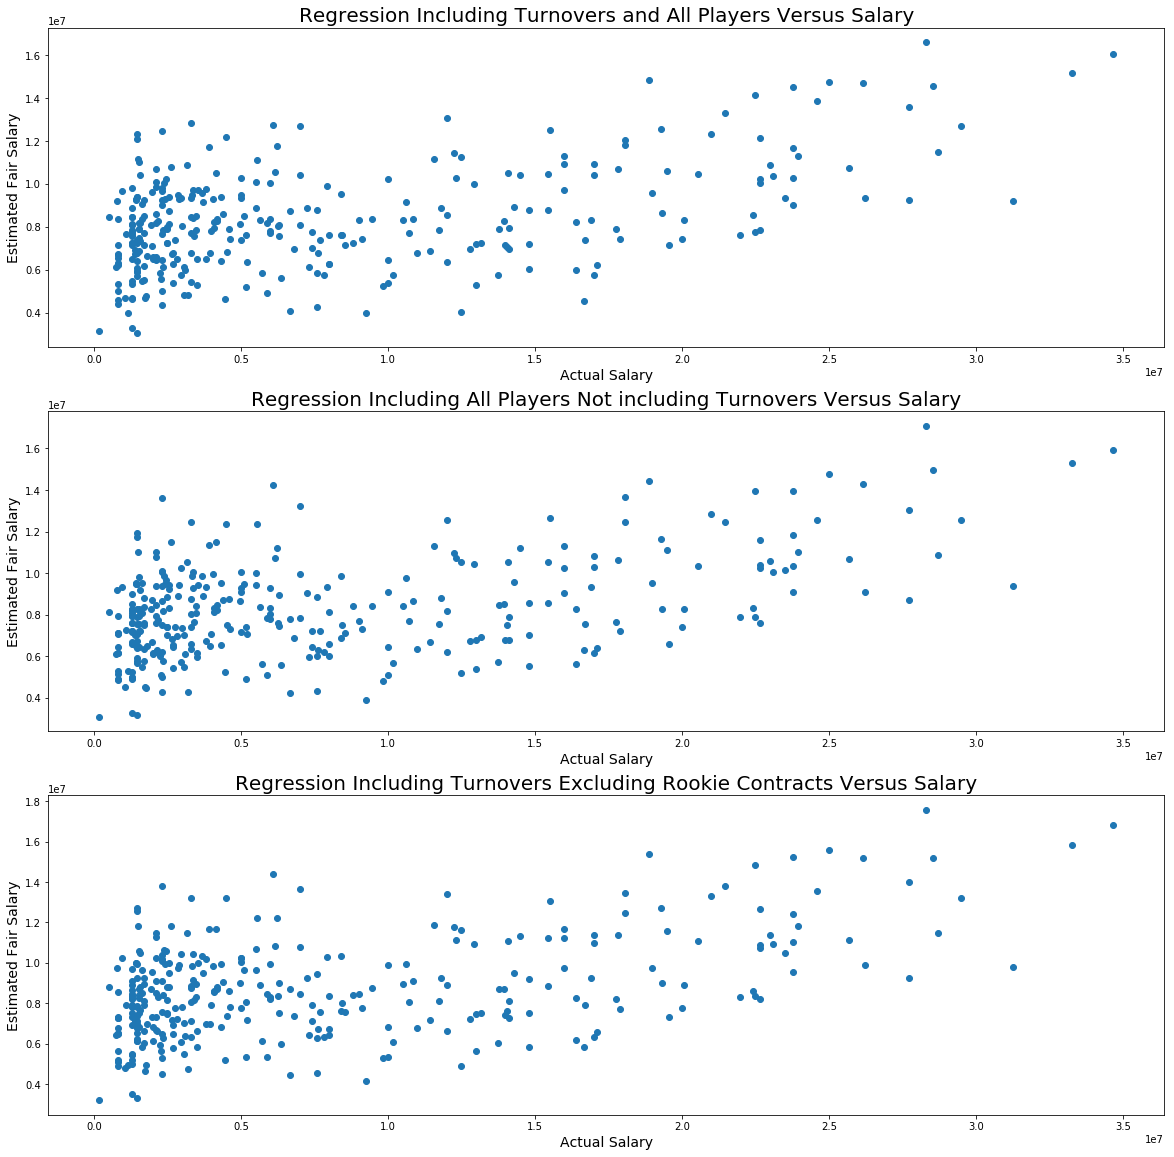

In [97]:
fig, [ax1,ax2,ax3] = plt.subplots(3,figsize=(20,20))
fit = np.polyfit(final_frame['2017-2018'].astype('float'), final_frame['Reg_Salary'].astype(float), deg=1)
ax1.scatter(y=final_frame['Reg_Salary'],x=final_frame['2017-2018'])
ax1.set_title('Regression Including Turnovers and All Players Versus Salary',fontsize=20)
ax1.set_ylabel('Estimated Fair Salary',fontsize=14)
ax1.set_xlabel('Actual Salary',fontsize=14)
ax2.scatter(y=final_frame['Reg_Salary_noTO'],x=final_frame['2017-2018'])
ax2.set_title('Regression Including All Players Not including Turnovers Versus Salary',fontsize=20)
ax2.set_ylabel('Estimated Fair Salary',fontsize=14)
ax2.set_xlabel('Actual Salary',fontsize=14)
ax3.scatter(y=final_frame['Reg_Salary_no_Rook'],x=final_frame['2017-2018'])
ax3.set_title('Regression Including Turnovers Excluding Rookie Contracts Versus Salary',fontsize=20)
ax3.set_ylabel('Estimated Fair Salary',fontsize=14)
ax3.set_xlabel('Actual Salary',fontsize=14)

Text(0.5,0,'Actual Salary')

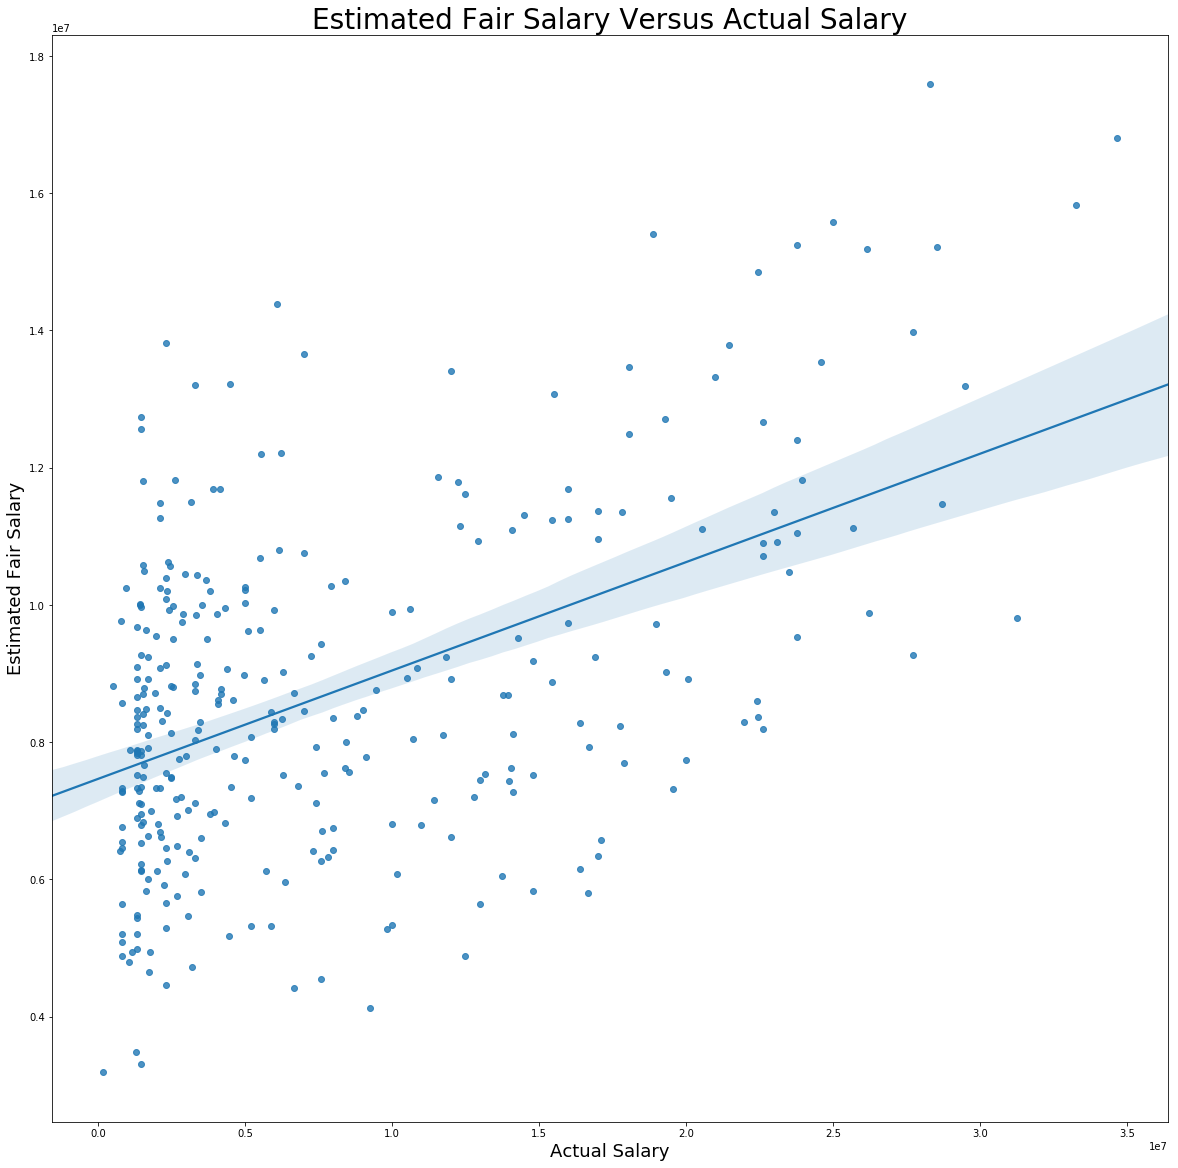

In [98]:
fig, ax = plt.subplots(figsize=(20,20))
sns.regplot(y=final_frame['Reg_Salary_no_Rook'].astype(float),x=final_frame['2017-2018'].astype(float))
ax.set_title('Estimated Fair Salary Versus Actual Salary',fontsize=28)
ax.set_ylabel('Estimated Fair Salary',fontsize=18)
ax.set_xlabel('Actual Salary',fontsize=18)

Text(0,0.5,'Salary Difference')

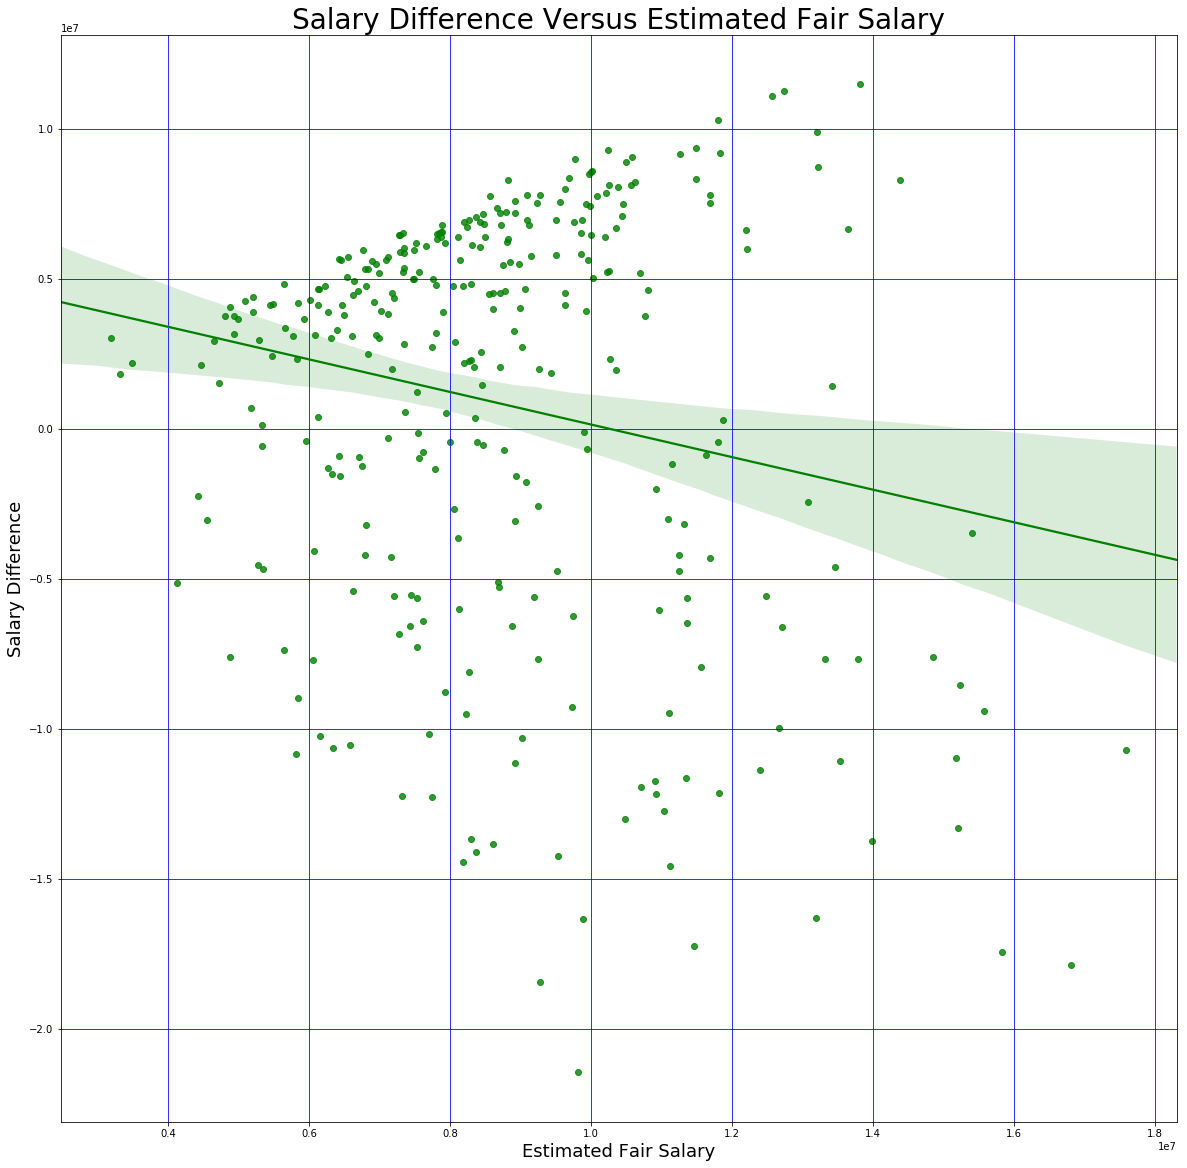

In [99]:
fig, ax = plt.subplots(figsize=(20,20))
ax.grid(color='b')
sns.regplot(y=final_frame['Salary_Diff'].astype(float),x=final_frame['Reg_Salary_no_Rook'].astype(float),color='g')
ax.set_title('Salary Difference Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Salary Difference',fontsize=18)

Text(0,0.5,'Salary Difference')

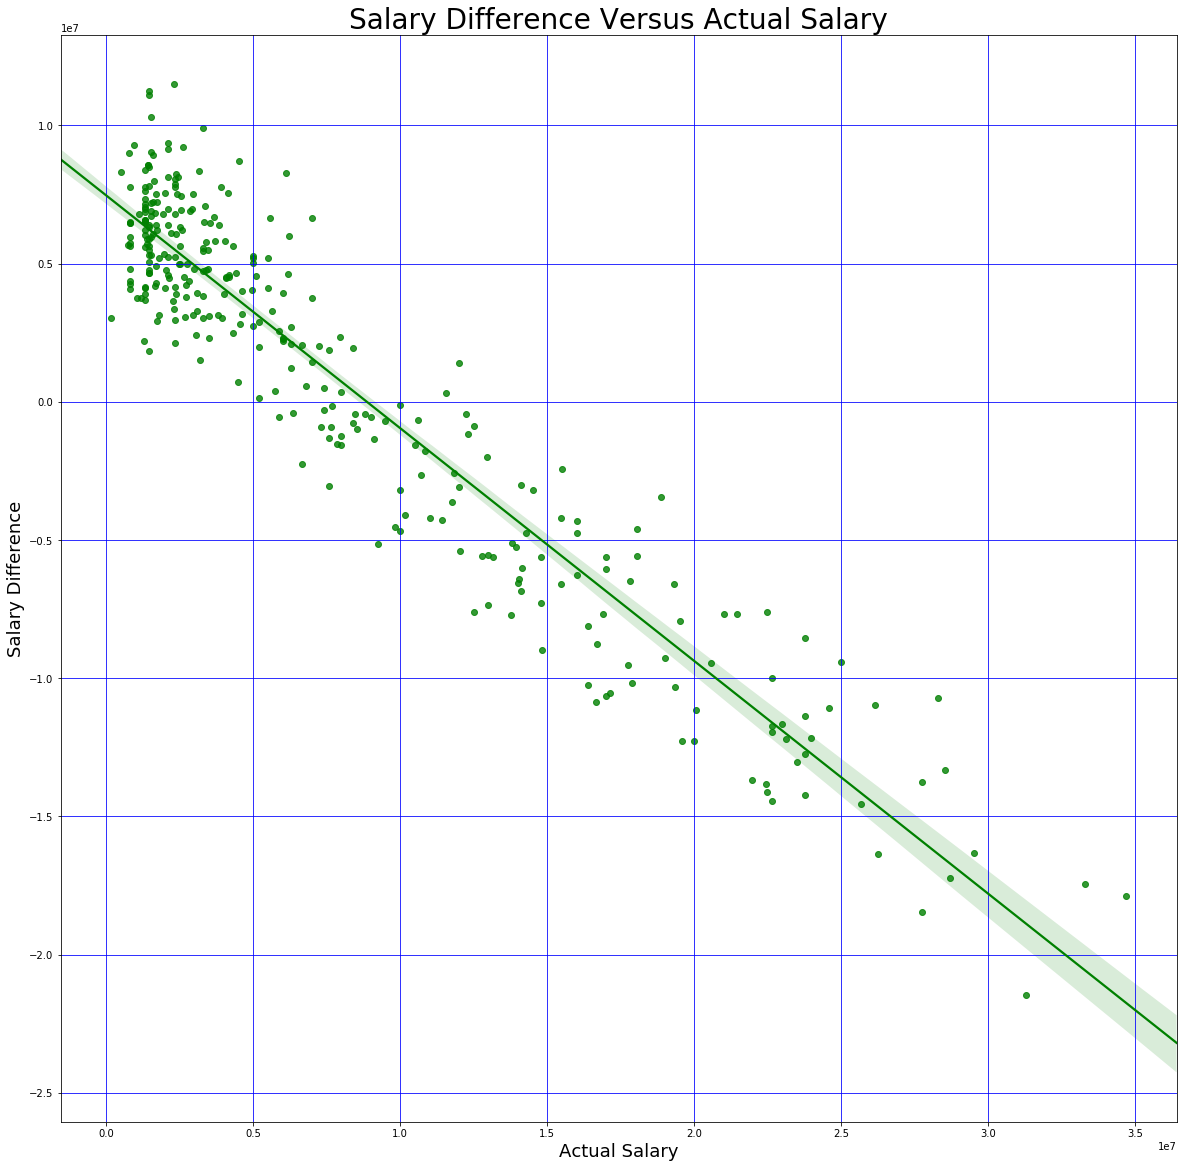

In [100]:
fig, ax = plt.subplots(figsize=(20,20))
ax.grid(color='b')
sns.regplot(y=final_frame['Salary_Diff'].astype(float),x=final_frame['2017-2018'].astype(float),color='g')
ax.set_title('Salary Difference Versus Actual Salary',fontsize=28)
ax.set_xlabel('Actual Salary',fontsize=18)
ax.set_ylabel('Salary Difference',fontsize=18)

__Analysis__

In the first figure, we see that each of the regressions has minor differences from one another based on how they match up against real salary. 

The second figure shows the regression salares from the no rookie condition against real salary. This time instead of just the scatter plot we see the line of best fit and the deviations from that line. We see a large cluster of players to the left of the graph making less than 5 million dollars per year, but the regression shows that these players should be distributed as seen by looking at how they are laid out in a line vertically.

In the third figure we see an interesting cluster of dots from an estimated salary of 4million to 10 million. This cluster is an upward sloping line, meaning that those players are being paid similarly, but they deserve do be paid differently. Essentially, their salary differnece is increasing as their estimated fair salary increases, so the players towards the peak of the cluster should be making more than the players at the base. If the players at the peak were paid more the cluster would be flat showing that all of them have a similar salary distance from their base and deserved salary.

The final figure shows that as players are paid more, their salary difference increases. The correlation appears to be very strongly negative. This signals that players who are making over 10 million dollars should be making less on average and players making less than that should be making more on average. This does not mean everyone should be paid the same. The points in the bottom left corner either can represent all-stars who are not having their outside value added in, or players who are drastically overpaid. The middle section between 15 million and 25 million dollars in salary is the most important section. This section is most likely populated with players who are not brining in those outside values, and that means they are being paid more than what they are worth to their organization.

In [101]:
final_frame['Salary_Diff'].astype(float).corr(final_frame['2017-2018'].astype(float))

-0.94951917487425219

__Statistics__

I am now going to look at some statistics about the estimated fair salary of each player, then see which players are most overpaid and underpaid. I am next going to create a dataframe of all of the overpaid players and of all of the underpaid players. From there I will do several visualizations to see how each statistic affects pay and where the players being over or underpaid stand.

In [102]:
final_frame['Reg_Salary_no_Rook'].std()

2482560.577772131

In [103]:
final_frame['Reg_Salary_no_Rook'].mean()

8705658.444785276

In [104]:
final_frame['Reg_Salary_no_Rook'].max()

17587748.0

In [105]:
final_frame['Reg_Salary_no_Rook'].min()

3190431.0

In [106]:
final_frame[(final_frame['Salary_Diff']>1*10e6)].sort_values('Salary_Diff')

Rank First Name Last Name Position Team_x Games   MPG   PTS   FGM-FGA  \
85    98      Bobby    Portis       PF    CHI    73  22.5  13.2  5.2-11.1   
35    37     Nikola     Jokic        C    DEN    75  32.5  18.5  6.7-13.5   
134  NaN   Montrezl   Harrell       PF    LAC    76    17    11   4.6-7.2   
9     10      Devin    Booker       SG    PHX    54  34.5  24.9  8.4-19.5   

       FG%     ...         WT   Age  YOS          Pre-Draft Team  \
85   0.471     ...      248.0  23.0  2.0                Arkansas   
35   0.499     ...      250.0  23.0  2.0  KK Mega Bemax (Serbia)   
134  0.635     ...      240.0  24.0  2.0              Louisville   
9    0.432     ...      206.0  21.0  2.0                Kentucky   

           Draft Status    Nationality  Reg_Salary Reg_Salary_noTO  \
85   2015 Rnd 1 Pick 22  United States  11175919.0      11009921.0   
35   2014 Rnd 2 Pick 11         Serbia  12307380.0      11933099.0   
134   2015 Rnd 2 Pick 2  United States  12075285.0      11730005.0   
9    2015 Rnd 1 Pick 13  United States  12461049.0      13607614.0   

    Reg_Salary_no_Rook Salary_Diff  
85          11801314.0  10284994.0  
35          12564992.0  11093610.0  
134         12731931.0  11260549.0  
9           13814879.0  11495519.0  

[4 rows x 53 columns]

In [107]:
final_frame[(final_frame['Salary_Diff']<-1.5*10e6)].sort_values('Salary_Diff')[['First Name','Last Name','Position',
            'PTS','APG','RPG','FG%','TOPG','Age','PPM','APM','RPM','TOPM','Signed Using','YOS','2017-2018',
            'Reg_Salary','Reg_Salary_noTO','Reg_Salary_no_Rook','Salary_Diff']]

First Name Last Name Position   PTS  APG  RPG    FG% TOPG   Age       PPM  \
63       Paul   Millsap       PF  14.6  2.8  6.4  0.464  1.9  33.0   0.48505   
94         Al   Horford       PF  12.9  4.7  7.4  0.489  1.8  31.0  0.408228   
5     Stephen     Curry       PG  26.4  6.1  5.1  0.495  3.0  30.0     0.825   
2      LeBron     James       SF  27.5  9.1  8.6  0.542  4.2  33.0  0.745257   
49       Kyle     Lowry       PG  16.2  6.9  5.6  0.427  2.3  32.0  0.503106   
50    Carmelo   Anthony       PF  16.2  1.3  5.8  0.404  1.3  33.0  0.504673   
21      Blake   Griffin       PF  21.4  5.8  7.4  0.438  2.8  29.0  0.629412   

          APM       RPM       TOPM Signed Using   YOS   2017-2018  Reg_Salary  \
63  0.0930233  0.212625  0.0638223    Cap space  11.0  31269231.0   9209232.0   
94   0.148734  0.234177  0.0580169    Cap Space  10.0  27734405.0   9264405.0   
5    0.190625  0.159375    0.09375  Bird Rights   8.0  34682550.0  16053161.0   
2    0.246612  0.233062    0.11468   Early Bird  14.0  33285709.0  15182709.0   
49   0.214286  0.173913  0.0728619  Bird Rights  11.0  28703704.0  11494165.0   
50  0.0404984  0.180685  0.0395399  Bird Rights  14.0  26243760.0   9357465.0   
21   0.170588  0.217647  0.0836714  Bird Rights   8.0  29512900.0  12684488.0   

    Reg_Salary_noTO  Reg_Salary_no_Rook  Salary_Diff  
63        9361489.0           9806910.0  -21462321.0  
94        8702099.0           9270434.0  -18463971.0  
5        15934895.0          16803979.0  -17878571.0  
2        15313817.0          15826386.0  -17459323.0  
49       10863042.0          11463739.0  -17239965.0  
50        9088150.0           9880925.0  -16362835.0  
21       12573940.0          13196645.0  -16316255.0

Above we see the top 5 most underpaid players in the league and 7 most overpaid players in the league. 

With the exception of Tyreke Evans the 4 other most underpaid players are on rookie contracts, meaning their salary is semi-fixed. The contracts of those 4 players cannot be changed until they have played through their rookie contract, but Tyreke Evans is an interesting case. Tyreke Evans was the 2010 NBA Rookie of the year and a one and done player out of Memphis selcted 4th overall. He was projected to be a league superstar, but progressively put up worse numbers through his career, until this year. Evans put up strong numbers compared to prior years, and this is most likely why he seems undervalued. It is also worth noting that it could be the case that bust players(those who are expected to play very well, but ultimately underperform) may be payed even less than what they would deserve because of organizations viewing them as a let down. 

The top 7 overpaid NBA players include two superstars in Lebron James and Stephen Curry, 3 second tier stars in Griffin, Lowry, and Horford, and 2 fading stars in Anthony and Millsap. Superstars are worth significantly more than their on court performance. The next two tiers do not carry as much value off the court, and the players listed are likely overpaid. Second tier stars contribute more value to small market teams or teams that lack a star. In some cases teams will overpay when they need a certain position. Lowry and Griffin in Toronto and Detroit respectively are examples of teams brining in a second tier star to increase their team performance and market size. In the case of Boston Horford filled in the power forward position for them, so they were willing to pay more for him. Lowry and Griffin make their teams playoff contenders. Horford makes his team a championship contender.

In [108]:
overpaid=final_frame.copy()

In [109]:
underpaid=final_frame.copy()

In [110]:
overpaid1=overpaid.copy()

In [111]:
underpaid1=underpaid.copy()

In [112]:
for i in range(len(overpaid)-1):
    if (overpaid.iloc[i]['Salary_Diff']>0):
        overpaid1.drop(i,inplace=True)

In [113]:
for i in range(len(underpaid)-1):
    if (underpaid.iloc[i]['Salary_Diff']<0):
        underpaid1.drop(i,inplace=True)

In [114]:
overpaid1.reset_index(inplace=True,drop=True)

In [115]:
overpaid=overpaid1
underpaid=underpaid1

__Visualization__

Next I will take the overpaid and underpaid dataframes and graph them against the stats used to calculate the regression(PPM,APM,RPM,TOPM).

Text(0,0.5,'Points Per Minute')

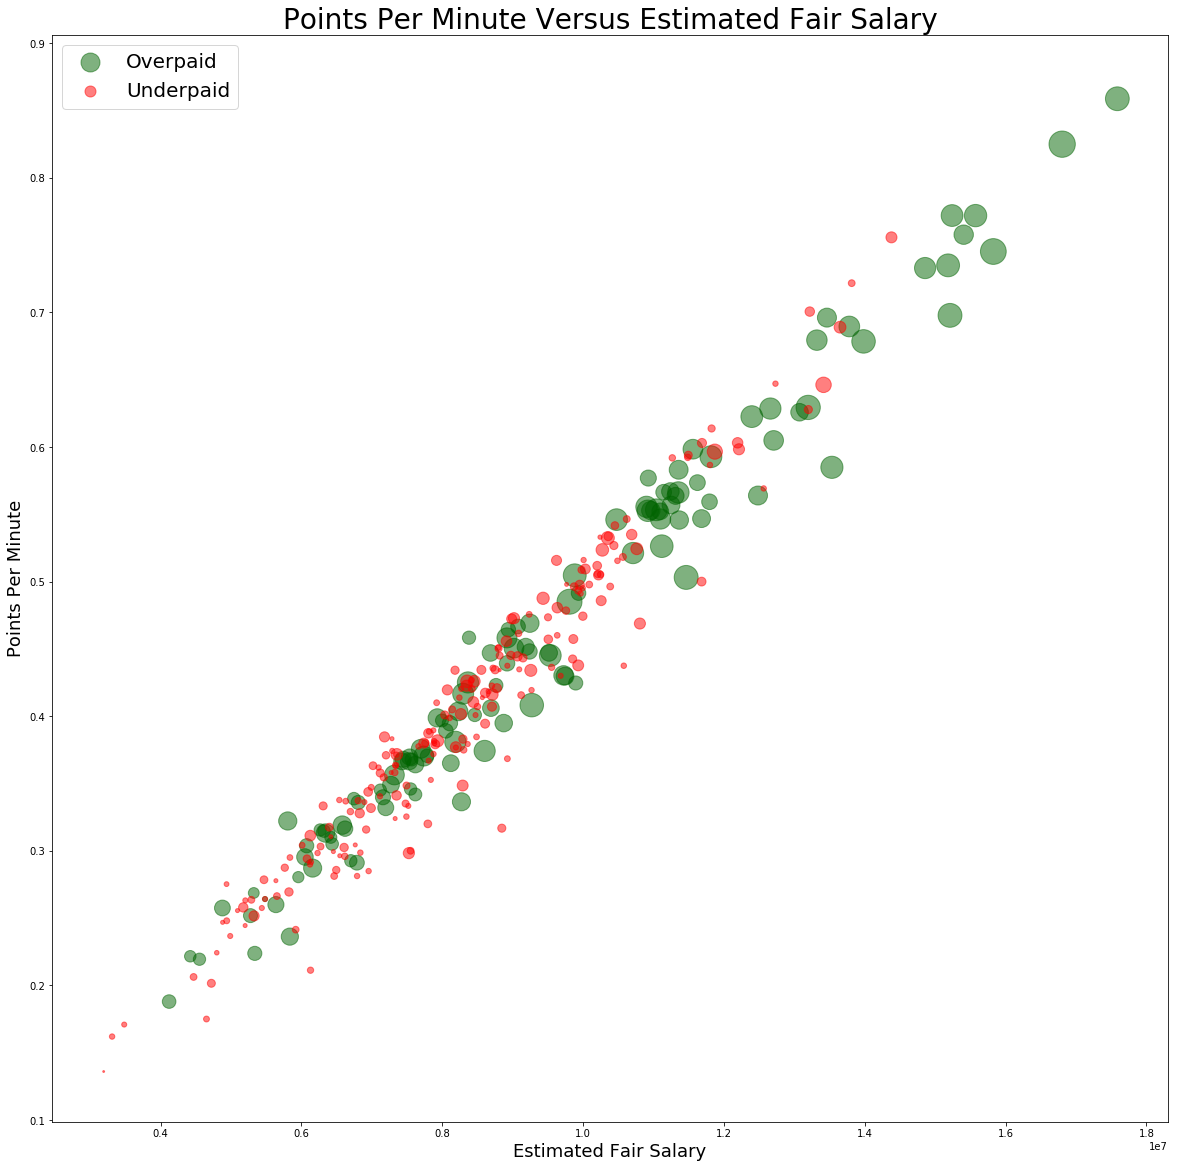

In [116]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='PPM',x='Reg_Salary_no_Rook',data=overpaid,
           s=(overpaid['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='PPM',x='Reg_Salary_no_Rook',data=underpaid,
           s=(underpaid['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Points Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Points Per Minute',fontsize=18)

Text(0,0.5,'Assists Per Minute')

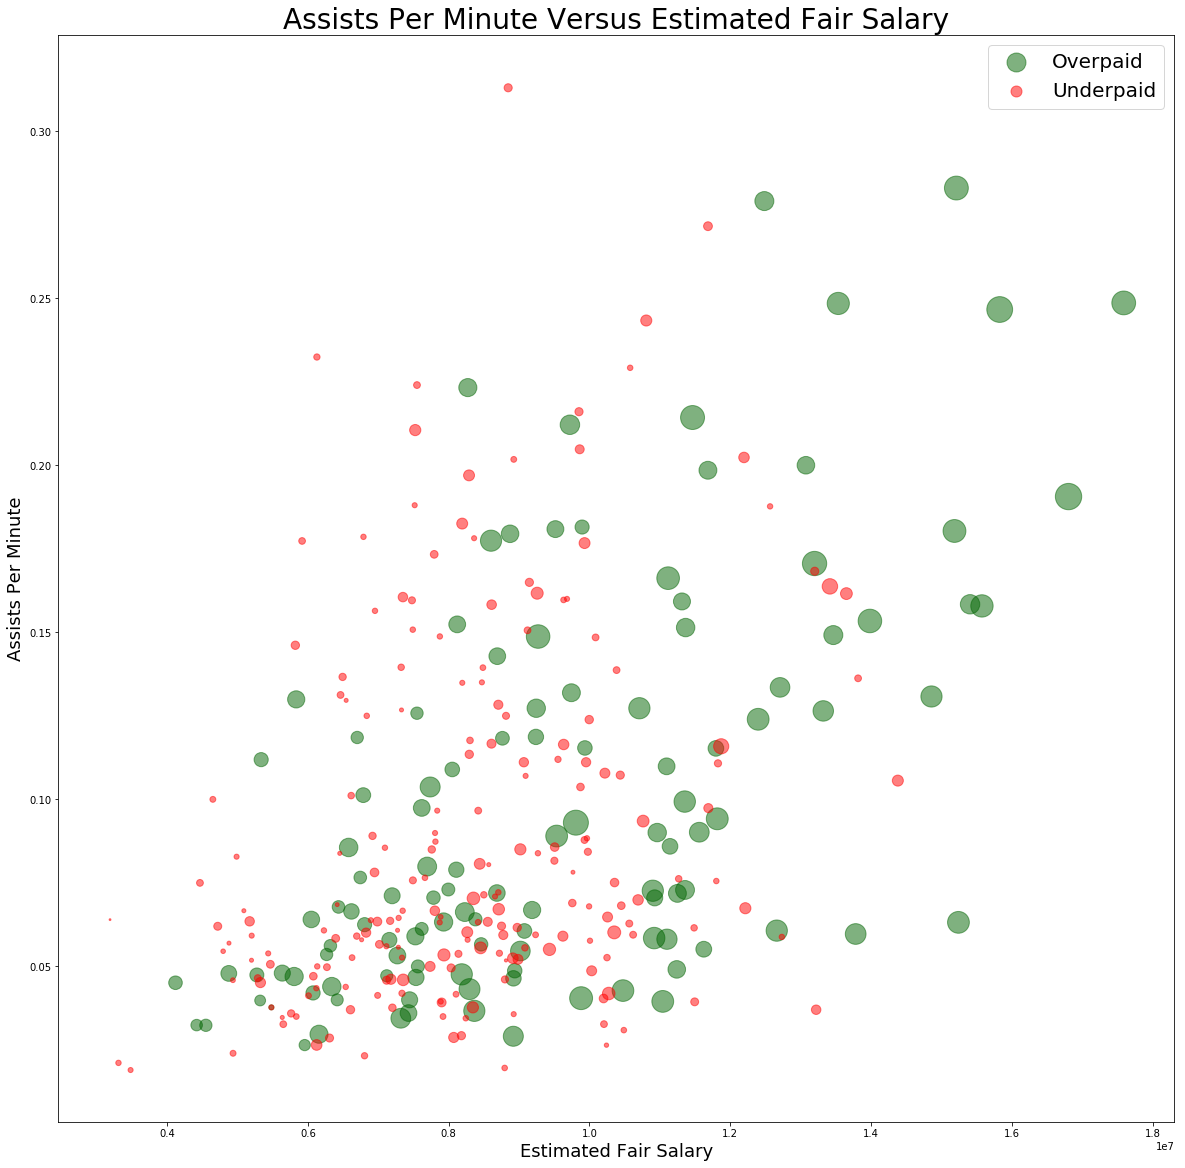

In [117]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='APM',x='Reg_Salary_no_Rook',data=overpaid,
           s=(overpaid['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='APM',x='Reg_Salary_no_Rook',data=underpaid,
           s=(underpaid['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Assists Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Assists Per Minute',fontsize=18)

Text(0,0.5,'Rebounds Per Minute')

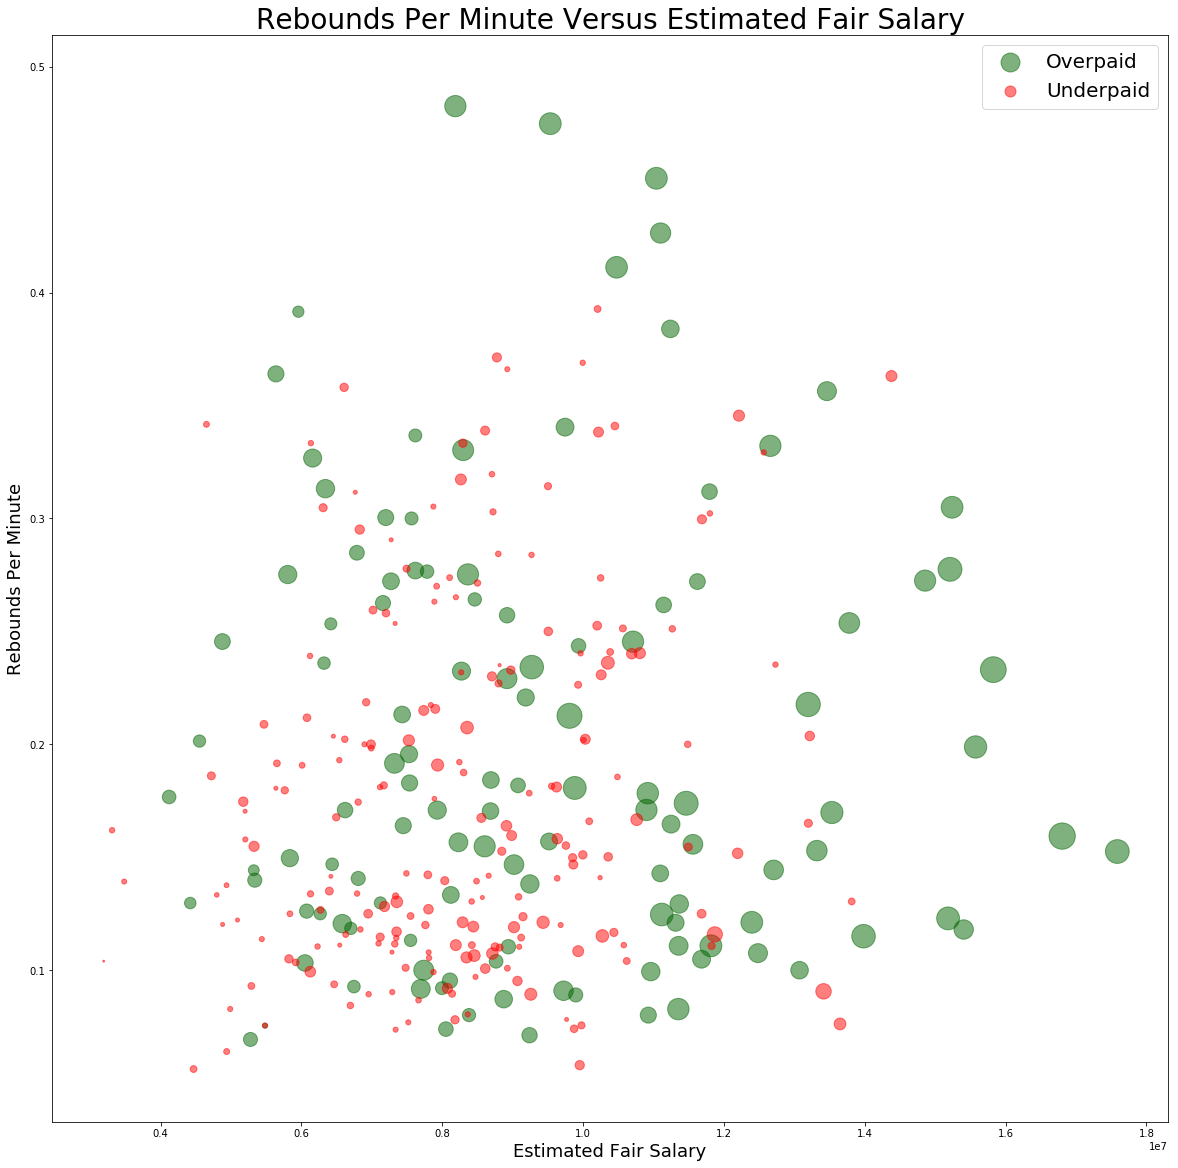

In [118]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='RPM',x='Reg_Salary_no_Rook',data=overpaid,
           s=(overpaid['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='RPM',x='Reg_Salary_no_Rook',data=underpaid,
           s=(underpaid['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Rebounds Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Rebounds Per Minute',fontsize=18)

Text(0,0.5,'Turnovers Per Minute')

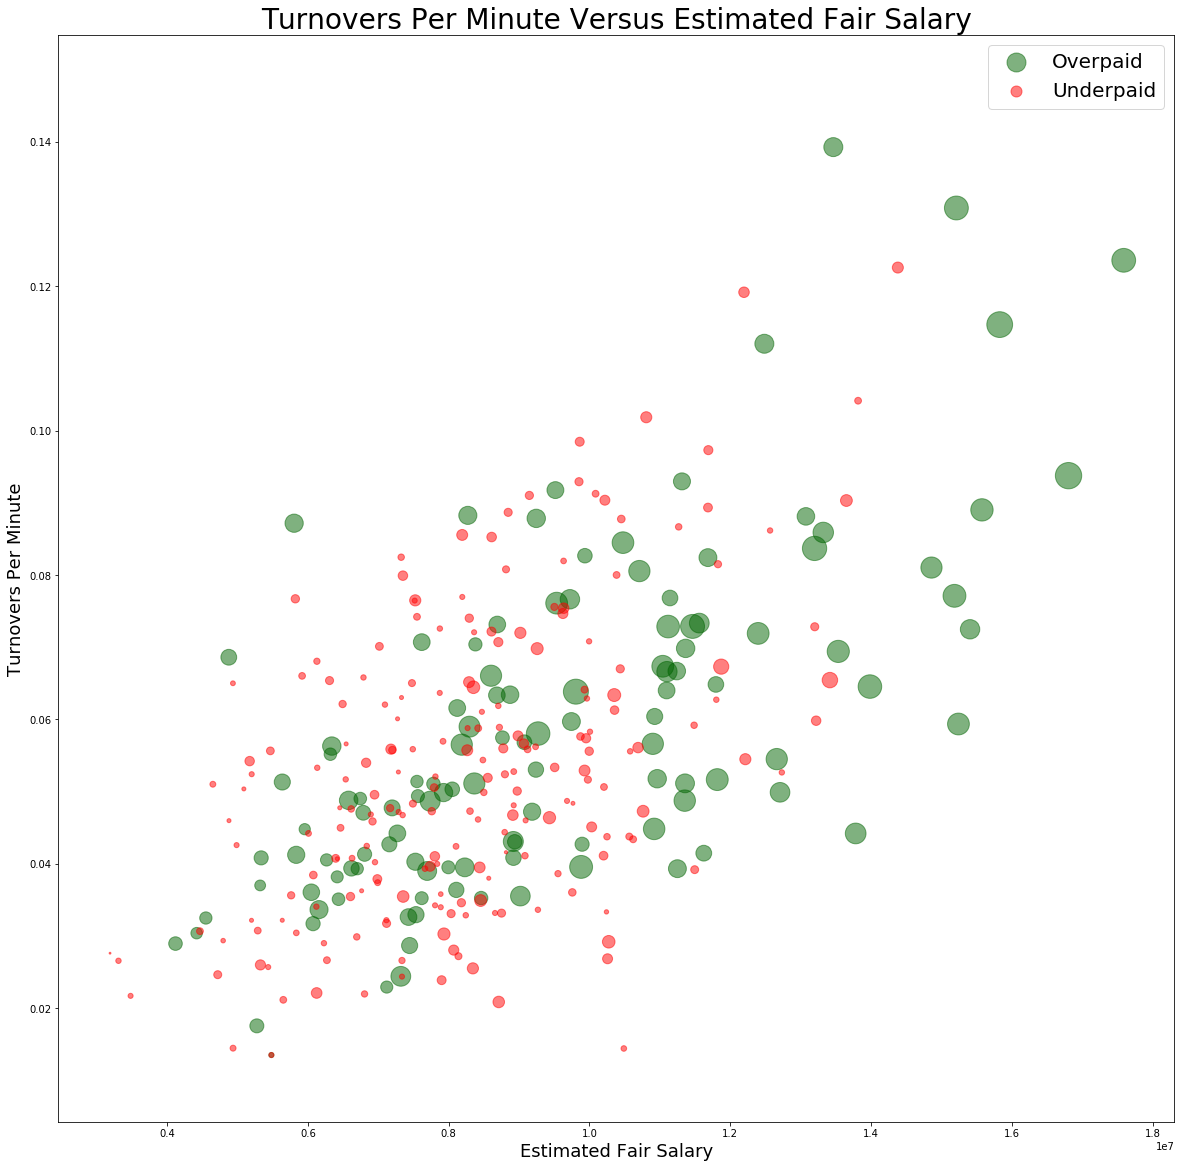

In [119]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='TOPM',x='Reg_Salary_no_Rook',data=overpaid,
           s=(overpaid['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='TOPM',x='Reg_Salary_no_Rook',data=underpaid,
           s=(underpaid['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Turnovers Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Turnovers Per Minute',fontsize=18)

__Analysis__

In these graphs the green circles represent overpaid players aand the red cirlces represent underpaid players. The size of the circle represents what the player's real salary is. Each graph represents a different stat graphed against the estimated salary for each player from the regression. It can clearly be seen that the underpaid players have much smaller circles than the overpaid players.

The first figure shows that points per minute is strongly correlated with estimated salary. The relationship is almost linear. It is also seen that the largest circles are at the top right corner of the graph. This means the players paid the most are the ones scoring the most and who deserve to be paid the most.

The second and third figures show assists and rebounds respectively against estimated fair salary. It is interesting to see these two relationships because we see that the players who lead in assists are not the ones who lead in rebounds. We also see that leading in assists seems to matter more in determining how much a player should be paid.

The fourth figure shows turnovers against estimated fair salary. This graph shows an interesting relationship because it estimates that more turnovers means a player should get paid more. The correlation here is stronger than those in figures two and three. At first I questioned this relationship, but I concluded that this relationship forms because the turnovers show players who are handling the ball more often. That being said, the more time a player posses the ball should mean they get paid more if they are productive. In order to get more turnovers players must be relied on to posses the ball more, and that is what creates this relationship.

__Visualization__

The next thing I will do is show specifically the ten most overpaid an ten most underpaid players isloated on the same figures above.

Below are the ten most overpaid players, followed by the ten most underpaid players.

In [120]:
overpaid.sort_values('Salary_Diff')

Rank First Name     Last Name Position       Team_x Games   MPG   PTS  \
40   NaN       Paul       Millsap       PF          DEN    38  30.1  14.6   
55   NaN         Al       Horford       PF          BOS    72  31.6  12.9   
5      6    Stephen         Curry       PG           GS    51    32  26.4   
2      3     LeBron         James       SF          CLE    82  36.9  27.5   
35    55       Kyle         Lowry       PG          TOR    78  32.2  16.2   
36   NaN    Carmelo       Anthony       PF          OKC    78  32.1  16.2   
16    22      Blake       Griffin       PF      DET/LAC    58    34  21.4   
22    33       Jrue       Holiday       PG           NO    81  36.1    19   
65   NaN    DeAndre        Jordan        C          LAC    77  31.5    12   
39    70      Andre      Drummond        C          DET    78  33.7    15   
48   NaN     Steven         Adams        C          OKC    76  32.7  13.9   
71   NaN    Nicolas         Batum       SG          CHA    64    31  11.6   
12    14      DeMar       DeRozan       SG          TOR    80  33.9    23   
49    93       Rudy        Gobert        C         UTAH    56  32.4  13.5   
7      8    Russell     Westbrook       PG          OKC    80  36.4  25.4   
33    53     Dwight        Howard        C          CHA    81  30.4  16.6   
47    85     Hassan     Whiteside        C          MIA    54  25.3    14   
80   NaN     George          Hill       PG      CLE/SAC    67    27    10   
82   183       Ryan      Anderson       PF          HOU    66  26.1   9.3   
23    34   Harrison        Barnes       SF          DAL    77  34.2  18.9   
17   NaN         CJ      McCollum       SG          POR    81  36.1  21.4   
31    48       Marc         Gasol        C          MEM    73    33  17.2   
54   NaN      Brook         Lopez        C          LAL    74  23.4    13   
32    49         JJ        Redick       SG          PHI    70  30.2  17.1   
13    17    Bradley          Beal       SG          WSH    82  36.3  22.6   
59   115      Serge         Ibaka       PF          TOR    76  27.5  12.6   
24    35      Chris          Paul       PG          HOU    58  31.8  18.6   
3      4     Damian       Lillard       PG          POR    73  36.6  26.9   
113  NaN        Ian       Mahinmi        C          WSH    77  14.9   4.8   
0      1      James        Harden       PG          HOU    72  35.4  30.4   
..   ...        ...           ...      ...          ...   ...   ...   ...   
78   170      Patty         Mills       PG           SA    82  25.7    10   
38    69     Austin        Rivers       PG          LAC    61  33.7  15.1   
21   NaN     Dennis      Schroder       PG          ATL    67    31  19.4   
116  NaN      Lance        Thomas       SF           NY    73  18.5   4.1   
26    38       Eric        Gordon       SG          HOU    69  31.2    18   
93   NaN       Alec         Burks       SG         UTAH    64  16.5   7.7   
109  NaN      Vince        Carter       SG          SAC    58  17.7   5.4   
43   NaN      Bojan    Bogdanovic       SF          IND    80  30.8  14.3   
106  319  Cristiano       Felicio        C          CHI    55  17.8   5.6   
100  NaN     Trevor        Booker       PF  IND/BKN/PHI    68    17   6.3   
111  NaN      Corey        Brewer       SF      LAL/OKC    72  16.8   5.3   
88   NaN    Garrett        Temple       SF          SAC    65  24.8   8.4   
42   NaN       Zach      Randolph       PF          SAC    59  25.6  14.5   
76   161   JaMychal         Green       PF          MEM    55    28  10.3   
92   NaN       Cory        Joseph       PG          IND    82    27   7.9   
83   NaN  Al-Farouq         Aminu       PF          POR    69    30   9.3   
37    63     Nikola       Mirotic       PF       NO/CHI    55  27.2  15.6   
97   270      Kosta        Koufos        C          SAC    71  19.6   6.7   
69   NaN     Bogdan    Bogdanovic       SG          SAC    78  27.9  11.8   
72   NaN      Kelly        Olynyk       PF          MIA    76  23.4  11.5   


In [121]:
overpaid.sort_values('Salary_Diff').head(10)[['First Name','Last Name','2017-2018',
                                              'Salary_Diff','Reg_Salary_no_Rook']].sort_values('Salary_Diff')

First Name Last Name   2017-2018  Salary_Diff  Reg_Salary_no_Rook
40       Paul   Millsap  31269231.0  -21462321.0           9806910.0
55         Al   Horford  27734405.0  -18463971.0           9270434.0
5     Stephen     Curry  34682550.0  -17878571.0          16803979.0
2      LeBron     James  33285709.0  -17459323.0          15826386.0
35       Kyle     Lowry  28703704.0  -17239965.0          11463739.0
36    Carmelo   Anthony  26243760.0  -16362835.0           9880925.0
16      Blake   Griffin  29512900.0  -16316255.0          13196645.0
22       Jrue   Holiday  25686667.0  -14569698.0          11116969.0
65    DeAndre    Jordan  22642350.0  -14456801.0           8185549.0
39      Andre  Drummond  23775506.0  -14241861.0           9533645.0

In [122]:
underpaid.sort_values('Salary_Diff').tail(10)[['First Name','Last Name','2017-2018','Salary_Diff',
                                               'Reg_Salary_no_Rook']].sort_values('Salary_Diff')

First Name  Last Name  2017-2018  Salary_Diff  Reg_Salary_no_Rook
103    Spencer  Dinwiddie  1524305.0    9053298.0          10577603.0
87     Michael    Beasley  2116955.0    9149833.0          11266788.0
24     Donovan   Mitchell  2621280.0    9203575.0          11824855.0
110     Gerald      Green   947248.0    9293775.0          10241023.0
200   Marreese   Speights  2116955.0    9368954.0          11485909.0
29      Tyreke      Evans  3290000.0    9909110.0          13199110.0
85       Bobby     Portis  1516320.0   10284994.0          11801314.0
35      Nikola      Jokic  1471382.0   11093610.0          12564992.0
134   Montrezl    Harrell  1471382.0   11260549.0          12731931.0
9        Devin     Booker  2319360.0   11495519.0          13814879.0

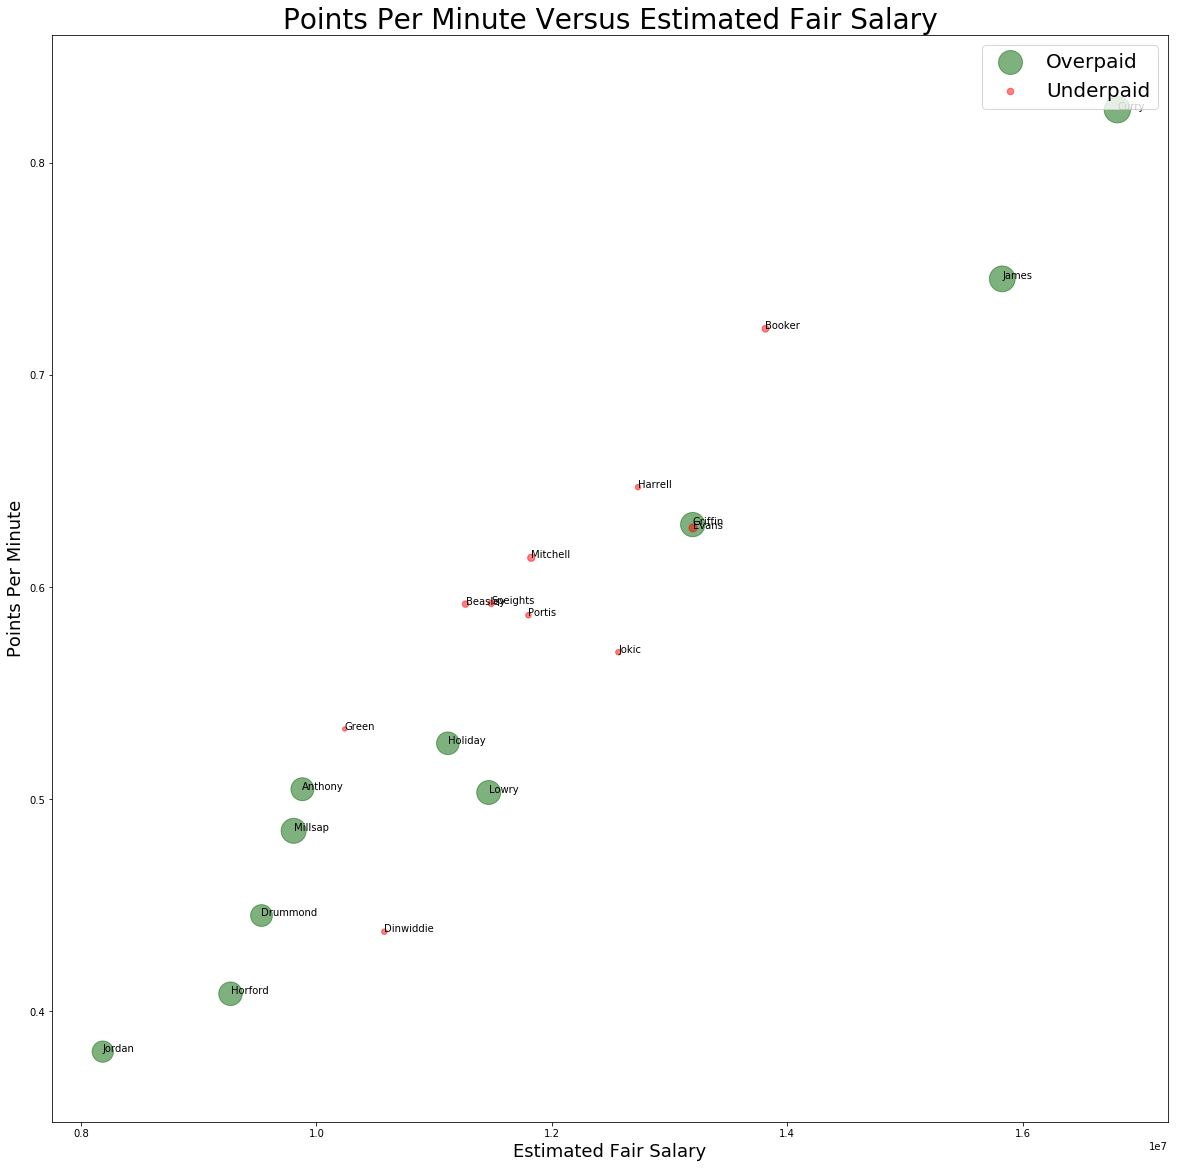

In [123]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='PPM',x='Reg_Salary_no_Rook',data=overpaid.sort_values('Salary_Diff').head(10),
           s=(overpaid.sort_values('Salary_Diff').head(10)['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='PPM',x='Reg_Salary_no_Rook',data=underpaid.sort_values('Salary_Diff').tail(10),
           s=(underpaid.sort_values('Salary_Diff').tail(10)['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Points Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Points Per Minute',fontsize=18)
for i in range(len(overpaid.sort_values('Salary_Diff').head(10))):
    ax.annotate(overpaid.sort_values('Salary_Diff')['Last Name'].iloc[i],
                xy=(overpaid.sort_values('Salary_Diff')['Reg_Salary_no_Rook'].iloc[i],
                    overpaid.sort_values('Salary_Diff')['PPM'].iloc[i]),clip_on=True)
    ax.annotate(underpaid.sort_values('Salary_Diff',ascending=False)['Last Name'].iloc[i],
                xy=(underpaid.sort_values('Salary_Diff',ascending=False)['Reg_Salary_no_Rook'].iloc[i],
                    underpaid.sort_values('Salary_Diff',ascending=False)['PPM'].iloc[i]),clip_on=True)

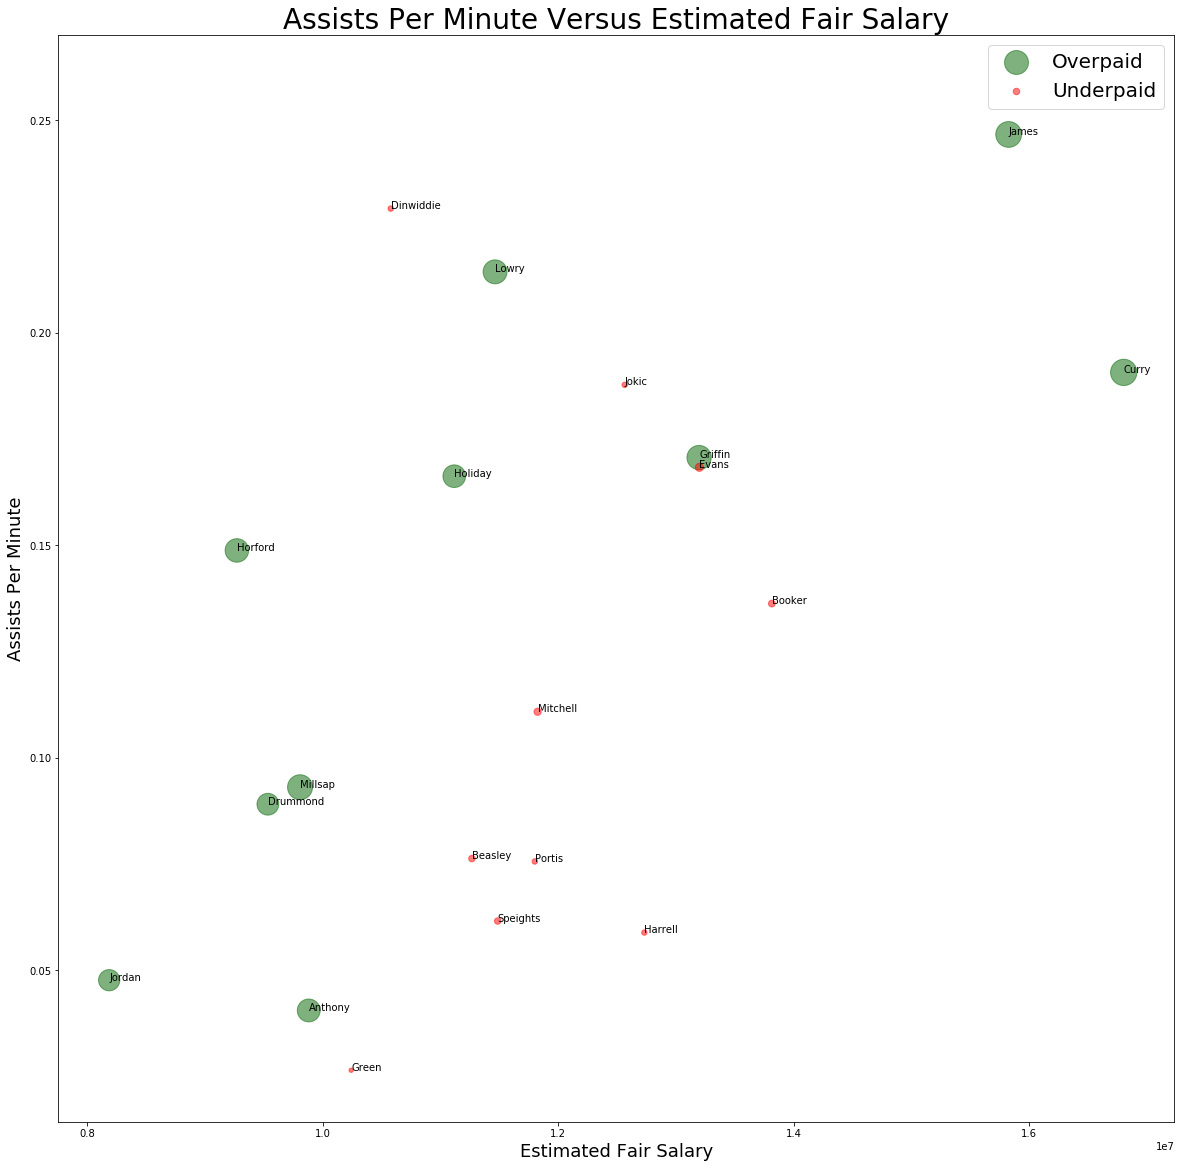

In [124]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='APM',x='Reg_Salary_no_Rook',data=overpaid.sort_values('Salary_Diff').head(10),
           s=(overpaid.sort_values('Salary_Diff').head(10)['2017-2018']/(50000)),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='APM',x='Reg_Salary_no_Rook',data=underpaid.sort_values('Salary_Diff').tail(10),
           s=(underpaid.sort_values('Salary_Diff').tail(10)['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Assists Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Assists Per Minute',fontsize=18)
for i in range(len(overpaid.sort_values('Salary_Diff').head(10))):
    ax.annotate(overpaid.sort_values('Salary_Diff')['Last Name'].iloc[i],
                xy=(overpaid.sort_values('Salary_Diff')['Reg_Salary_no_Rook'].iloc[i],
                    overpaid.sort_values('Salary_Diff')['APM'].iloc[i]),clip_on=True)
    ax.annotate(underpaid.sort_values('Salary_Diff',ascending=False)['Last Name'].iloc[i],
                xy=(underpaid.sort_values('Salary_Diff',ascending=False)['Reg_Salary_no_Rook'].iloc[i],
                    underpaid.sort_values('Salary_Diff',ascending=False)['APM'].iloc[i]),clip_on=True)

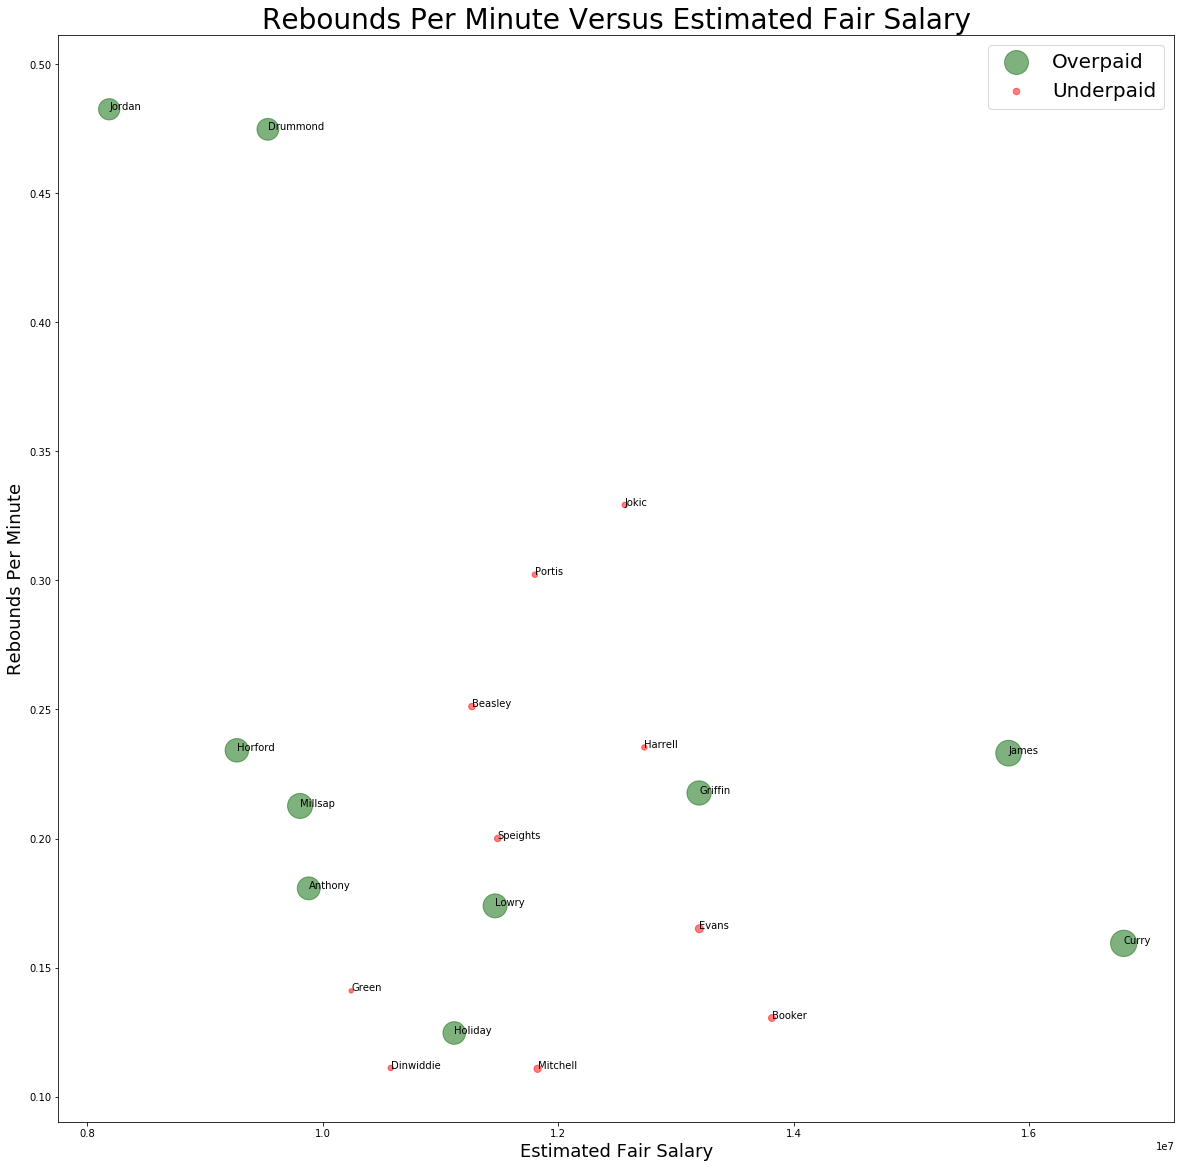

In [125]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='RPM',x='Reg_Salary_no_Rook',data=overpaid.sort_values('Salary_Diff').head(10),
           s=(overpaid.sort_values('Salary_Diff').head(10)['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='RPM',x='Reg_Salary_no_Rook',data=underpaid.sort_values('Salary_Diff').tail(10),
           s=(underpaid.sort_values('Salary_Diff').tail(10)['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Rebounds Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Rebounds Per Minute',fontsize=18)
for i in range(len(overpaid.sort_values('Salary_Diff').head(10))):
    ax.annotate(overpaid.sort_values('Salary_Diff')['Last Name'].iloc[i],
                xy=(overpaid.sort_values('Salary_Diff')['Reg_Salary_no_Rook'].iloc[i],
                    overpaid.sort_values('Salary_Diff')['RPM'].iloc[i]),clip_on=True)
    ax.annotate(underpaid.sort_values('Salary_Diff',ascending=False)['Last Name'].iloc[i],
                xy=(underpaid.sort_values('Salary_Diff',ascending=False)['Reg_Salary_no_Rook'].iloc[i],
                    underpaid.sort_values('Salary_Diff',ascending=False)['RPM'].iloc[i]),clip_on=True)

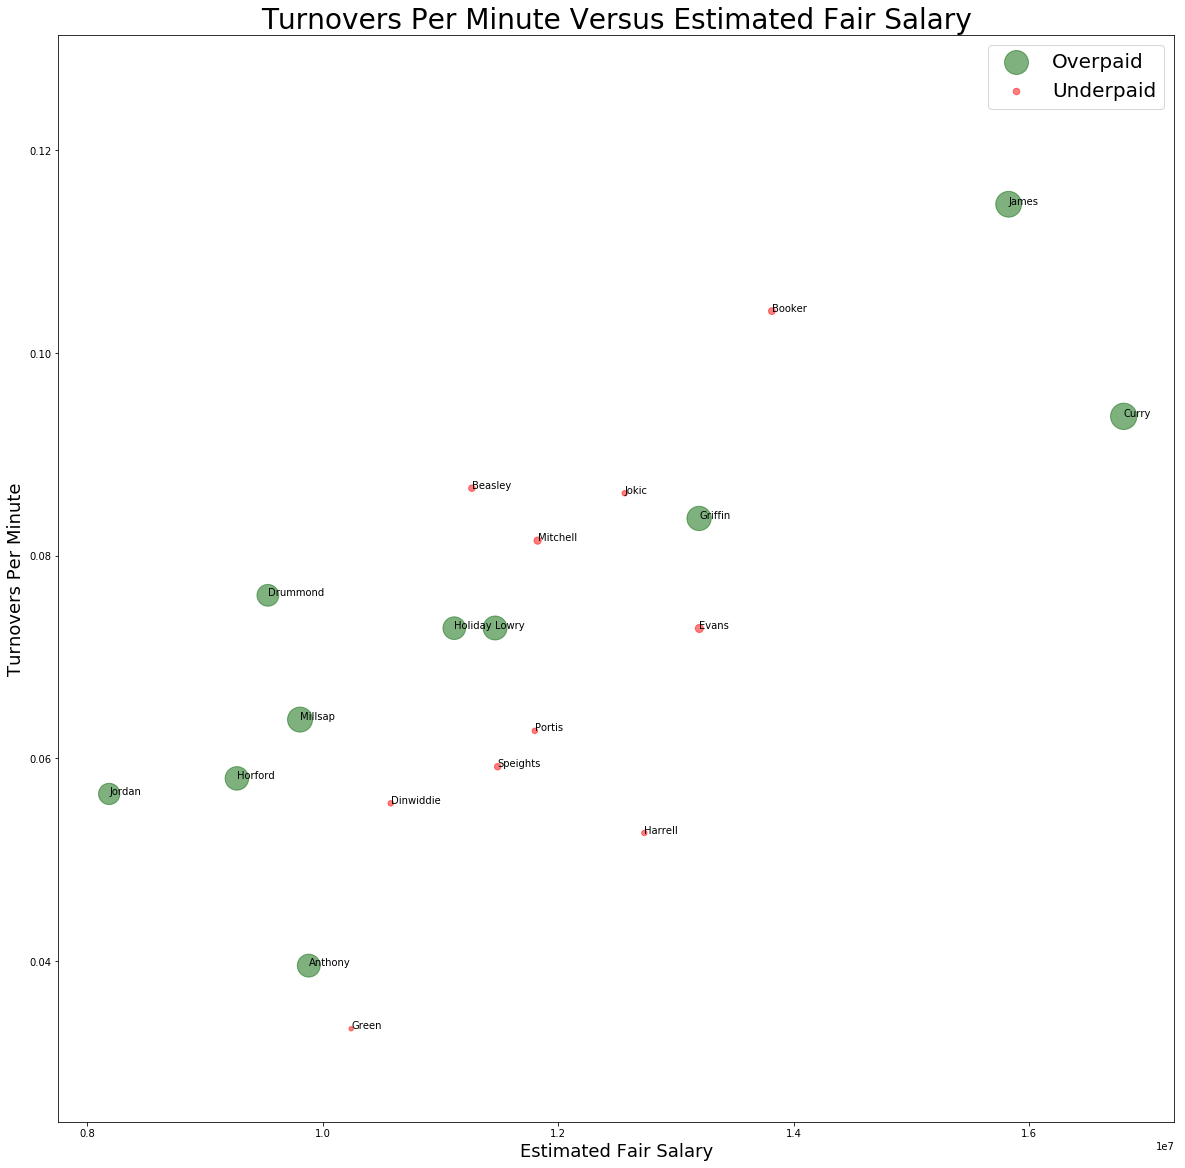

In [126]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y='TOPM',x='Reg_Salary_no_Rook',data=overpaid.sort_values('Salary_Diff').head(10),
           s=(overpaid.sort_values('Salary_Diff').head(10)['2017-2018']/(50000)).astype('float64'),
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.scatter(y='TOPM',x='Reg_Salary_no_Rook',data=underpaid.sort_values('Salary_Diff').tail(10),
           s=(underpaid.sort_values('Salary_Diff').tail(10)['2017-2018']/(50000)).astype('float64'),
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Turnovers Per Minute Versus Estimated Fair Salary',fontsize=28)
ax.set_xlabel('Estimated Fair Salary',fontsize=18)
ax.set_ylabel('Turnovers Per Minute',fontsize=18)
for i in range(len(overpaid.sort_values('Salary_Diff').head(10))):
    ax.annotate(overpaid.sort_values('Salary_Diff')['Last Name'].iloc[i],
                xy=(overpaid.sort_values('Salary_Diff')['Reg_Salary_no_Rook'].iloc[i],
                    overpaid.sort_values('Salary_Diff')['TOPM'].iloc[i]),clip_on=True)
    ax.annotate(underpaid.sort_values('Salary_Diff',ascending=False)['Last Name'].iloc[i],
                xy=(underpaid.sort_values('Salary_Diff',ascending=False)['Reg_Salary_no_Rook'].iloc[i],
                    underpaid.sort_values('Salary_Diff',ascending=False)['TOPM'].iloc[i]),clip_on=True)

__Analysis__

From these graphs we see that one of the most overpaid players leads in each category compared to the most underpaid players. What is interesting is that the underpaid players are distributed fairly throughout the data. This means that the most underpaid players are playing, in most cases, just as well as the overpaid players but making significantly less. We also more clearly see that many of the most overpaid players deserve a lower salary than the most underpaid players.

__Visualization__

Next I will show the relationship between age and estimated fair salary in a bar graph.

Text(0.5,0,'Player Age')

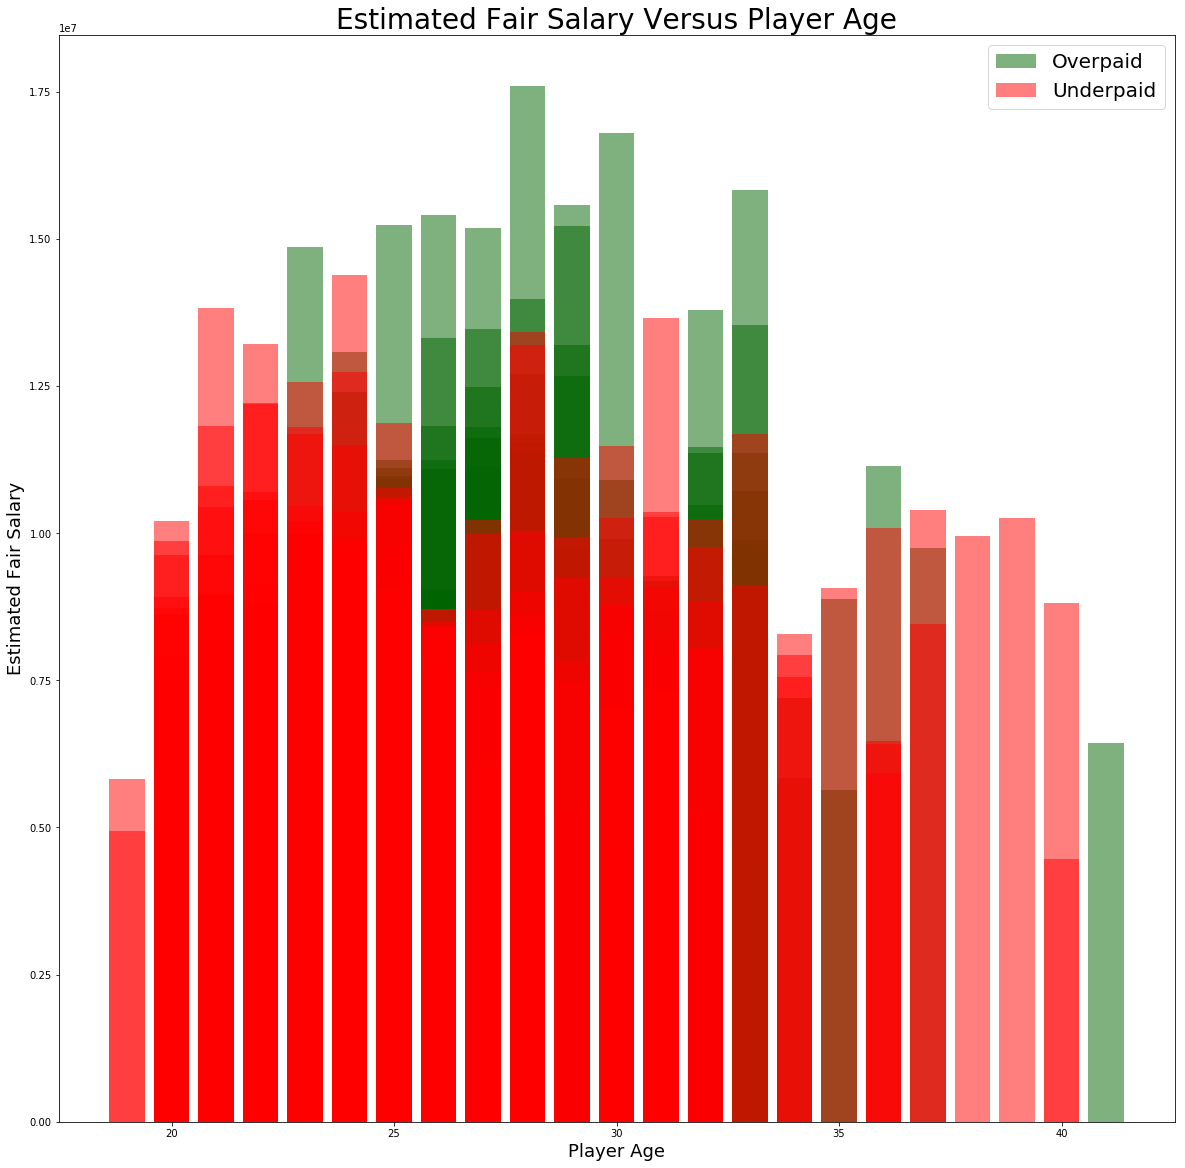

In [127]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.bar(x='Age',height='Reg_Salary_no_Rook',data=overpaid,
          color='DarkGreen',label='Overpaid',alpha=.5)
ax.bar(x='Age',height='Reg_Salary_no_Rook',data=underpaid,
          color='Red',label='Underpaid',alpha=.5)
ax.legend(prop={'size': 20})
ax.set_title('Estimated Fair Salary Versus Player Age',fontsize=28)
ax.set_ylabel('Estimated Fair Salary',fontsize=18)
ax.set_xlabel('Player Age',fontsize=18)

__Analysis__

In the above figure we see that green bars represent overpaid players and red represent underpaid players. The deeper reds and greens mean there are more players that age that are in that range. Where the bar turns brown is an interesting intersection where underpaid players meet overpaid. We can see that players from 25 to 33 are the ones most frequently overpaid. We can also see that players who are especially young are always underpaid. The players who are older than 35 are also interesting because they appear mostly underpaid except for Vince Carter, who is 41 years old. The issue with this is that the sample of players that old is very small.

If the top salary at each age was removed, meaning the transparent top part of each age bar was removed, one sees that the ages who on average deserve the most money for on court play are between the ages of 26 and 29. Players between those ages have the darkest bars at the highest points.

Lastly an interesting aspect is that certain ages have red bars extending beyond green or brown sections. This means that an underpaid player at that age deserves to be paid more than another player that age who is overpaid. Examples of this are seen at age 24, 25, 35 and 37. When the bar becomes more red and less brown that means an overpaid player's bar stopped and an underpaid player's continued to grow.

__Visualization__

Next I will seperate players by team and determine which teams have the most overpaid and underpaid rosters. This will show whether there are teams who are frequently overpaying for players, and whether overpaying for players leads to more wins. I will seperate the teams based on those who made the playoffs and those who did not as a measure of roster success. I will also be adding age to the dataframe to see which teams have the youngest and oldest average rosters and whether age affects performance.

I have attached each teams roster of players graphed against the estimated fair salary and the difference between their real salary and estimated fair salary at the end of the project as an appendix.

In [128]:
league=[]
for i in range(len(final_frame['Team_y'].dropna().unique())):
    team=[]
    league1=[]
    for j in range(len(final_frame)):
        if final_frame.iloc[j]['Team_y']==final_frame['Team_y'].dropna().unique()[i]:
            team.append(final_frame.iloc[j])
    team=pd.DataFrame(team)
    league1.append(team.iloc[0]['Team_y'])
    league1.append(team['2017-2018'].sum())
    league1.append(team['Reg_Salary_no_Rook'].sum())
    league1.append(team['Salary_Diff'].sum())
    league1.append(team['Age'].sum()/team['Age'].count())
    league.append(league1)
    print(team.iloc[0]['Team_y'])
    print('team salary',team['2017-2018'].sum())
    print('team estimated fair salary',team['Reg_Salary_no_Rook'].sum())
    print('team salary difference',team['Salary_Diff'].sum())
    print()

HOU
team salary 111230589.0
team estimated fair salary 103184262.0
team salary difference -8046327.0

NOP
team salary 96933126.0
team estimated fair salary 94755554.0
team salary difference -2177572.0

CLE
team salary 134125887.0
team estimated fair salary 102091855.0
team salary difference -32034032.0

POR
team salary 100918553.0
team estimated fair salary 82590965.0
team salary difference -18327588.0

MIL
team salary 81166451.0
team estimated fair salary 82762994.0
team salary difference 1596543.0

GSW
team salary 135237108.0
team estimated fair salary 129327748.0
team salary difference -5909360.0

OKC
team salary 124040834.0
team estimated fair salary 86198035.0
team salary difference -37842799.0

PHO
team salary 53346001.0
team estimated fair salary 92419354.0
team salary difference 39073353.0

BOS
team salary 82858595.0
team estimated fair salary 109080478.0
team salary difference 26221883.0

SAS
team salary 92963879.0
team estimated fair salary 111018730.0
team salary difference 

In [129]:
league=pd.DataFrame(league)

In [130]:
league.columns=[['Team','Total Salary','Estimated Fair Salary','Salary Difference','Average Age']]

In [131]:
playoff_teams=['TOR','BOS','PHI','CLE','IND','MIA','MIL','WAS','HOU','GSW','POR','UTA','NOP','SAS','MIN','OKC']
not_playoff_team=['DEN','DET','CHO','NYK','BRK','CHI','ORL','ATL','DEN','LAC','LAL','SAC','DAL','MEM','PHO']

In [132]:
league['Color']=league['Team']

In [133]:
for i in range(len(league)):
    if league['Team'][i] in playoff_teams:
        league['Color'][i]='#17408B'
    else:
        league['Color'][i]='#C9082A'

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [134]:
league.sort_values('Average Age')

Team  Total Salary  Estimated Fair Salary  Salary Difference  Average Age  \
7   PHO    53346001.0             92419354.0         39073353.0    24.454545   
28  CHI    47240030.0             99395419.0         52155389.0    24.636364   
26  LAL    76998720.0             94660751.0         17662031.0    24.818182   
27  BRK    55377736.0             95515430.0         40137694.0    25.272727   
8   BOS    82858595.0            109080478.0         26221883.0    25.384615   
21  ATL    62475259.0             76324803.0         13849544.0    25.444444   
3   POR   100918553.0             82590965.0        -18327588.0    25.600000   
17  CHO   103119589.0            104987276.0          1867687.0    25.750000   
20  MEM    46684309.0             76158243.0         29473934.0    25.888889   
10  IND    76726010.0             87539591.0         10813581.0    26.111111   
11  TOR   113062541.0            108091703.0         -4970838.0    26.363636   
15  LAC    83054811.0             95363083.0         12308272.0    26.363636   
23  DEN    76781857.0             93279684.0         16497827.0    26.400000   
13  NYK    59989324.0             87129018.0         27139694.0    26.500000   
24  ORL    81693962.0            103241816.0         21547854.0    26.500000   
19  UTA    92135983.0             90055405.0         -2080578.0    26.700000   
4   MIL    81166451.0             82762994.0          1596543.0    26.700000   
6   OKC   124040834.0             86198035.0        -37842799.0    26.818182   
12  PHI    80122678.0            110892933.0         30770255.0    27.083333   
18  DET    97604357.0             93951705.0         -3652652.0    27.181818   
1   NOP    96933126.0             94755554.0         -2177572.0    27.300000   
16  MIN    92843814.0             98636075.0          5792261.0    27.363636   
29  SAC    61838317.0             83716211.0         21877894.0    27.600000   
25  MIA    88457978.0             97462101.0          9004123.0    27.636364   
14  WAS    89283144.0             78141511.0        -11141633.0    28.444444   
9   SAS    92963879.0            111018730.0         18054851.0    29.307692   
5   GSW   135237108.0            129327748.0         -5909360.0    29.307692   
22  DAL    64982192.0             70071920.0          5089728.0    29.500000   
2   CLE   134125887.0            102091855.0        -32034032.0    30.000000   
0   HOU   111230589.0            103184262.0         -8046327.0    30.200000   

      Color  
7   #C9082A  
28  #C9082A  
26  #C9082A  
27  #C9082A  
8   #17408B  
21  #C9082A  
3   #17408B  
17  #C9082A  
20  #C9082A  
10  #17408B  
11  #17408B  
15  #C9082A  
23  #C9082A  
13  #C9082A  
24  #C9082A  
19  #17408B  
4   #17408B  
6   #17408B  
12  #17408B  
18  #C9082A  
1   #17408B  
16  #17408B  
29  #C9082A  
25  #17408B  
14  #17408B  
9   #17408B  
5   #17408B  
22  #C9082A  
2   #17408B  
0   #17408B

In [135]:
not_playoff_patch = mpatches.Patch(color='#C9082A', label='missed playoffs')
playoff_patch = mpatches.Patch(color='#17408B', label='made playoffs')

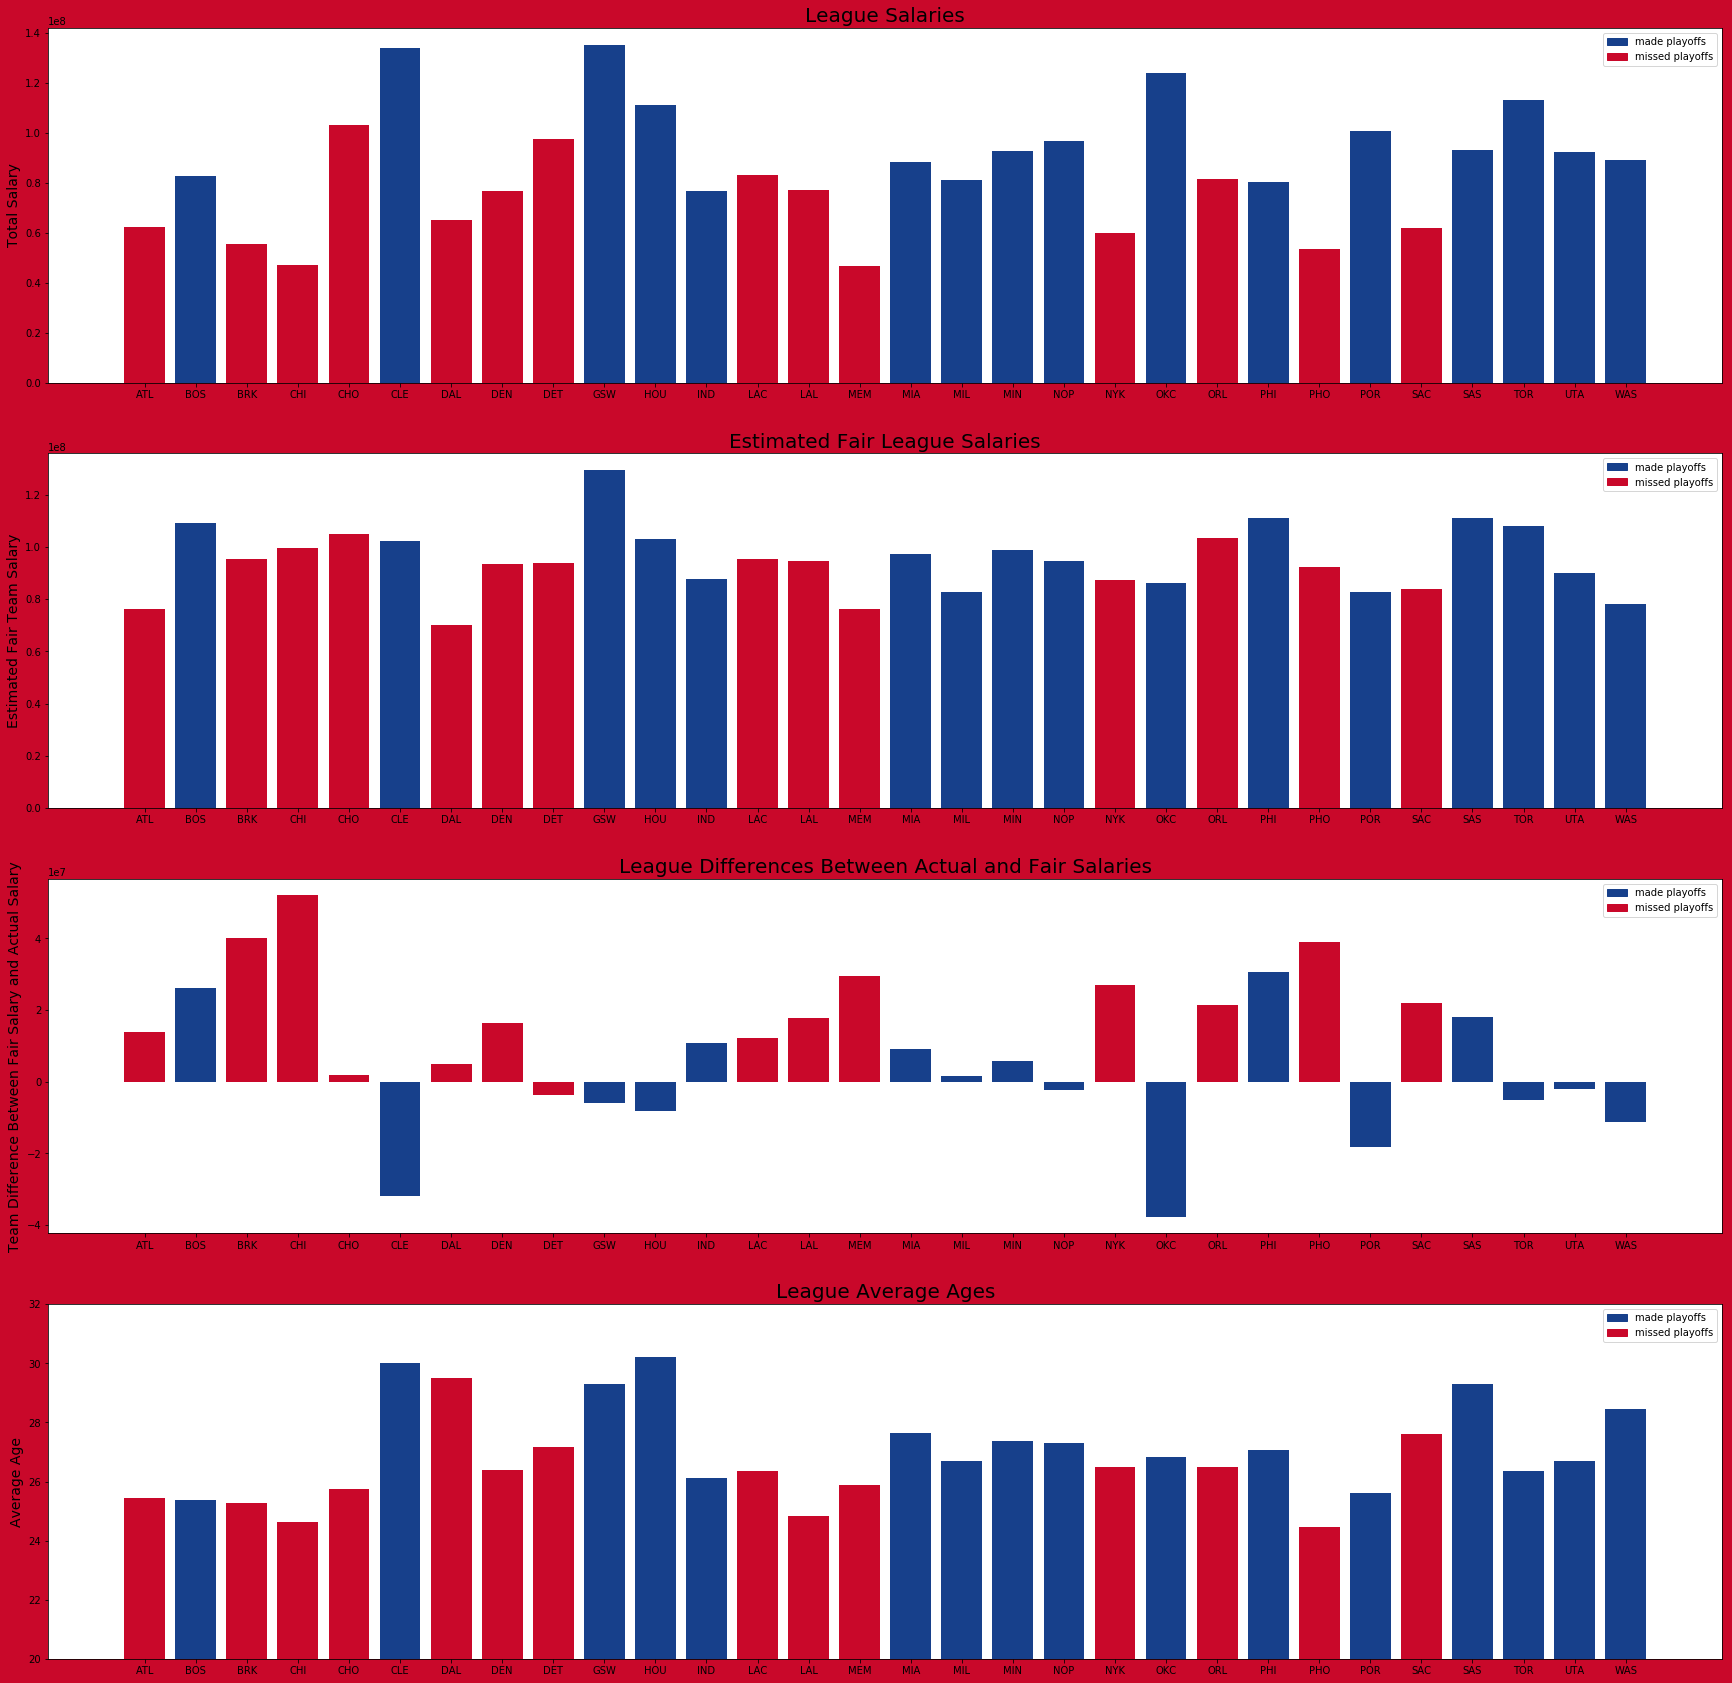

In [136]:
fig, (ax1,ax2,ax3,ax4) =plt.subplots(4,figsize=(30,30),facecolor=('#C9082A'))
ax1.bar(height='Total Salary',x='Team',data=league,color=league['Color'])
ax1.set_title('League Salaries',fontsize=20)
ax1.set_ylabel('Total Salary',fontsize=14)
ax1.legend(handles=[playoff_patch,not_playoff_patch])
ax2.bar(height=league['Estimated Fair Salary'],x=league['Team'],color=league['Color'])
ax2.set_title('Estimated Fair League Salaries',fontsize=20)
ax2.set_ylabel('Estimated Fair Team Salary',fontsize=14)
ax2.legend(handles=[playoff_patch,not_playoff_patch])
ax3.bar(height=league['Salary Difference'],x=league['Team'],color=league['Color'])
ax3.set_title('League Differences Between Actual and Fair Salaries',fontsize=20)
ax3.set_ylabel('Team Difference Between Fair Salary and Actual Salary',fontsize=14)
ax3.legend(handles=[playoff_patch,not_playoff_patch])
ax4.bar(height=league['Average Age'],x=league['Team'],color=league['Color'])
ax4.set_title('League Average Ages',fontsize=20)
ax4.set_ylabel('Average Age',fontsize=14)
ax4.set_ylim(20,32)
ax4.legend(handles=[playoff_patch,not_playoff_patch])

__Analysis__

Based on the above graphs we see that on average the teams who are making the playoffs are the ones who are paying more for their roster. The two highest spending teams to miss the playoffs were Detroit and Charlotte. After looking at the salary difference graph we see that the only team to miss the playoffs that is overpaying for their roster was Detroit. This is likely because of Detroits late season acquisition of Blake Griffin, one of the most overpaid players. We also saw earlier that Charlotte had two of the most overpaid players. It is also interesting to see that Oklahoma City, despite paying the third highest salary in the NBA did not have the third best record, and was unable to make a deep playoff run.

Another interesting aspect is that Cleveland and Golden State, the finalists the past two years and both still in the playoffs, are spending the most on their respective rosters compared to the rest of the league. This may be a signal that spending more can lead to greater success. Golden State is also interesting because, even though they are a top spender, their roster appears to be worth this large sum based on their play.

Turning the attention to Boston this is one of the youngest teams who has made a push in the playoffs this year. Boston had only one player who was considered overpaid, but they may be able to afford this because of the young players who are underpaid on their roster. Boston is also still in the playoffs after defeating both Milwaukee and Philadelphia.

The youngest team is Phoenix, who in the coming years could be a problem as their players develop. Age did not seem to play a huge factor in success.

We see that teams who as a whole overpay for their roster are more likely to make it to the playoffs, but overpaying is not necessary to make it to the playoffs or make a deep run.

## Summary

After conducting my analysis I was able to reach 5 main conclusions:
    - Rookie players are tremendously underpaid for their performance
    - Top players are worth more than just their on court performance
    - Players who are between the ages of 25 and 30 are considered in their primes and typically are paid the most
    - Paying more for a team does not necessarily make that team better
    - Players who want to be paid more should score more points because this stat has the most direct correlation 
    with salary
   
By looking at these rules an organization can better asses the value of a player to that team. I have attached an appendix which includes every player on every team's salary difference and estimated fair salary. It also includes a analysis of every team based on their current roster and their future success.

## APPENDIX

In [137]:
team_colors=['#CE1141','#0C2340','#6F263D','#E03A3E','#00471B','#006BB6',
            '#007AC1','#1D1160','#007A33','#C4CED4','#002D62','#CE1141',
             '#006BB6','#006BB6','#002B5C','#ED174C','#0C2340','#1D1160',
             '#ED174C','#002B5C','#6189B9','#E03A3E','#00538C','#00285E',
             '#0077C0','#98002E','#552583','#000000','#CE1141','#5A2D81']

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


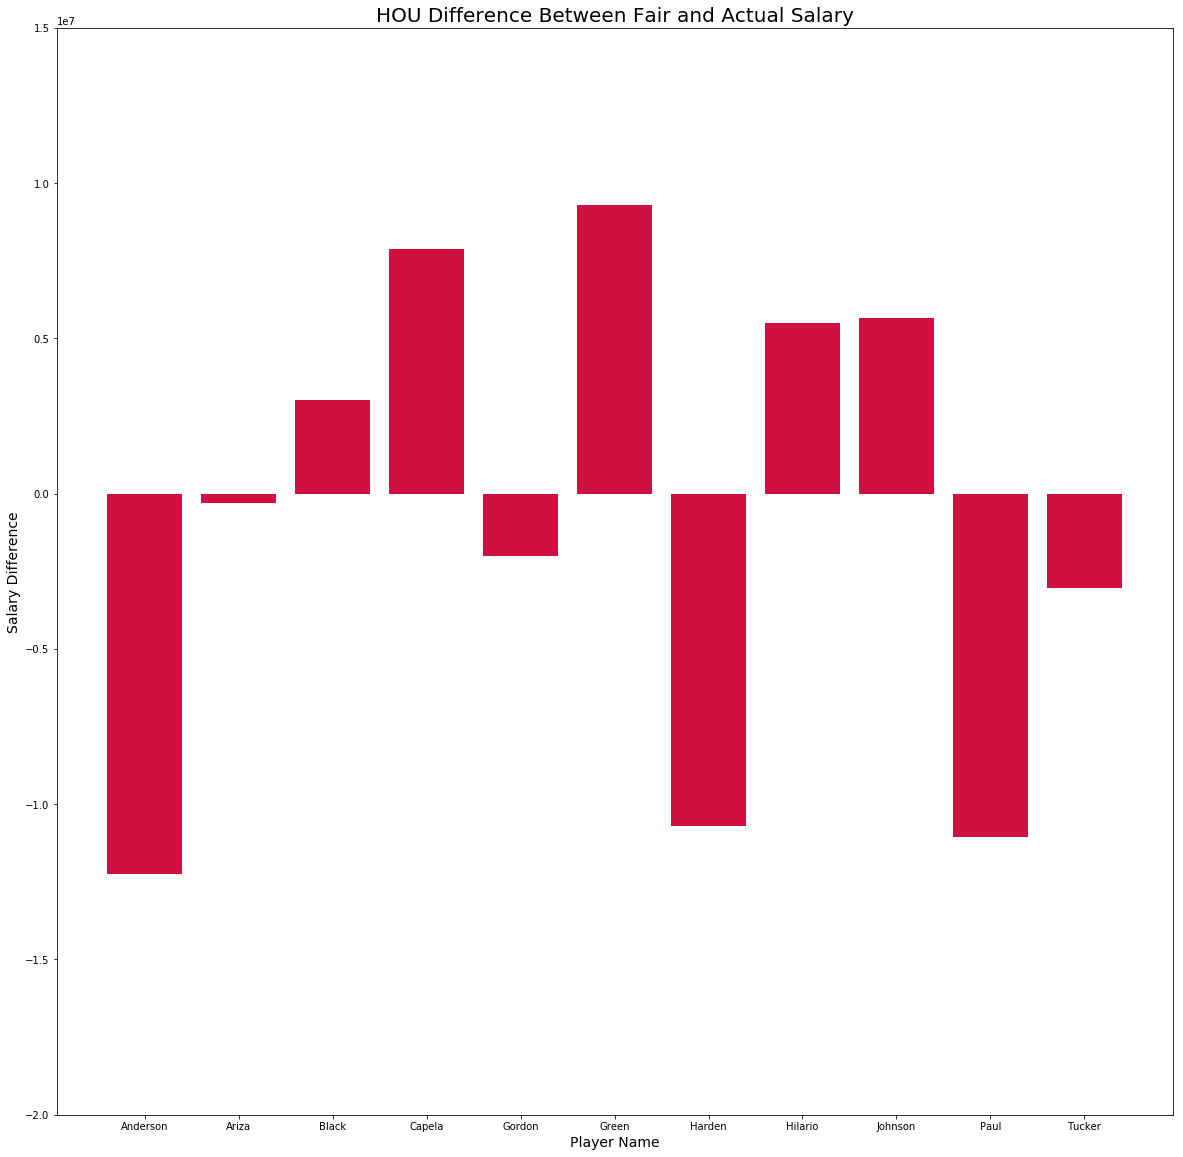

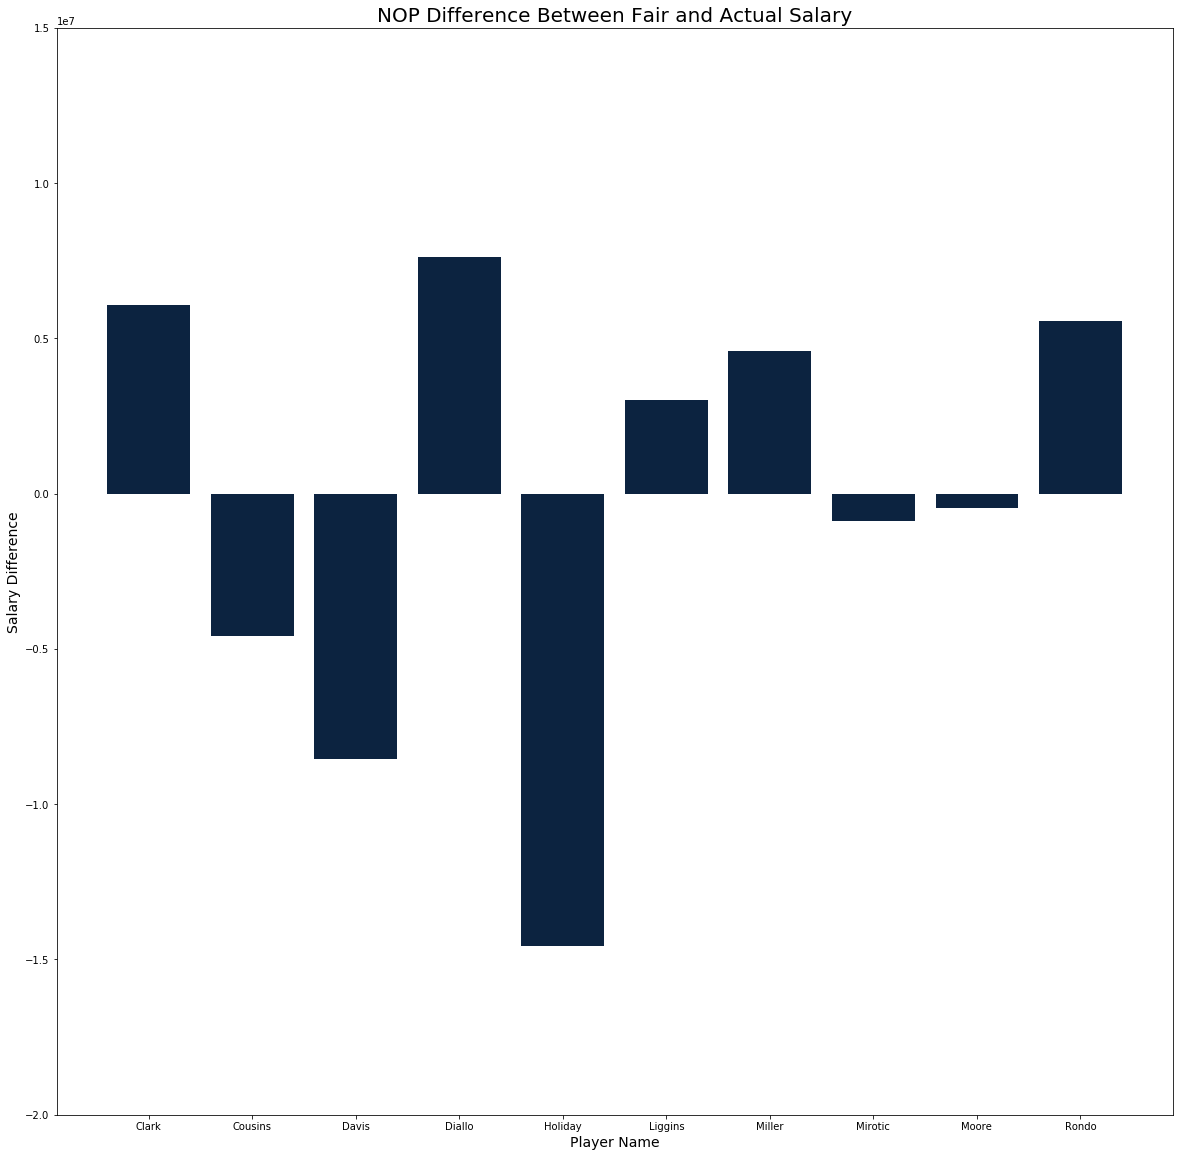

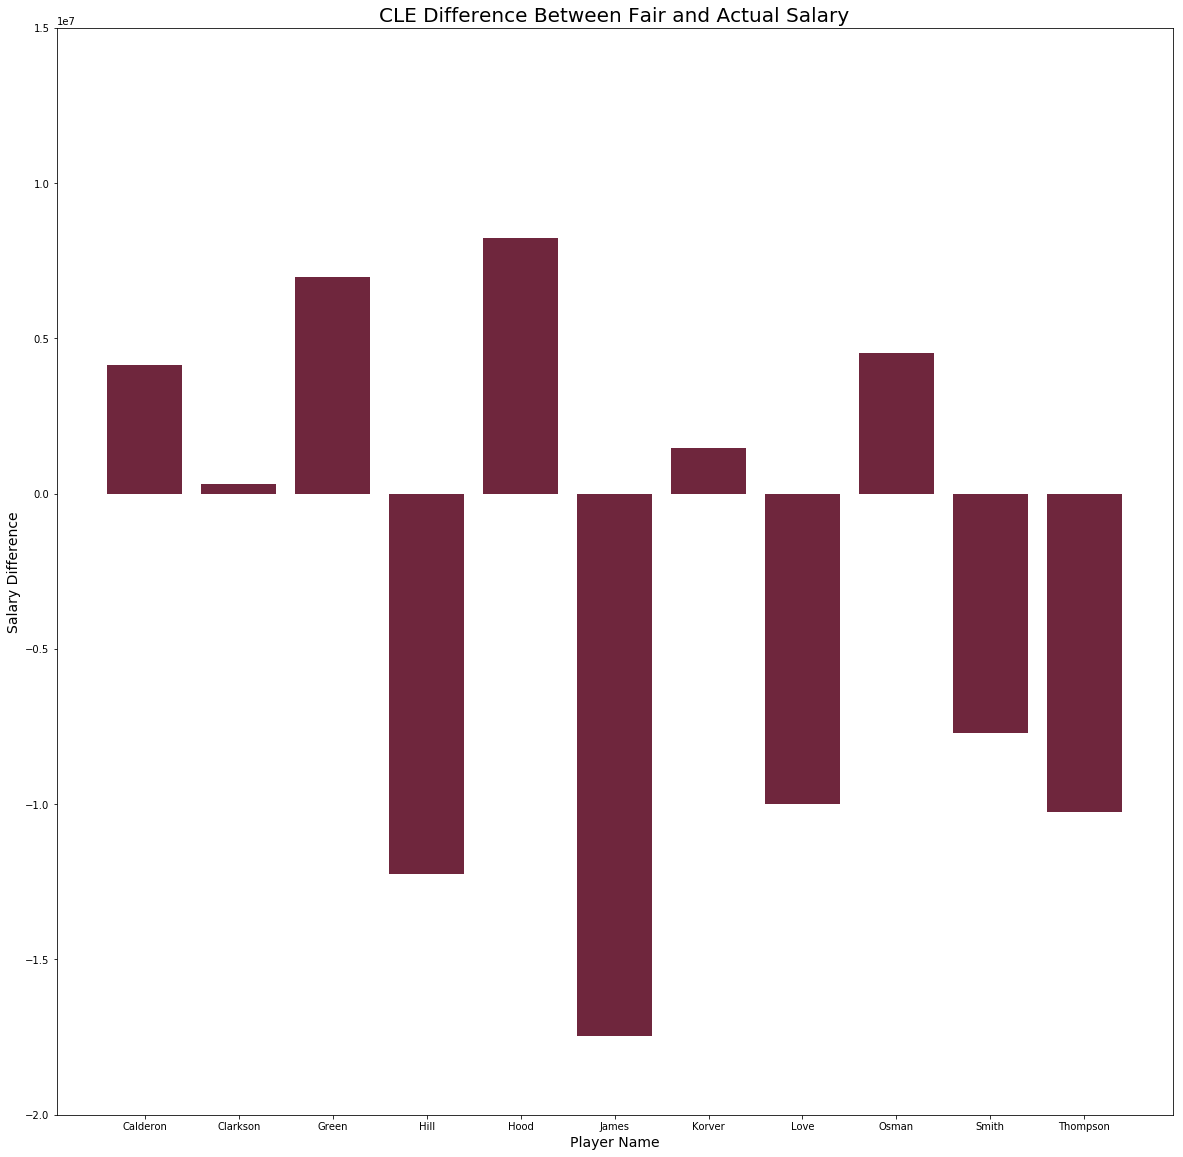

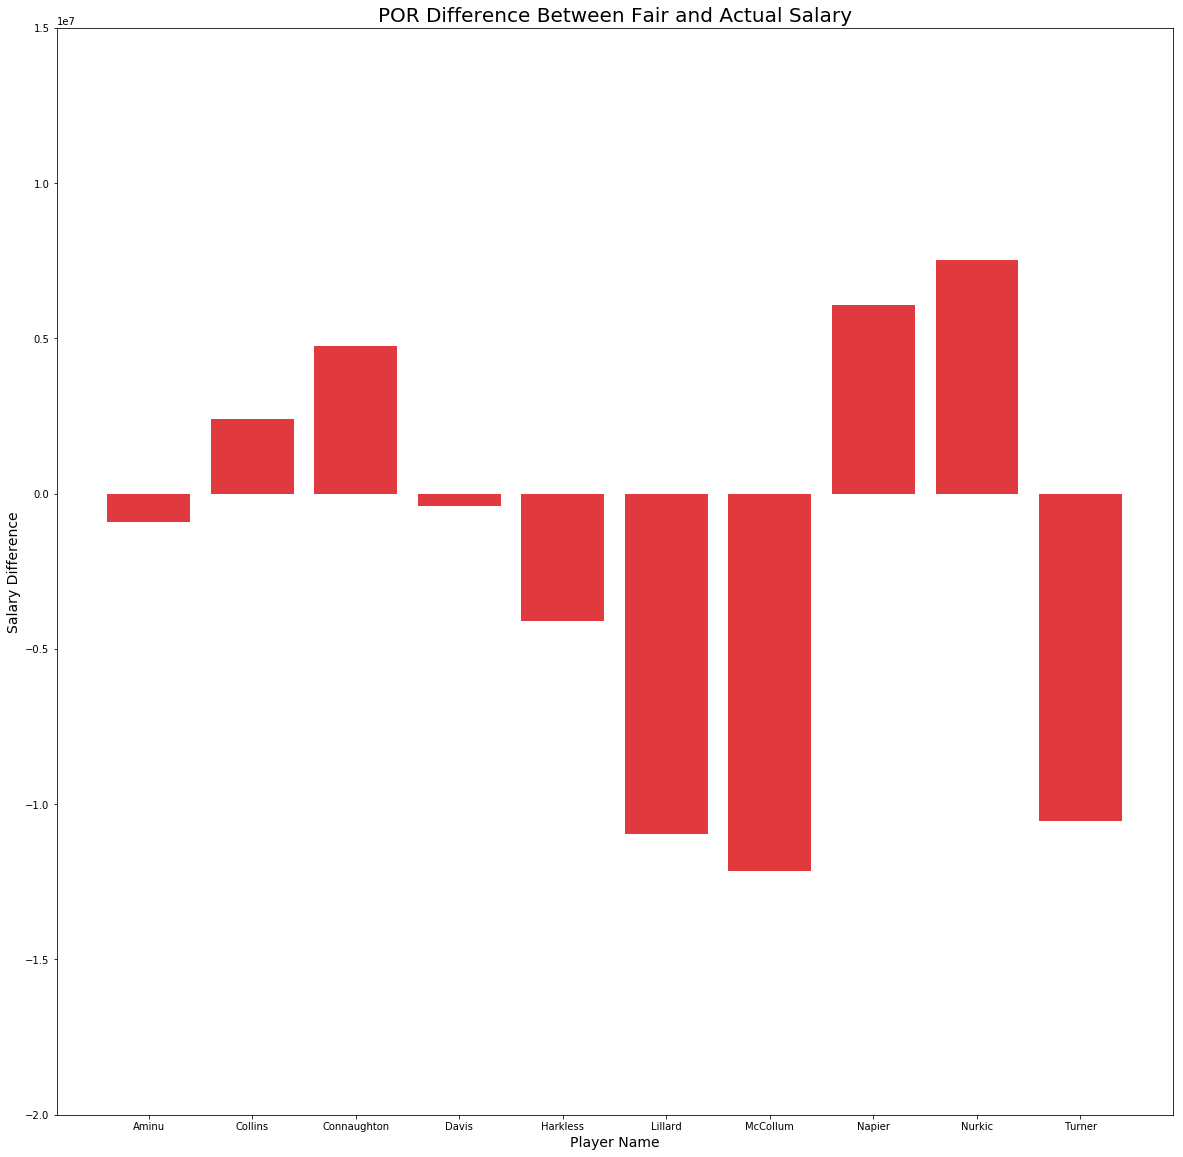

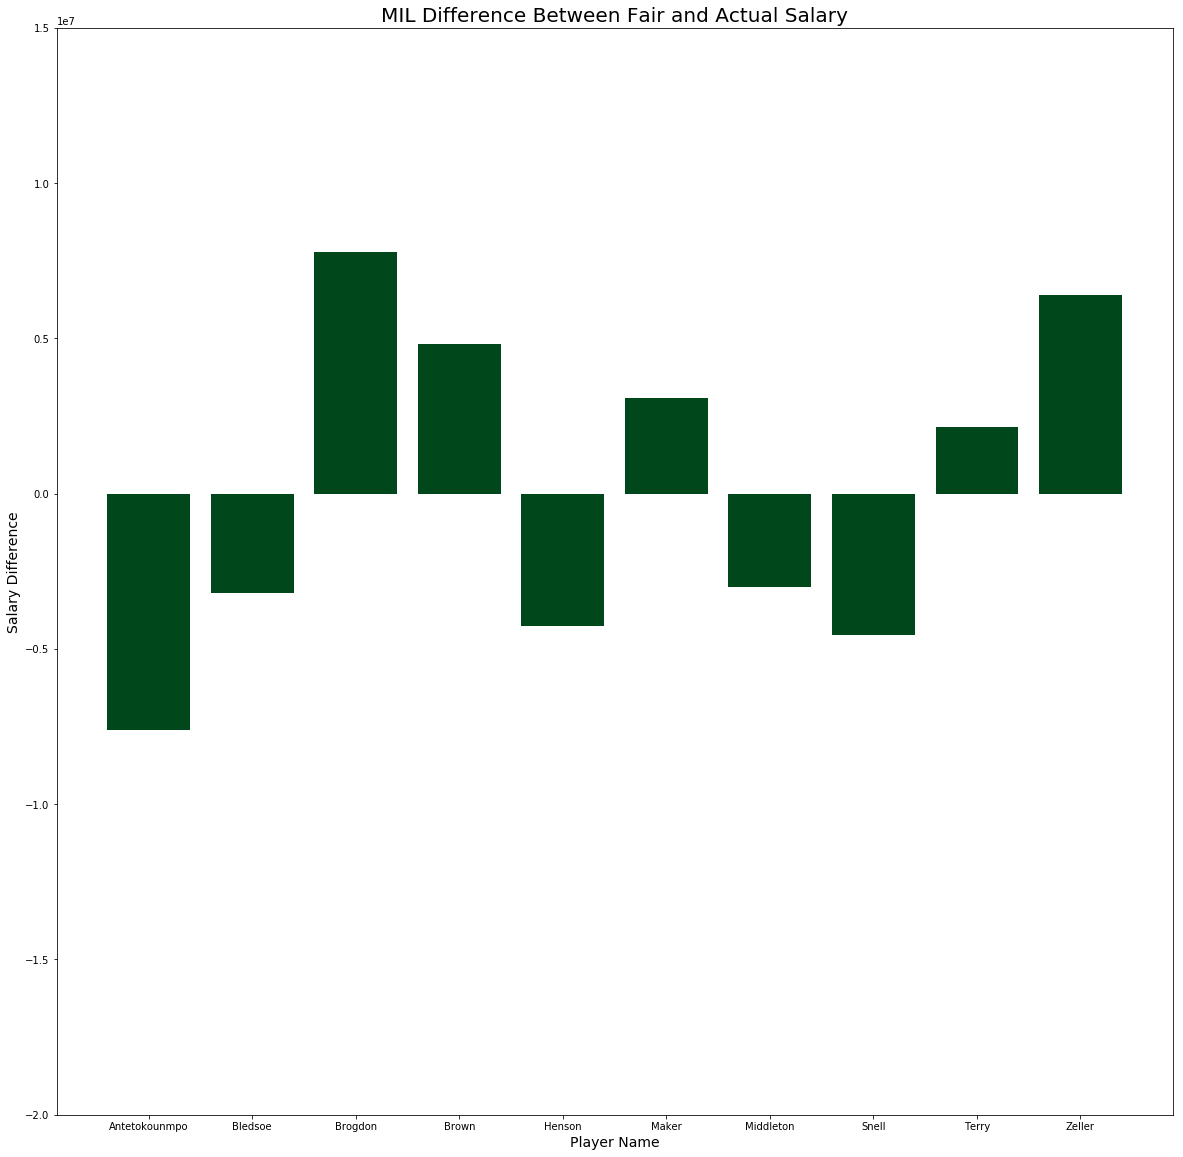

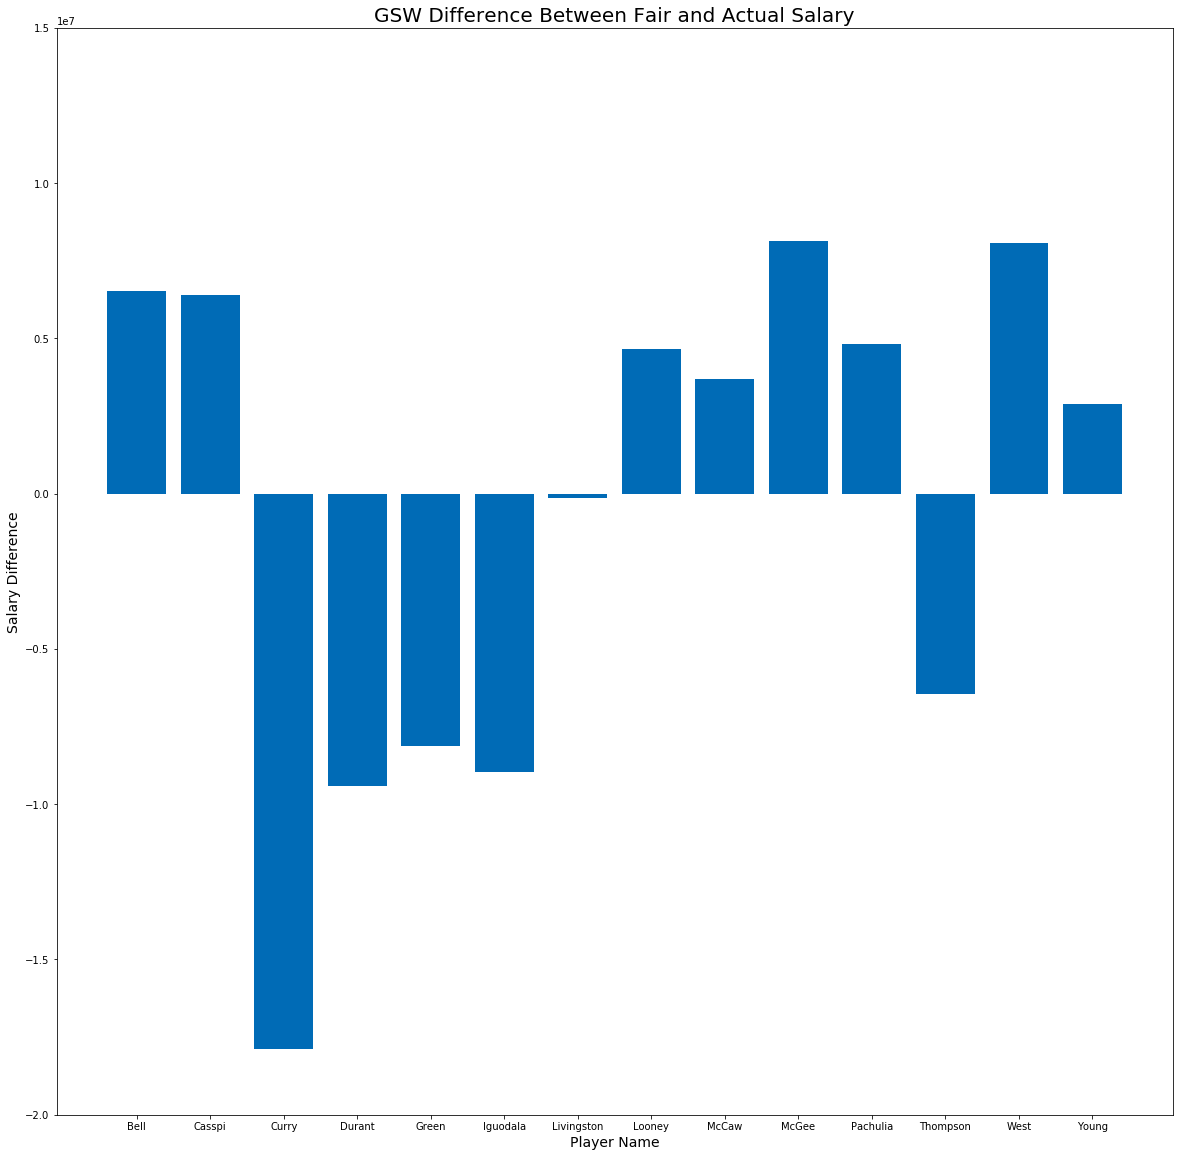

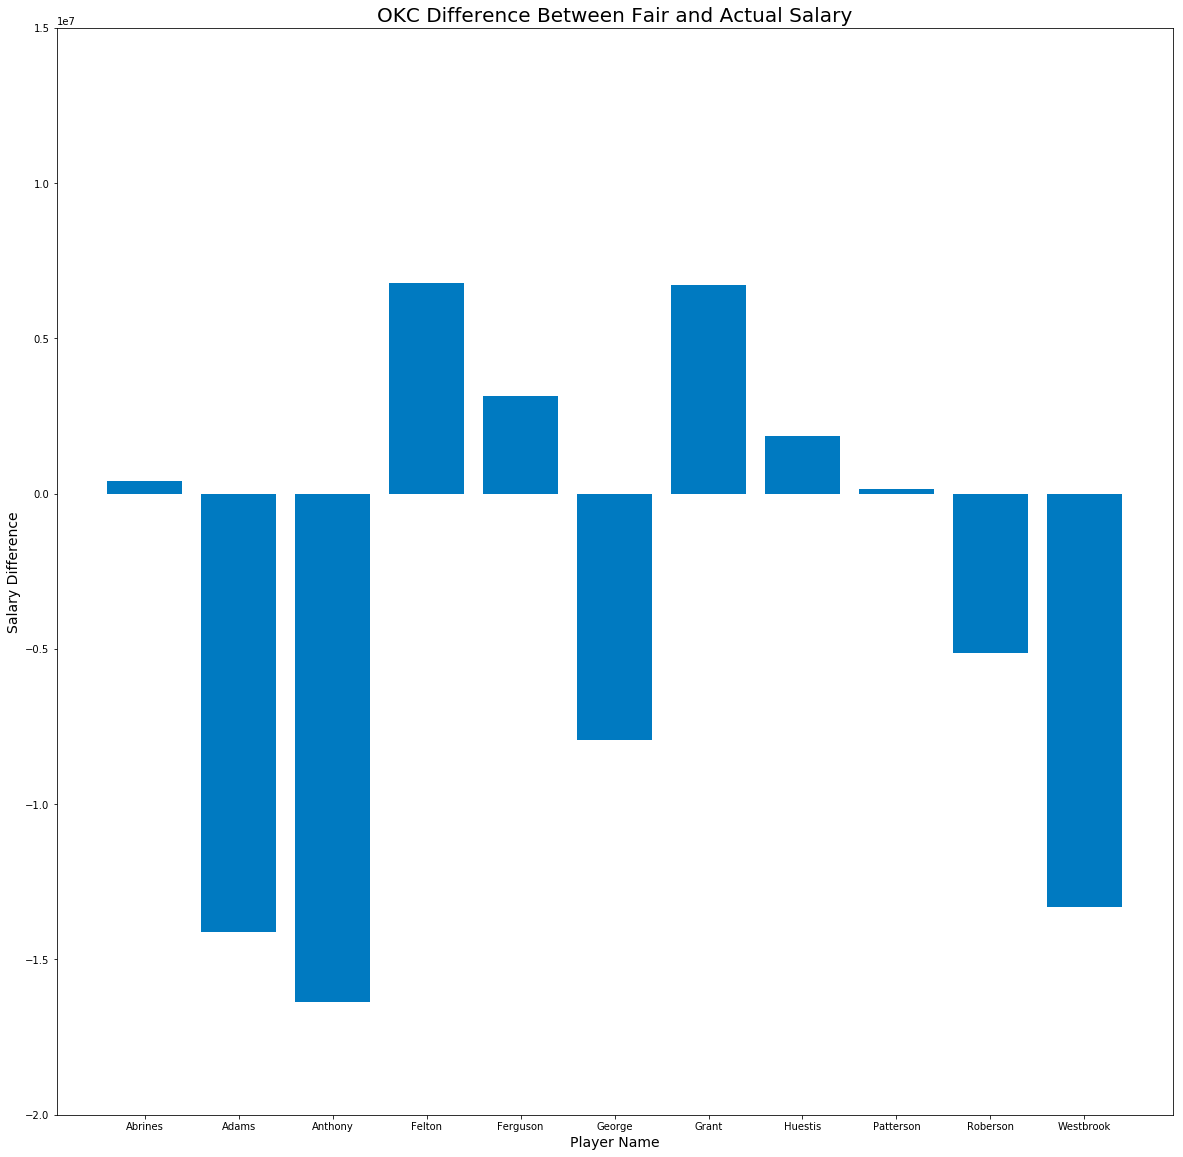

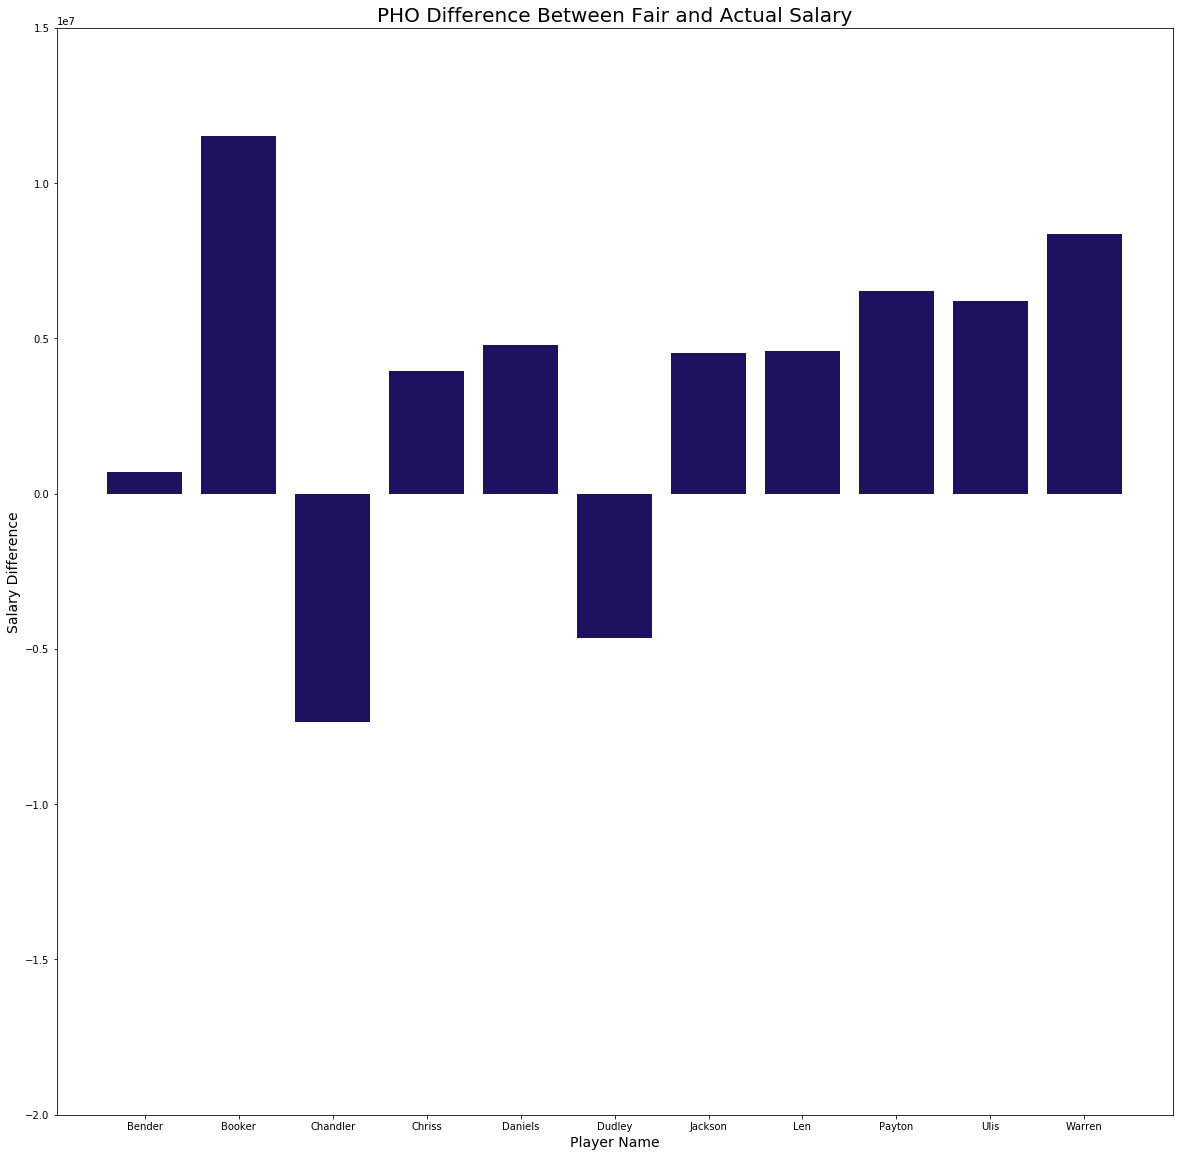

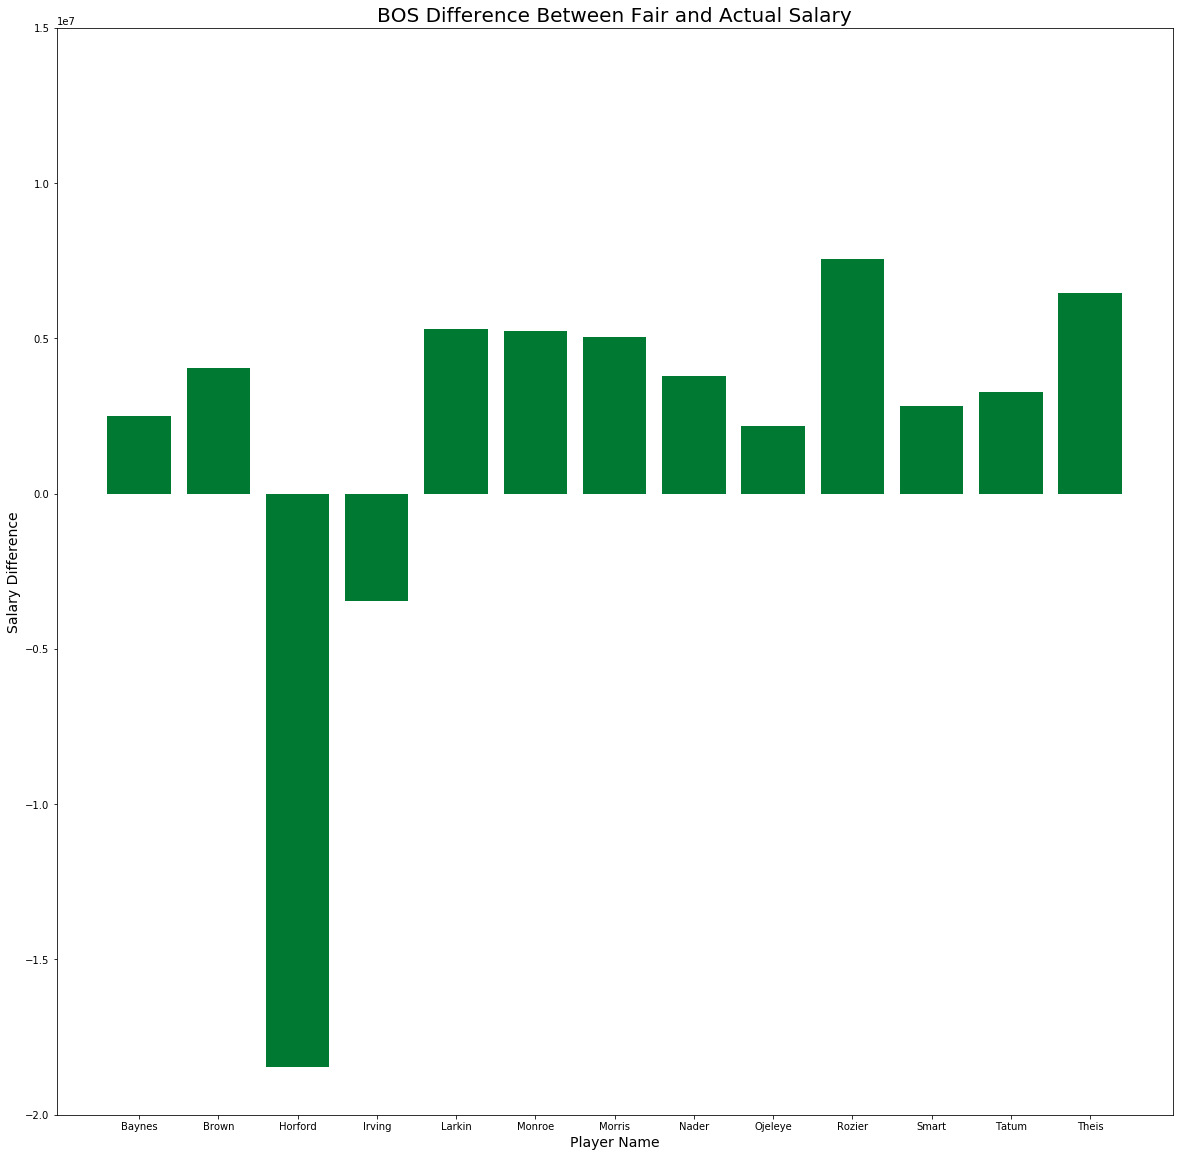

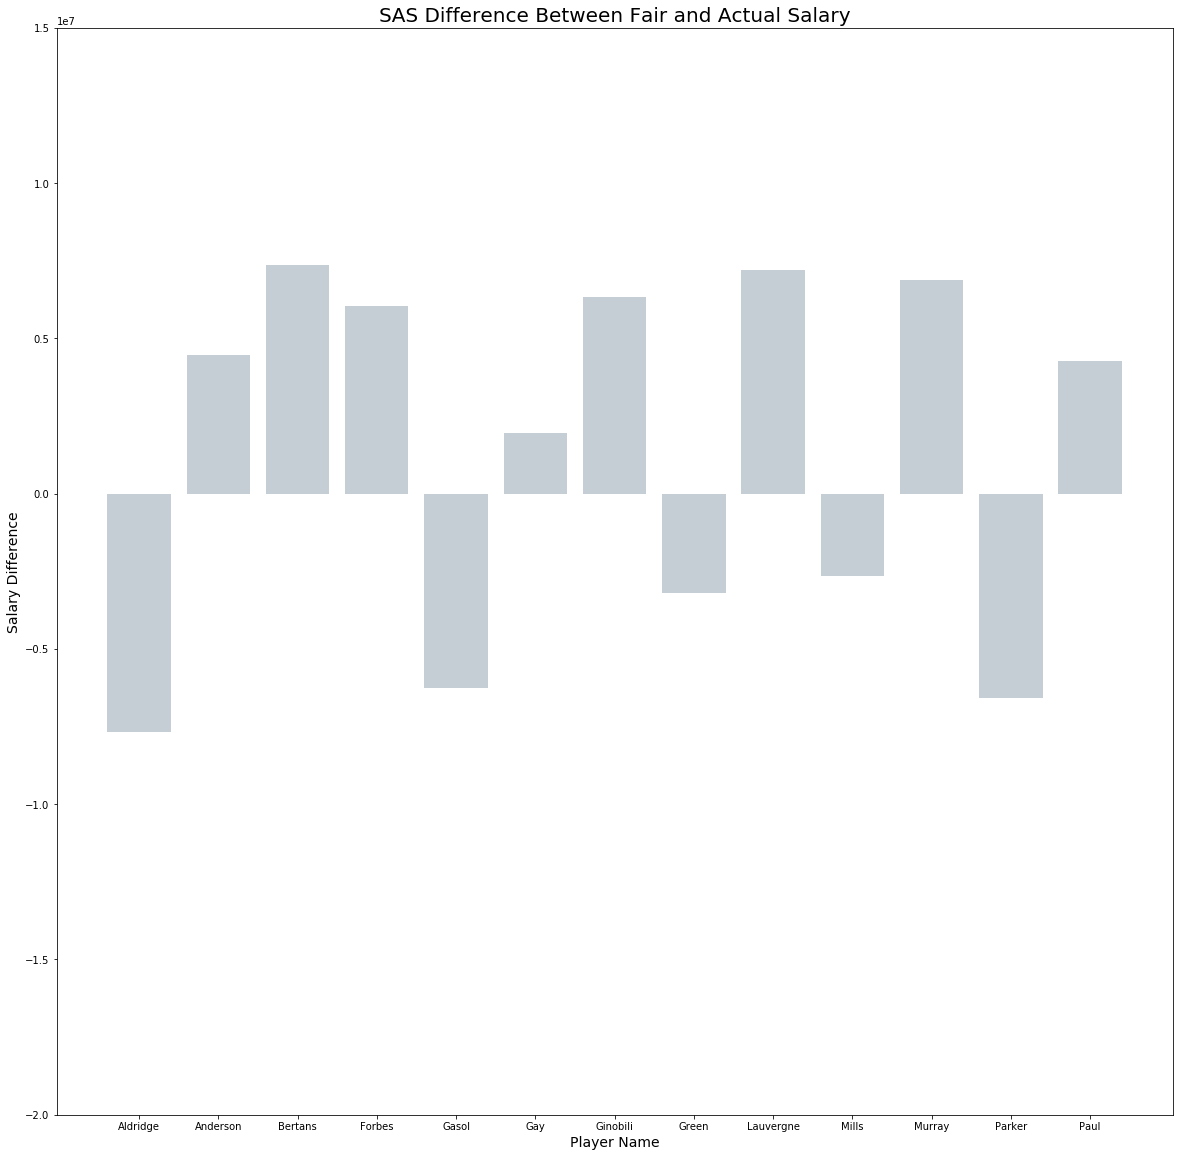

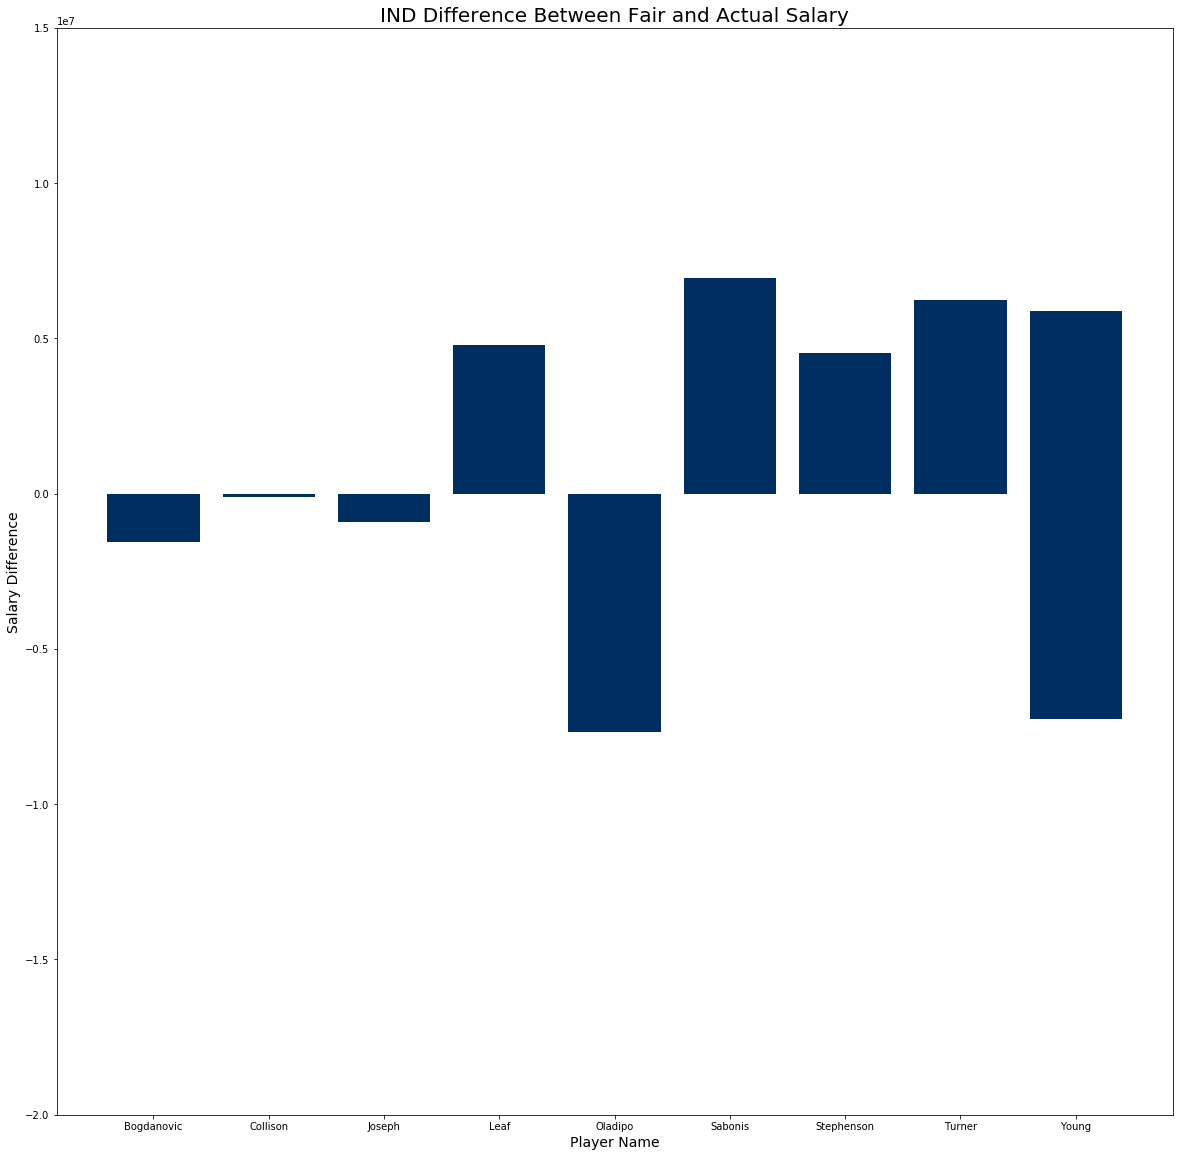

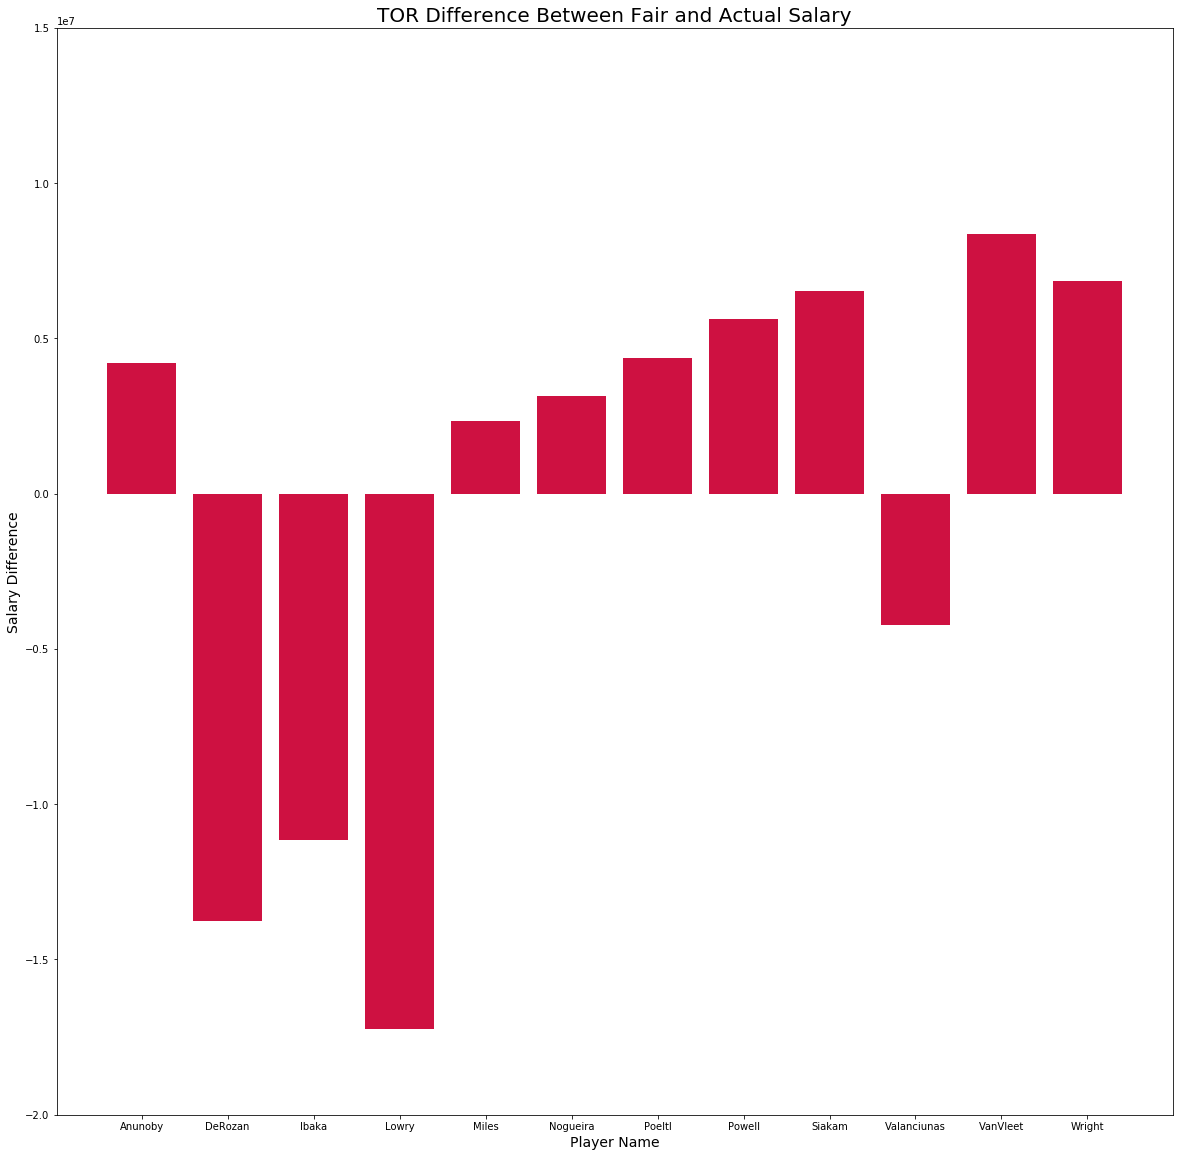

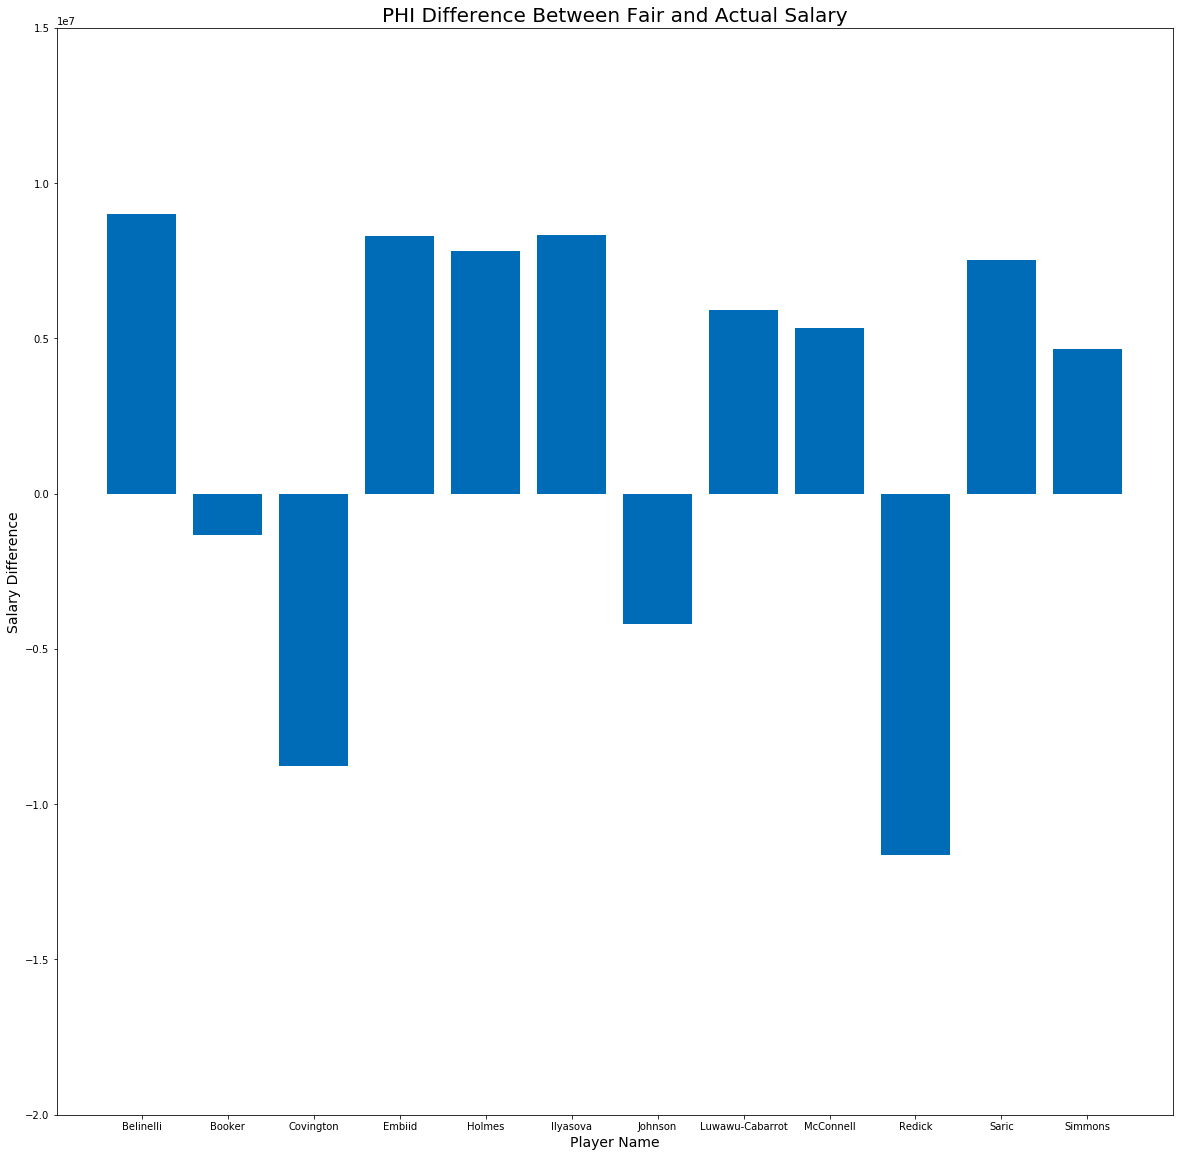

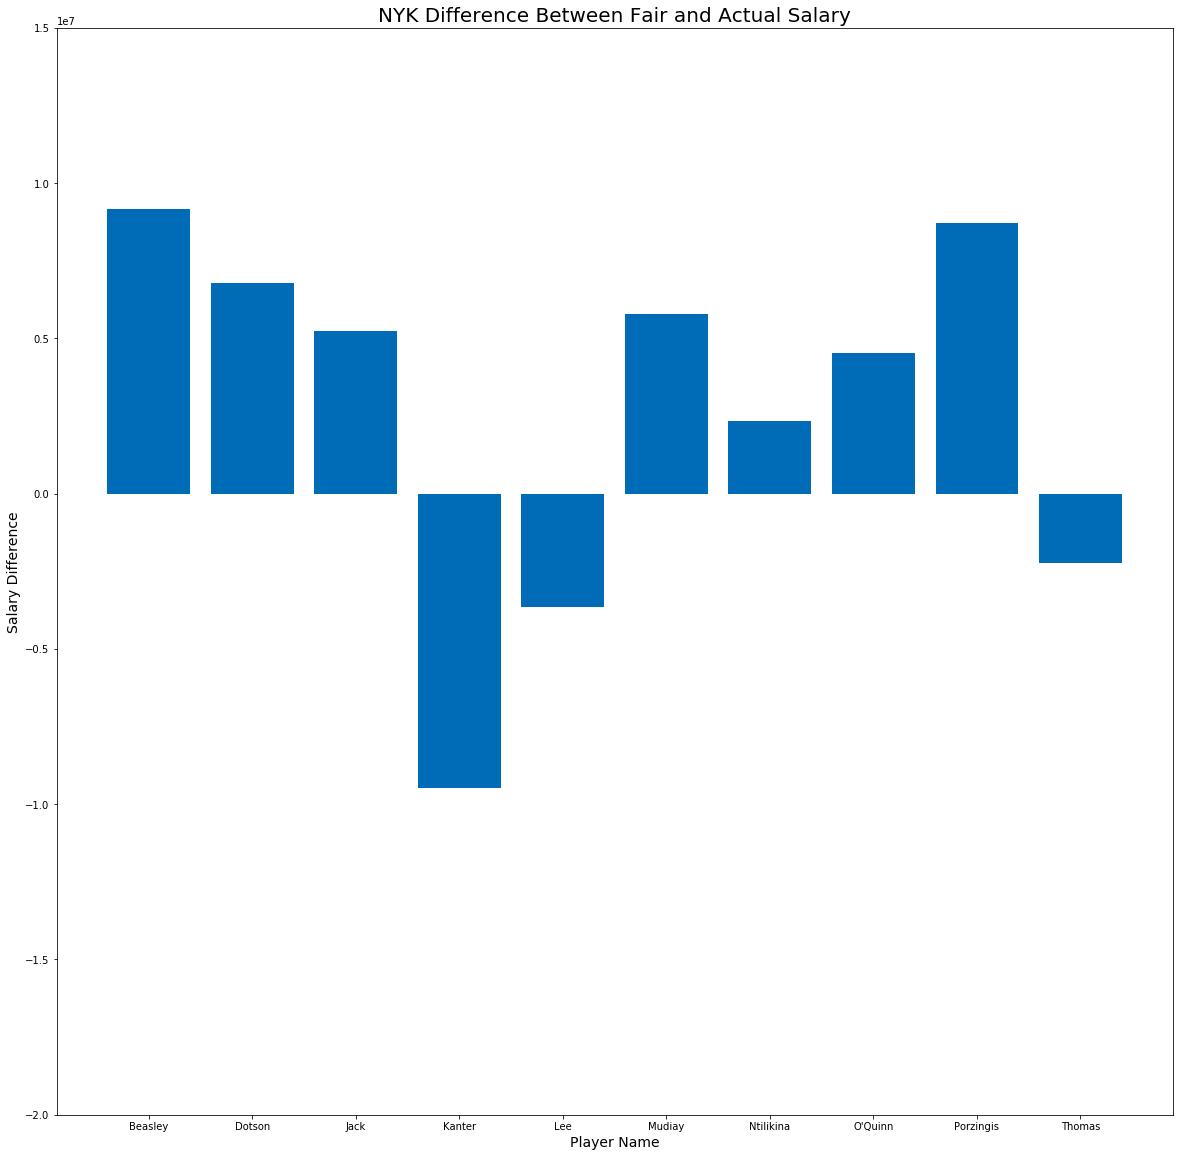

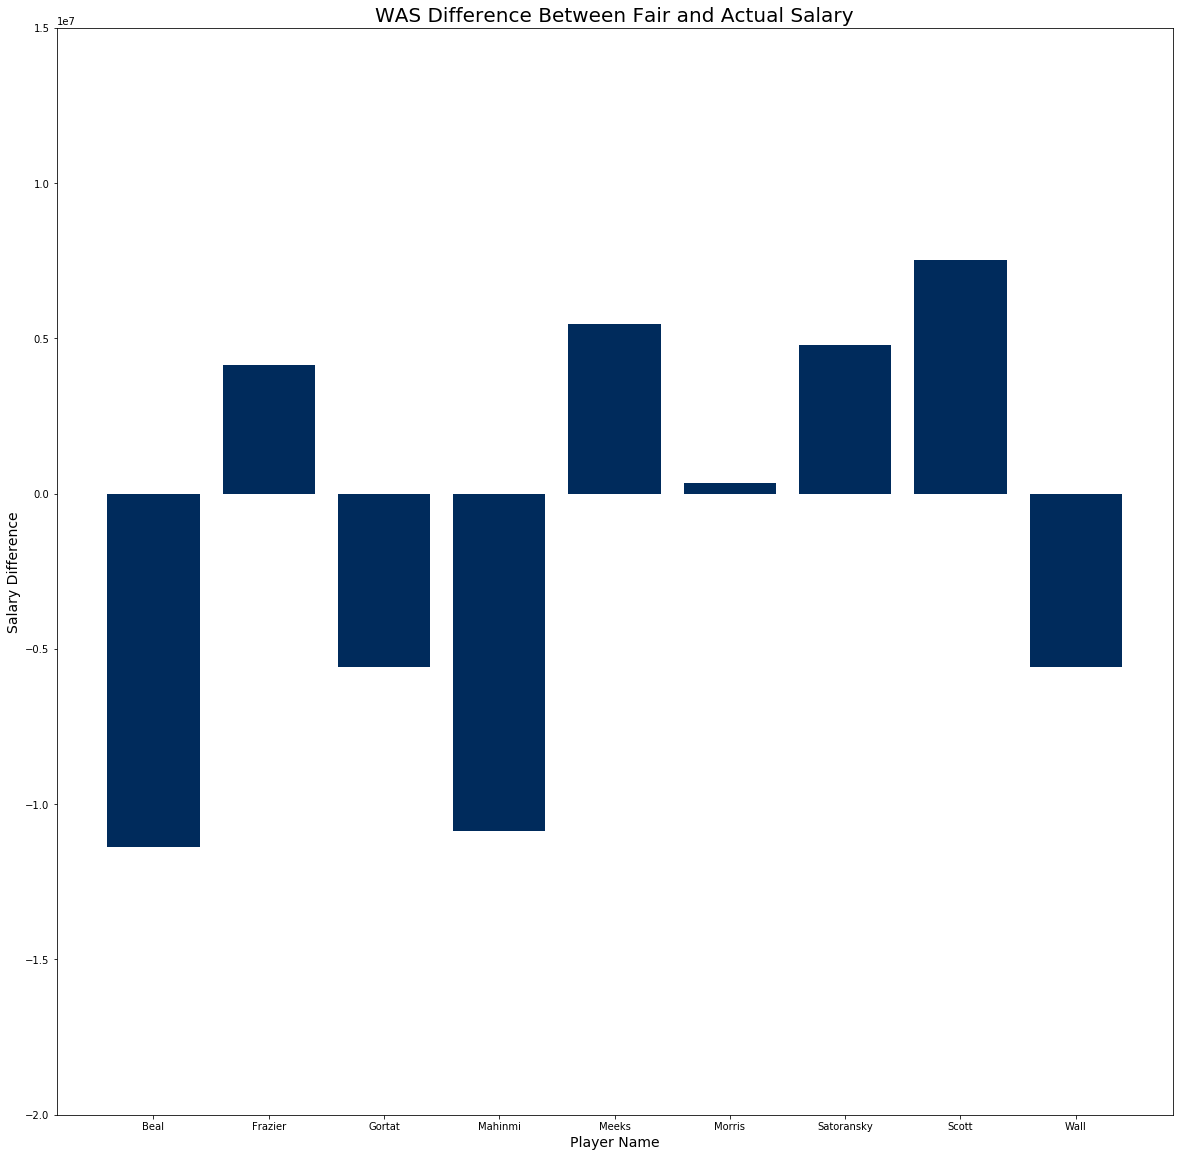

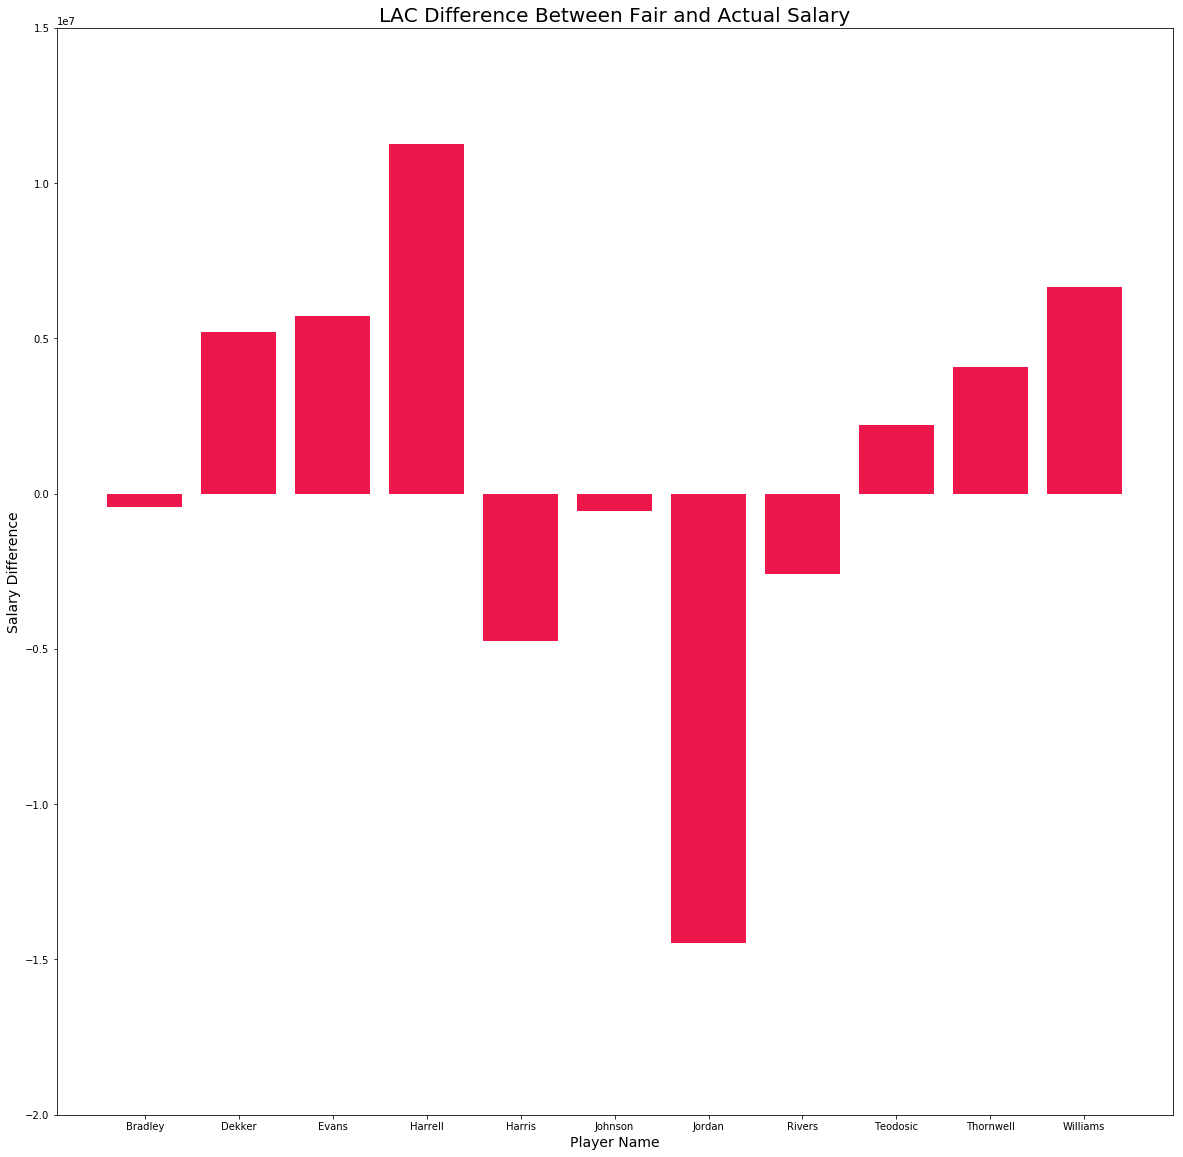

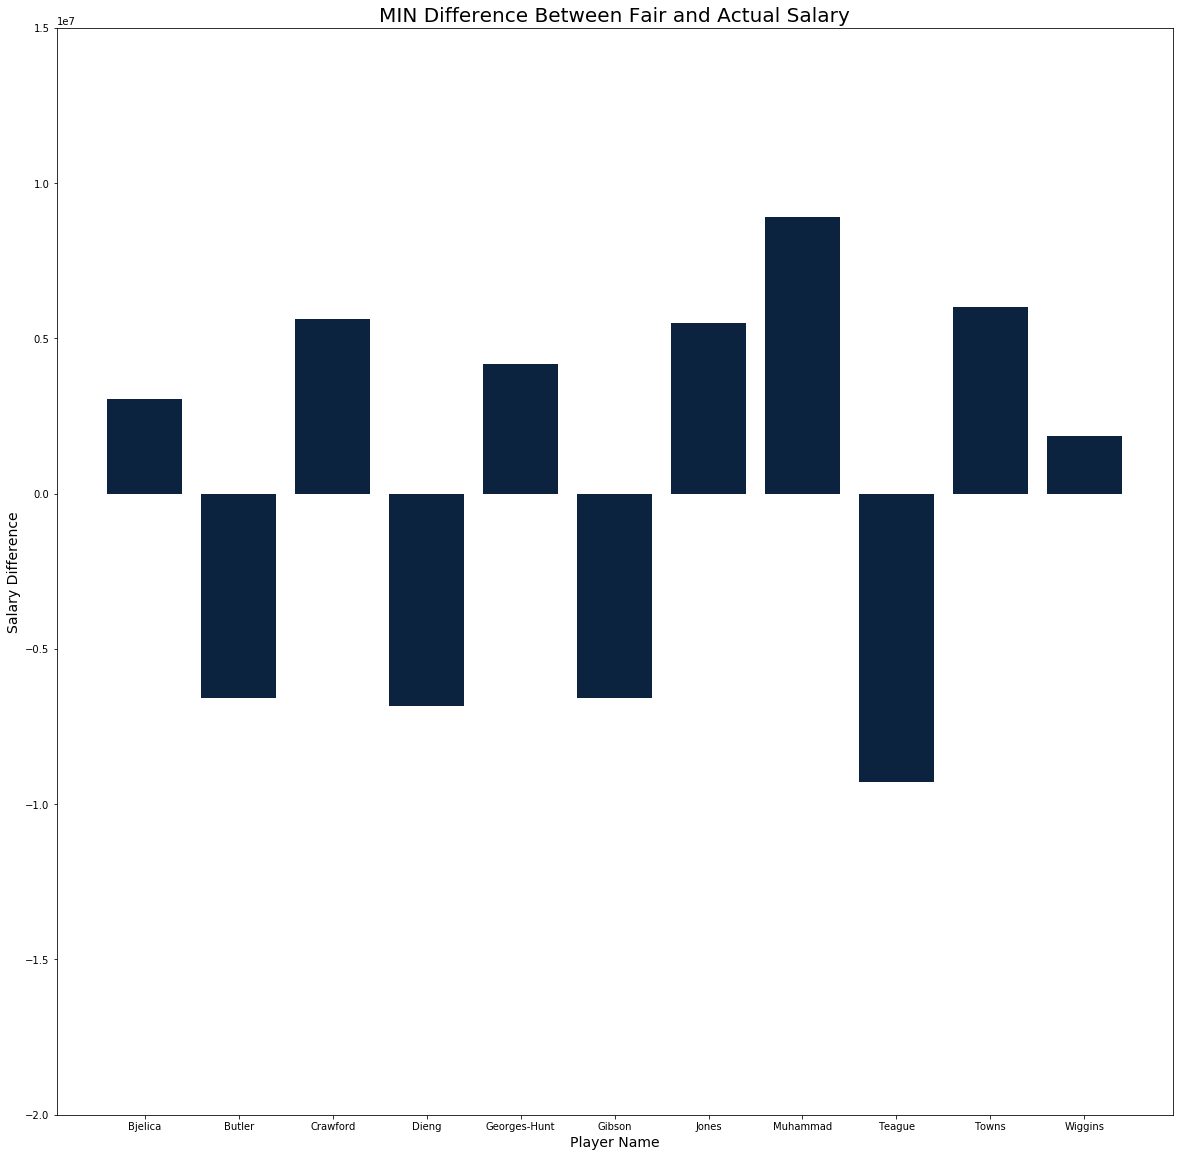

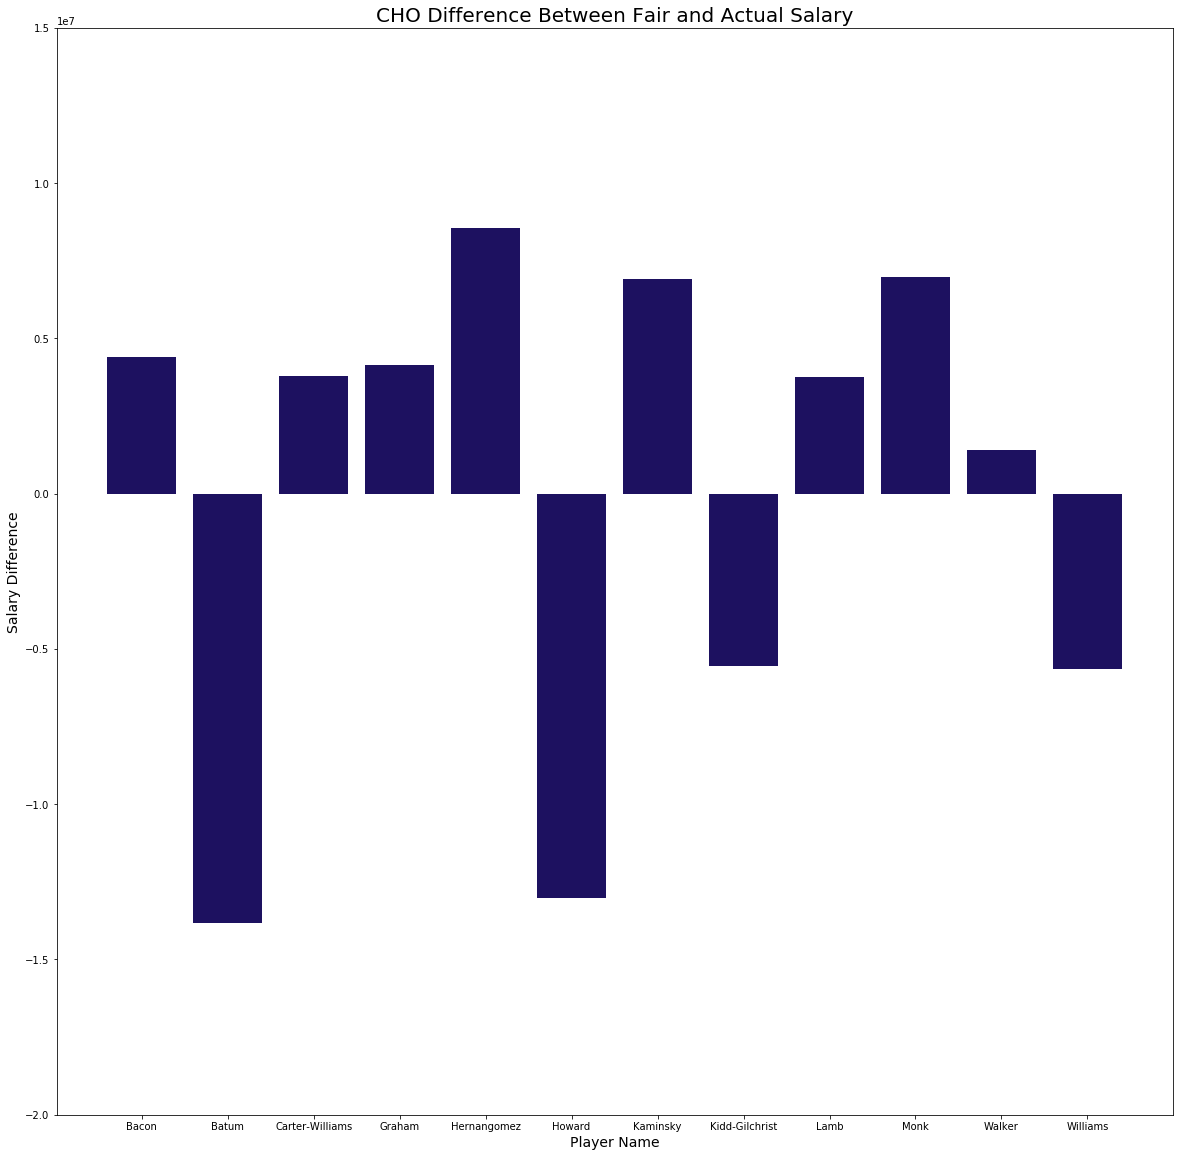

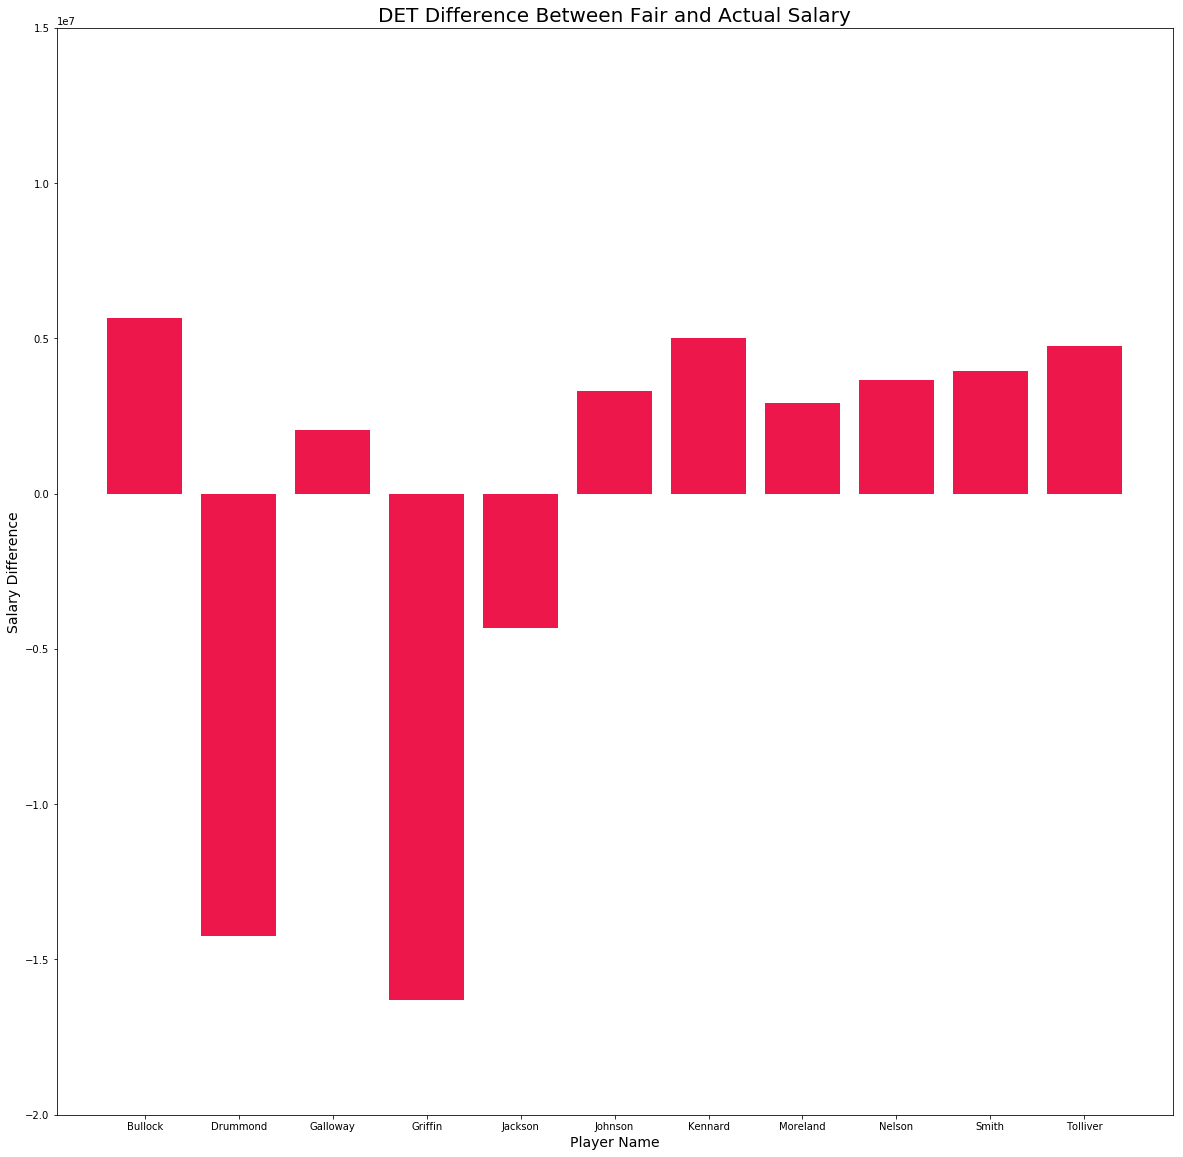

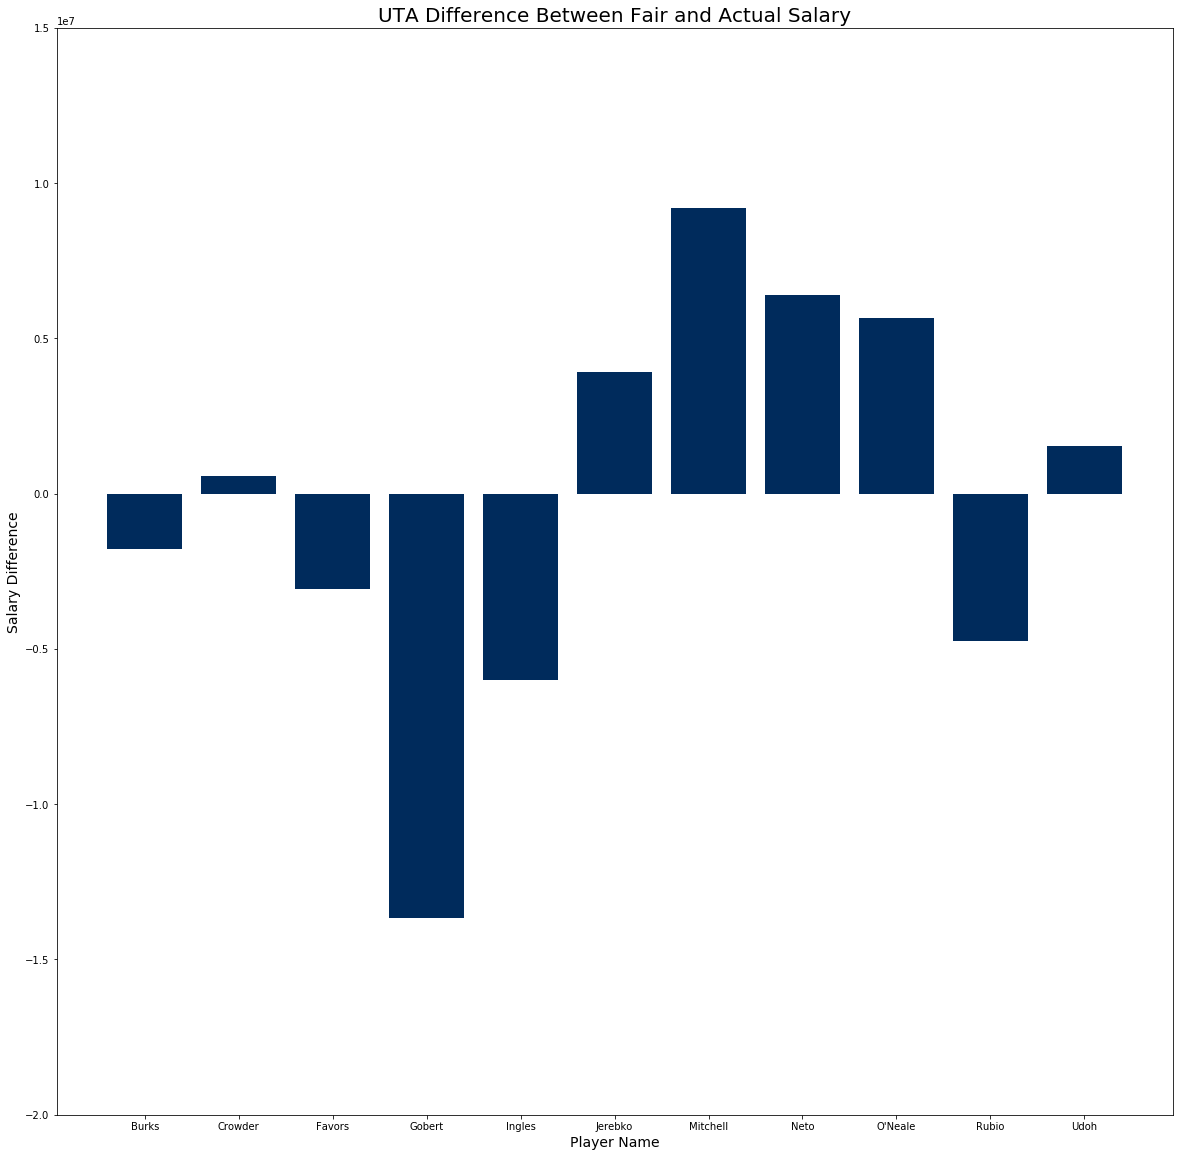

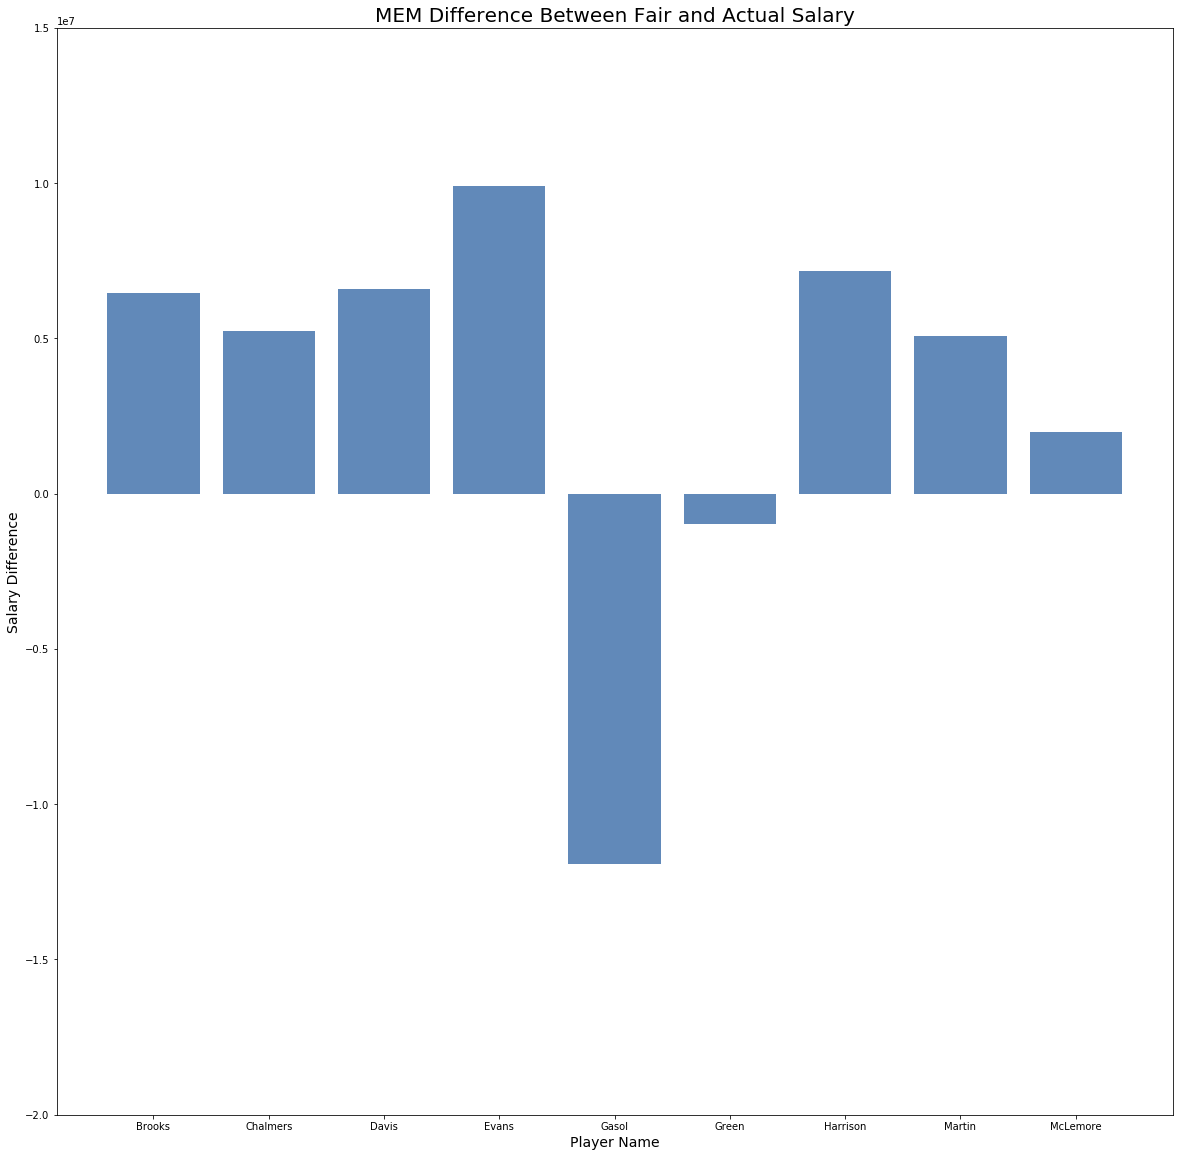

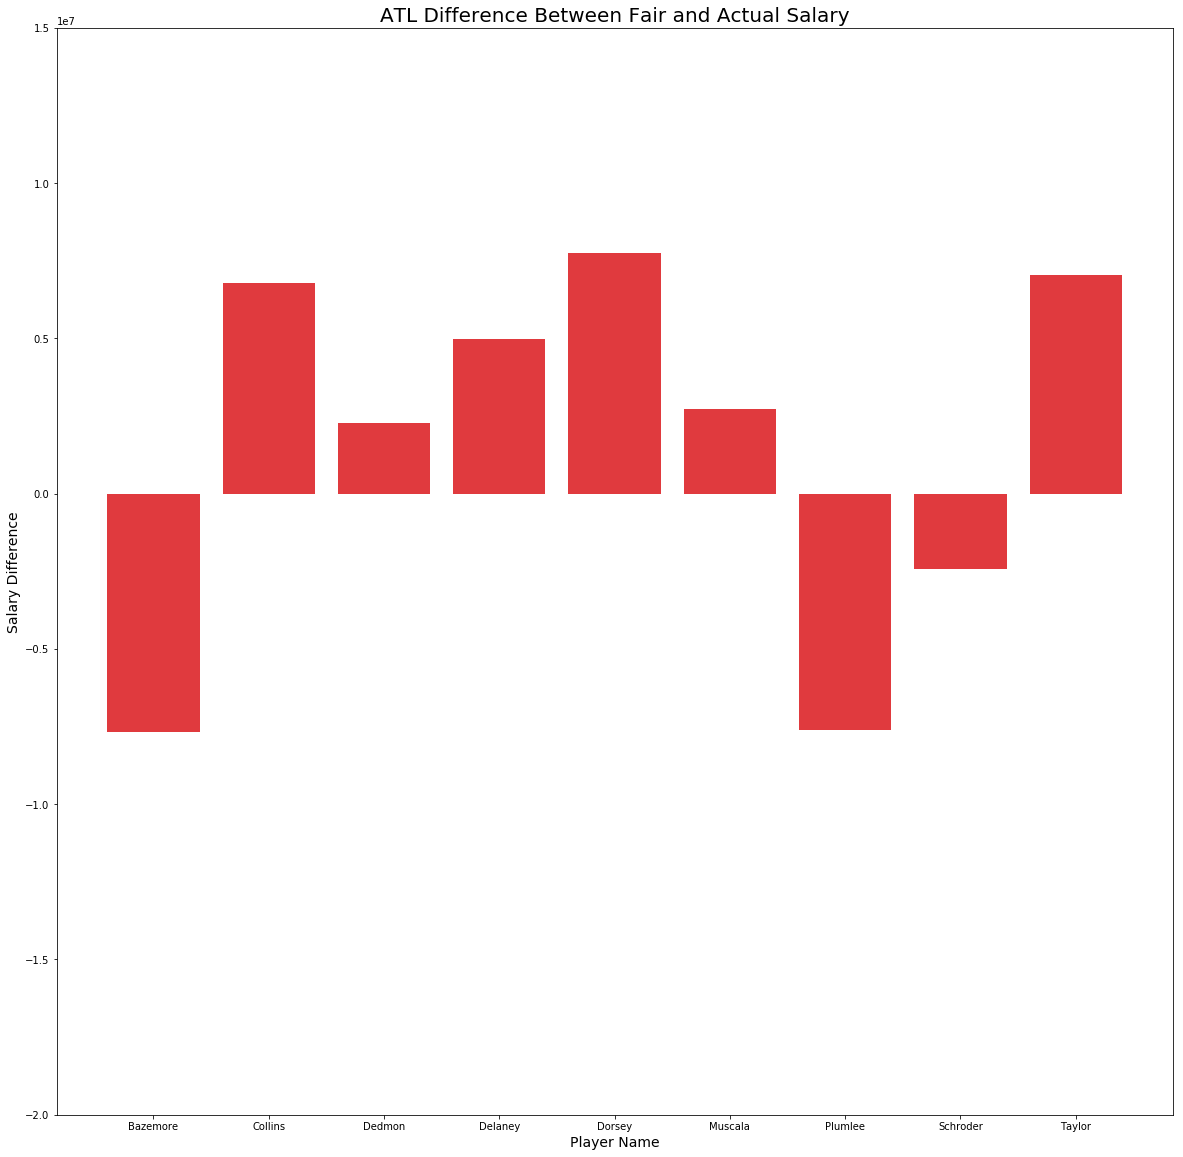

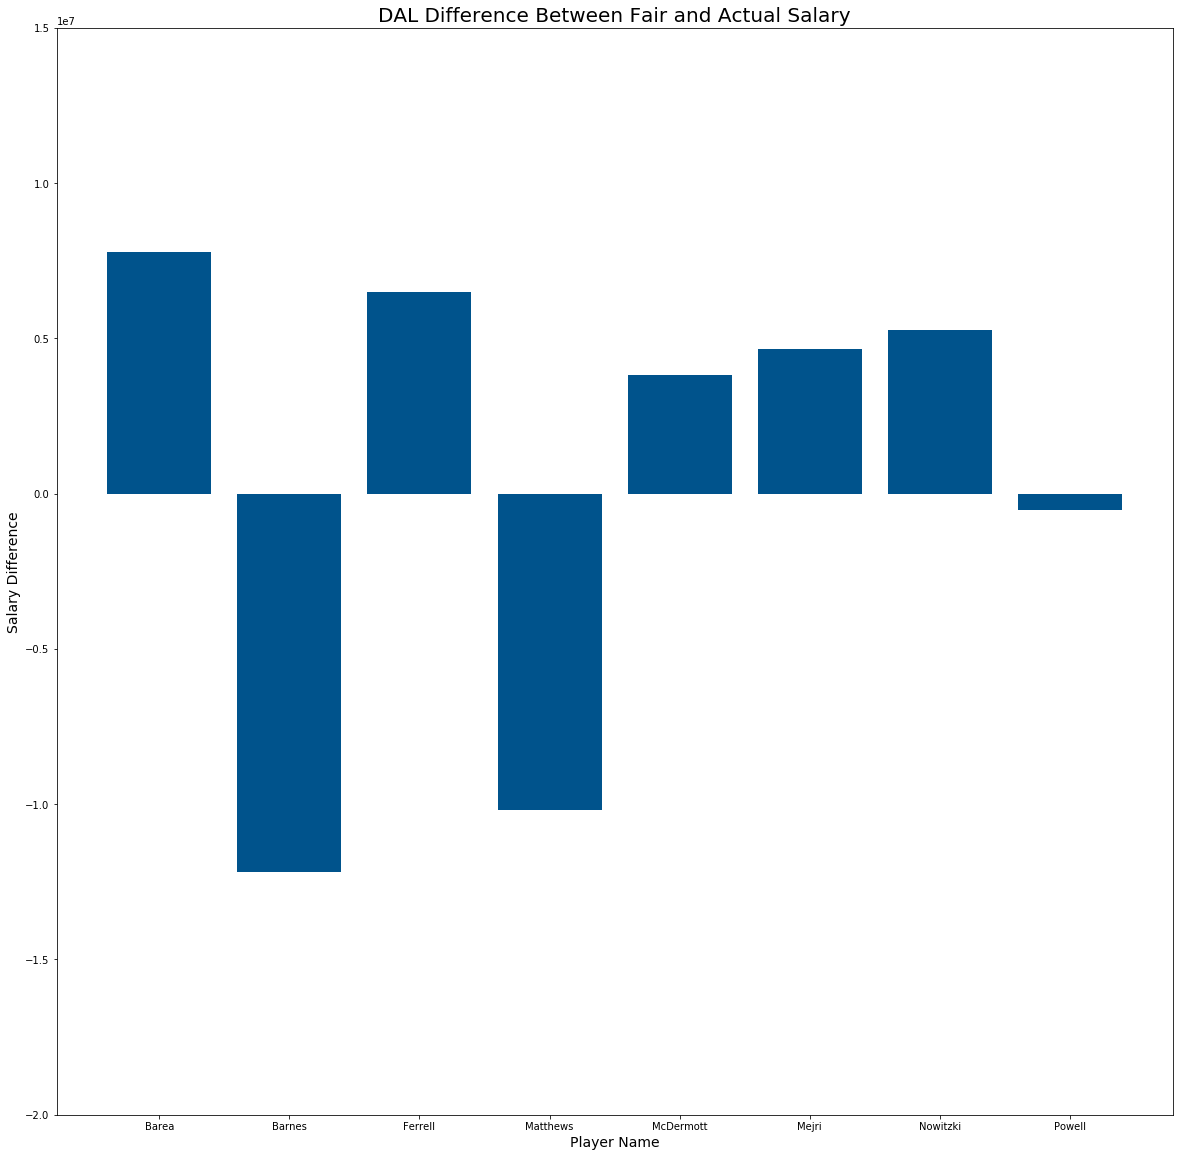

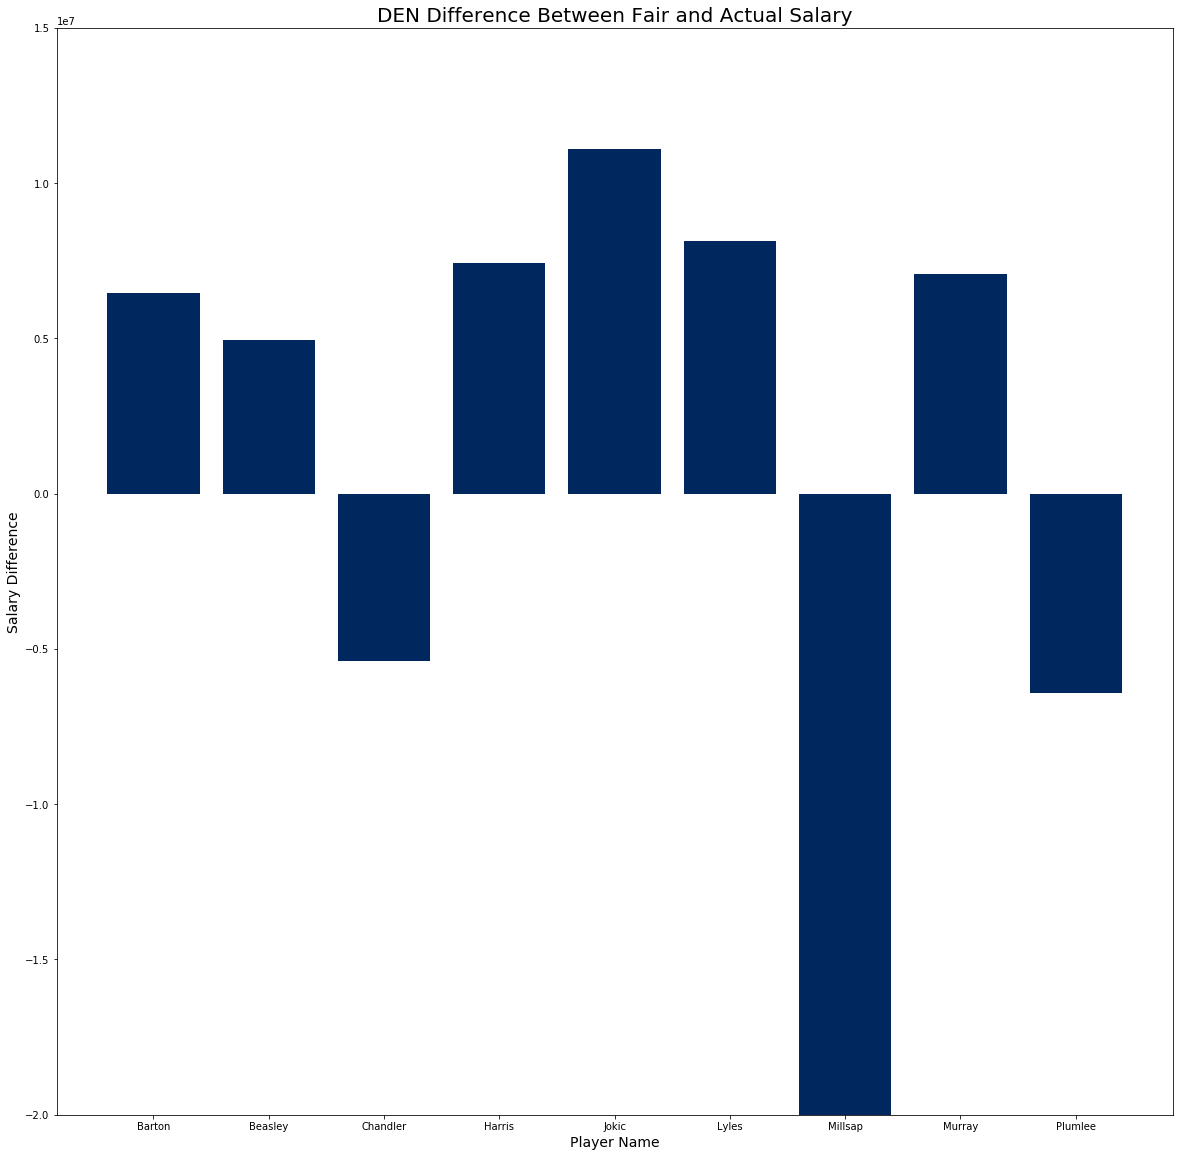

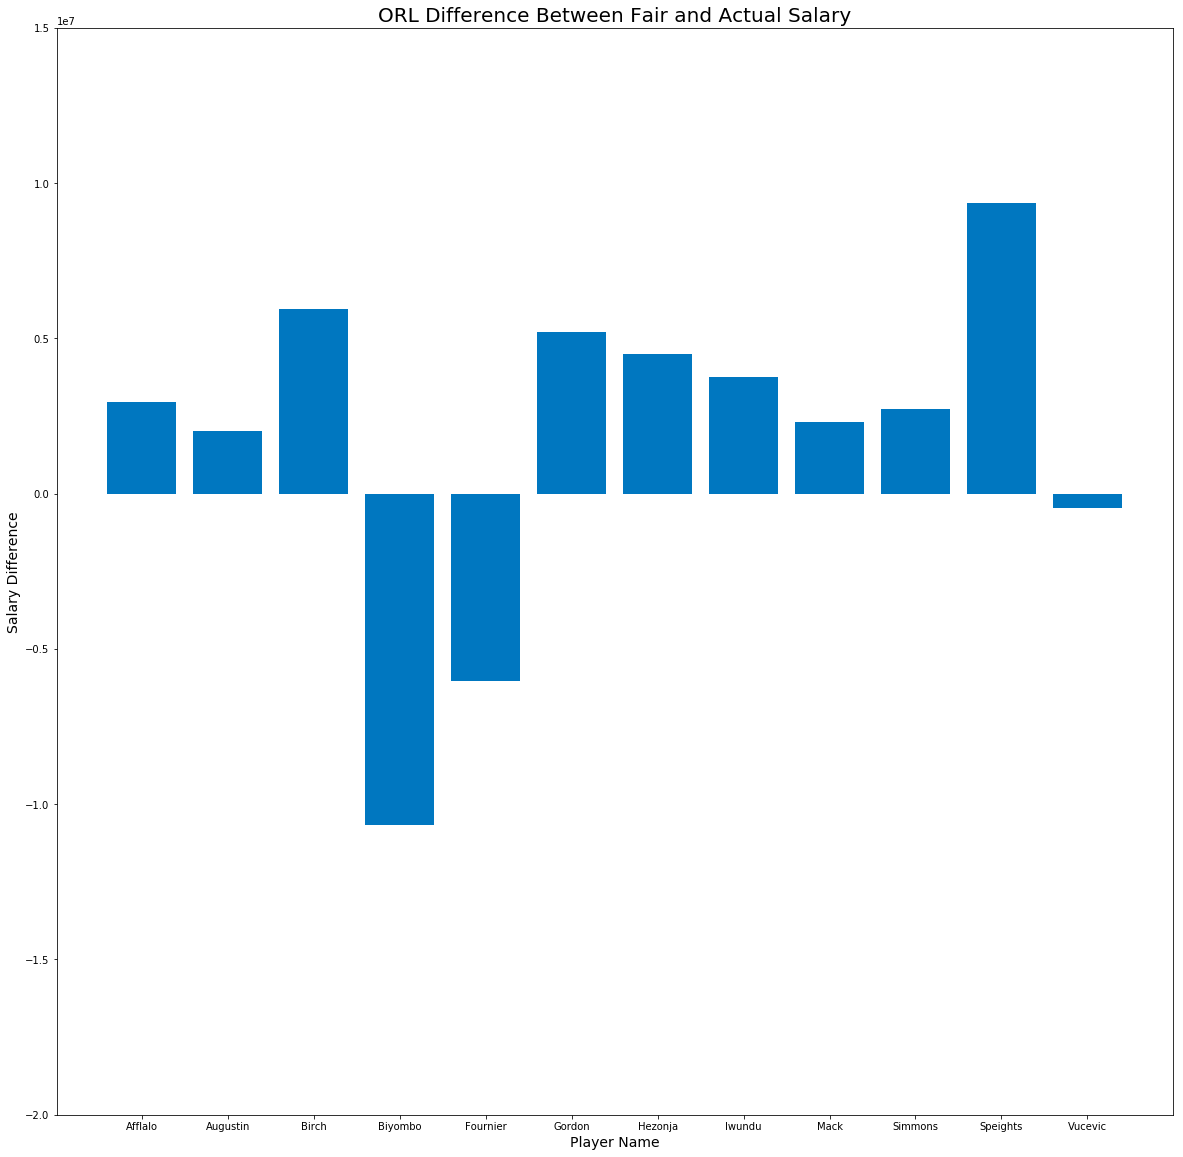

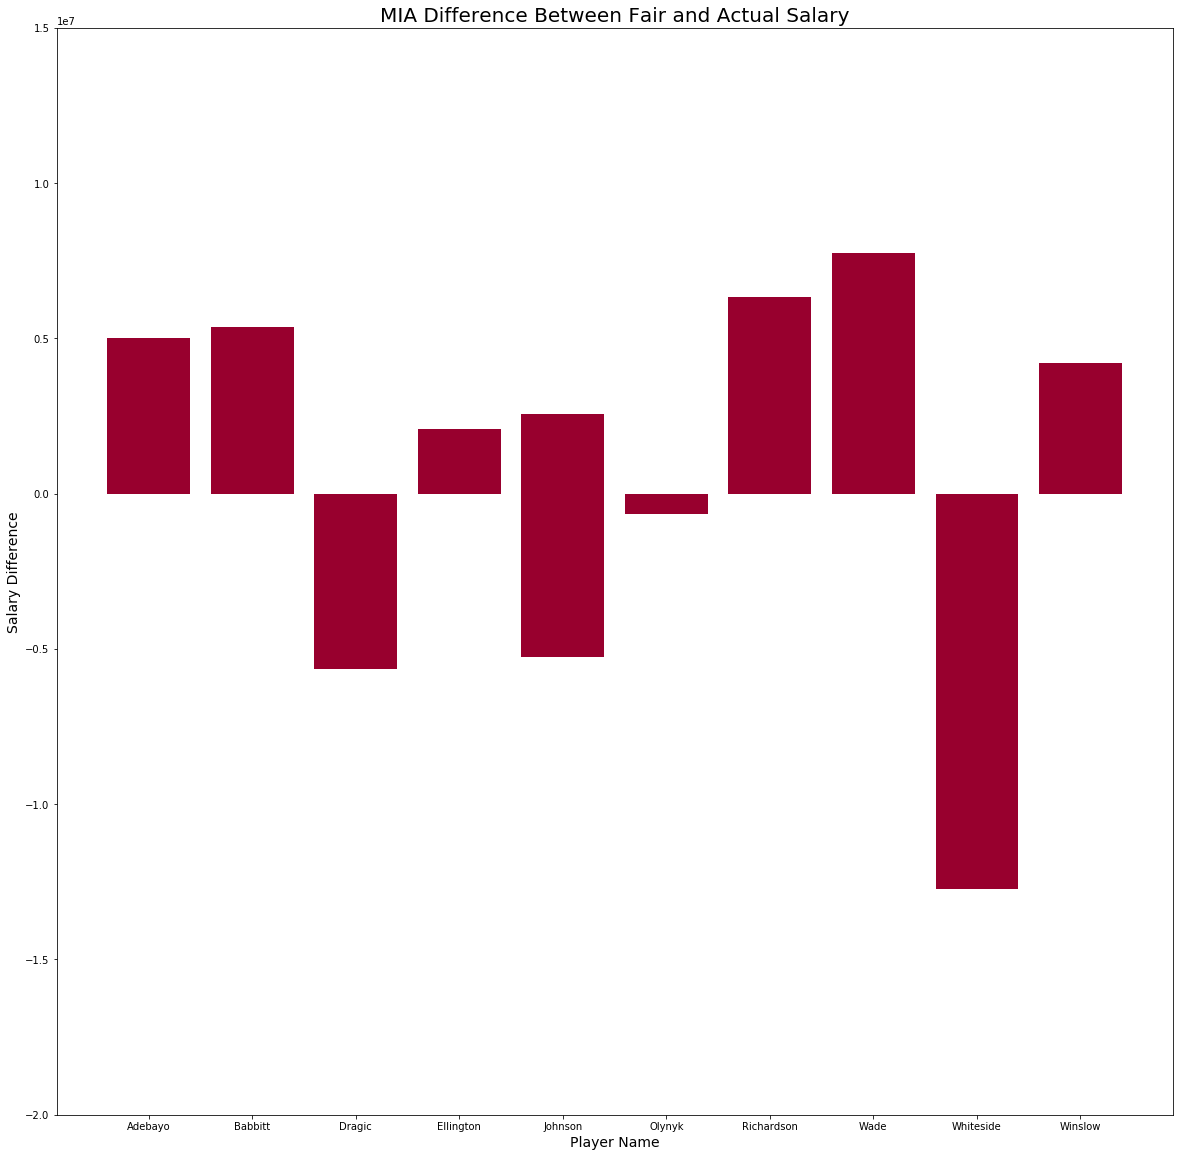

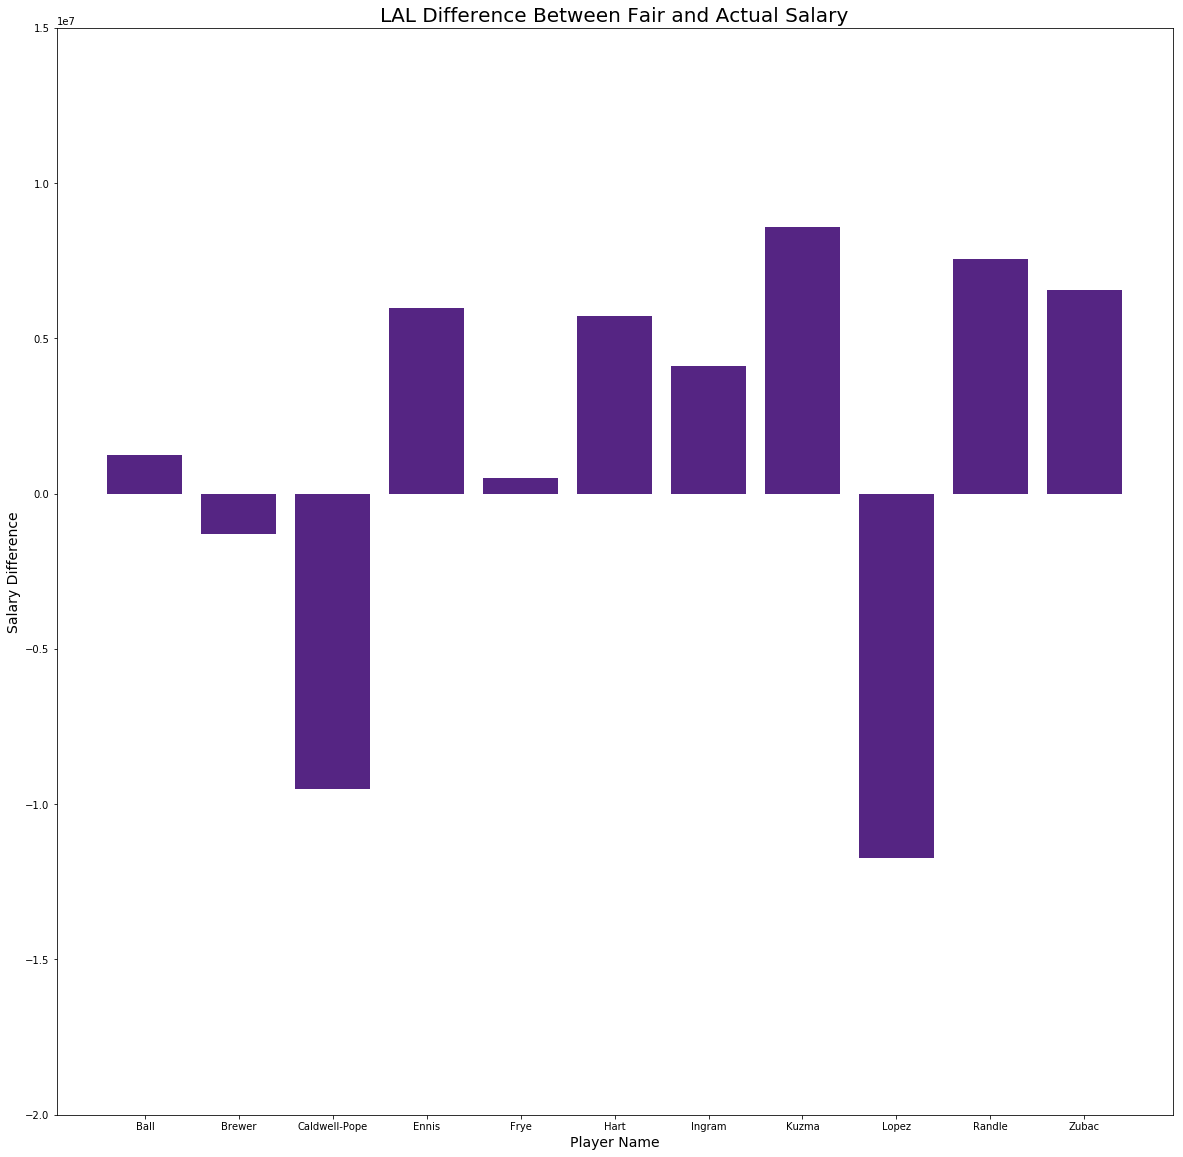

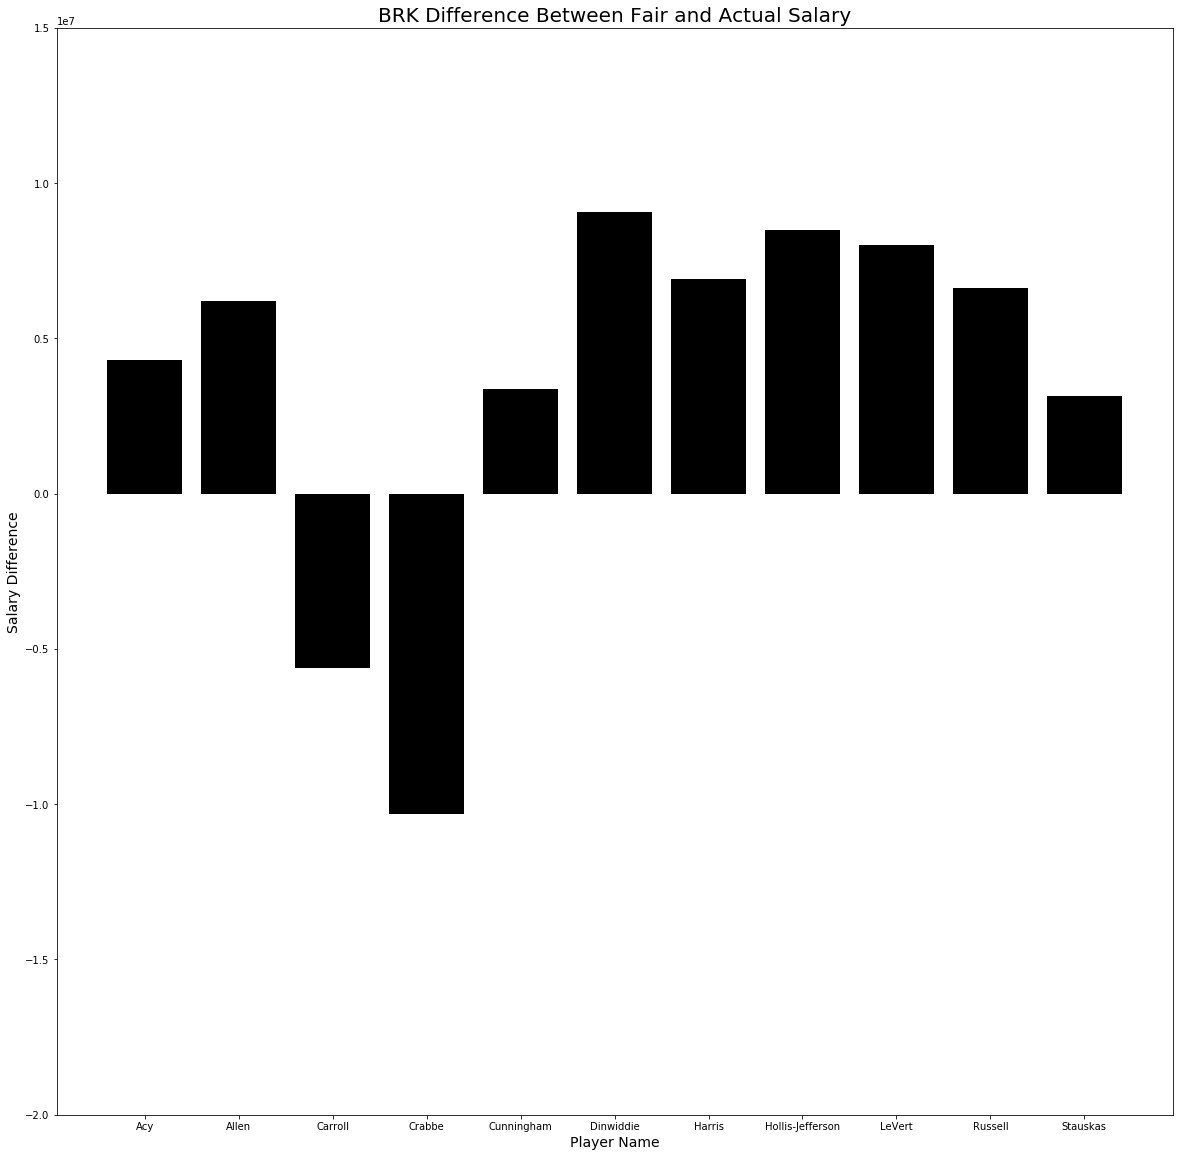

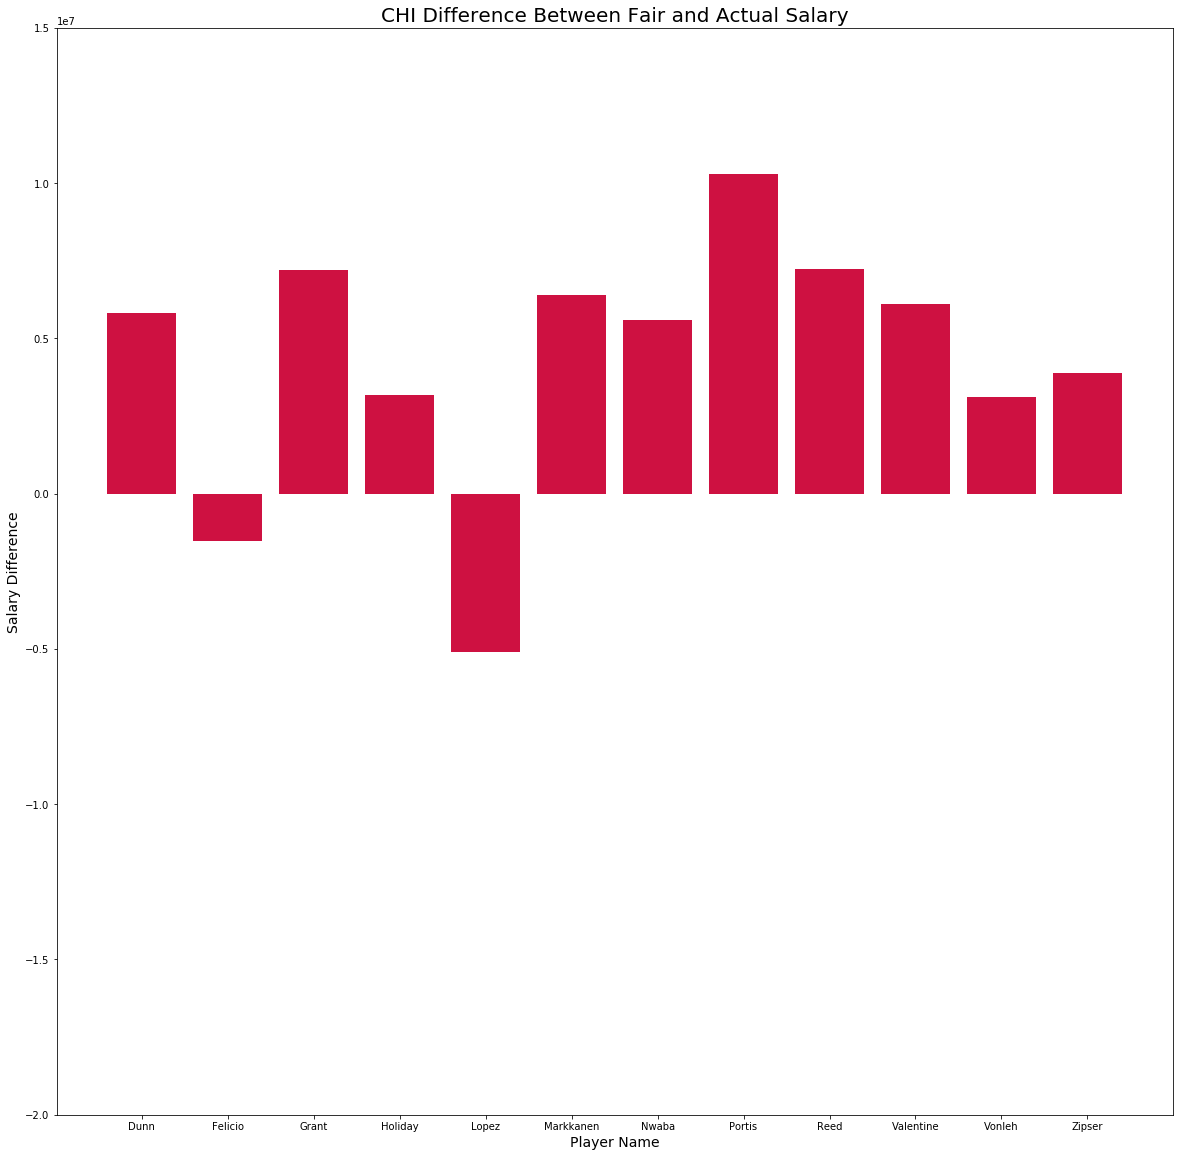

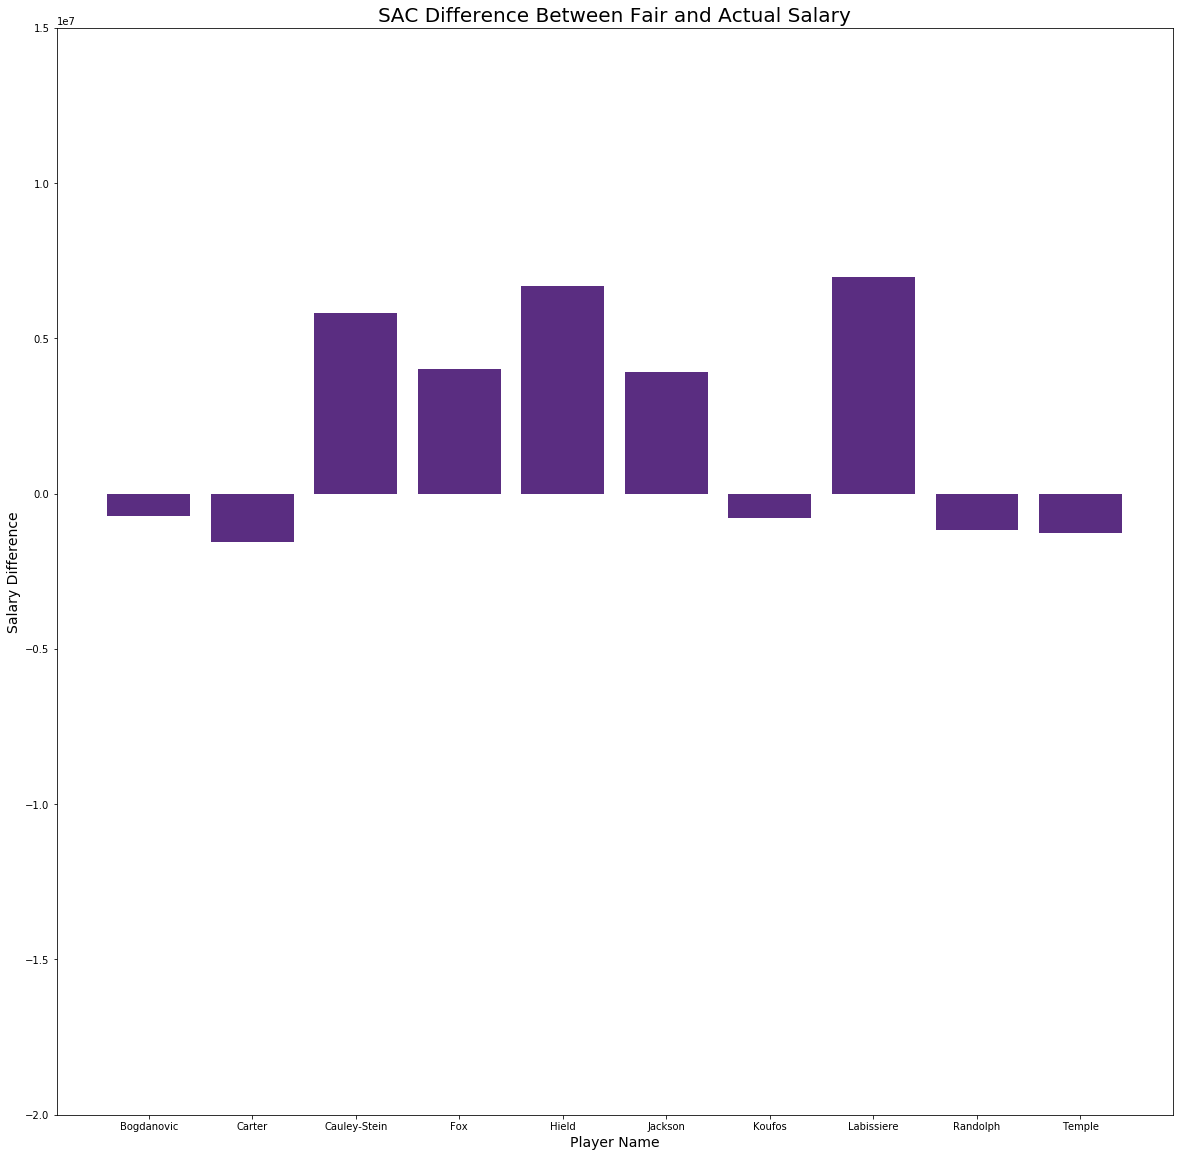

In [138]:
for i in range(len(final_frame['Team_y'].dropna().unique())):
    team=[]
    for j in range(len(final_frame)):
        if final_frame.iloc[j]['Team_y']==final_frame['Team_y'].dropna().unique()[i]:
            team.append(final_frame.iloc[j])
    team=pd.DataFrame(team)
    fig, ax =plt.subplots(1,figsize=(20,20))
    ax.bar(height=team['Salary_Diff'].dropna(),x=team['Last Name'].dropna(),color=team_colors[i])
    ax.set_ylim((-20000000,15000000))
    ax.set_title(team.iloc[1]['Team_y']+' '+'Difference Between Fair and Actual Salary',fontsize=20)
    ax.set_ylabel('Salary Difference',fontsize=14)
    ax.set_xlabel('Player Name',fontsize=14)

/Users/nicholascolloca/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


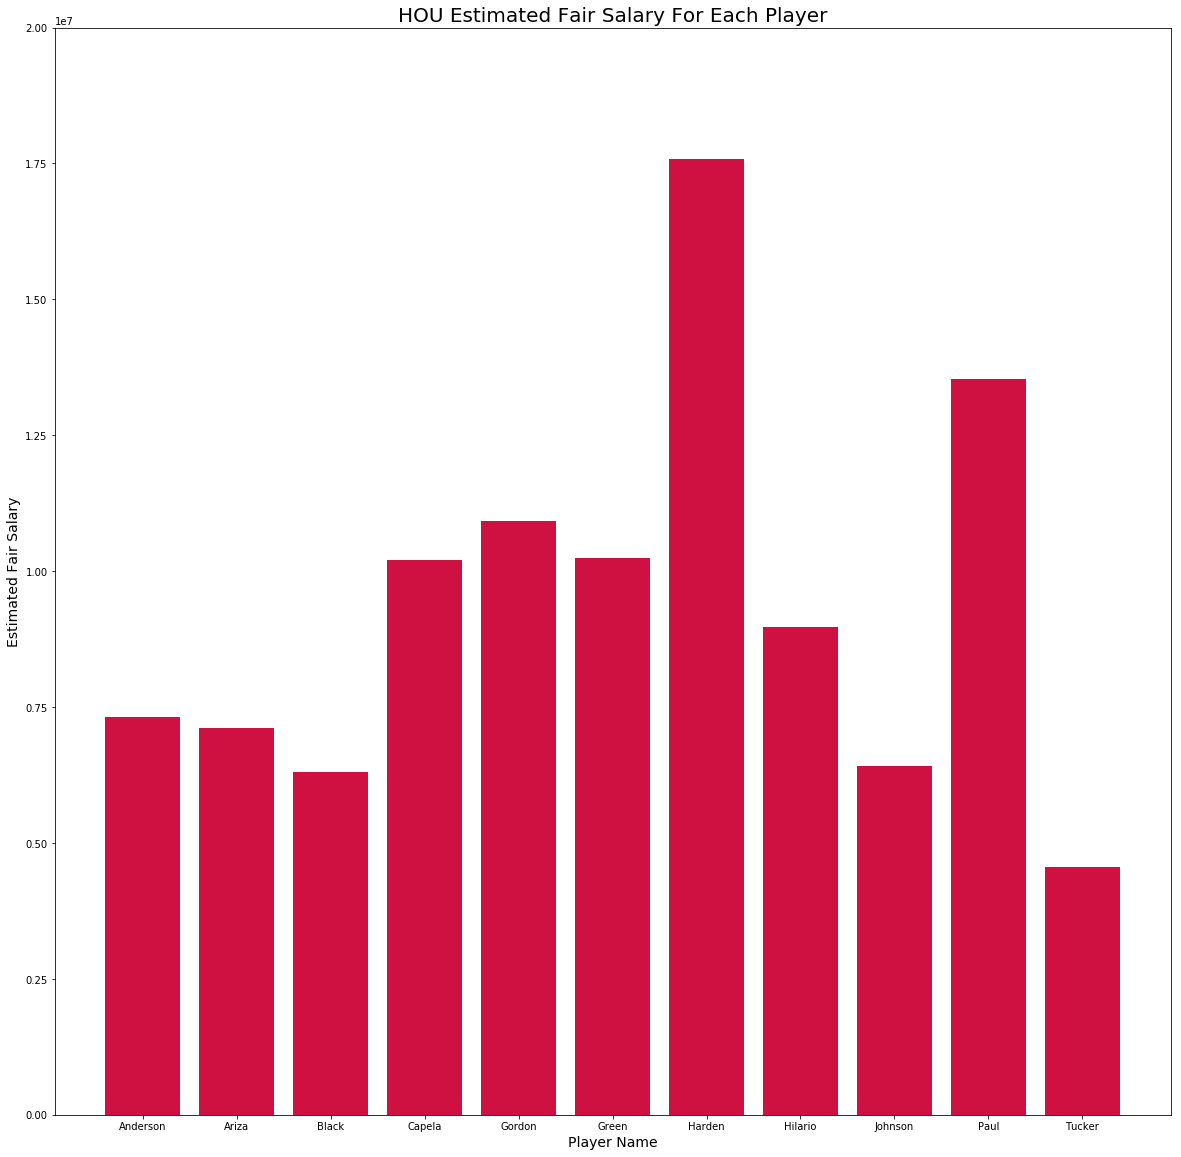

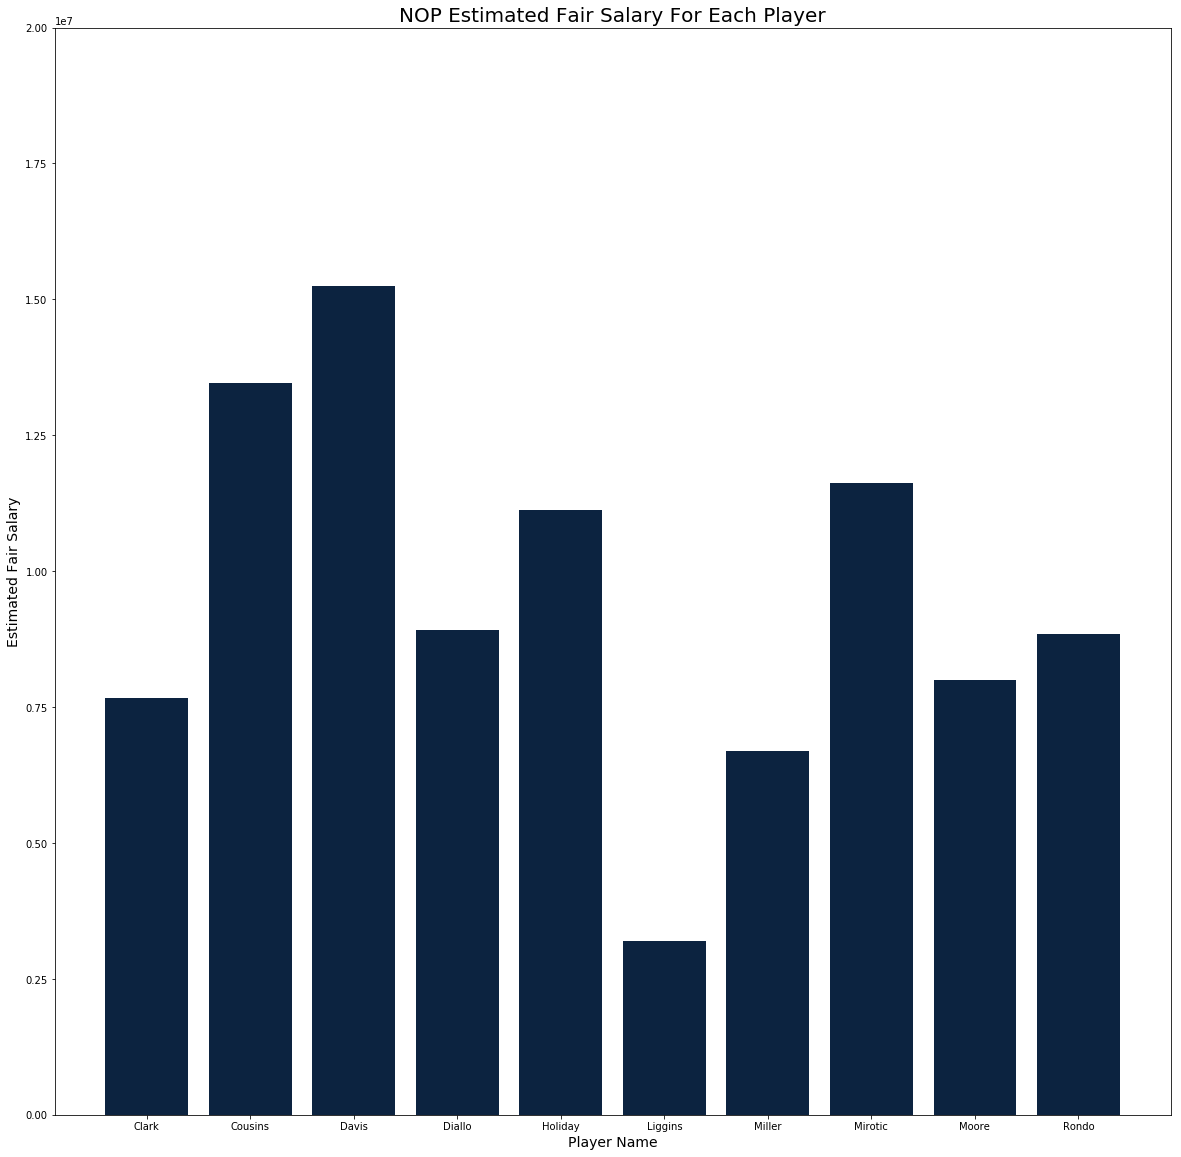

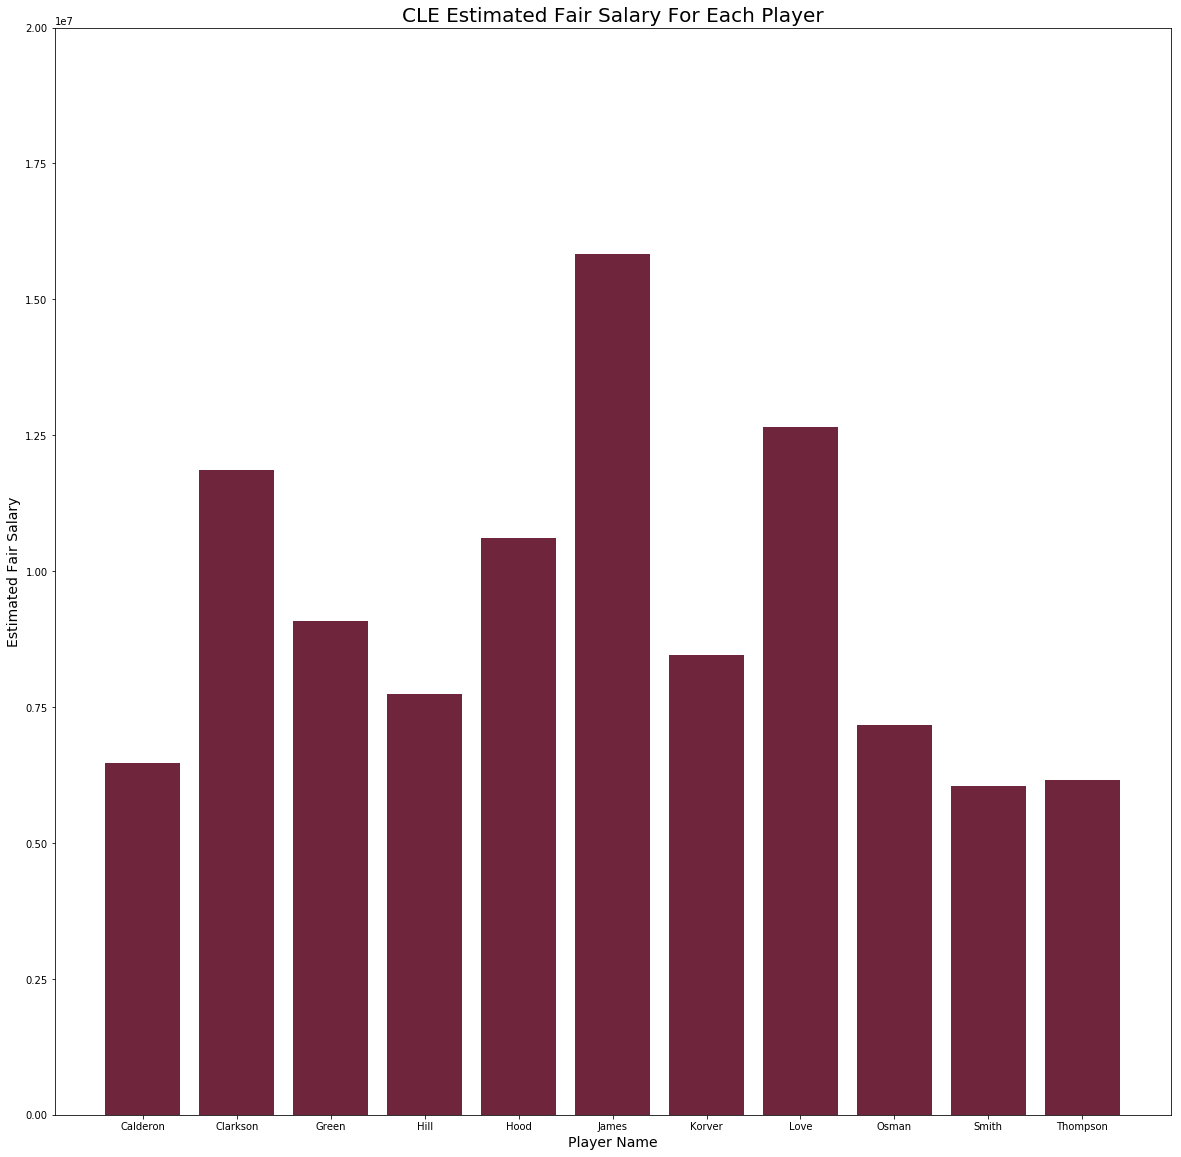

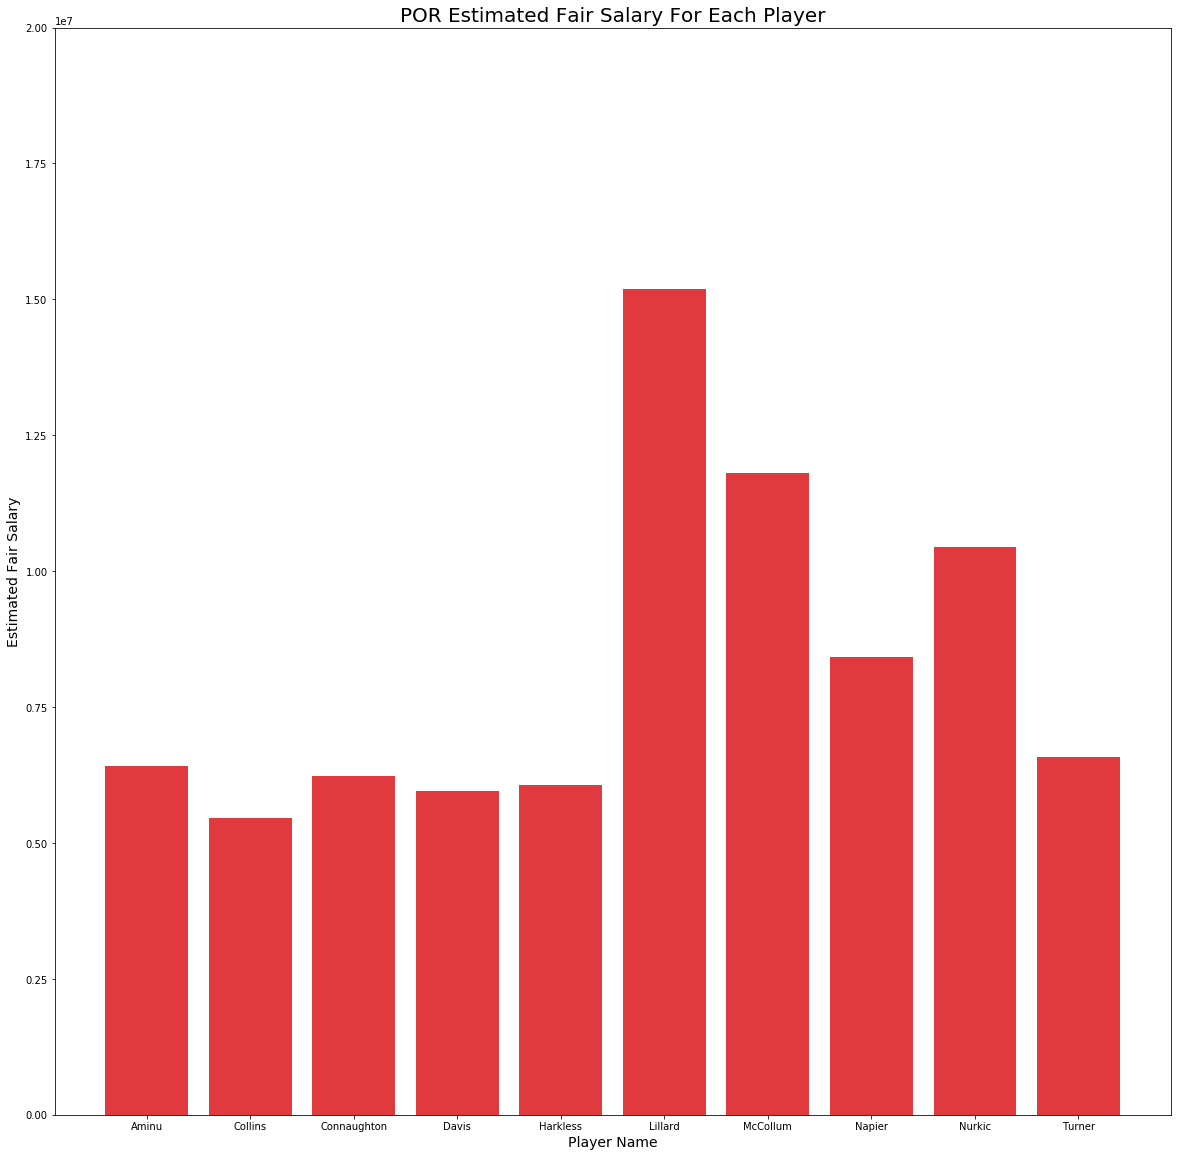

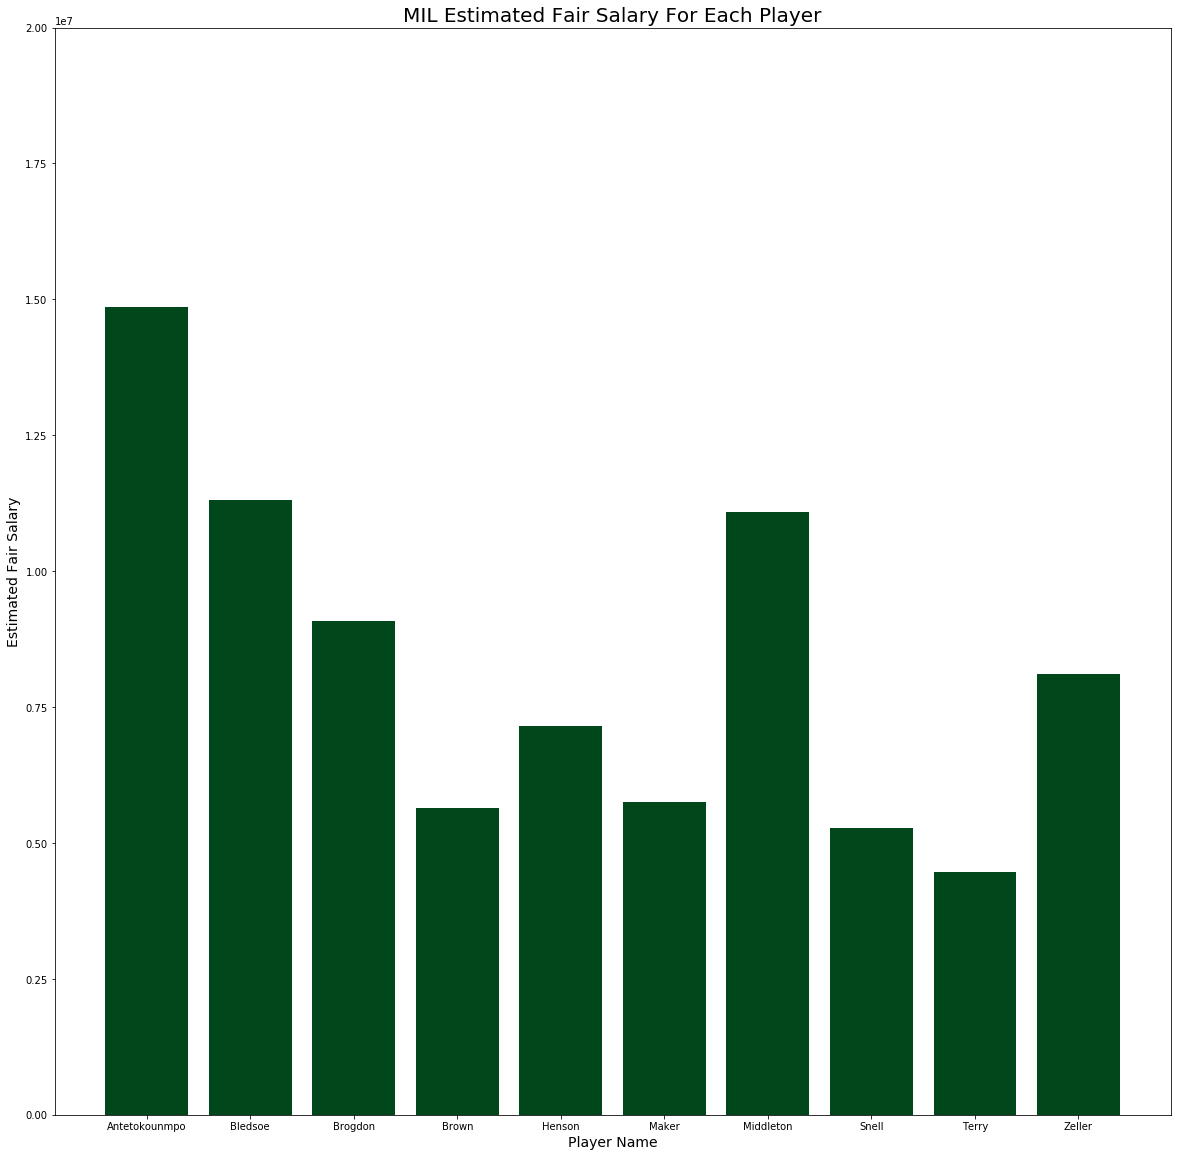

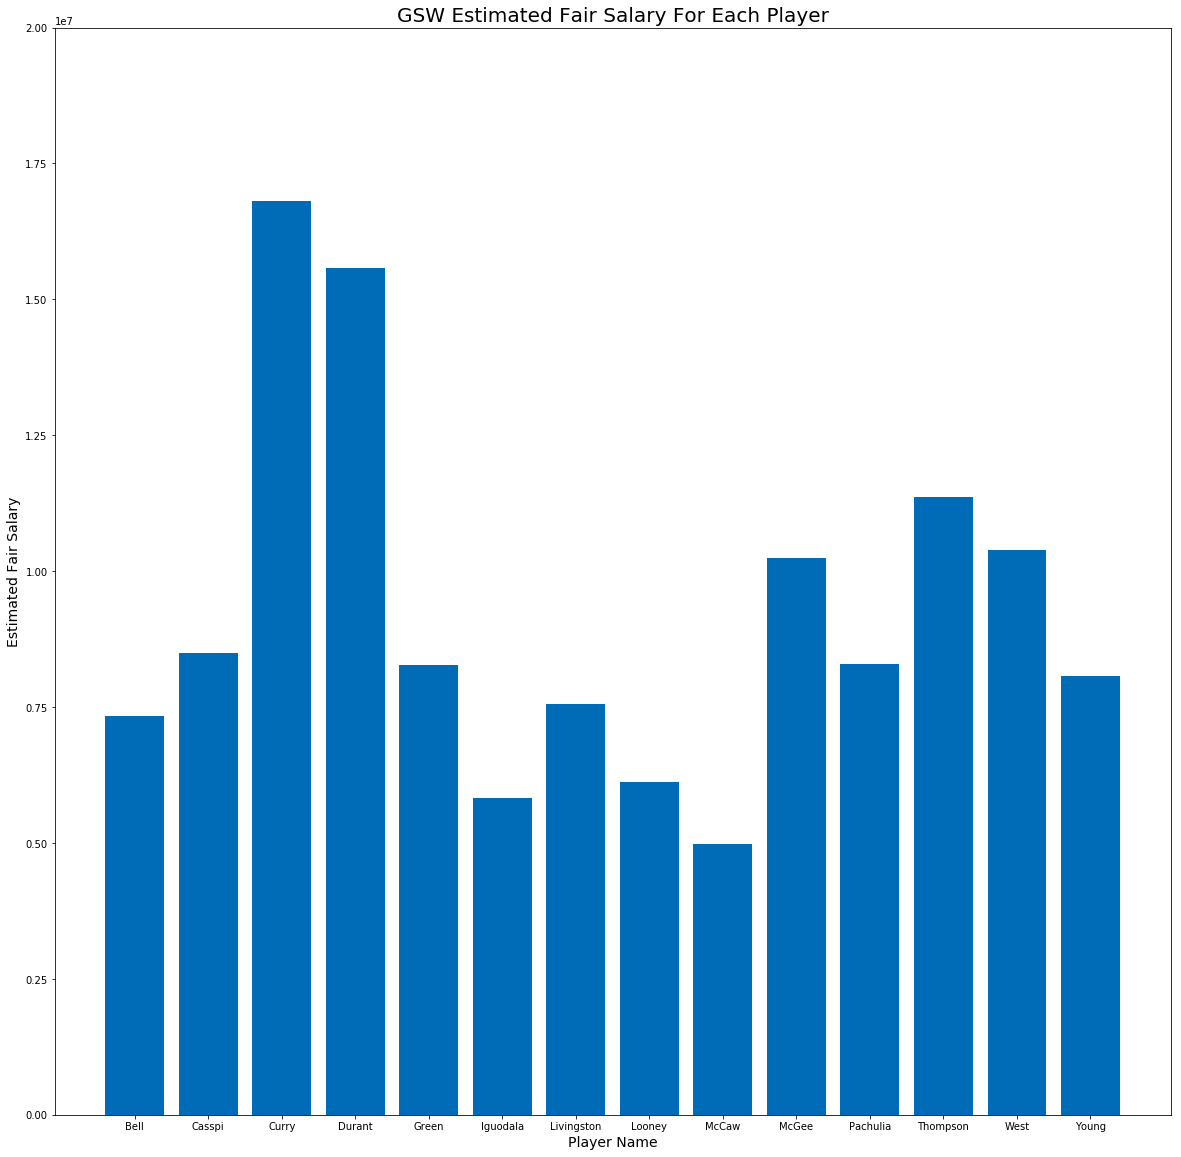

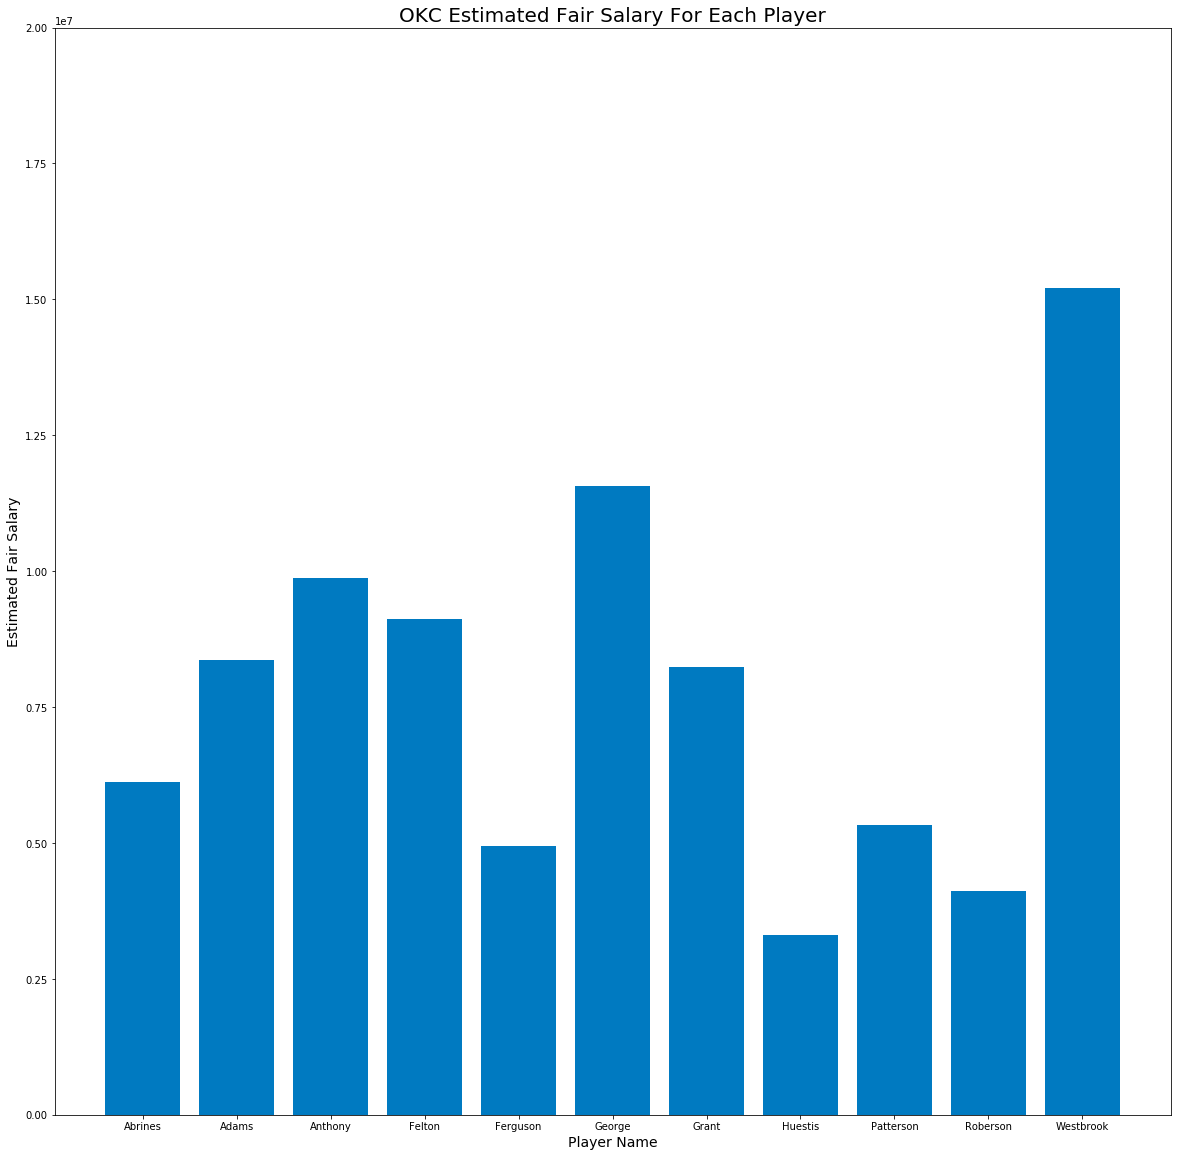

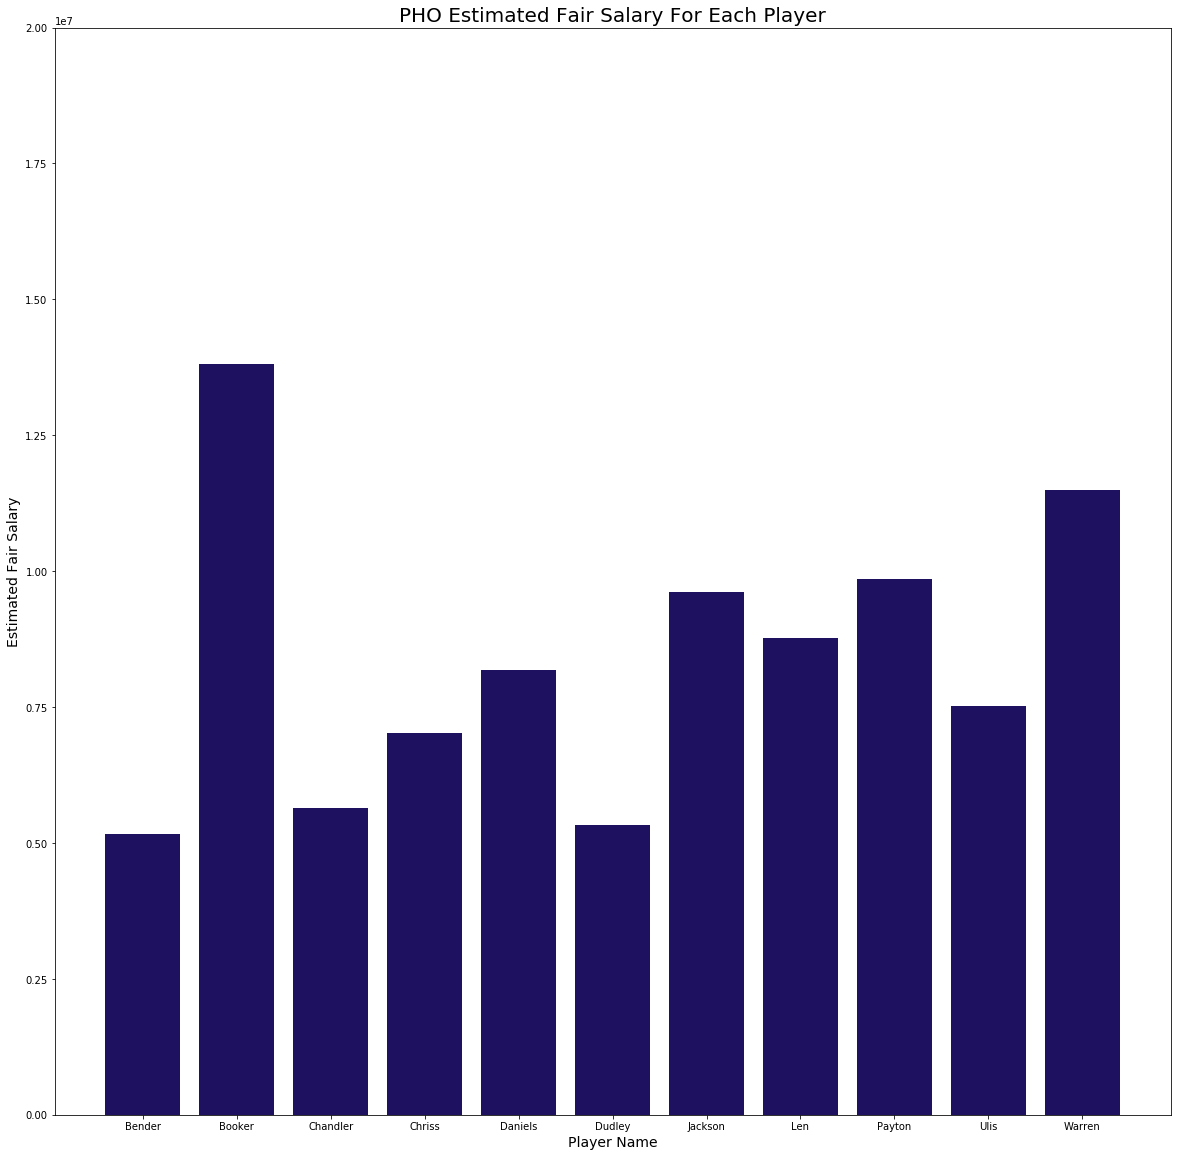

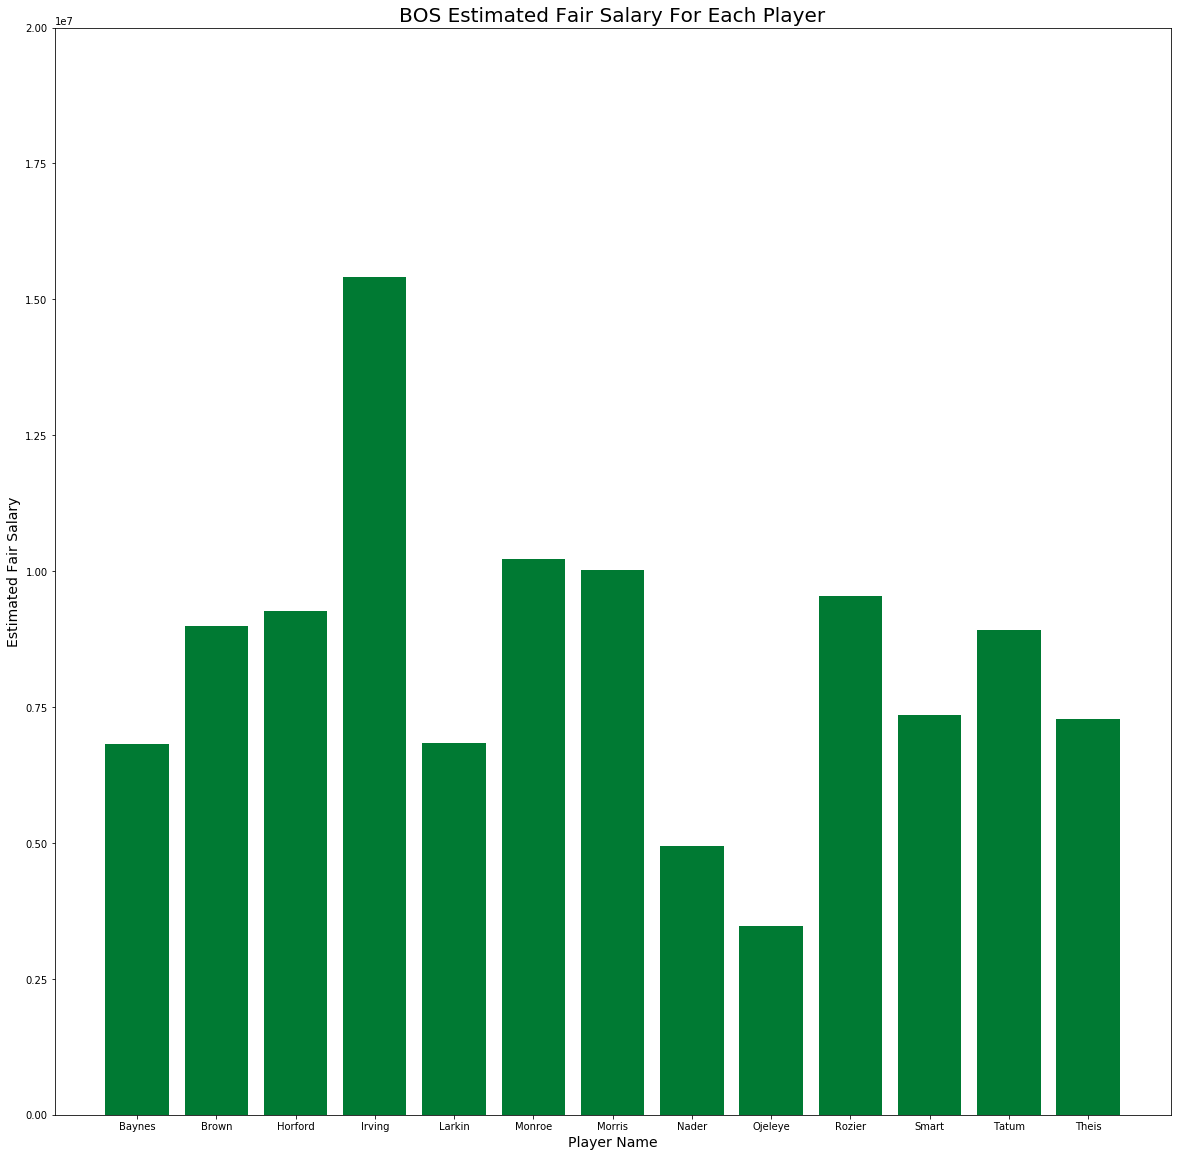

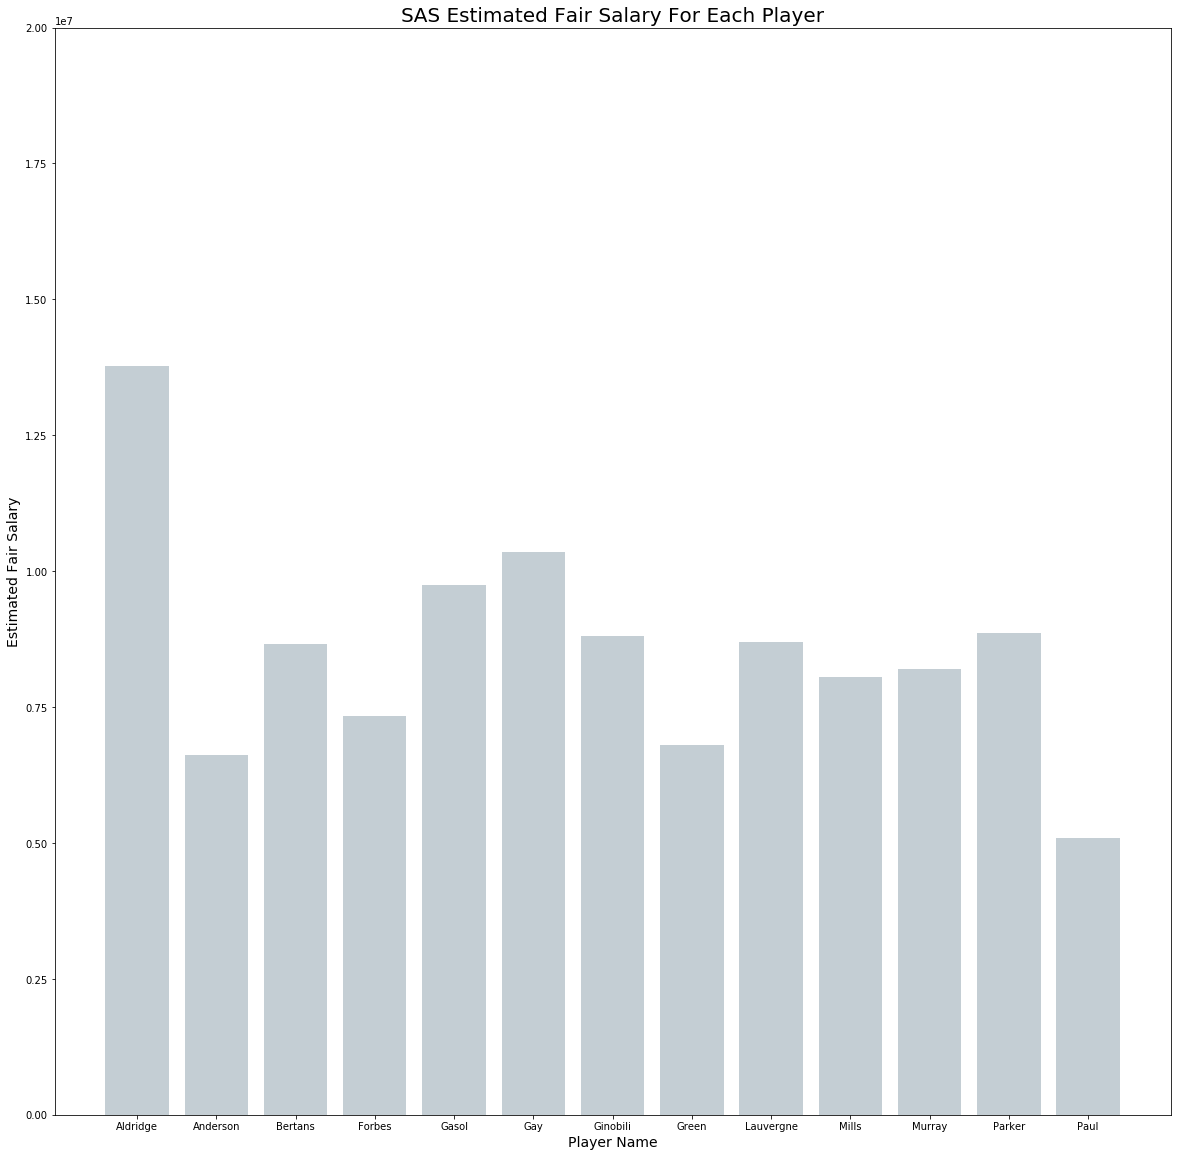

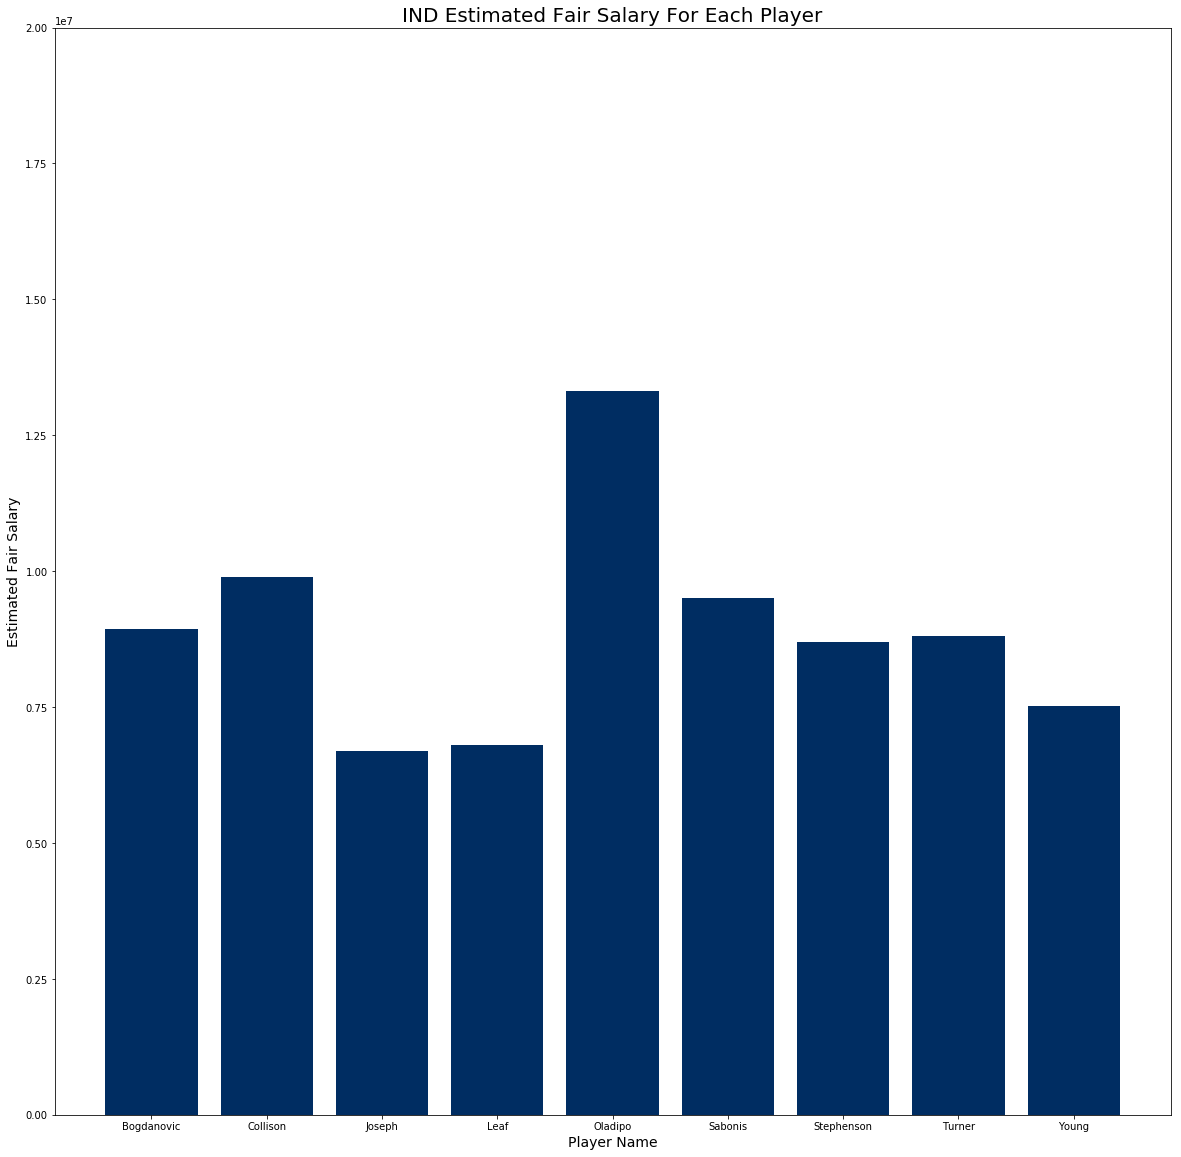

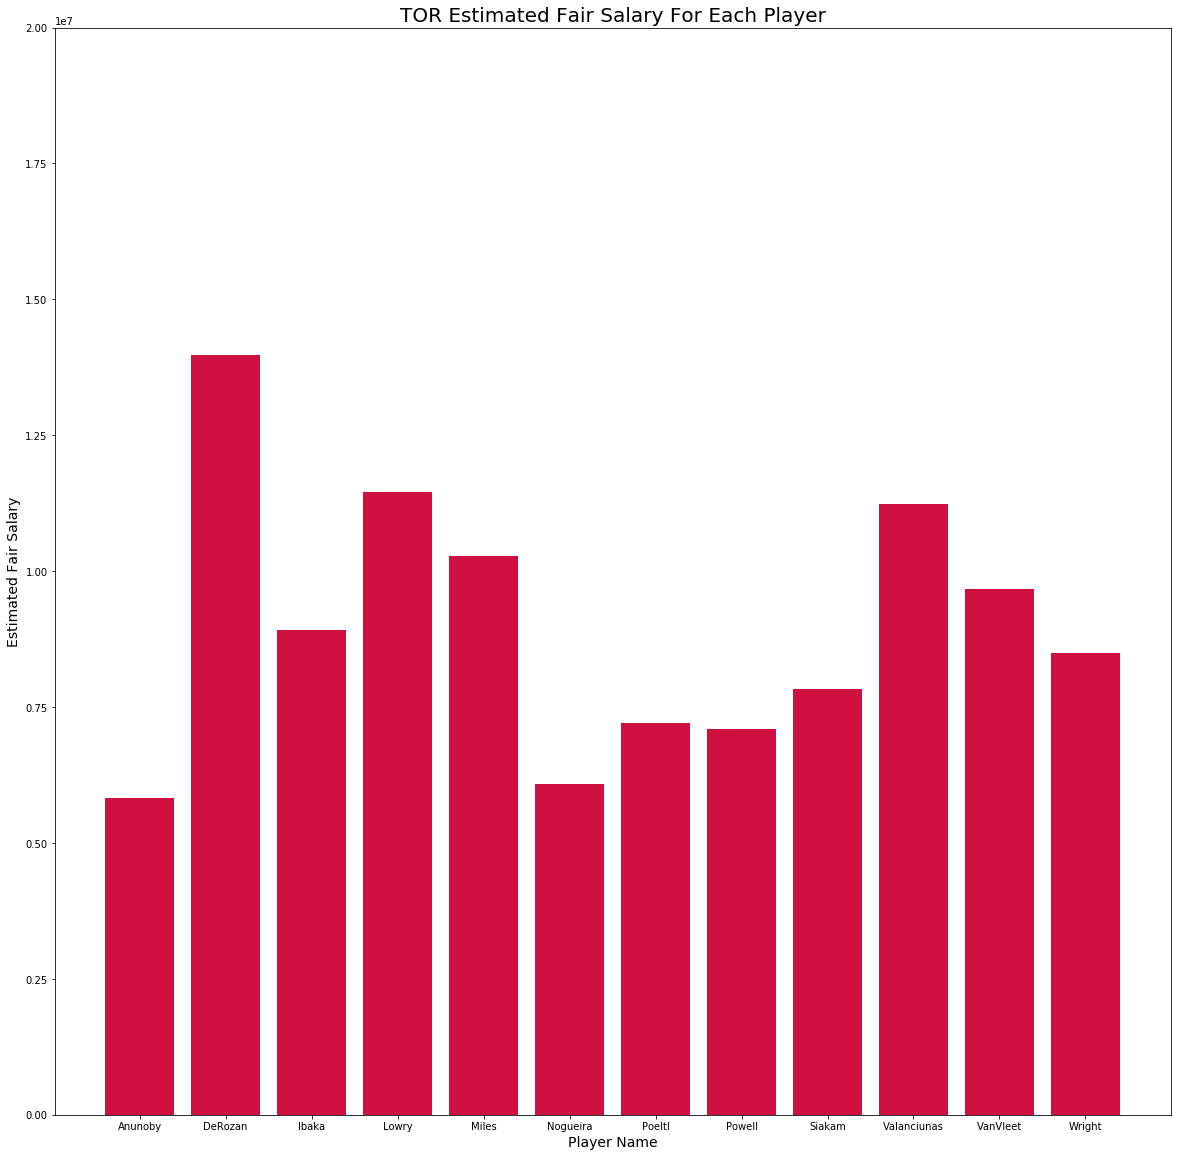

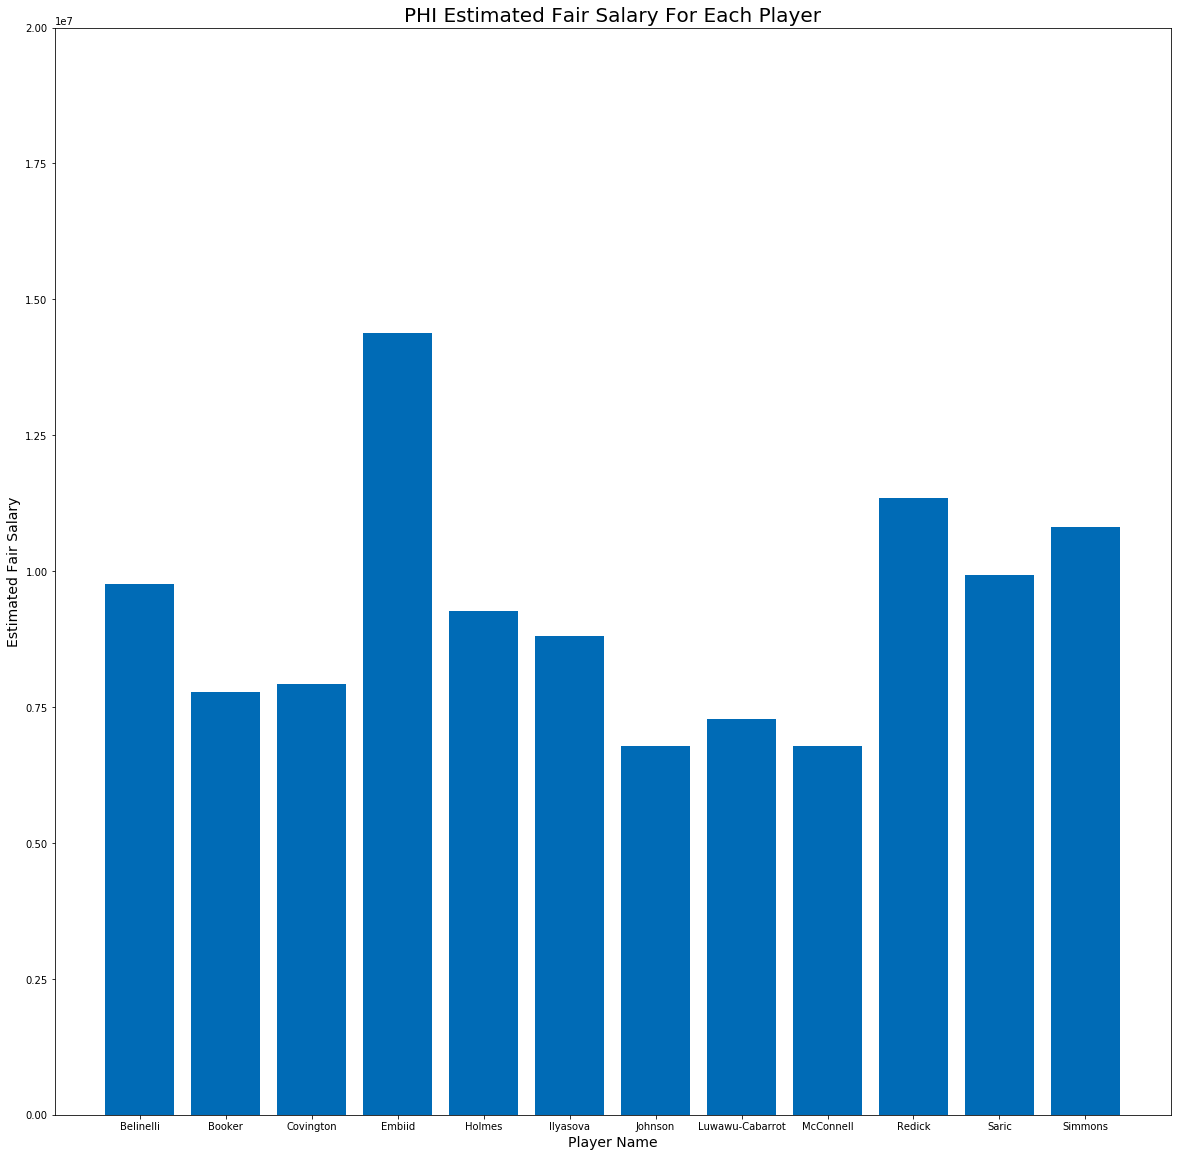

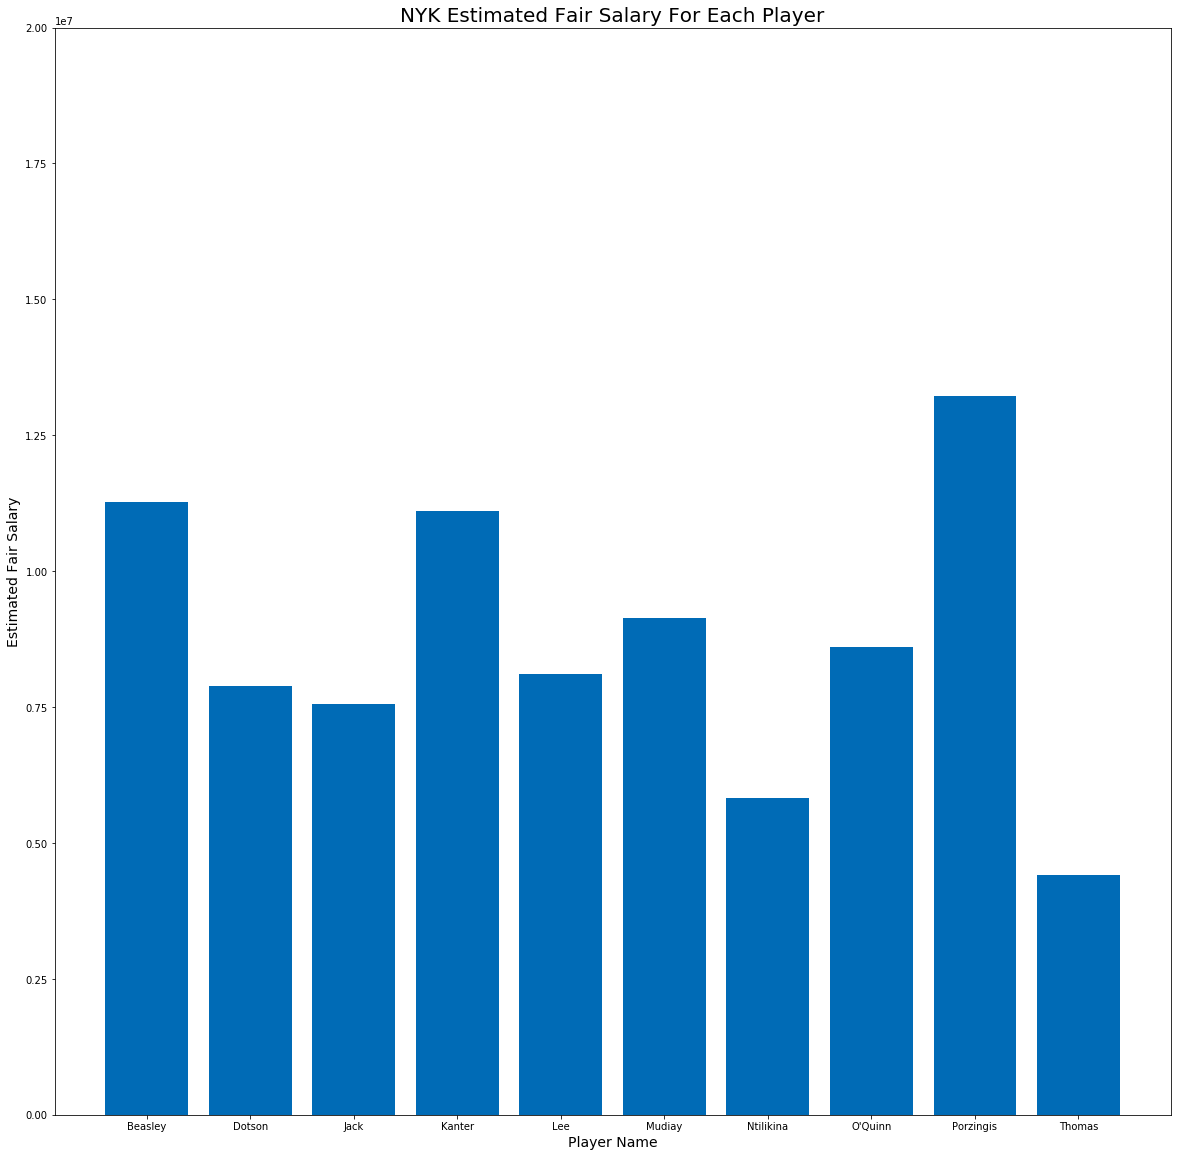

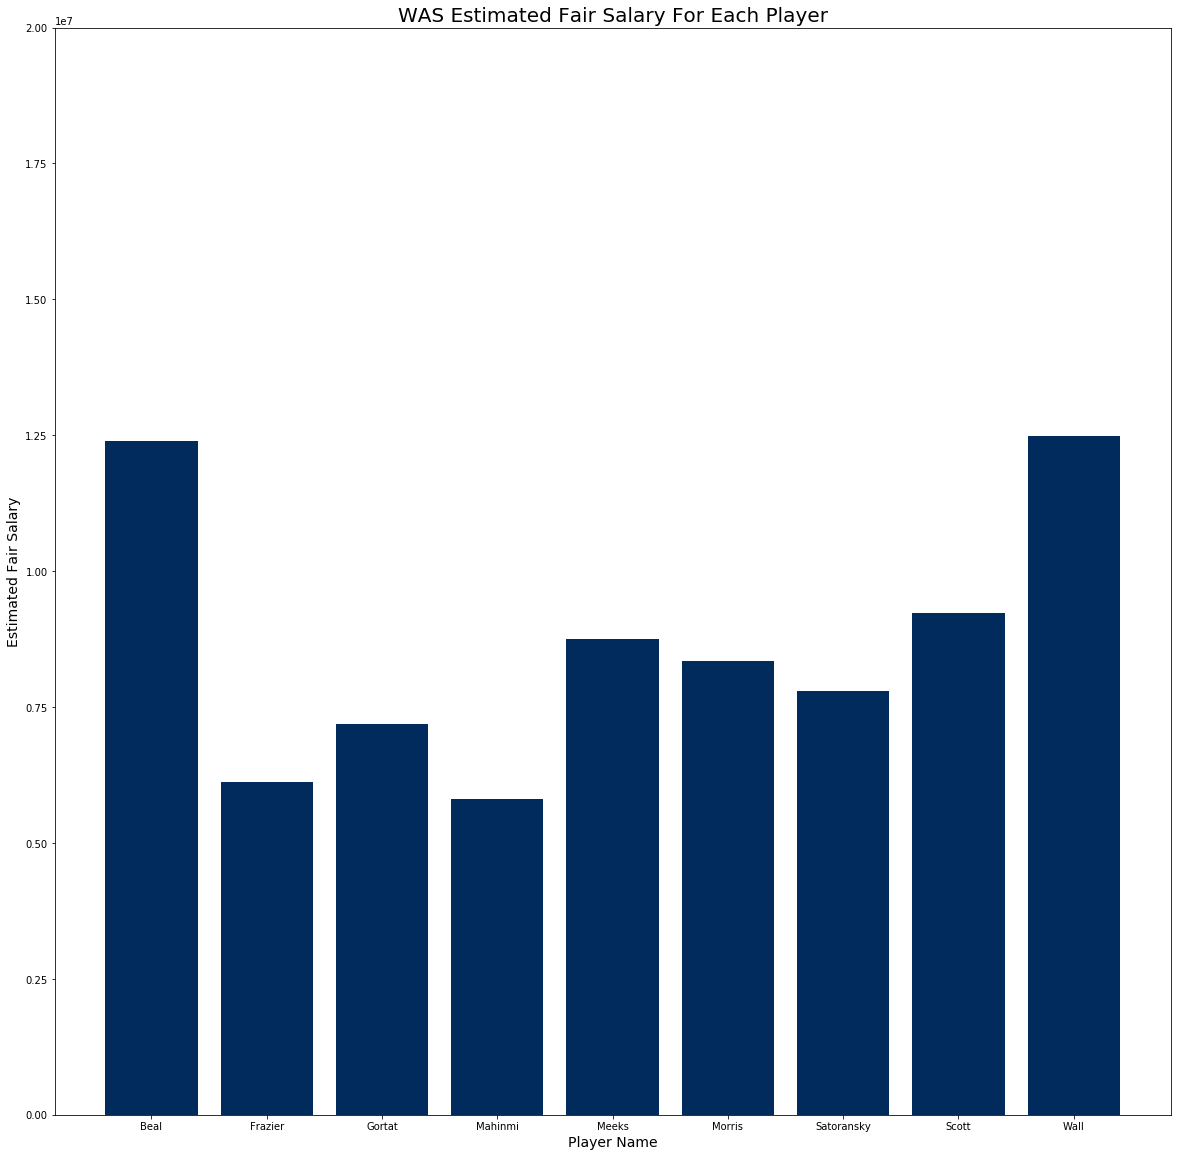

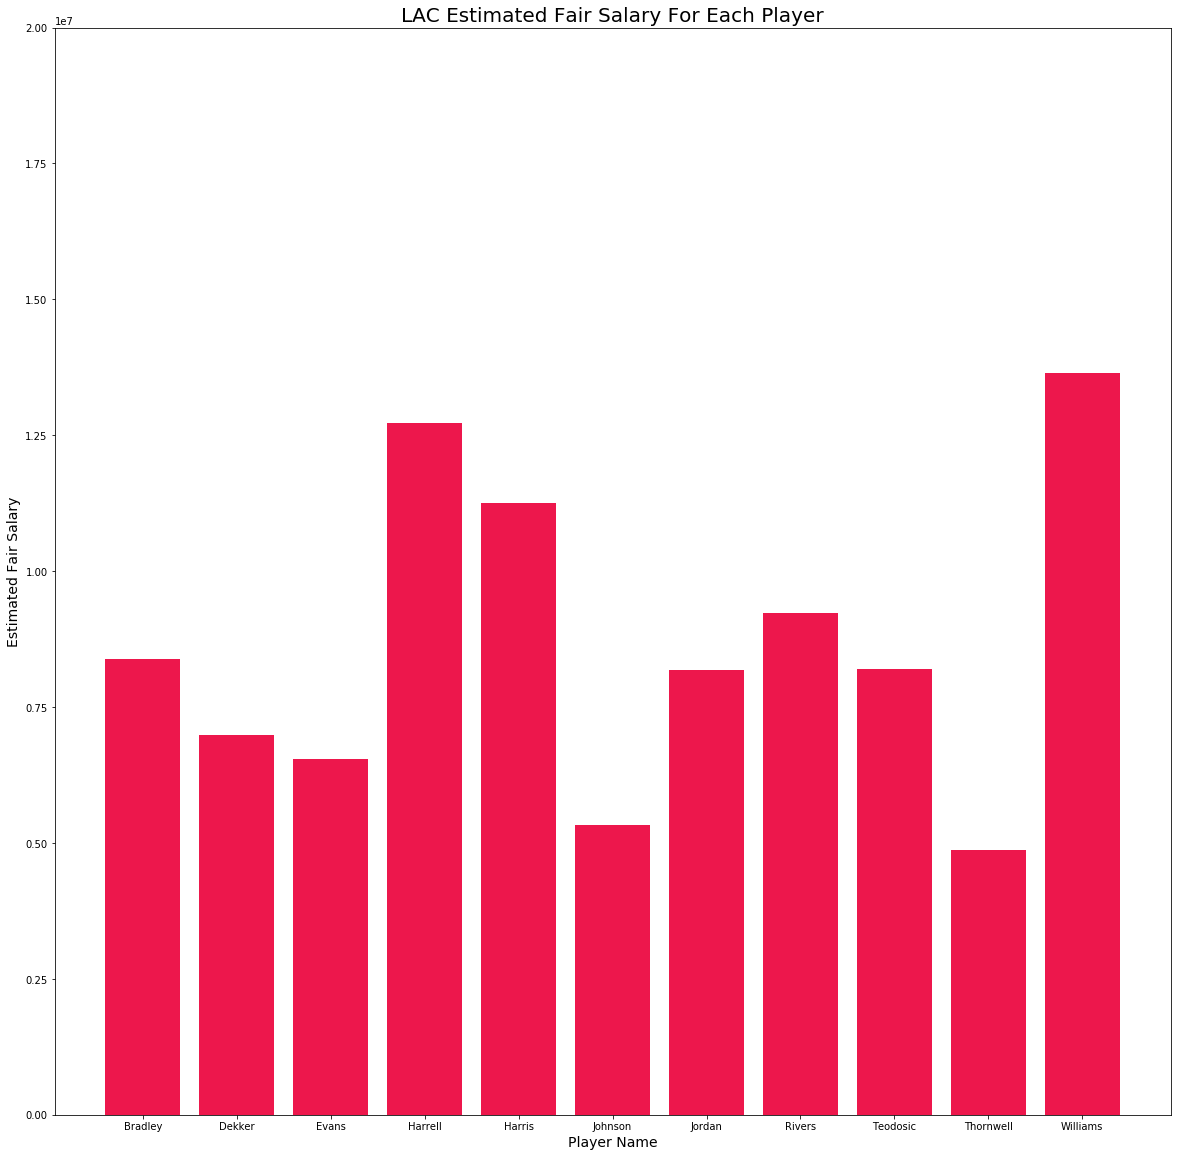

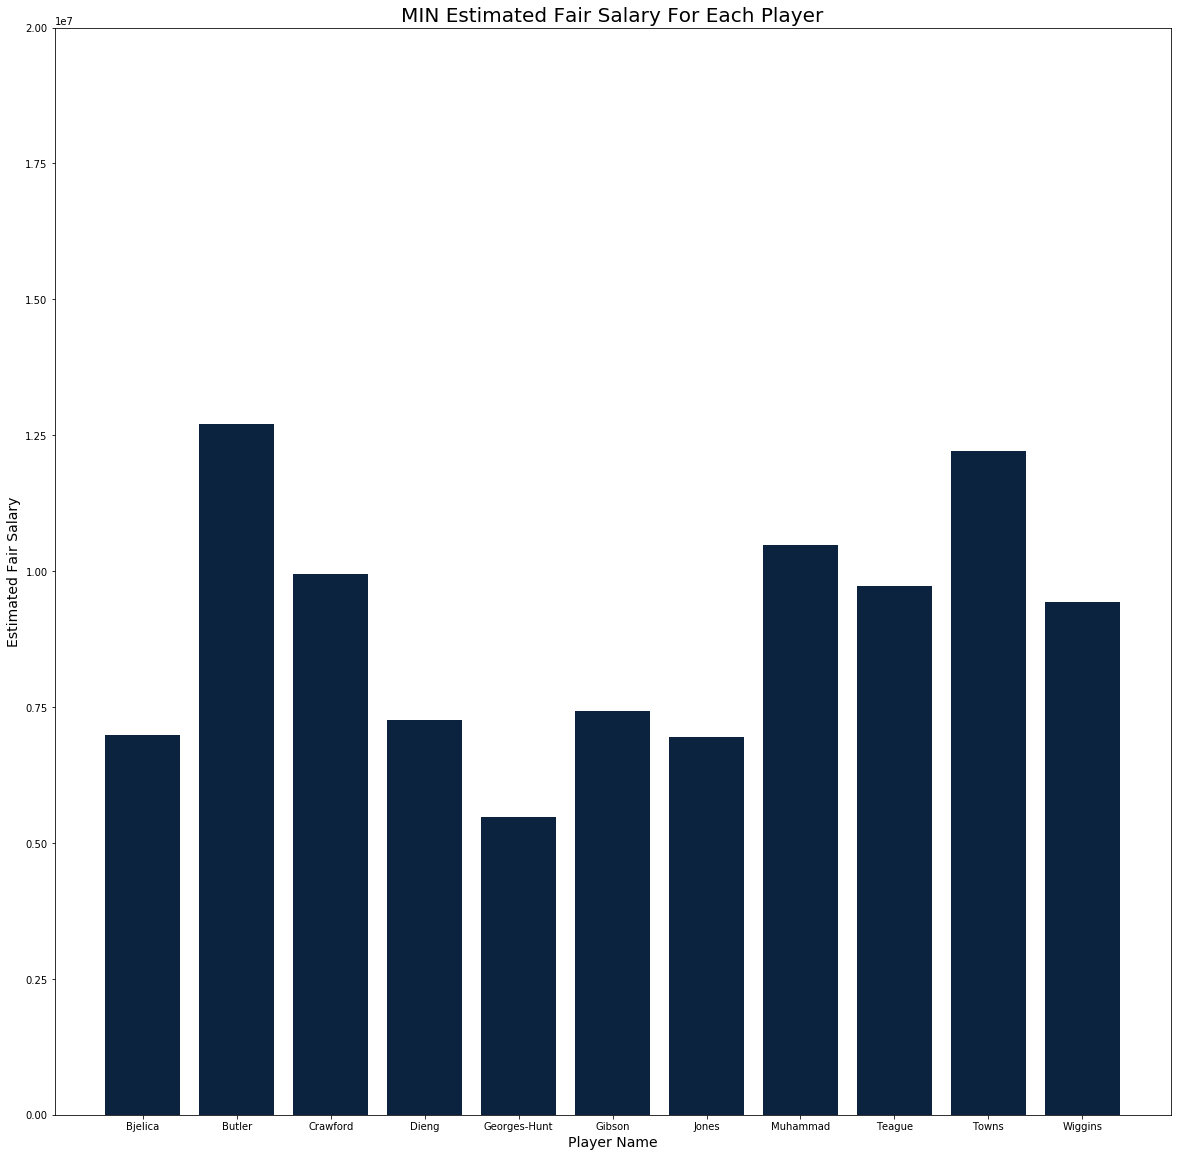

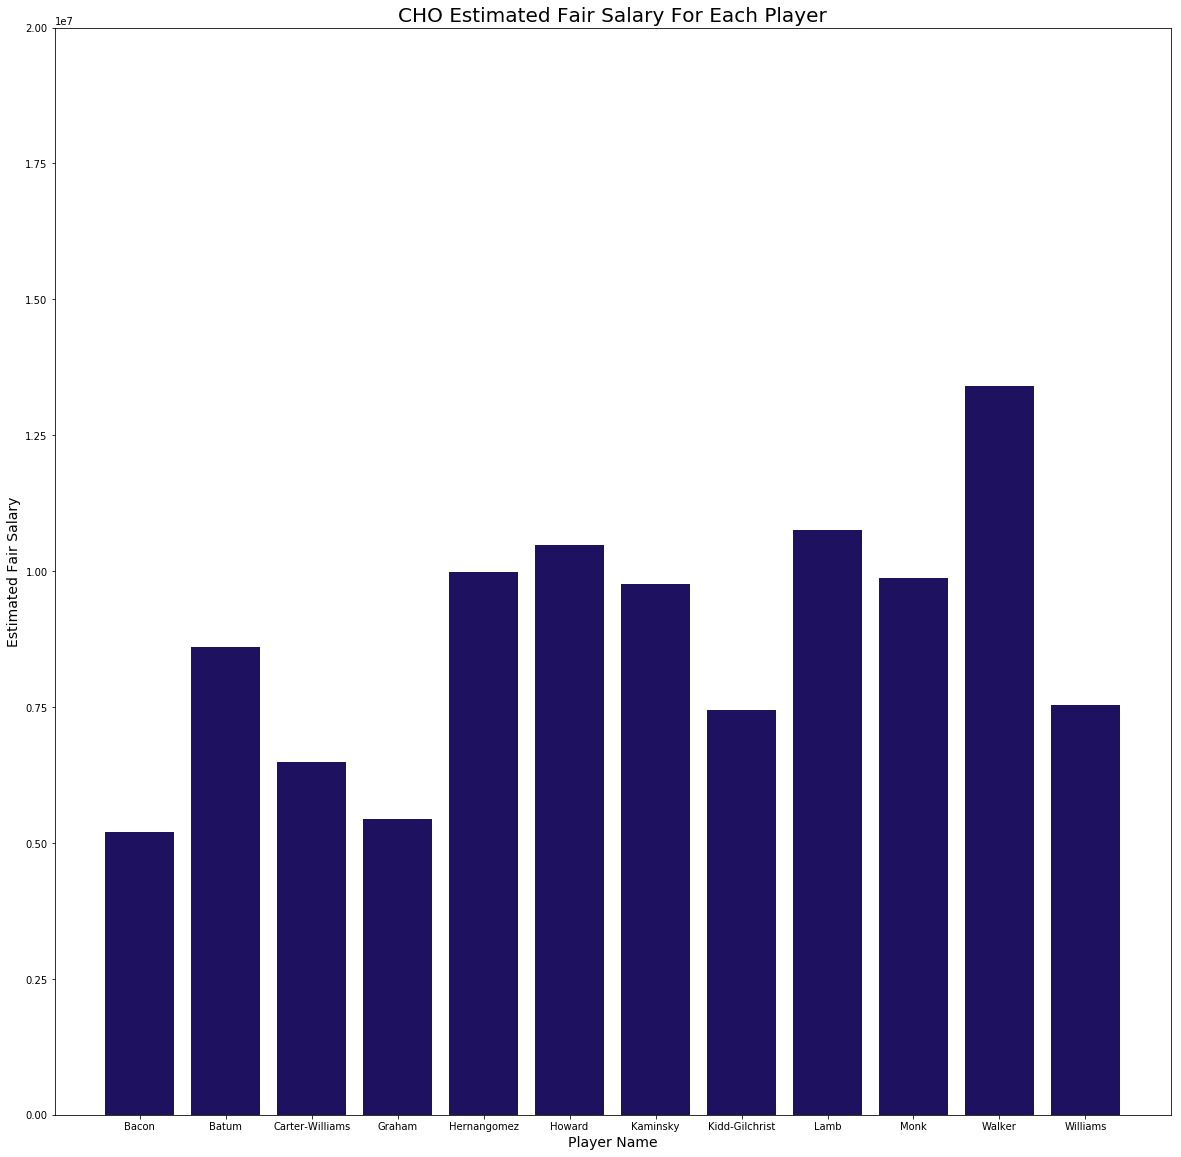

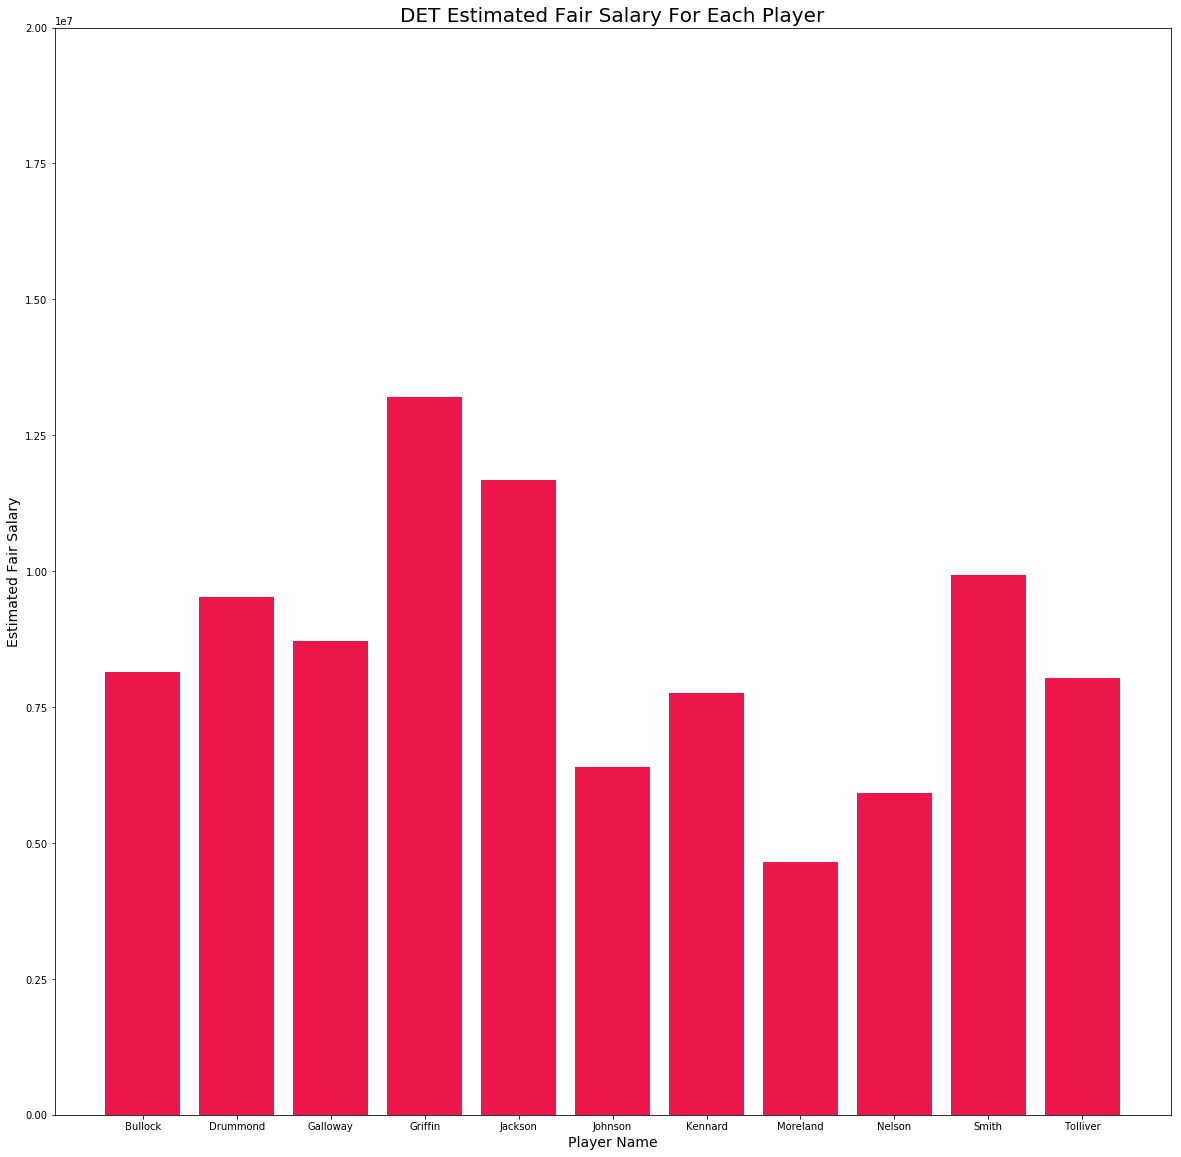

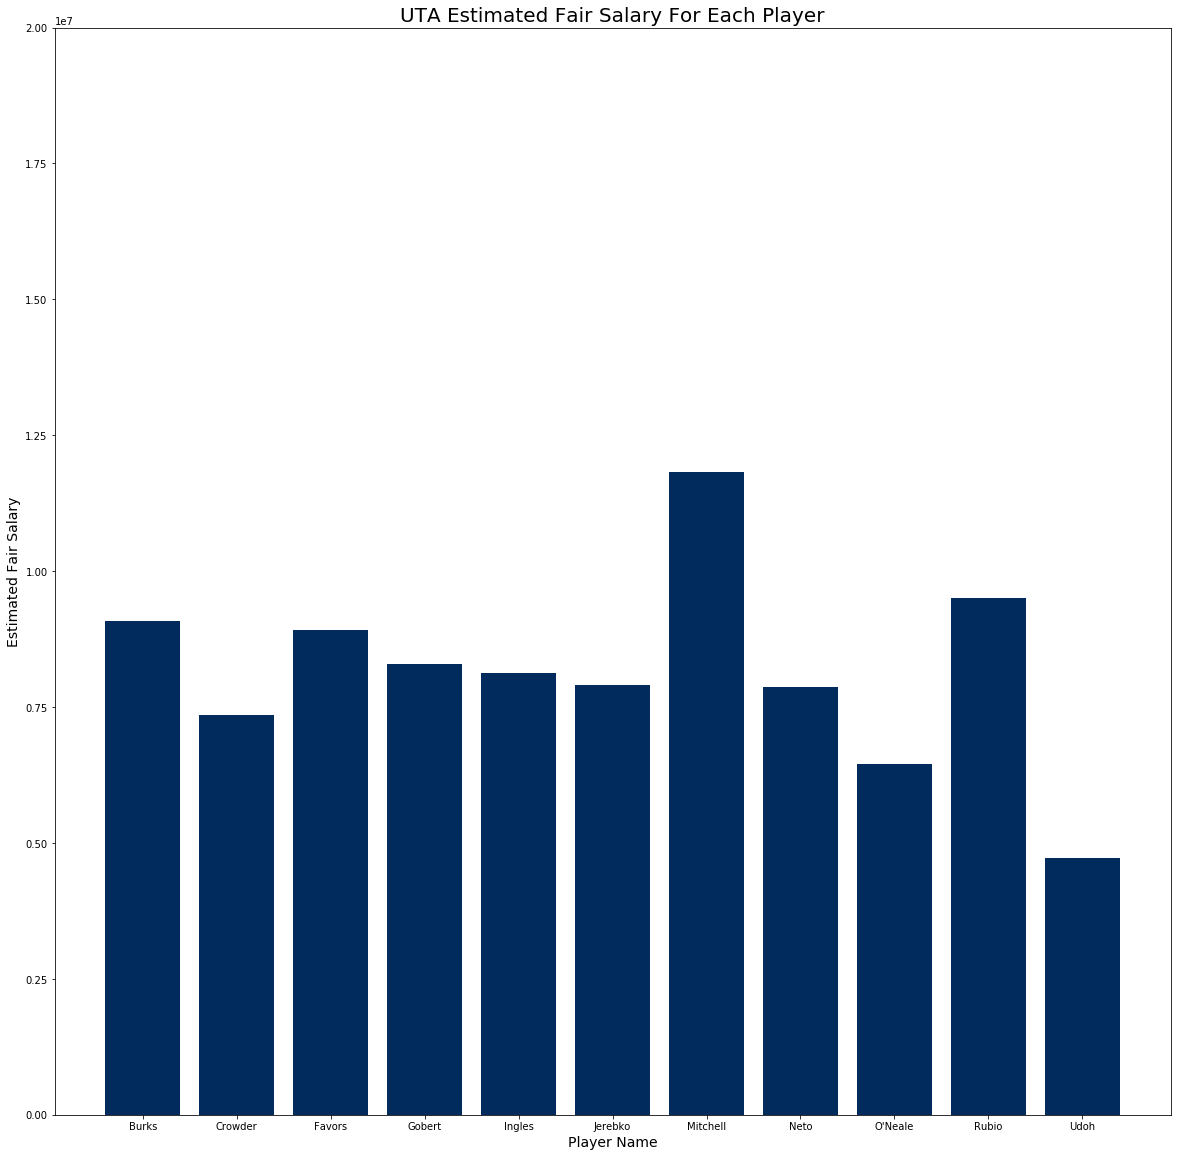

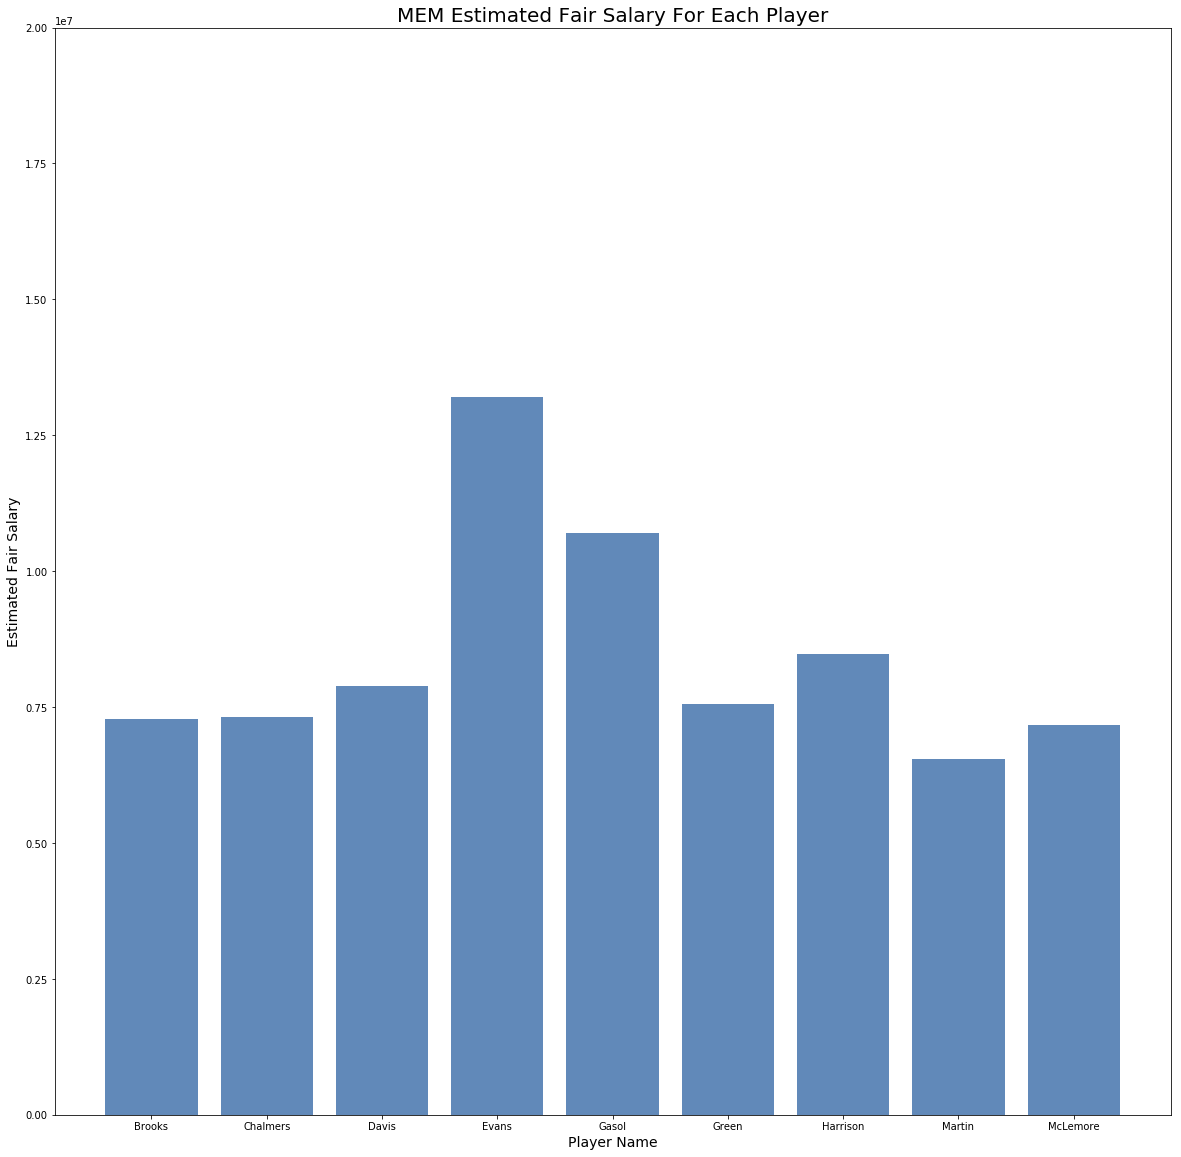

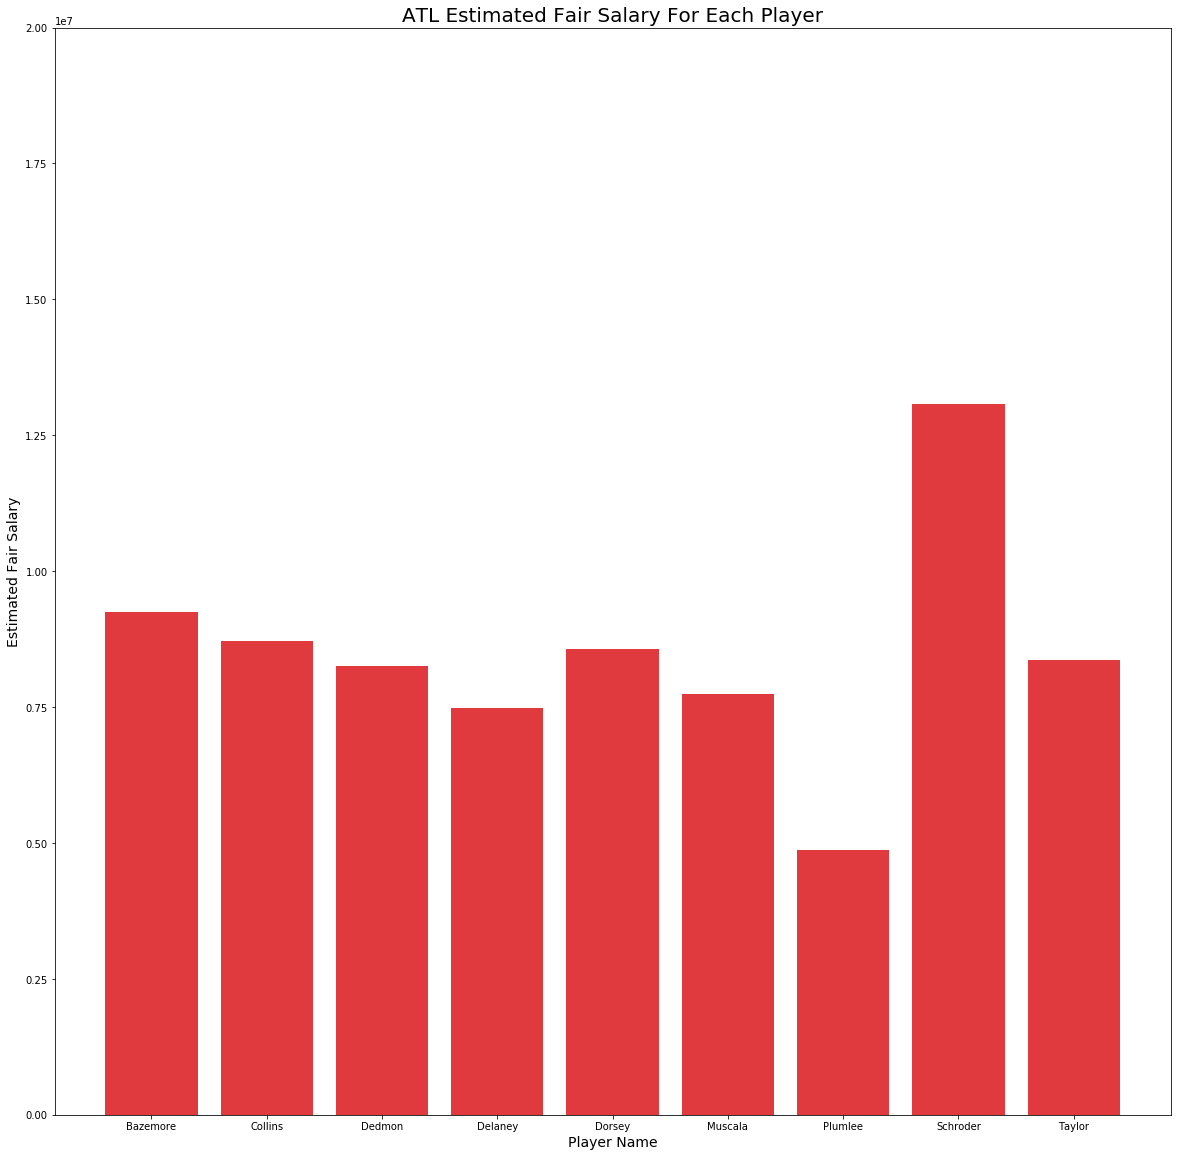

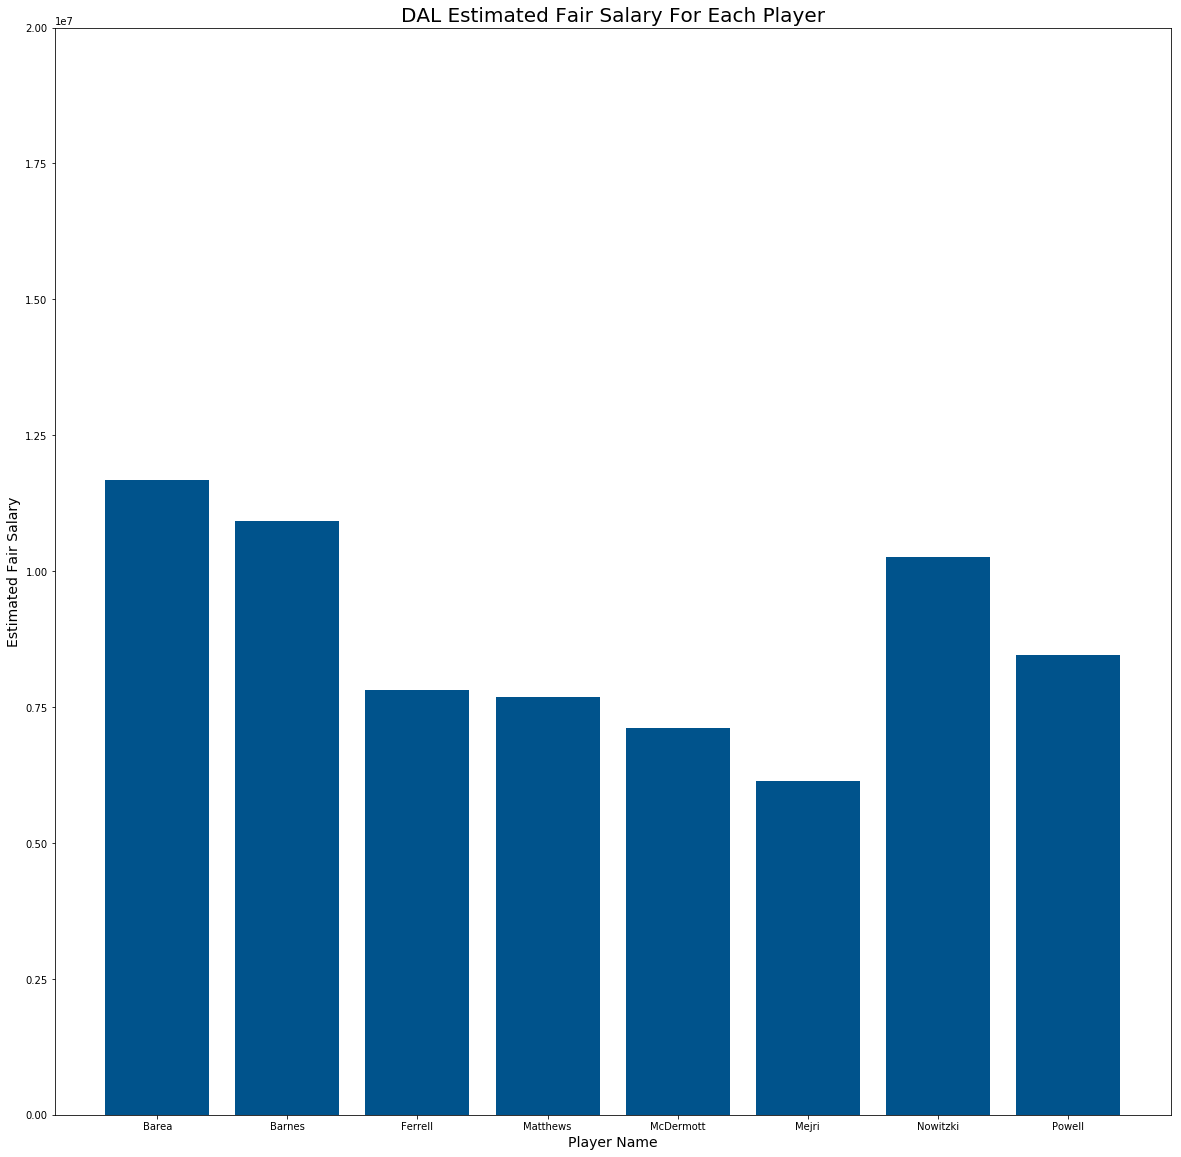

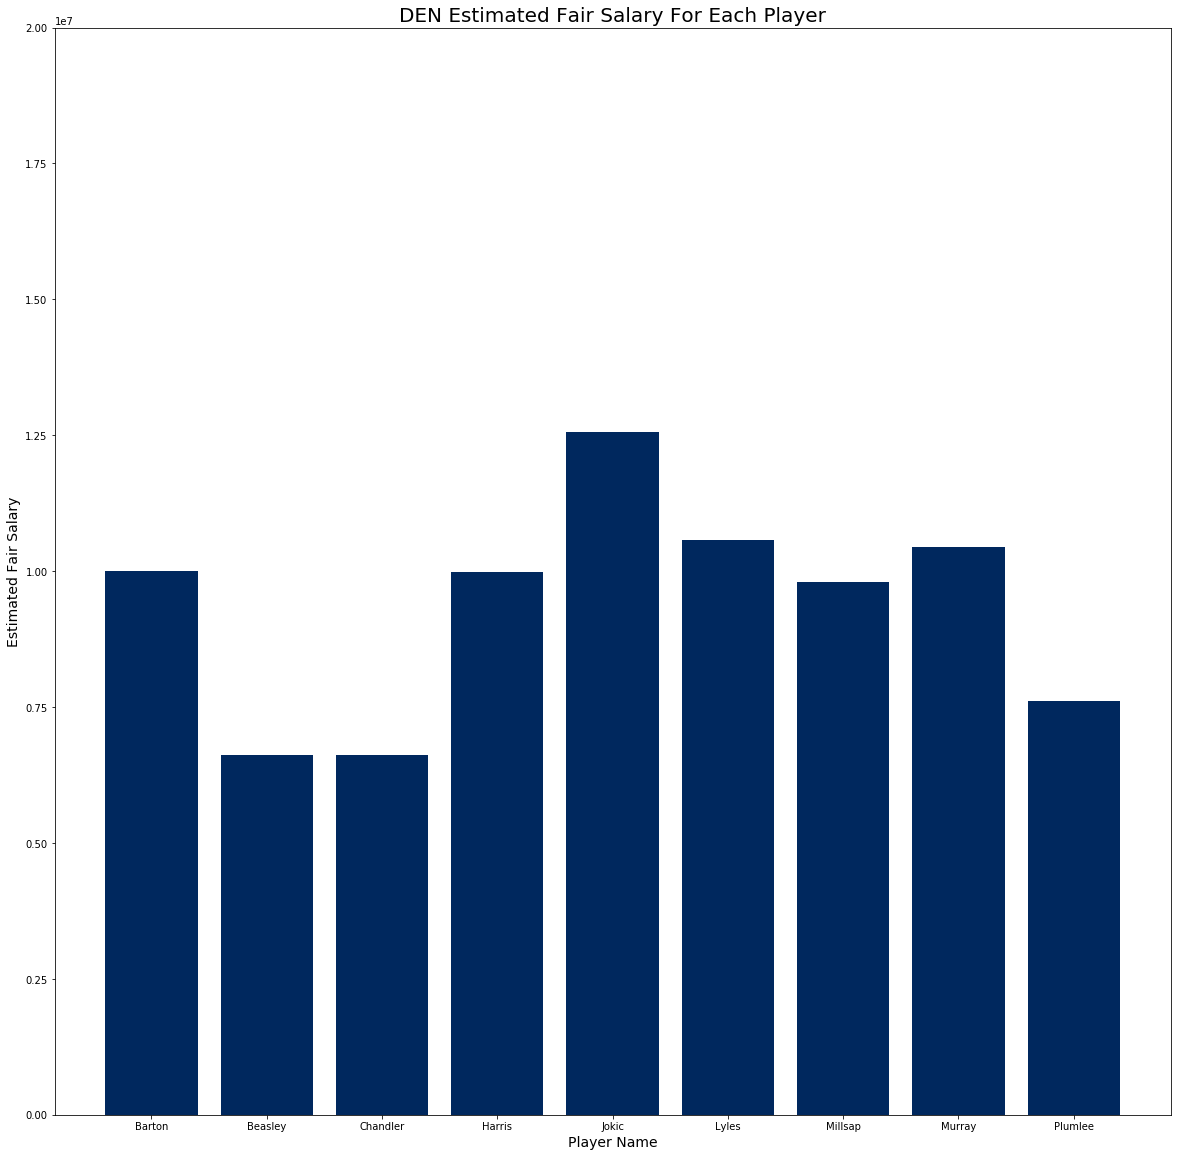

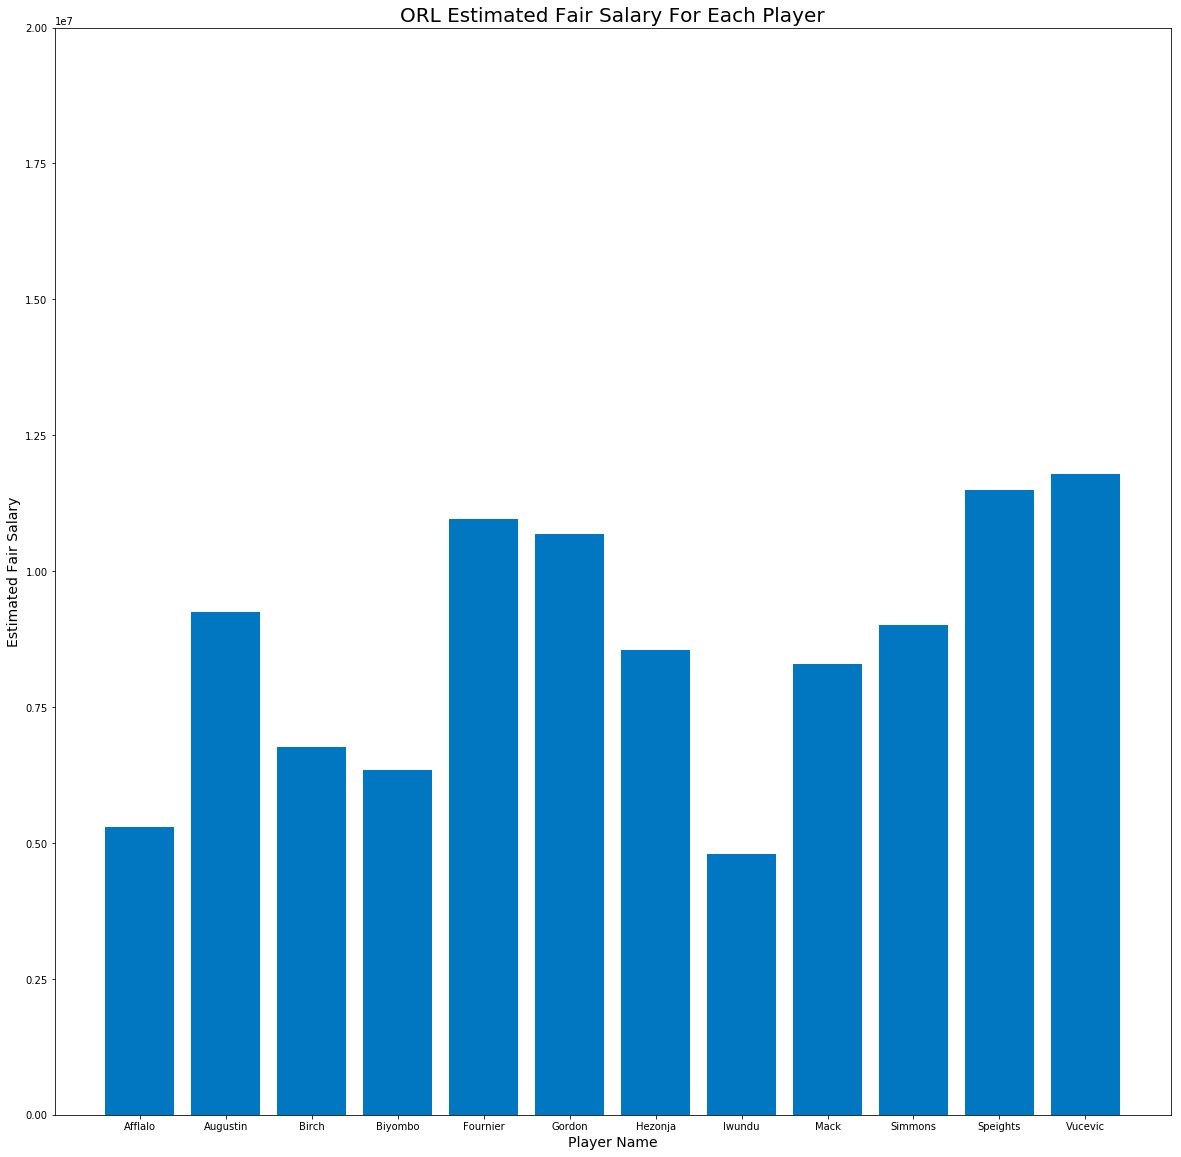

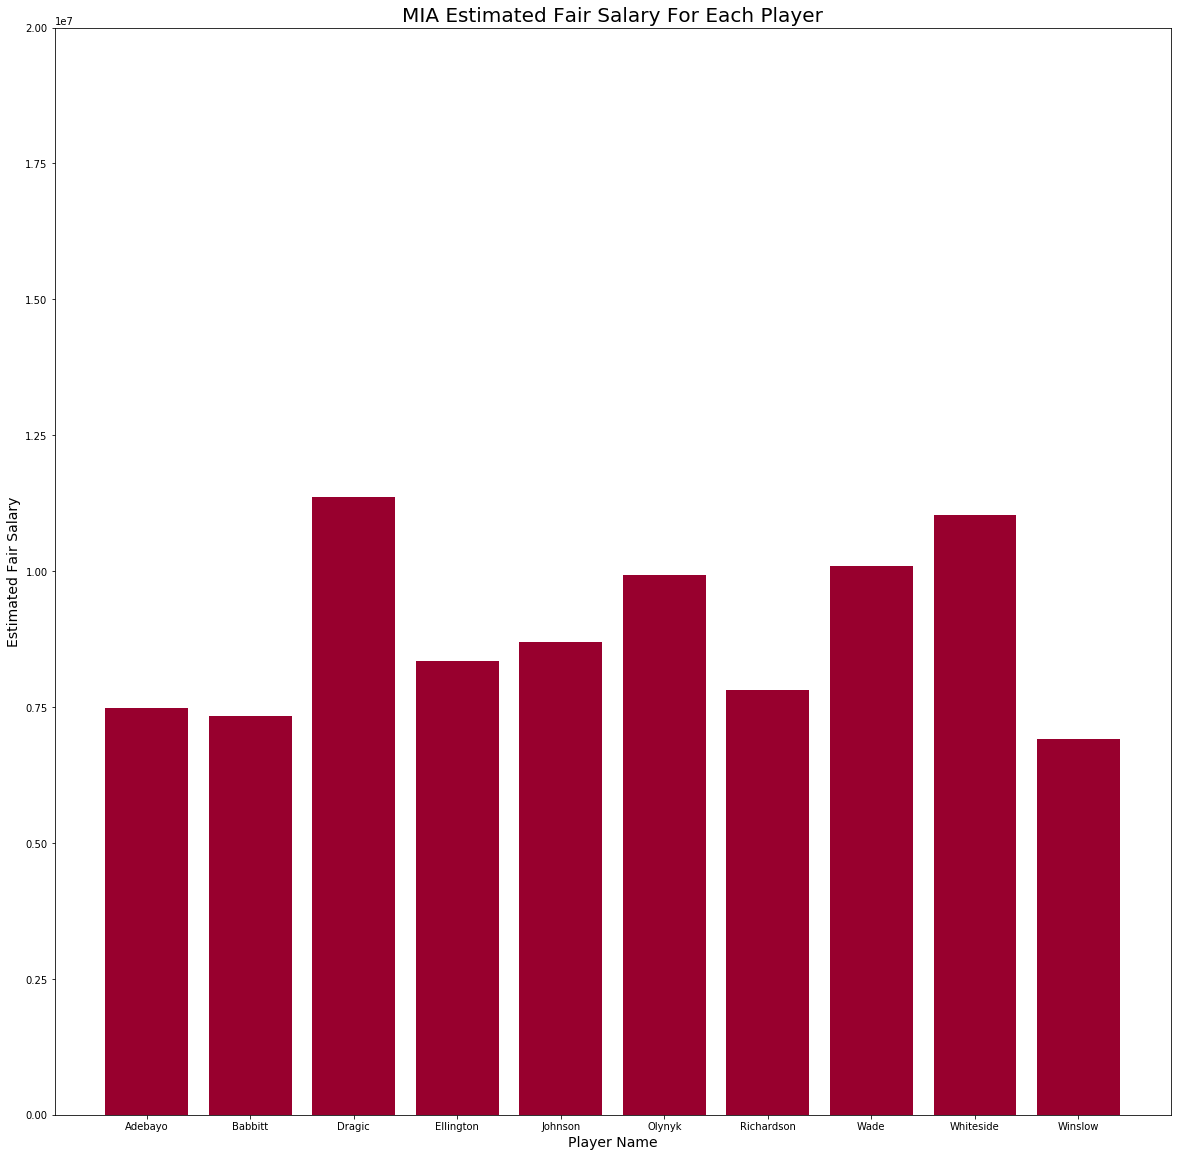

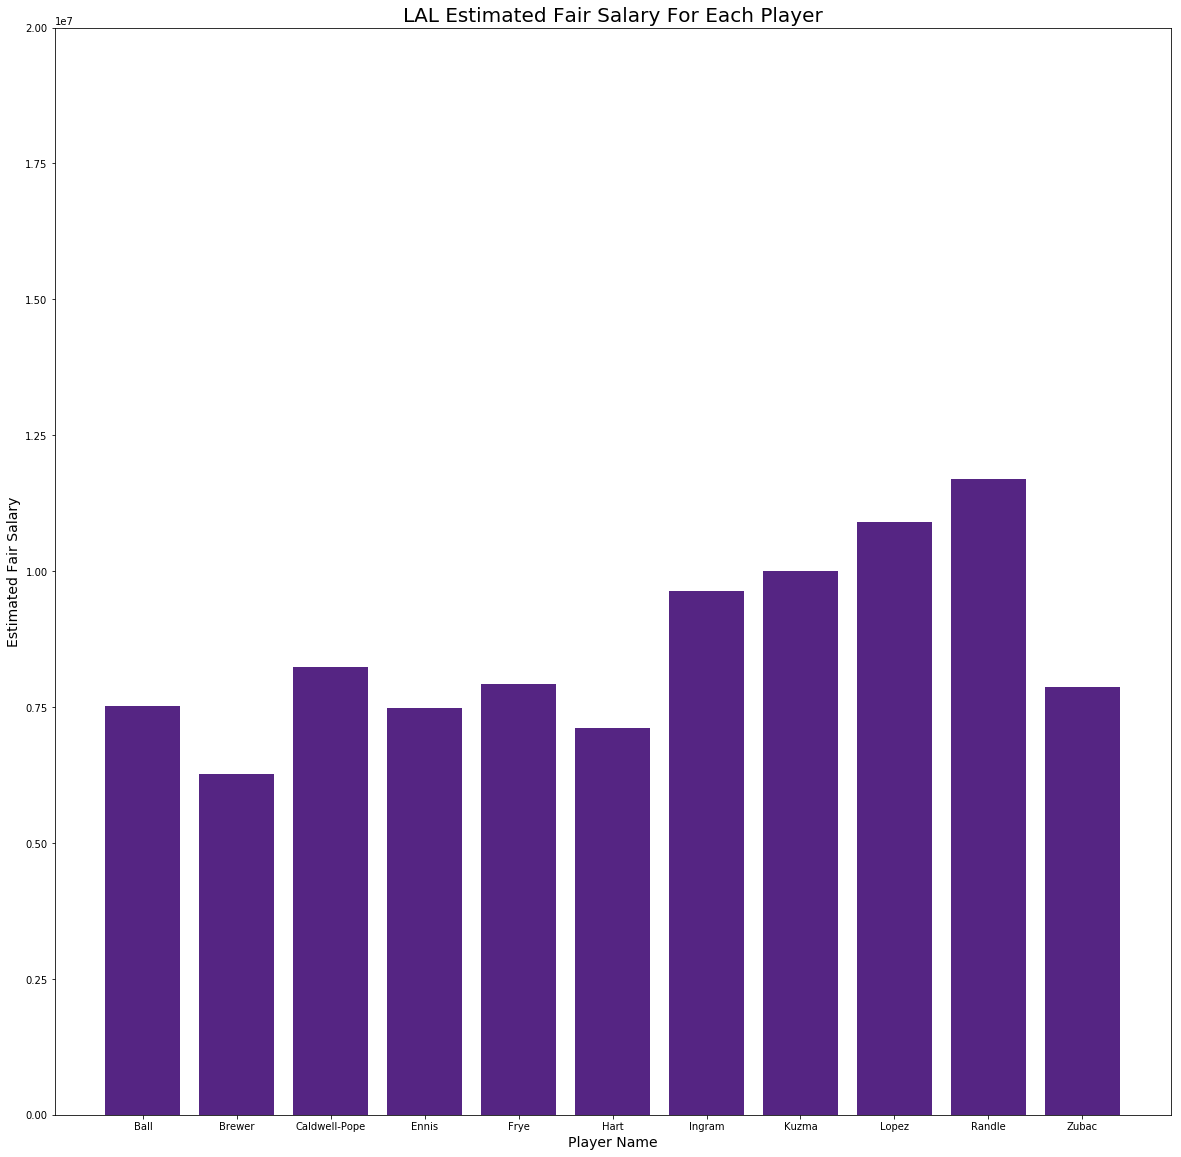

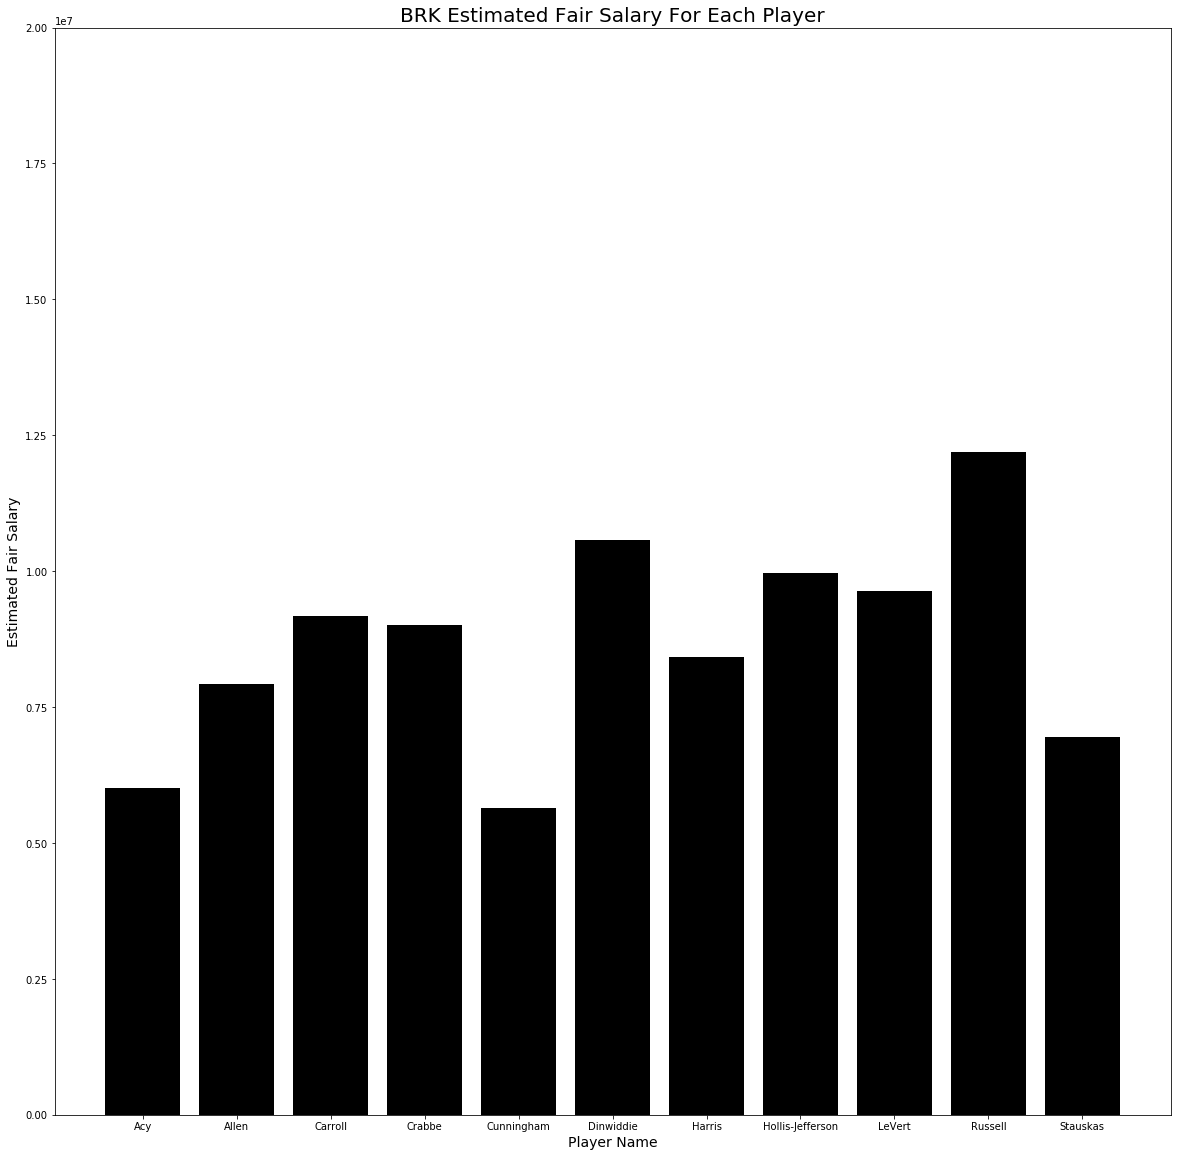

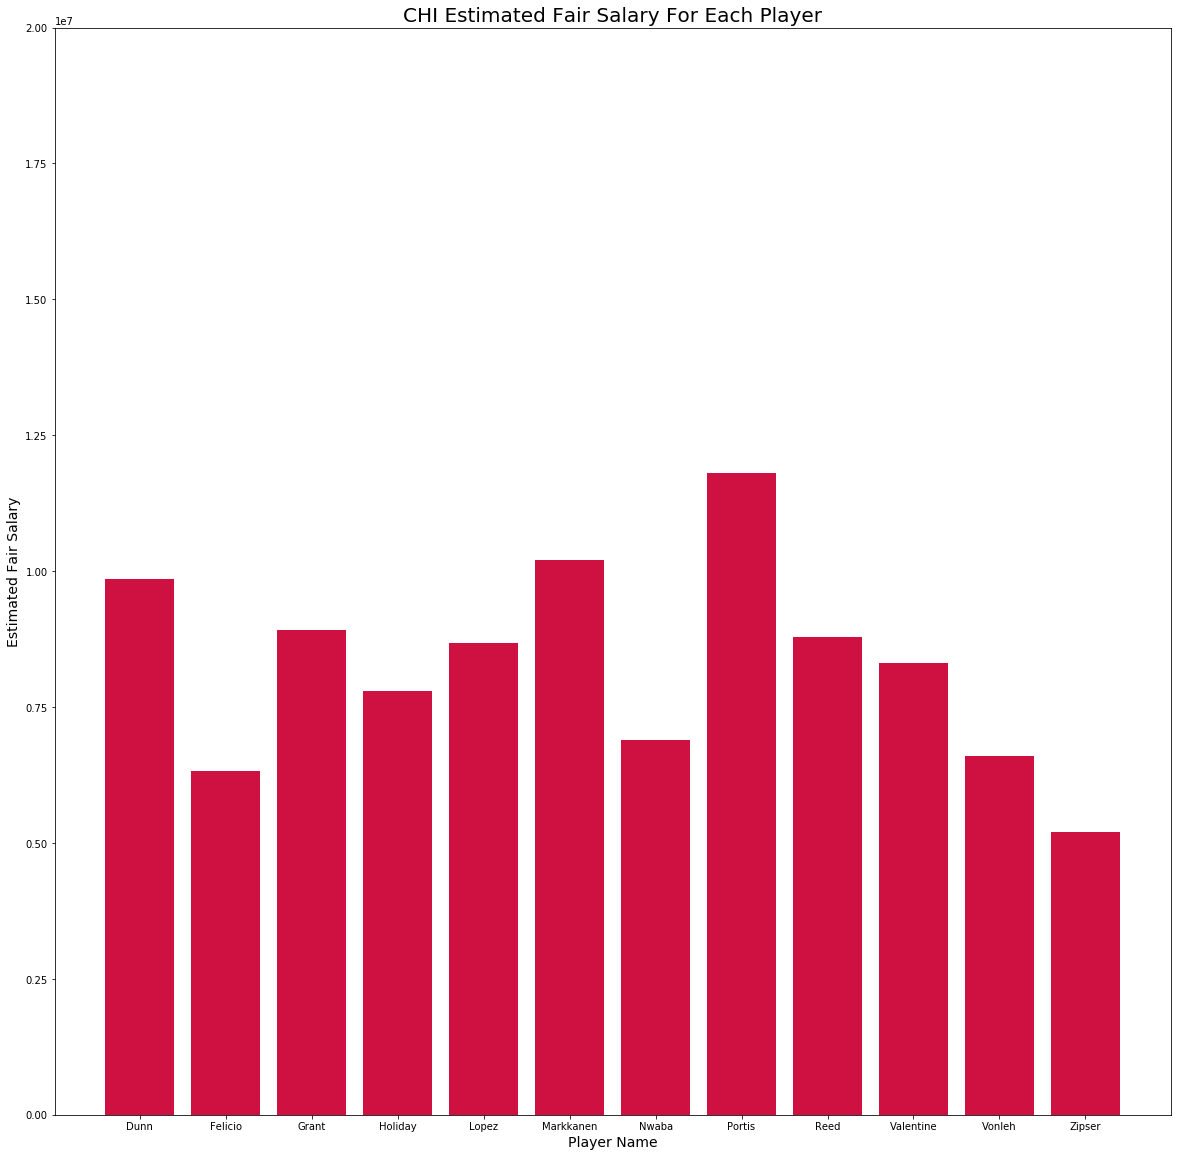

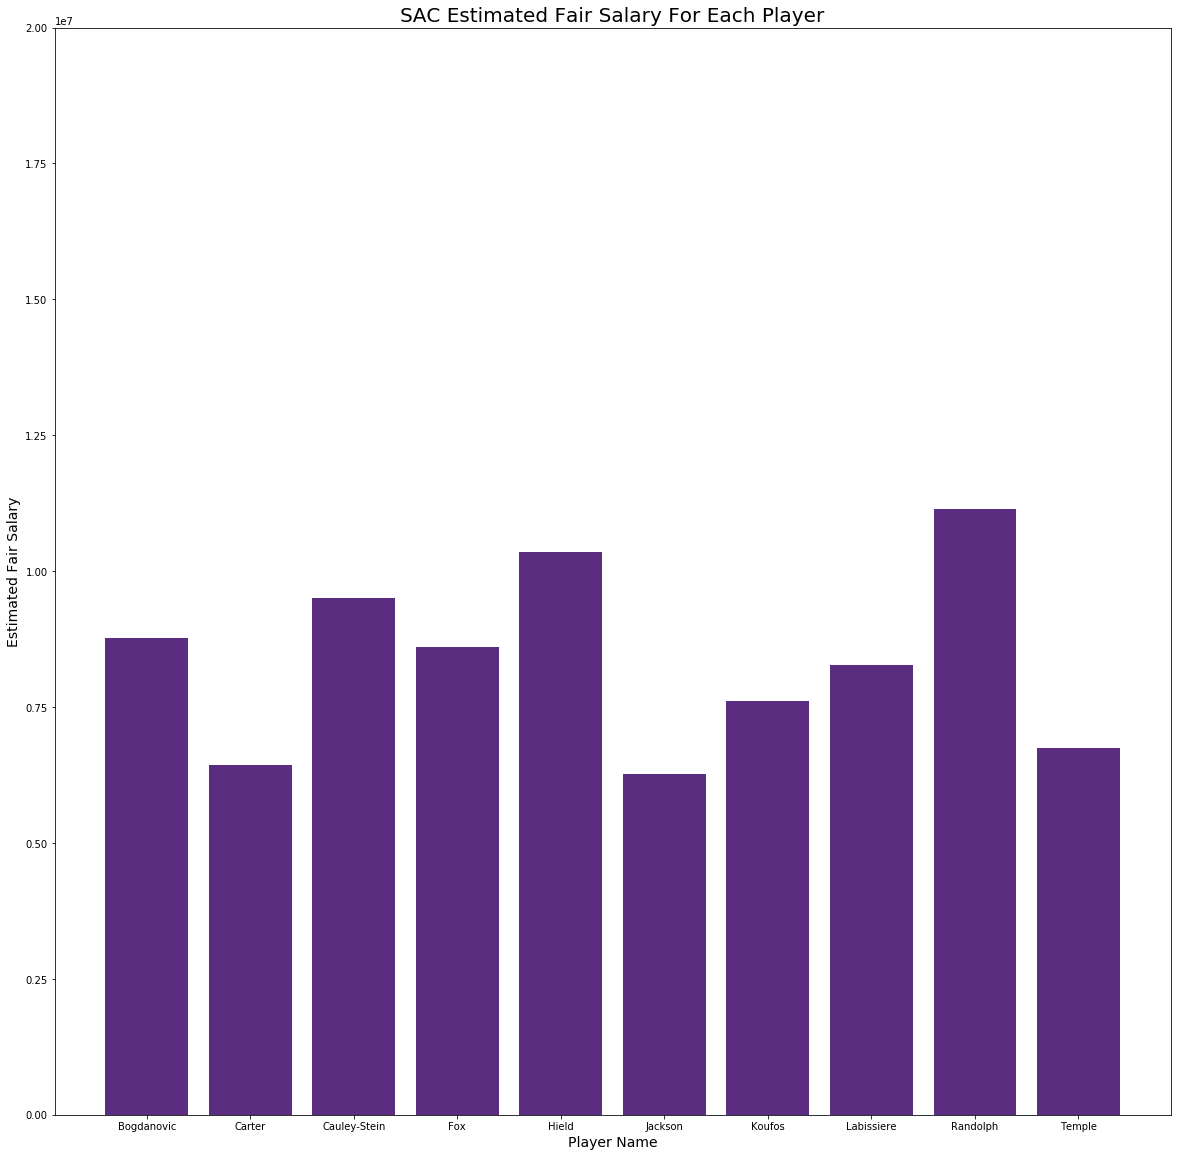

In [139]:
for i in range(len(final_frame['Team_y'].dropna().unique())):
    team=[]
    for j in range(len(final_frame)):
        if final_frame.iloc[j]['Team_y']==final_frame['Team_y'].dropna().unique()[i]:
            team.append(final_frame.iloc[j])
    team=pd.DataFrame(team)
    fig, ax =plt.subplots(1,figsize=(20,20))
    ax.bar(height=team['Reg_Salary_no_Rook'].dropna(),x=team['Last Name'].dropna(),color=team_colors[i])
    ax.set_title(team.iloc[1]['Team_y'])
    ax.set_ylim((0,20000000))
    ax.set_title(team.iloc[1]['Team_y']+' '+'Estimated Fair Salary For Each Player',fontsize=20)
    ax.set_ylabel('Estimated Fair Salary',fontsize=14)
    ax.set_xlabel('Player Name',fontsize=14)

#### Team by Team Analysis

__Atlanta__

Atlanta missed the playoffs, but underpays for their roster. Atlanta does not have any stars on their team and could benefit from using some of the salary they have saved to pursue someone who is going to bring them more wins on the court and attract other stars to come play for them. They also have one of the youngest rosters in the NBA, so if their players are on rookie contracts that could be the reason for their undervaluation. Atlanta finished last in the Eastern Conference.

__Boston__

Boston is a team that is undervalued, made the playoffs, and is still competing in the playoffs after moving through the first two rounds. Boston is an interesting story because they lost Gordon Hayward in the first moth of the season. If we add back his salary of 30 million dollars we will most likely see a shift from undervalued to fairly valued or overvalued. Boston has one of the youngest rosters in the NBA and is performing at a high level. It is interesting to see what the future holds for Boston this year with their young talented team, and moving forward as their players contracts expire and they demand more money, and when Hayward returns to improve the team. Boston is the best performing undervalued team.

__Brooklyn__

Brooklyn is another team with a very young roster. Brookklyn is significantly undervalued at their current salaries. After missing the playoffs Brooklyn should be looking for a way to spend their money in order to increase team performance. This is another team that could benefit from brining in one of the league'e top players to improve their performance on the court. Brooklyn has also been hidered by the large contract of Timofey Mozgov who played only 31 games this season. Moving forward the team needs to find a way to deal with this contract to free space for higher value players.

__Chicago__

Chicago is the most undervalued team. They are also the second youngest team and second lowest total salary team. The reason they have such a small team salary is that 9 of the 11 players in the sample that are still on their roster are 25 or younger. This means that they are mostly still on rookie deals. Chicago missed the playoffs this year, but as this team matures and improves we will most likely see improved play, but it will be interesting to see how they can balance their budget moving forward. Chicago has the ability to maintain this roster and pay them as they come off their rookie contracts, or move them as their contracts expire and use the salary space on more mature players who may cost more, but also are performing better.

__Charlotte__

Charlotte is the highest spending team to miss the playoffs, and we saw earlier that Charlotte had two of the most overpaid players. Despite this Charlotte is listed as having a roster that is slightly undervalued. If they are able to free up cap space by reducing the contracts of Nicolas Batum and Dwight Howard they could use that salary to acquire more young talent. Dwight Howard is an average Center, and his 20 million dollar salary is simply too much. If Charlotte were to seek out younger talent at the position, like Willy Hernangomez who makes 1.5 million but is worth 10.2 million, they could free up the cap space to improve their team elsewhere.

__Cleveland__

Cleveland spends the second most on their roster and it shows in their performance on the court. They have been to the finals the past 3 seasons, and are making another deep playoff run this year. They have the oldest roster in the NBA, and one of the greatest players to have played in Lebron James. Even though Cleveland has performed well they have the second worst salary difference in the league. Moving forward Cleveland will need to focus on re-signing Lebron James in order to maintain the success they have had. James is worth far more than his on court performance, and Cleveland will have to pay a large premium in orde to keep him. James is also aging and Cleveland will need to consider brining in younger talents to learn from James, so when he retires the team is not left with nothing. Cleveland also has George Hill, who is another one of the most overpaid players in the league. The team will need to deal with his contract moving forward if they want to clear space to pursue other options, or reduce his contract to reflect his performance.

__Dallas__

Dallas has an experienced team with one of the oldest rosters, but have one of the lowest total salaries and are undervalued. Dallas will have to focus on moving on from Dirk Nowitzki as their focal player. This season they acquired Harrison Barnes for 20 million dollars, which was a step towards generating a younger roster, but he underperformed. If after next season he is not able to pick his play up it may be better to drop his large salary to pursue other players who provide better value. Moving forward Dallas should focus on brining in more valuable young talent to fill in and learn from the veterans Dallas currently has.

__Denver__

Denver missed the playoffs by one game this year. They have a middle of the road salary, average age, and estimated fair salary. In the NBA being an average team will not win a team a championship, so it is important for Denver to focus on improving their roster moving forward. Denver also has the most overvalued player in the league, Paul Millsap. Millsap missed more than half of the season and put up unimpressive stats when he was on the court. Despite this, they are a slightly undervalued team and could afford to spend more to attract more valuable players. If Denver could get rid of or restructure Paul Millsap's contract they could afford to fill in other roles that could improve the team. Denver has to decide whether to hope brining Millsap back makes them a contender, or use Millsap's contract money elsewhere. Denver also has a young star in Nikola Jokic, who will likely ask for significantly more money after his rookie contract expires at the end of next year.

__Detroit__

Detroit made a big move towards the end of the year by acquiring Blake Griffin. They are the only team who didn't make the playoffs but has a negative salary difference. They have young talent in Andre Drummond, Stanley Johnson, and Luke Kennard. Detroit finished in 9th place in the east, and the addition of Griffin may be what they are hoping will put them in the playoffs next year. Both Griffin and Drummond were listed on the most overpaid players in the NBA. Griffin is a top 5 Power Forward. In the coming years Drummond has the potential to become one of the top centers in the league. If Detroit can develop Luke Kennard and Stanley Johnson they may be able to seriously contend in the coming years.

__Golden State__

Golden State are the returning champions, have been to the finals the past three years, and are looking to get back again this year. Golden State has the most expensive roster, but they also have the highest estimated roster value. They have the number 2 player at the point guard and small forward position, in Stephen Curry and Kevin Durant. Having these top talents elevates the play of those around them, and that is what makes up for the perceived negative salary difference these two players have. The improvement of others is one aspect that this salary regression does not take into account. Another aspect is attraction of other star, which the Warriors were able to do with Kevin Durant. The top paid talents on Golden State should more than make up for their salary difference when you consider these outside factors. Golden State does have an older team, with the majority of their players over 30, but they should be able to recruit young players who want to come because of the star power that they have.


__Houston__

Houston finished first in the Western Conference this year. They have a strong team and are looking to overtake the warriors in the playoffs and reach the NBA championship. They have the fourth most overvalued team, but that is not considering they have stars in James Harden and Chris Paul who are worth more than just their on court performance to the organization. Harden was also the player deserving of the highest salary. It is also worth noting that neither of these players appeared in the top 20 most overpaid players. A way to reduce Houston's overspending is Ryan Anderson. He is in the top 20 most overpaid players, and is one of the bottom 15 power forwards in the sample. If Houston were to pursue another option, for example Frank Kaminski, they could greatly reduce their salary expense and imporve at the power forward position. Houston also has the second oldest team in the league, so dropping older and overpaid players for more salary room and younger players could enable them to continue there success for years to come. Also, similar to Golden State, Houston has the star power to lure top talent to their team.

__Indiana__

Indiana made the playoffs as an undervalued team with a young roster. Indiana has young talent in Victor Oladipo and Myles Turner. Moving forward Indiana has a mix of veterans and young talent. If Oladipo or Turner is able to blossom into a top star in the league they could turn Indiana into a serious contender. Oladipo already made serious improvements over last year and is favorited to win most improved player in the league. Indiana is also slightly undervalued, but they may want to save their value and maintain this team in hopes of both seeing younger players continue to grow and be able to pay them in the coming years.

__Los Angeles Clippers__

The Clippers are an undervalued team who missed the playoffs and lost two of their star players this past year. Both Chris Paul and Blake Griffin have left Los Angeles for better teams. In this case the Clippers do not start either of their best players. Their top two players are also both drastically underpaid. Montrezl Harrell is paid on his rookie contract, but Lou Williams is a veteran and is still underpaid. Harrell's contract expires after this season, and despite having a strong statistical season, he did not play very much for the Clippers. Harrell was the second most underpaid player in the league. It will be interesting to see if they re-sign him or another team gives him the opportunity to play. DeAndre Jordan is one of the top 10 most overpaid players in the league, and now without the help of Paul and Griffin his stats will likely decline even further. Los Angeles should consider there options with Jordan instead of letting his contract detract from other options they could pursue.

__Los Angeles Lakers__

The Lakers are the third youngest team in the NBA and they are undervalued. 7 of the 11 Lakers in this sample are 23 or younger. An issue for the lakers is the salary of Luol Deng, who is not in the sample because he no longer plays. There is no way for the team to remedy this issue, but they have developed a young base that will be able to grow and get paid after Deng's salary expires. Brook Lopez and Kentavious Caldwell-Pope are also strongly overpaid for their contributions to the team. Los Angeles also is hopeful that they will get a star this summer in free agency. If they are able to get a superstar this summer to pair with their young core Los Angeles could be a title contender in coming years.

__Memphis__

Memphis went from a playoff team last year to one of the worst teams in the NBA. They have the smallest total salary, but this is most likely because they have the fewest players qualified for the sample. They are an undervalued team and they have a highly underated shooting guard in Tyreke Evans. As mentioned earlier Tyreke Evans was the 2010 NBA Rookie Of The Year. He was projected to be a league superstar, but progressively put up worse numbers through his career, until this year. Evans put up strong numbers this year, and was ranked in the top 5 shooting guards this season. Marc Gasol is a great center, but underperformed his salary and does not have the same star power to make up the difference as other players may. It is worth noting Memphis's two most expensive players, Mike Conley and Chandler Parsons are not in the dataset because they both were injured all season.

__Miami__

Miami made the playoffs this year, and has a slightly undervalued team. This valuation, like several other teams, does not reflect the value of a player who the organization is paying but is not playing. Chris Bosh was a top talent on the Miami Heat, but has missed the last two season with bloodclots. He is the highest paid player on the team. The Heat also gto Dwyane Wade back this season. Moving forward the Heat only have three players under 25 and may look to add more young talent.

__Milwaukee__

Milwaukee reached the playoffs this year with a young team led by Giannis Antetokounmpo. He is the number two ranked power forward, only 23 years old, and quickly becoming a superstar in the league. Milwaukee also has Malcom Brogdon, last year's Rookie Of The Year and Khris Middleton who was a top 10 small forward this year. Moving forward these players are going to mature even further and this team could potentially become a title contender.

__Minnesota__

Minnesota is an undervalued franchise who made the playoffs this year. They have a pair of up and coming stars in Karl Anthony Towns and Andrew Wiggins. Towns is a top 5 center and still only 22 years old. Minnesota also has Jimmy Butler who was a star in Chicago before coming to Minnesota. Wiggins recently signed a large contract extension, paying him over 20 million dollars per year starting next year. It will be interesting to see how Minnesota will handle also paying Karl Anthony Towns in the coming years. This Minnesota team has a mix of young players and veterans who are all talented and in a couple years could make a run at a title.

__New Orleans__

New Orleans has very talented big men. Anthony Davis is the number one power forward and Cousins is the number two center, but Jrue Holiday is one of the players on the top 10 most overpaid players. Holiday has played well for them and is a peaking talent, but he is just getting paid too much for his performance. With the addition of Rajon Rondo to the team New Orleans has the talent, size, strength, and veteran knowledge to make another playoff push next year. This is a team that in a year could contend with Houston and Golden State in the Western Conference if they stay healthy.

__New York__

The Knicks missed the playoffs, but are an undervalued team. They have several young talents, but no veterans who are going to lead the team to the playoffs. In the coming years New York needs to cycle out the aging players and overpaid talent to try and recruit either several young talents to grow with the pieces they have, or a star who can make them a playoff team. The market is attractive and the up and coming talent could bring a star player to New York if they were willing to pay them. If the Knicks do not make any moves they may see slight improvements as their players develop, but overall will never become a title contender.

__Oklahoma City__

The Thunder are the most overpaid team in the league. The team made the playoffs this year, but clearly were not what they hoped to become after getting Paul George and Carmelo Anthony. Russell Westbrook is a superstar and his salary reflects that. He was able to attract both of those players to his team and is the main point on a team that is otherwise lackluster. He should be valued at more than on the court performance, but George and Anthony should not. Both George and Anthony were at one time superstars, but they have faded as they have aged and are not able to carry teams as they have in the past. They are drastically overpaid and it hurts the team. Steven Adams is also drastically overpaid for his performance. If Oklahoma City wants to contend they should focus on distributing their salaries more evenly to create a well rounded team. Oklahoma City shows that having a great team is not just about spending the most money.

__Orlando__

Orlando missed the playoffs, but is an undervalued team. They lack a star player who can lead the team to the playoffs. The Magic should focus on trading or cutting older overvalued players and building around their younger players for now in order to create future opportunities.

__Philadelphia__

The 76ers have two young standouts who led them to the playoffs this year. Joel Embiid and Ben Simmons are two young players that have the potential to be superstars. Both of these players are underpaid for their on court performance. Philadelphia is the most undervalued playoff team. Moving forward the 76ers will improve as those players grow, but it is important that they continue to add talent around them. Next year Embiid will start making over 25 milllion dollars, and Simmons will likely demand more money when his contract expires. 

__Phoenix__

Phoenix has the youngest roster in the NBA. They finished in last place in the Western Conference. The only two players on Phoenix's roster getting paid more than what they are worth are Tyson Chandler ad Jared Dudley, who are both over 30. Phoenix will undoubtably improve as they grow and improve, but already Devin Booker has proven to be a standout. Booker is listed as the most underpayed player in the NBA. Phoenix should focus on developing this young roster they have, so that in the next 4 to 5 years they have the experience and starpower to become a top NBA team. It is crucial that the Suns are able to resign those young talents who have shown their value in order for the development plan to work.

__Portland__

Portland is another young team, similar to Phoenix, but they are several years ahead of them. Portland has a star in Damian Lillard and an upper tier player in CJ McCollum, but they do not have the surrounding pieces to make a deep playoff run. Portland should focus on acquiring strong role-players that can help Lillard and McCollum compete against the top NBA talents. Phoenix should take note of this and ensure that they continue to improve and acquire top talent, or they may be left with only two players who are capable of taking a team to the playoffs, but are unable to generate a deep title run. Both Lillard and McCollum are listed as overpaid, but Lillard is the face of the organization and contributes in other way, McCollum however, is not making the same contributions and Portland should consider this when deciding on re-signing McCollum in the future. These two are what make Portland an overvalued team.

__Sacramento__

The Kings are an undervalued team who have a core group of young players that have been unable to perform up to this point. Sacramento has 4 young players who each played over 2000 minutes this year. These core 4 are what is going to determine where Sacramento goes in the coming years. Without Vince Carter and Zach Randolph Sacramento has one of the youngest groups in the NBA. Sacramento either has to hope one of their young players becomes a leader that can take them to the playoffs, or give away players other than the core 4 to try and get a veteran leader who can.

__San Antonio__

The Spurs are an undervalued franchise. Kawhi Leonard, who is one of the NBA's top talents did not play for the Spurs this year, and thus his salary is not included here. That being said, even without Leonard the Spurs were able to make the playoffs. San Antonio will likely lose Leonard this offseason, and has a core group of guys who's average age is 35. San Antonio has been a top team in the NBA for years, but as these players retire San Antonio will have to find ways to fill their roles. It will be interesting to see what San Antonio does this offseason if they lose Leonard, because it is unlikely they can get to the highest level without him.

__Toronto__

Toronto finished first in the Eastern Conference this year. They are slightly overvalued, but when you consider the off-court value of Demar Derozan and Kyle Lowry the team seems more reasonably priced. Kyle Lowry is on the list of 10 most overpaid players, and even after adding back what he contributes off the court he still likely overvalued. Neither of these players have the same star power that a Lebron James or Stephen Curry does, but together they make Toronto capable of making a playoff run and bring in other forms of value for the team. Toronto is made up partially of players who are in their late 20s that are leading the team, and partially players who are in their early 20s who will likely take over when the older players leave. This creates a smooth transition, but Toronto has been unable to reach the NBA finals thus far.

__Utah__

Utah was lead to the playoffs by rookie of the year candidate Donovan Mitchell. They are slightly overvalued as a team. Utah is an interesting case where they have a strong group of role players but did not have a star until Mitchell came. The team is reaching their prime years, and if Mitchell can mature quickly they have the opportunity to make another strong playoff run next year.

__Washington__

Washington is led by the duo of John Wall and Bradley Beal. They made the playoffs, but had an early exit. John Wall was injured and missed a portion of this year, but the team was able to get to the playoff regardless. Wall is listed as overpaid, but in actuality is the face of the team and the leader. These outside factors increase his value. Beal, however is less valueable off the court, and is overpaid for what he contributes. Beal is actually paid more than Wall, despite putting up slightly worse statistics. Moving forward the Wizards are going to need more help if they want to advance in the playoffs. Kelly Oubre is not in the sample, but he is another piece that Washington can build around moving forward. It is important that Washington make the moves to acquire the talent to be a contender now before Wall and Beal are past their primes.